<a href="https://colab.research.google.com/github/jing-pw/YCBS258-Assignments/blob/master/C4_Exercise_Final_JW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

import matplotlib.pyplot as plt
import keras
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.layers import Input, BatchNormalization
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras import regularizers
from keras.utils import to_categorical
from keras import backend as K

Using TensorFlow backend.


In [0]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


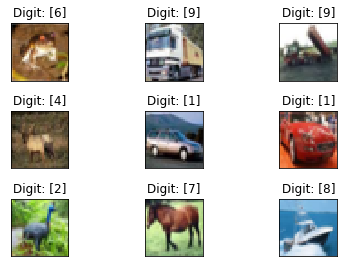

In [0]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Input images are having dimension of 32x32x3 (WxHxC)

In [0]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [0]:
print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


In [0]:
Y_train[0:5,:]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
X_train.dtype

dtype('uint8')

Input data type need to be converted to float32 to train ConvNet model

In [0]:
np.max(X_train)

255

Scale the input to be between 0 and 1

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [0]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

Did a few tests on different network topologies, found that changing kernal initializer and adding dropouts as well as batch normalization layers would improve the network performance a lot.
I also found that removing the fully connected layer before the output layer, the fitting process converges faster, and the accuracy improved a bit too. Why?

I did search on how to improve the model, many talked about data augmentation and learning rate scheduler. I can see how they can help to improve model accuracy but didn't implement myself.

In [0]:
K.clear_session()

inputs = Input(shape=input_shape)

x = Conv2D(32, (3,3), activation='relu', 
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.l2(0.0001),
#          padding='same',
          name='Input-Layer')(inputs)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu',
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.l2(0.0001),
#          padding='same',
          name='Conv-1')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2),
                name='Pool-1')(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3,3), activation='relu',
          kernel_initializer='he_uniform', 
          kernel_regularizer=regularizers.l2(0.0001),
#          padding='same',
          name='Conv-2')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu',
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.l2(0.0001),
#          padding='same',
          name='Conv-3')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2),
                name='Pool-2')(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3,3), activation='relu',
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.l2(0.0001),
#          padding='same',
          name='Conv-4')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu',
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.l2(0.0001),
          padding='same',
          name='Conv-5')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2),
                name='Pool-3')(x)
x = Dropout(0.4)(x)

f = Flatten()(x)
#d = Dense(1024, activation='relu',
#         name='Fully-Connected')(f)
#d = Dropout(0.5)(d)

outputs = Dense(10, activation='softmax',
               name='Output-Layer')(f)

model = Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Take a look at the network summary and the plot of topology

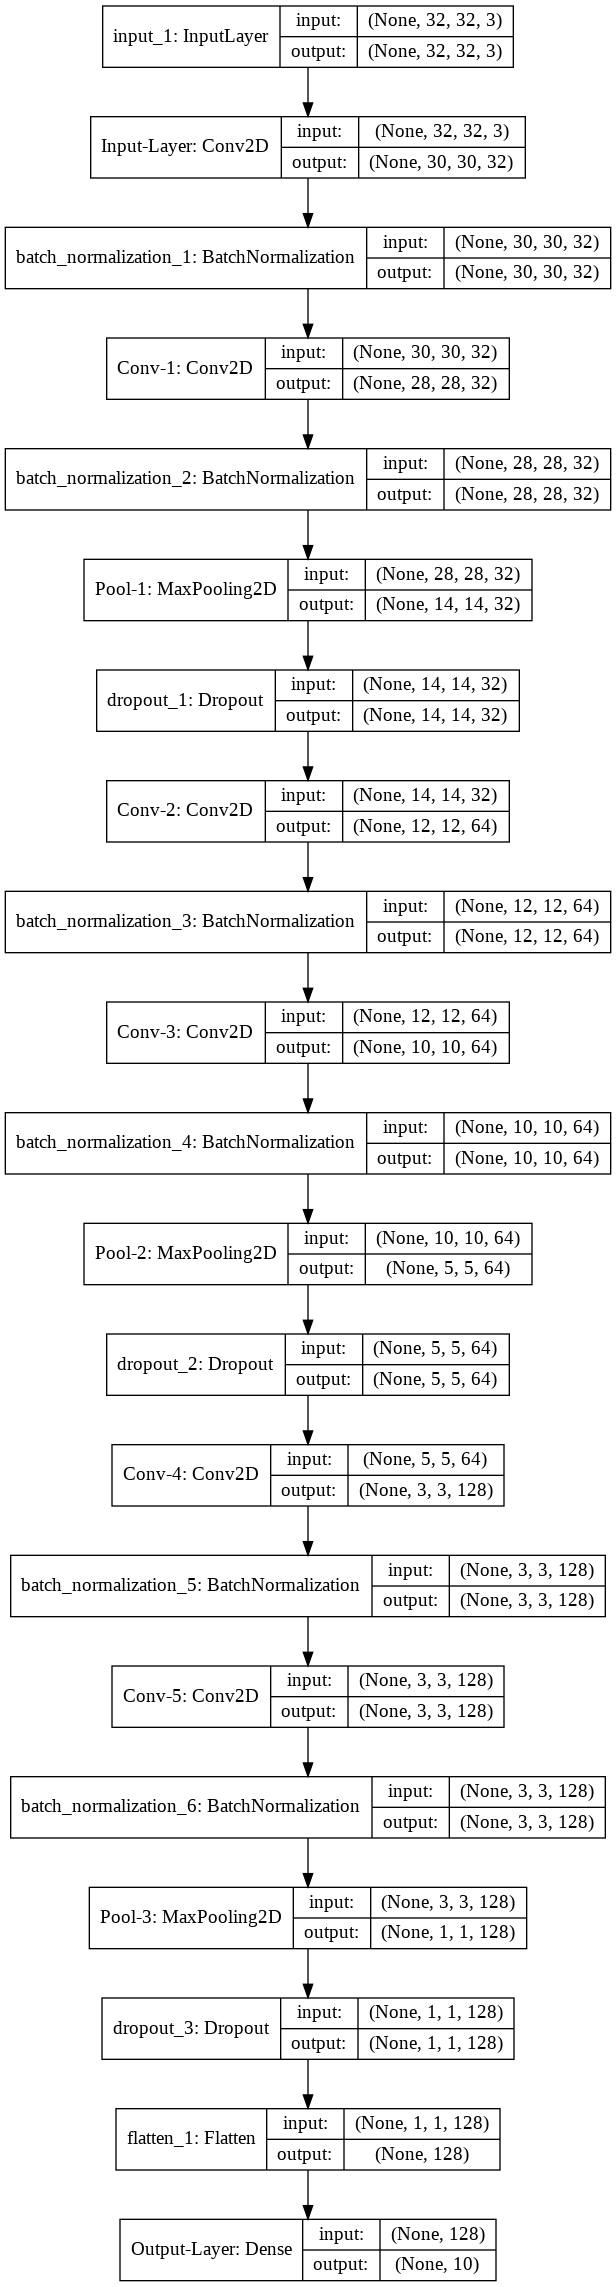

In [0]:
keras.utils.plot_model(
    model, 
    to_file='{}.png'.format(model), 
    show_shapes=True, 
    show_layer_names=True
)

from IPython.display import Image
Image(retina=True, filename='{}.png'.format(model))

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAmgAAAjvCAYAAAB1KmZnAAAABmJLR0QA/wD/AP+gvaeTAAAgAElE%0AQVR4nOzde1hVddo//vcGNuzNdnNQjnEQYadEQlkyD9D4paaGLJ48EUpqkzbOg9bEoDgZ5oHQMNRL%0AuUSZntTxadQUVEKH8dClxjPTlD426ejgZGSe0IqDwEYUQbx/f/hj5w40NiB7bXi/ros/XOuz1n2v%0AtTab2/VZ6/NRiYiAiIiIiBTDztoJEBEREZE5FmhERERECsMCjYiIiEhhWKARERERKYyDtROg9iUm%0AJlo7BSIi6gO2bdtm7RSoHbyDplDbt29HeXm5tdMg6rRDhw7h0KFD1k7DppSXl2P79u3WToP6CH7e%0AlE3FYTaUSaVSIT8/H+PHj7d2KkSd0noXmP8777iCggJMmDAB/FqmnsDPm7LxDhoRERGRwrBAIyIi%0AIlIYFmhERERECsMCjYiIiEhhWKARERERKQwLNCJStN27d8PV1RV//vOfrZ2K4u3fvx/p6enYsWMH%0AgoODoVKpoFKp8OKLL7ZpGxcXB71eD3t7ezz44IP44osvrJBxx2VnZyM0NBRarRY6nQ6hoaGYP38+%0AjEajWbvMzEyEhYXBxcUFTk5OMBgMeP3113HlypVeF3fXrl3Izs5GS0tLp2KQsrFAIyJF4xAAHbNw%0A4UKsWrUKc+fORUJCAr755huEhIRgwIAB2LRpE/7yl7+Ytf/oo4+wbds2PPfccygtLcUjjzxipcw7%0A5m9/+xt+85vf4Pz58/j++++xaNEiZGdn4/nnnzdrd/DgQfz2t7/F2bNnUVVVhaysLOTk5HR68G8l%0Axx01ahQ0Gg2efPJJ1NbWdioOKZiQIgGQ/Px8a6dB1GnPP/+8PP/889ZOo1tdvXpVoqOj79n+8/Pz%0ApTNfy0uWLJHBgwfLtWvXzJaHhITI5s2bxc7OTvz8/KS2ttZs/Z49e2T06NFdyrmnjB07ts3xJSYm%0ACgC5dOmSaVl8fLzcuHHDrN348eMFgJw/f77XxRURSUlJkejoaGlubrYoRmc/b9QzeAeNiKiD1q9f%0Aj4qKCmunYebrr7/G/Pnz8dZbb0Gj0bRZHxMTg9TUVFy8eBGzZ8+2Qobdo7CwsM3x+fn5AYBZN2Jx%0AcTHs7e3N2nl4eAAArl692uviAkBGRgaOHTuGnJwci+OQcrFAIyLF+uSTTxAYGAiVSoXVq1cDAPLy%0A8qDT6eDs7IydO3fimWeegYuLC/z9/bFlyxbTtqtWrYJGo4GXlxemT58OX19faDQaxMTE4PDhw6Z2%0AKSkpcHR0hI+Pj2nZq6++Cp1OB5VKhaqqKgBAamoq0tLScPr0aahUKhgMBgDA3r174eLigrfffrsn%0ATkkbq1atgohg1KhRd2yzePFiDB48GOvWrcP+/fvvuj8RwYoVK/DAAw/AyckJ7u7uGDNmDL788ktT%0Am45eAwBoaWnBggULEBgYCK1Wi4iICOTn53ftoP9/ZWVlcHNzw8CBA+/a7uLFi9BqtRg0aFCvjOvu%0A7o7Y2Fjk5OTwkYDexMp38OgOwC5OsnHd1cV54cIFASC5ubmmZW+++aYAkAMHDkhdXZ1UVFTIiBEj%0ARKfTSVNTk6ldcnKy6HQ6OXnypDQ2NkppaalERkaKXq8363aaNGmSeHt7m8VdtmyZAJDKykrTsoSE%0ABAkJCTFrV1xcLHq9XjIzM7t8rJ3pcgoODpawsLB214WEhMiZM2dEROTTTz8VOzs7CQoKkitXrohI%0A+12cCxYsEEdHR9m4caPU1tbK8ePH5ZFHHhEPDw/57rvvTO06eg1mz54tTk5Osn37dqmpqZG5c+eK%0AnZ2dHDlyxKLjbNXU1CTl5eWSm5srTk5OsnHjxru2b2hoEL1eLykpKZ2KZytx09PTBYAcPXq0w/tm%0AF6ey8Q4aEdmsmJgYuLi4wNPTE0lJSWhoaMD58+fN2jg4OJjuBoWFhSEvLw/19fXYsGFDt+QQHx8P%0Ao9GI+fPnd8v+LNHQ0IAzZ84gJCTkJ9tGR0dj5syZOHv2LN54441221y7dg0rVqzAuHHjMHnyZLi6%0AuiI8PBzvvvsuqqqq8N5777XZ5m7XoLGxEXl5eRg7diwSEhLg5uaGefPmQa1Wd/r8BwQEwN/fHxkZ%0AGVi6dCkmTJhw1/ZZWVnw9fXF4sWLOxXPVuLef//9AIATJ050KR4pBws0IuoVHB0dAQDNzc13bTd8%0A+HA4OzubddnZqoqKCogInJ2dO9R+8eLFGDJkCNasWYNPPvmkzfrS0lJcuXIFw4cPN1seGRkJR0dH%0As67h9vz4Gpw6dQpXr17F0KFDTW20Wi18fHw6ff4vXLiAiooKfPDBB3j//fcxbNiwOz4XWFhYiIKC%0AAuzbtw96vb5T8Wwlbutn4Pvvv+9SPFIOFmhE1Oc4OTmhsrLS2ml0WWNjI4Bbx9MRGo0GGzZsgEql%0Awssvv4xr166ZrW8dqqFfv35ttnVzc0N9fb1F+TU0NAAA5s2bZxqTTaVS4dy5c516cB4A1Go1PD09%0AERcXh61bt6K0tBRZWVlt2m3duhXvvPMOSkpKEBQU1KlYthRXq9UC+OEzQbaPBRoR9SnNzc2ora2F%0Av7+/tVPpstY/ypYMVBodHY1Zs2ahrKwMixYtMlvn5uYGAO0WYp05Z56engCAlStXQkTMfj777DOL%0A9tUeg8EAe3t7lJaWmi3Pzc3Fpk2bcPDgQdx3331djqP0uADQ1NQE4IfPBNk+FmhE1KeUlJRARBAV%0AFWVa5uDg8JNdo0rk5eUFlUqFuro6i7ZbtGgRQkNDcfToUbPlQ4cORb9+/fD555+bLT98+DCamprw%0A6KOPWhQnICAAGo0Gx44ds2i7H6uursbEiRPbLC8rK0NLSwsCAgIA3HoDdc6cOThx4gSKioravRPY%0Am+LervUz4O3t3aXYpBws0IioV7t58yZqampw48YNHD9+HKmpqQgMDMSUKVNMbQwGAy5fvoyioiI0%0ANzejsrIS586da7Ov/v3749KlSzh79izq6+vR3NyMPXv2WG2YDWdnZwQHB6O8vNyi7Vq7On88bpdG%0Ao0FaWhoKCwuxadMmGI1GnDhxAjNmzICvry+Sk5MtjjN16lRs2bIFeXl5MBqNaGlpQXl5Ob799lsA%0AQFJSEry9ve861ZROp8NHH32EgwcPwmg0orm5GUePHsVLL70EnU6HWbNmAQBOnjyJpUuXYu3atVCr%0A1WbdqiqVCsuXLzftszfEvV3rZyA8PPyO+yXbwgKNiBRr9erViIyMBADMmTMHo0ePRl5eHlauXAkA%0AiIiIwDfffIO1a9ciLS0NADBy5EiUlZWZ9tHY2Ijw8HBotVqMGDECgwcPxscff2z23NYrr7yCJ554%0AAi+88AKGDBmCRYsWmbqKoqOjceHCBQDAjBkz4OXlhbCwMDz77LO4fPlyj5yHu4mPj0dpaanZ82Qf%0AfvghDAYDTp8+jcjISLz22mtttouKimr3D/3ChQuRlZWFzMxMeHh4IDY2FkFBQSgpKYFOpwMAi65B%0ATk4OZs6ciezsbAwYMAC+vr5ITU1FTU0NgFtdcxUVFdi5c+cdj1Gj0eCxxx7DtGnT4OfnB71ej8TE%0ARAQFBeHQoUOmlxDEgjHAekPc2x05cgR+fn6IiIjocC6kcNYa34PuDhwHjWycEqZ6Sk5Olv79+1s1%0AB0t0ZlyqsrIycXBw+MlxuZSqpaVFRowYIevXr2fcTqqqqhKNRiPLly+3aDuOg6ZsvINGRL2aJQ/Q%0A2yKDwYDMzExkZma2mQJI6VpaWlBUVIT6+nokJSUxbidlZGTg4YcfRkpKSrftk6yPBRoRkY1LT09H%0AYmIikpKSLH5hwJpKSkqwY8cO7Nmzp8NjuTGuuRUrVuDYsWPYvXs31Gp1t+yTlIEFWi+xe/duuLq6%0A4s9//rO1U+kWN2/exMqVKxETE9PpfRw6dAgPPPAA7OzsoFKp4O3t3eVRvbvbjh07EBwcbHqY2MfH%0AB5MnT7Z2Wr3C3LlzsWHDBtTV1WHQoEHYvn27tVO6p95++22kpKRgyZIl1k6lw5588kls3rzZbB5U%0Axu24nTt34vr16ygpKYG7u3u37JOUw8HaCVD3kF40QW5ZWRmmTp2Kv//973jooYc6vZ+oqCj8+9//%0AxsiRI7Fv3z6cOnXKNM6TUiQkJCAhIQEGgwFVVVX47rvvrJ1Sr5GVldXugJ69WVxcHOLi4qydBvWQ%0A0aNHY/To0dZOg+4R3kHrJeLj41FXV4fnnnvO2qng2rVrnb7z9c9//hNvvPEGZsyYgYcffribM7O+%0ArpwbIiLqO1igUbdbv379Heeo+ykPPfQQduzYgUmTJnV4+hpb0pVzQ0REfQcLtF7gk08+QWBgIFQq%0AFVavXg3g1jhFOp0Ozs7O2LlzJ5555hm4uLjA398fW7ZsMW27atUqaDQaeHl5Yfr06fD19YVGo0FM%0ATIzZxMgpKSlwdHQ0e3bi1VdfhU6ng0qlQlVVFQAgNTUVaWlpOH36NFQqFQwGwz055r1793Z6cFBb%0APzd/+9vfEBYWBldXV2g0GoSHh2Pfvn0AgGnTppmeZwsJCTGNFD916lQ4OzvD1dUVu3btAnDrjbIF%0ACxYgMDAQWq0WERERyM/PBwAsXboUzs7O0Ov1qKioQFpaGvz8/HDq1KlO5UxERBay9jgf1D5YOA7a%0AhQsXBIDk5uaalr355psCQA4cOCB1dXVSUVEhI0aMEJ1OJ01NTaZ2ycnJotPp5OTJk9LY2CilpaUS%0AGRkper1ezp8/b2o3adIk8fb2Nou7bNkyASCVlZWmZQkJCRISEtKZwzbzH//xH/LQQw+1u664uFj0%0Aer1kZmb+5H6efvppASA1NTWmZUo7NyEhIeLq6vqTxyIism3bNsnIyJDLly9LdXW1REVFyYABA8xi%0A2Nvby8WLF822mzhxouzatcv079mzZ4uTk5Ns375dampqZO7cuWJnZydHjhwxO0e/+93vJDc3V8aN%0AGyf//ve/O5SjiDLGQbM1HJeKehI/b8rGO2h9QExMDFxcXODp6YmkpCQ0NDTg/PnzZm0cHBzwwAMP%0AwMnJCWFhYcjLy0N9fT02bNhgpazvLj4+HkajEfPnz+/Sfmzx3Dz//PNYuHAh3N3d0b9/f4waNQrV%0A1dWorKwEcGu0+5aWFrP8jEYjjhw5gmeffRbArdH18/LyMHbsWCQkJMDNzQ3z5s2DWq1uc1zvvPMO%0Afvvb32LHjh0IDQ3tuQMlIurD+BZnH+Po6AgAPzkx9PDhw+Hs7Iwvv/yyJ9JSBFs9N61jH7UOyPqL%0AX/wCgwcPxh//+EfMnTsXKpUKW7duRVJSkmnuxVOnTuHq1atmU8ZotVr4+Ph063Ft374dKpWq2/bX%0AV/CcERELNLojJycn010ZMmfNc/OXv/wFy5YtQ2lpqWki5dupVCpMnz4ds2bNwoEDB/DUU0/hT3/6%0AEzZv3mxq09DQAACYN28e5s2bZ7a9r69vt+UaFRWFmTNndtv+ervPPvsMOTk5pmcBie6l1s8bKRML%0ANGpXc3Mzamtr4e/vb+1UFKenz81f//pX/OMf/8DMmTNx/vx5jB07FuPGjcMf//hH3HfffcjNzcXr%0Ar79uts2UKVMwd+5crFu3DgEBAXBxccHAgQNN6z09PQEAK1euRGpq6j3L3d/fH+PHj79n+++NcnJy%0AeM6ox7BAUy4WaNSukpISiAiioqJMyxwcHH6y+68v6Olz849//AM6nQ4AcOLECTQ3N+OVV15BcHAw%0AgPa7w9zd3TFhwgRs3boVer0ev/nNb8zWBwQEQKPR4NixY/ckZyIi6hq+JEAAbk2tVFNTgxs3buD4%0A8eNITU1FYGAgpkyZYmpjMBhw+fJlFBUVobm5GZWVlTh37lybffXv3x+XLl3C2bNnUV9ff08Klz17%0A9nR6mA1LWevcNDc34/vvv0dJSYmpQAsMDAQA7N+/H42NjSgrKzMb8uN2M2bMwPXr11FcXNxmAGON%0ARoOpU6diy5YtyMvLg9FoREtLC8rLy/Htt99aeoqIiKi7Wfs1UmofLBhmIzc3V3x8fASAODs7y6hR%0Ao2TNmjXi7OwsAOT++++X06dPy3vvvScuLi4CQAYOHChfffWViNwaSkKtVoufn584ODiIi4uLjBkz%0ARk6fPm0Wp7q6Wp544gnRaDQyaNAgee211+T3v/+9ABCDwWAaduKLL76QgQMHilarlZ///Ofy3Xff%0Adfi4P/vsM3nsscfE19dXAAgA8fHxkZiYGPnf//1fU7vdu3eLXq+XxYsX33Ffhw4dkgcffFDs7OxM%0A+3n77bcVdW7+8Ic/SEhIiOlY7/RTWFhoijVnzhzp37+/uLm5SWJioqxevVoASEhIiNnQHyIiw4YN%0Ak/T09HbPz/Xr12XOnDkSGBgoDg4O4unpKQkJCVJaWirZ2dmi1WoFgAQEBMjGjRs7fA1bcZgNy3HY%0AA+pJ/Lwpm0qkF03i2IuoVCrk5+f3yLMo06dPx7Zt21BdXX3PY9kaWz838fHxWL16NQYNGtTjsRMT%0AEwEA27Zt6/HYtqqgoAATJkzoVXPrknLx86Zs7OIkAD8M0UBt2dK5ub3L9Pjx49BoNFYpzoiIqGtY%0AoNE99eWXX5qmHrrbT1JSkrVT7RXmzJmDsrIyfPXVV5g6dSoWLVpk7ZSoB+3fvx/p6enYsWMHgoOD%0ATb9fL774Ypu2cXFx0Ov1sLe3x4MPPogvvvjCChl3XHZ2NkJDQ6HVaqHT6RAaGor58+fDaDSatcvM%0AzERYWBhcXFzg5OQEg8GA119/HVeuXOl1cXft2oXs7Gyb+k8kWcC6Pax0J7BwqqfOSk9PF0dHRwEg%0AQUFBsm3btnse01bY4rl58803xc7OTgICAsymdbIGPoNmua48E7RgwQJ57rnnxGg0mpaFhITIgAED%0ABIAUFxe32WbPnj0yevToTufbk+Lj42X58uVSUVEh9fX1UlBQIGq1Wn75y1+atYuNjZU1a9ZIdXW1%0AGI1Gyc/PF7VaLSNHjuyVcXNyciQ2NtZsKruO4jNoysYro1A9VaAR3StKKNCuXr0q0dHRNhOjs38w%0AlyxZIoMHD5Zr166ZLQ8JCZHNmzeLnZ2d+Pn5SW1trdl6WyrQxo4d2+b4EhMTBYBcunTJtCw+Pl5u%0A3Lhh1m78+PECoM1LNL0hrohISkqKREdHS3Nzs0UxWKApG7s4iajXWr9+PSoqKmw+xt18/fXXmD9/%0APt566y1oNJo262NiYpCamoqLFy9i9uzZVsiwexQWFrY5Pj8/PwAw60YsLi42TWnWysPDAwBw9erV%0AXhcXADIyMnDs2DEOOtvLsEAjIsUQEaxYscI0Ob27uzvGjBljNj9oSkoKHB0d4ePjY1r26quvQqfT%0AQaVSoaqqCgCQmpqKtLQ0nD59GiqVCgaDAatWrYJGo4GXlxemT58OX19faDQaxMTEmI0n15UYALB3%0A794eG6dv1apVEBGMGjXqjm0WL16MwYMHY926ddi/f/9d99eRa5CXlwedTgdnZ2fs3LkTzzzzDFxc%0AXODv748tW7aY7a+lpQULFixAYGAgtFotIiIium0qq7KyMri5uZnNktGeixcvQqvVdtsLM0qL6+7u%0AjtjYWOTk5PCNzN7Eujfw6E7ALk6ycZ3p4lywYIE4OjrKxo0bpba2Vo4fPy6PPPKIeHh4mI2nN2nS%0AJPH29jbbdtmyZQJAKisrTcsSEhIkJCTErF1ycrLodDo5efKkNDY2SmlpqURGRoperzfriupKjOLi%0AYtHr9ZKZmWnR8Xemyyk4OFjCwsLaXRcSEiJnzpwREZFPP/1U7OzsJCgoSK5cuSIi7XdxdvQavPnm%0AmwJADhw4IHV1dVJRUSEjRowQnU4nTU1NpnazZ88WJycn2b59u9TU1MjcuXPFzs5Ojhw5YtFxtmpq%0AapLy8nLJzc0VJyennxyjr6GhQfR6vaSkpHQqnq3ETU9PFwBy9OjRDu+bXZzKxjtoRKQI165dw4oV%0AKzBu3DhMnjwZrq6uCA8Px7vvvouqqiq899573RbLwcHBdIcoLCwMeXl5qK+vx4YNG7pl//Hx8TAa%0AjZg/f3637O9OGhoacObMGYSEhPxk2+joaMycORNnz57FG2+80W6bzlyDmJgYuLi4wNPTE0lJSWho%0AaMD58+cBAI2NjcjLy8PYsWORkJAANzc3zJs3D2q1utPnOiAgAP7+/sjIyMDSpUsxYcKEu7bPysqC%0Ar68vFi9e3Kl4thL3/vvvB3BrOjjqHVigEZEilJaW4sqVKxg+fLjZ8sjISDg6Ot5xSqvuMHz4cDg7%0AO5t149mCiooKiAicnZ071H7x4sUYMmQI1qxZg08++aTN+q5eA0dHRwA/jMd36tQpXL16FUOHDjW1%0A0Wq18PHx6fS5vnDhAioqKvDBBx/g/fffx7Bhw+74DGBhYSEKCgqwb98+6PX6TsWzlbitn4Hvv/++%0AS/FIOVigEZEi1NbWAgD69evXZp2bmxvq6+vvaXwnJydUVlbe0xjdrbGxEcCt3DtCo9Fgw4YNUKlU%0AePnll3Ht2jWz9d19DRoaGgAA8+bNMxv38Ny5c516cB4A1Go1PD09ERcXh61bt6K0tBRZWVlt2m3d%0AuhXvvPMOSkpKEBQU1KlYthRXq9UC+OEzQbaPBRoRKYKbmxsAtFsE1NbWwt/f/57Fbm5uvucx7oXW%0AP8qWDFQaHR2NWbNmoaysrM1Axt19DTw9PQEAK1euhNwa1sn089lnn1m0r/YYDAbY29ujtLTUbHlu%0Abi42bdqEgwcP4r777utyHKXHBYCmpiYAP3wmyPaxQCMiRRg6dCj69euHzz//3Gz54cOH0dTUhEcf%0AfdS0zMHBwWxaq64qKSmBiCAqKuqexbgXvLy8oFKpUFdXZ9F2ixYtQmhoKI4ePWq23JJr0BEBAQHQ%0AaDQ4duyYRdv9WHV1NSZOnNhmeVlZGVpaWhAQEADg1huoc+bMwYkTJ1BUVNTuncDeFPd2rZ8Bb2/v%0ALsUm5WCBRkSKoNFokJaWhsLCQmzatAlGoxEnTpzAjBkz4Ovri+TkZFNbg8GAy5cvo6ioCM3Nzais%0ArMS5c+fa7LN///64dOkSzp49i/r6elPBdfPmTdTU1ODGjRs4fvw4UlNTERgYiClTpnRLjD179vTI%0AMBvOzs4IDg5GeXm5Rdu1dnX+eNwuS65BR+NMnToVW7ZsQV5eHoxGI1paWlBeXo5vv/0WAJCUlARv%0Ab++7TjWl0+nw0Ucf4eDBgzAajWhubsbRo0fx0ksvQafTYdasWQCAkydPYunSpVi7di3UanWbKeWW%0AL19u2mdviHu71s9AeHj4HfdLtoUFGhEpxsKFC5GVlYXMzEx4eHggNjYWQUFBKCkpgU6nM7V75ZVX%0A8MQTT+CFF17AkCFDsGjRIlPXTnR0NC5cuAAAmDFjBry8vBAWFoZnn30Wly9fBnDrOZ3w8HBotVqM%0AGDECgwcPxscff2z2LFdXY/SU+Ph4lJaWmj1P9uGHH8JgMOD06dOIjIzEa6+91ma7qKiodv/Qd+Qa%0A5OXlYeXKlQCAiIgIfPPNN1i7di3S0tIAACNHjkRZWRkAICcnBzNnzkR2djYGDBgAX19fpKamoqam%0ABsCtrrmKigrs3Lnzjseo0Wjw2GOPYdq0afDz84Ner0diYiKCgoJw6NAh00sIYsEYYL0h7u2OHDkC%0APz8/REREdDgXUjhrje9BdweOg0Y2TglTPbUnOTlZ+vfvb+002tWZcanKysrEwcHhJ8flUqqWlhYZ%0AMWKErF+/nnE7qaqqSjQajSxfvtyi7TgOmrLxDhoR9TmWPFSvdAaDAZmZmcjMzGwzBZDStbS0oKio%0ACPX19UhKSmLcTsrIyMDDDz+MlJSUbtsnWR8LNCIiG5eeno7ExEQkJSVZ/MKANZWUlGDHjh3Ys2dP%0Ah8dyY1xzK1aswLFjx7B7926o1epu2ScpAws0Iuoz5s6diw0bNqCurg6DBg3C9u3brZ1St3n77beR%0AkpKCJUuWWDuVDnvyySexefNmszlPGbfjdu7cievXr6OkpATu7u7dsk9SDgdrJ0BE1FOysrLaHeSz%0At4iLi0NcXJy106AeMnr0aIwePdraadA9wjtoRERERArDAo2IiIhIYVigERERESkMCzQiIiIiheFL%0AAgrWHZMJE1lL69QzBQUFVs7EdrT+zvOcUU/g3xhlU4lYMEcF9RiVSmXtFIiIqA9gGaBMvIOmUPyF%0AIbLM+PHjAfDuExH1DnwGjYiIiEhhWKARERERKQwLNCIiIiKFYYFGREREpDAs0IiIiIgUhgUaERER%0AkcKwQCMiIiJSGBZoRERERArDAo2IiIhIYVigERERESkMCzQiIiIihWGBRkRERKQwLNCIiIiIFIYF%0AGhEREZHCsEAjIiIiUhgWaEREREQKwwKNiIiISGFYoBEREREpDAs0IiIiIoVhgUZERESkMCzQiIiI%0AiBSGBRoRERGRwrBAIyIiIlIYFmhERERECsMCjYiIiEhhWKARERERKQwLNCIiIiKFYYFGREREpDAs%0A0IiIiIgUhgUaERERkcKwQCMiIiJSGBZoRERERArDAo2IiIhIYVQiItZOgojIEps3b8b69etx8+ZN%0A07IzZ84AAAYNGmRaZmdnh1//+teYNGlSj+dIRNQVLNCIyOYcP34cDz30UIfa/vOf/0RERMQ9zoiI%0AqHuxQCMimxQaGopTp07dtY3BYEBZWVkPZURE1H34DBoR2aQXX3wRarX6juvVajWmTp3agxkREXUf%0A3kEjIpv0zTffwGAw4G5fYWVlZTAYDD2YFRFR9+AdNCKyScHBwXjkkUegUqnarFOpVBg+fDiLMyKy%0AWSzQiMhm/epXv4K9vX2b5fb29vjVr35lhYyIiLoHuziJyGZVVFTA19fXbLgN4NbwGpcuXYK3t7eV%0AMiMi6hreQSMim+Xl5YXY2Fizu2j29vZ4/PHHWZwRkU1jgUZENu3FF19s86LAiy++aKVsiIi6B7s4%0AicimGY1GeHp6oqmpCcCt4TUqKirg5uZm5cyIiDqPd9CIyKa5uLhg5MiRcHBwgIODA5599lkWZ0Rk%0A81igEZHNmzx5MlpaWtDS0sJ5N4moV2AXJxHZvMbGRnh4eEBEUFVVBa1Wa+wMMeIAACAASURBVO2U%0AiIi6hAVaD2lvME0iIiJbw7KhZzhYO4G+JDU1FdHR0dZOg6jHfPbZZ8jJyUF+fv49j3Xs2DGoVCo8%0A9NBD9zzWvTZhwgR+X5DitP4+U8/gHbQeolKpkJ+fj/Hjx1s7FaIeU1BQgAkTJvTI/7hv3LgBAHBw%0AsP3/d/L7gpSoJ3+fiXfQiKiX6A2FGRFRK77FSURERKQwLNCIiIiIFIYFGhEREZHCsEAjIiIiUhgW%0AaESkeLt374arqyv+/Oc/WzsVm7V//36kp6djx44dCA4Ohkqlgkqlandi+bi4OOj1etjb2+PBBx/E%0AF198YYWMOy47OxuhoaHQarXQ6XQIDQ3F/PnzYTQazdplZmYiLCwMLi4ucHJygsFgwOuvv44rV670%0Auri7du1CdnY2WlpaOhWDFECoRwCQ/Px8a6dB1KPy8/OlO75miouLxcXFRXbt2tUNWSlfd39fLFiw%0AQJ577jkxGo2mZSEhITJgwAABIMXFxW222bNnj4wePbrbcriX4uPjZfny5VJRUSH19fVSUFAgarVa%0AfvnLX5q1i42NlTVr1kh1dbUYjUbJz88XtVotI0eO7JVxc3JyJDY2VmpqajoV58e66/eZOoZnuoew%0AQKO+qDd+oV+9elWio6PvaYzu/L5YsmSJDB48WK5du2a2PCQkRDZv3ix2dnbi5+cntbW1ZuttqUAb%0AO3Zsm+NLTEwUAHLp0iXTsvj4eLlx44ZZu/HjxwsAOX/+fK+LKyKSkpIi0dHR0tzcbHGcH+uNv89K%0Axi5OIiILrF+/HhUVFdZOo0O+/vprzJ8/H2+99RY0Gk2b9TExMUhNTcXFixcxe/ZsK2TYPQoLC9sc%0An5+fHwCYdSMWFxfD3t7erJ2HhwcA4OrVq70uLgBkZGTg2LFjnAHABrFAIyJF++STTxAYGAiVSoXV%0Aq1cDAPLy8qDT6eDs7IydO3fimWeegYuLC/z9/bFlyxbTtqtWrYJGo4GXlxemT58OX19faDQaxMTE%0A4PDhw6Z2KSkpcHR0hI+Pj2nZq6++Cp1OB5VKhaqqKgC3pmtLS0vD6dOnoVKpYDAYAAB79+6Fi4sL%0A3n777Z44JR22atUqiAhGjRp1xzaLFy/G4MGDsW7dOuzfv/+u+xMRrFixAg888ACcnJzg7u6OMWPG%0A4MsvvzS16ei1AYCWlhYsWLAAgYGB0Gq1iIiI6LZpwcrKyuDm5oaBAwfetd3Fixeh1WoxaNCgXhnX%0A3d0dsbGxyMnJ4QwAtsbKd/D6DLCLk/qg7uoSuXDhggCQ3Nxc07I333xTAMiBAwekrq5OKioqZMSI%0AEaLT6aSpqcnULjk5WXQ6nZw8eVIaGxultLRUIiMjRa/Xm3UvTZo0Sby9vc3iLlu2TABIZWWlaVlC%0AQoKEhISYtSsuLha9Xi+ZmZldPlaR7vu+CA4OlrCwsHbXhYSEyJkzZ0RE5NNPPxU7OzsJCgqSK1eu%0AiEj7XZwLFiwQR0dH2bhxo9TW1srx48flkUceEQ8PD/nuu+9M7Tp6bWbPni1OTk6yfft2qampkblz%0A54qdnZ0cOXKkU8fb1NQk5eXlkpubK05OTrJx48a7tm9oaBC9Xi8pKSmdimcrcdPT0wWAHD16tEvx%0A2MXZs3gHjYhsWkxMDFxcXODp6YmkpCQ0NDTg/PnzZm0cHBxMd33CwsKQl5eH+vp6bNiwoVtyiI+P%0Ah9FoxPz587tlf92hoaEBZ86cQUhIyE+2jY6OxsyZM3H27Fm88cYb7ba5du0aVqxYgXHjxmHy5Mlw%0AdXVFeHg43n33XVRVVeG9995rs83drk1jYyPy8vIwduxYJCQkwM3NDfPmzYNare70dQkICIC/vz8y%0AMjKwdOlSTJgw4a7ts7Ky4Ovri8WLF3cqnq3Evf/++wEAJ06c6FI86lks0Iio13B0dAQANDc337Xd%0A8OHD4ezsbNY119tUVFRARODs7Nyh9osXL8aQIUOwZs0afPLJJ23Wl5aW4sqVKxg+fLjZ8sjISDg6%0AOpp1Gbfnx9fm1KlTuHr1KoYOHWpqo9Vq4ePj0+nrcuHCBVRUVOCDDz7A+++/j2HDht3xecHCwkIU%0AFBRg37590Ov1nYpnK3FbPwPff/99l+JRz2KBRkR9kpOTEyorK62dxj3T2NgI4NZxdoRGo8GGDRug%0AUqnw8ssv49q1a2bra2trAQD9+vVrs62bmxvq6+styq+hoQEAMG/ePNOYbCqVCufOnevUg/MAoFar%0A4enpibi4OGzduhWlpaXIyspq027r1q145513UFJSgqCgoE7FsqW4Wq0WwA+fCbINLNCIqM9pbm5G%0AbW0t/P39rZ3KPdP6R9mSgUqjo6Mxa9YslJWVYdGiRWbr3NzcAKDdQqwz59LT0xMAsHLlSsitIZ9M%0AP5999plF+2qPwWCAvb09SktLzZbn5uZi06ZNOHjwIO67774ux1F6XABoamoC8MNngmwDCzQi6nNK%0ASkogIoiKijItc3Bw+MmuUVvi5eUFlUqFuro6i7ZbtGgRQkNDcfToUbPlQ4cORb9+/fD555+bLT98%0A+DCamprw6KOPWhQnICAAGo0Gx44ds2i7H6uursbEiRPbLC8rK0NLSwsCAgIA3HoDdc6cOThx4gSK%0AioravRPYm+LervUz4O3t3aXY1LNYoBFRr3fz5k3U1NTgxo0bOH78OFJTUxEYGIgpU6aY2hgMBly+%0AfBlFRUVobm5GZWUlzp0712Zf/fv3x6VLl3D27FnU19ejubkZe/bsUdwwG87OzggODkZ5eblF27V2%0Adf543C6NRoO0tDQUFhZi06ZNMBqNOHHiBGbMmAFfX18kJydbHGfq1KnYsmUL8vLyYDQa0dLSgvLy%0Acnz77bcAgKSkJHh7e991qimdToePPvoIBw8ehNFoRHNzM44ePYqXXnoJOp0Os2bNAgCcPHkSS5cu%0Axdq1a6FWq826VVUqFZYvX27aZ2+Ie7vWz0B4ePgd90vKwwKNiBRt9erViIyMBADMmTMHo0ePRl5e%0AHlauXAkAiIiIwDfffIO1a9ciLS0NADBy5EiUlZWZ9tHY2Ijw8HBotVqMGDECgwcPxscff2z2fNYr%0Ar7yCJ554Ai+88AKGDBmCRYsWmbqEoqOjceHCBQDAjBkz4OXlhbCwMDz77LO4fPlyj5yHzoiPj0dp%0AaanZ82QffvghDAYDTp8+jcjISLz22mtttouKimr3D/3ChQuRlZWFzMxMeHh4IDY2FkFBQSgpKYFO%0ApwMAi65NTk4OZs6ciezsbAwYMAC+vr5ITU1FTU0NgFtdcxUVFdi5c+cdj1Gj0eCxxx7DtGnT4Ofn%0AB71ej8TERAQFBeHQoUOmlxDEgjHAekPc2x05cgR+fn6IiIjocC6kANYa36OvAcdBoz5ICeMmJScn%0AS//+/a2ag6W66/uirKxMHBwcfnJcLqVqaWmRESNGyPr16xm3k6qqqkSj0cjy5cu7vC8l/D73JbyD%0ARkS9niUPyvcmBoMBmZmZyMzMbDMFkNK1tLSgqKgI9fX1SEpKYtxOysjIwMMPP4yUlJRu2yf1DBZo%0ACnTo0CE88MADsLOzg0qlgre3d5cHNOwpO3bsQHBwsOn5Ch8fH0yePNnaaXWrU6dO4bXXXsODDz4I%0AvV4PBwcHuLq6YvDgwYiPj++WN9C6KjMzE2FhYXBxcYGTkxMMBgNef/11sz/SP75WrT+Ojo7w8vLC%0A448/jmXLlpm6m8g2paenIzExEUlJSRa/MGBNJSUl2LFjB/bs2dPhsdwY19yKFStw7Ngx7N69G2q1%0Aulv2ST3I2rfw+gp0osvi6aefFgBSU1Nzj7K6d0JCQsTV1dXaaXS7devWiVqtlv/3//6f7N27V2pq%0AaqSxsVFOnz4tW7dulZiYGPnv//5va6cpsbGxsmbNGqmurhaj0Sj5+fmiVqtl5MiRbdrefq1u3rwp%0ANTU18vHHH8uUKVNEpVKJr69vp6fesXaXSHp6ujg6OgoACQoKkm3btlktF0t05vvip+zbt0/mzJnT%0Arfsk5SoqKpKsrCy5ceNGt+3T2r/PfY2DNYtDsh3Xrl3Dk08+iU8//dTaqVjNoUOHkJycjNjYWOzb%0Atw8ODj/8+gQHByM4OBhubm5mD6dbS79+/ZCcnGx6E2/8+PHYsWMHCgoKcOHChXZfxQcAlUoFNzc3%0APP7443j88ccRHx+PCRMmID4+Hl999RVcXV178jC6LCsrq92BO/uiuLg4xMXFWTsN6iGjR4/G6NGj%0ArZ0GdQG7OKlD1q9ff8epS/qKxYsXo6WlBUuWLDErzm739NNP47e//W0PZ9ZWcXFxm2ESPDw8AMCi%0AUdqff/55TJkyBRUVFXj33Xe7NUciIrozFmg2JC8vDzqdDs7Ozti5cyeeeeYZuLi4wN/fH1u2bDG1%0AW7VqFTQaDby8vDB9+nT4+vpCo9EgJibGbL68lJQUODo6wsfHx7Ts1VdfhU6ng0qlQlVVFQAgNTUV%0AaWlpOH36NFQqFQwGQ7ce19/+9jeEhYXB1dUVGo0G4eHh2LdvHwBg2rRppmejQkJCTINnTp06Fc7O%0AznB1dcWuXbsA3HrIdsGCBQgMDIRWq0VERATy8/MBAEuXLoWzszP0ej0qKiqQlpYGPz8/nDp1Cnv3%0A7v3JMayamppw4MABDBgwAD/72c86fGwighUrVpgm6nZ3d8eYMWPM5hrs6HV94IEHoFKpYGdnh0cf%0AfdRUaL3++uumc/c///M/d8zl4sWL0Gq1GDRoUIfzB2AaK2zPnj0WbUdERF1g7T7WvgLd9Azam2++%0AKQDkwIEDUldXJxUVFTJixAjR6XTS1NRkapecnCw6nU5OnjwpjY2NUlpaKpGRkaLX6+X8+fOmdpMm%0ATRJvb2+zuMuWLRMAUllZaVqWkJAgISEhHc7dkmfQtm3bJhkZGXL58mWprq6WqKgoGTBggFlse3t7%0AuXjxotl2EydOlF27dpn+PXv2bHFycpLt27dLTU2NzJ07V+zs7EzPT7Weu9/97neSm5sr48aNk3//%0A+99SXFwser1eMjMz75jjV199JQAkKiqqw+dARGTBggXi6OgoGzdulNraWjl+/Lg88sgj4uHhId99%0A952pXUeu640bNyQoKEgCAwPbPFcyc+ZMWbly5R3zaGhoEL1eLykpKW3W/dS1MhqNAkACAgIsOnYR%0APrPSWZ35viC61/j73LN4B81GxcTEwMXFBZ6enkhKSkJDQwPOnz9v1sbBwcF05yYsLAx5eXmor6/H%0Ahg0brJR1+55//nksXLgQ7u7u6N+/P0aNGoXq6mrTRNYzZsxAS0uLWd5GoxFHjhzBs88+C+DWQKR5%0AeXkYO3YsEhIS4Obmhnnz5kGtVrc53nfeeQe//e1vsWPHDoSGhiI+Ph5GoxHz58+/Y45GoxFA+xNF%0A38m1a9ewYsUKjBs3DpMnT4arqyvCw8Px7rvvoqqqCu+9916bbe52Xe3t7fG73/0O58+fR2FhoWmb%0Aq1evYseOHXj55ZfvmEtWVhZ8fX079TawXq+HSqWyeDJsIiLqPL4k0As4OjoCwE/OIzh8+HA4Ozub%0Ada8pUevr4K1jV/3iF7/A4MGD8cc//hFz586FSqXC1q1bkZSUZHrO6tSpU7h69arZKNparRY+Pj7d%0AcrythZklz2+VlpbiypUrGD58uNnyyMhIODo6mnU3t6e96zpt2jRkZGQgJycHiYmJAIBNmzZhzJgx%0AcHFxaXc/hYWFKCgowEcffQS9Xt/h/Fs1NDRARO64/44oKCjo9LZ9lRKGayG6HT+TPYsFWh/j5ORk%0AujPVFcXFxXjuuefMlk2aNAmbNm2yeF9/+ctfsGzZMpSWlprmlrudSqXC9OnTMWvWLBw4cABPPfUU%0A/vSnP2Hz5s2mNg0NDQCAefPmYd68eWbb+/r6WpzTjwUFBUGj0eCrr77q8Da1tbUA2r/r5ubm1qk7%0AUv369cN//dd/YdmyZfi///s//OxnP8Mf/vAHbN++vd32W7duxYoVK1BSUoL77rvP4ngATMccGhra%0Aqe0BYMKECZ3etq/KyclBTk6OtdMgIithF2cf0tzcjNraWvj7+3d5X//5n/8JETH76Whx9te//tU0%0AV9/58+cxduxY+Pj44PDhw6irq0N2dnabbaZMmQKNRoN169bh1KlTcHFxwcCBA03rPT09AQArV65s%0Ak1d3/K/PyckJTz/9NKqqqvD3v//9ju0uX76MadOmAbhVhAFotxDrynVISUmBWq3GypUr8de//hUB%0AAQEICQlp0y43NxebNm3CwYMHO12cAcDevXsBAM8880yn9/Hja8Kfu/8AQH5+vtXz4A9/bv9pfemK%0AegbvoPUhJSUlEBFERUWZljk4OPxk12h3+8c//mGaWPnEiRNobm7GK6+8guDgYAC37pj9mLu7OyZM%0AmICtW7dCr9fjN7/5jdn6gIAAaDQaHDt27J7lnZGRgb1792LWrFkoKSkxTaR9u3/961+mITiGDh2K%0Afv364fPPPzdrc/jwYTQ1NeHRRx/tVB7+/v4YP3488vPzcenSJSxcuNBsvYjgjTfeQE1NDYqKiu44%0AJEhHfPfdd1i5ciX8/f3v+owbERF1L95B68Vu3ryJmpoa3LhxA8ePH0dqaioCAwNNwyYAt+bqu3z5%0AMoqKitDc3IzKykqcO3euzb769++PS5cu4ezZs6ivr+9UUdfc3Izvv/8eJSUlpgItMDAQALB//340%0ANjairKzsjs9mzZgxA9evX2+3e1Wj0WDq1KnYsmUL8vLyYDQa0dLSgvLycnz77bd3zWvPnj0/OcwG%0AADz88MPYvHkz/vWvf2HEiBHYvXs36urq0NzcjDNnzmDt2rX49a9/bXqGTqPRIC0tDYWFhdi0aROM%0ARiNOnDiBGTNmwNfXF8nJyR06b+1JS0vDjRs3UFNTg1/84hdm606ePImlS5di7dq1UKvVbaZyWr58%0AeZv9iQiuXLmCmzdvQkRQWVmJ/Px8PPbYY7C3t0dRUVGXnkEjIiILCfUIWPDa/KFDh+TBBx8UOzs7%0AASA+Pj7y9ttvy5o1a8TZ2VkAyP333y+nT5+W9957T1xcXASADBw4UL766isRuTXMhlqtFj8/P3Fw%0AcBAXFxcZM2aMnD592ixWdXW1PPHEE6LRaGTQoEHy2muvye9//3sBIAaDwTQkxxdffCEDBw4UrVYr%0AP//5z82GiLhdYWGhhISECIC7/hQWFpq2mTNnjvTv31/c3NwkMTFRVq9eLQAkJCTEbEgQEZFhw4ZJ%0Aenp6u7GvX78uc+bMkcDAQHFwcBBPT09JSEiQ0tJSyc7OFq1WaxouYuPGjabtdu/eLXq9XhYvXtyh%0A63P+/HmZPXu2hIeHS79+/cTe3l7c3Nxk2LBh8utf/1r+/ve/m9revHlTli1bJvfff7+o1Wpxd3eX%0AsWPHyqlTp0xtLLmut3viiSdk3bp1bZafOHHirud+2bJlIiKya9cuiYiIEGdnZ3F0dDR93lQqlbi5%0AucnPfvYzyczMlOrq6g6dl/bwtfzOseT7gqin8Pe5Z6lERHqmFOzbVCoV8vPzMX78+B6JN336dGzb%0Atg3V1dU9Eq+nxMfHY/Xq1RYPtkrWUVBQgAkTJoBfM5bp6e8Loo7g73PPYhdnL9Y6TIUtu70r9fjx%0A49BoNCzOiIio1+NLAqRoc+bMwYwZMyAimDp1KjZu3GjtlIiIiO453kHrhebOnYsNGzagrq4OgwYN%0AuuMYWbbA2dkZoaGheOqpp5CRkYGwsDBrp0SkaPv370d6ejp27NiB4OBg08shL774Ypu2cXFx0Ov1%0AsLe3x4MPPogvvvjCChl3XHZ2NkJDQ6HVaqHT6RAaGor58+ebZvpolZmZibCwMLi4uMDJyQkGgwGv%0Av/46rly50mfj7tq1C9nZ2b2iZ6XPsOoTcH0I+NAv9UF8qLhzOvt9sWDBAnnuuefEaDSaloWEhMiA%0AAQMEgBQXF7fZZs+ePTJ69Ogu5dtT4uPjZfny5VJRUSH19fVSUFAgarVafvnLX5q1i42NlTVr1kh1%0AdbUYjUbJz88XtVotI0eO7NNxc3JyJDY21mx+Z0vw97ln8Uz3EBZo1Bcp4Qv96tWrEh0dbVMxOvN9%0AsWTJEhk8eLBcu3bNbHlISIhs3rxZ7OzsxM/PT2pra83W21KBNnbs2DbHl5iYKADk0qVLpmXx8fFy%0A48YNs3bjx48XAG3eDO9rcVNSUiQ6Olqam5stzkcJv899Cbs4iahXW79+PSoqKmw+xt18/fXXmD9/%0APt566y1oNJo262NiYpCamoqLFy9i9uzZVsiwexQWFrY5Pj8/PwAw684rLi42zdPbysPDA4Bl8+n2%0AxrgZGRk4duwYpxGzASzQiEhRRAQrVqzAAw88ACcnJ7i7u2PMmDFmk96npKTA0dERPj4+pmWvvvoq%0AdDodVCoVqqqqAACpqalIS0vD6dOnoVKpYDAYsGrVKmg0Gnh5eWH69Onw9fWFRqNBTEyM2SDJXYkB%0A3JoiqyMDIHeHVatWQUQwatSoO7ZZvHgxBg8ejHXr1mH//v133V9HrkFeXh50Oh2cnZ2xc+dOPPPM%0AM3BxcYG/vz+2bNlitr+WlhYsWLAAgYGB0Gq1iIiI6LZpg8rKyuDm5mY29Vt7Ll68CK1W221vgdtq%0AXHd3d8TGxiInJ4fDZSiddW/g9R1gFyf1QZ3pElmwYIE4OjrKxo0bpba2Vo4fPy6PPPKIeHh4mA2Q%0APGnSJPH29jbbdtmyZQJAKisrTcsSEhIkJCTErF1ycrLodDo5efKkNDY2SmlpqURGRoperzfrEupK%0AjOLiYtHr9ZKZmWnR8YtY/n0RHBwsYWFh7a4LCQmRM2fOiIjIp59+KnZ2dhIUFCRXrlwRkfa7ODt6%0ADd58800BIAcOHJC6ujqpqKiQESNGiE6nk6amJlO72bNni5OTk2zfvl1qampk7ty5YmdnJ0eOHOnw%0AMd6uqalJysvLJTc3V5ycnMwGnm5PQ0OD6PV6SUlJ6VS83hY3PT1dAMjRo0ctyoNdnD2Ld9CISDGu%0AXbuGFStWYNy4cZg8eTJcXV0RHh6Od999F1VVVXjvvfe6LZaDg4PpDlFYWBjy8vJQX1+PDRs2dMv+%0A4+PjYTQaMX/+/G7Z3500NDTgzJkzCAkJ+cm20dHRmDlzJs6ePYs33nij3TaduQYxMTFwcXGBp6cn%0AkpKS0NDQgPPnzwMAGhsbkZeXh7FjxyIhIQFubm6YN28e1Gp1p891QEAA/P39kZGRgaVLl2LChAl3%0AbZ+VlQVfX18sXry4U/F6W9z7778fwK25kEm5WKARkWKUlpbiypUrGD58uNnyyMhIODo63nGe1u4w%0AfPhwODs7m3Xj2YKKigqICJydnTvUfvHixRgyZAjWrFmDTz75pM36rl4DR0dHAD8MMn3q1ClcvXoV%0AQ4cONbXRarXw8fHp9Lm+cOECKioq8MEHH+D999/HsGHD7vgMYGFhIQoKCrBv3z7o9fpOxettcVs/%0AK99//32X8qJ7iwUaESlGbW0tAKBfv35t1rm5uaG+vv6exndyckJlZeU9jdHdGhsbAdzKvSM0Gg02%0AbNgAlUqFl19+GdeuXTNb393XoKGhAQAwb94805hsKpUK586d69SD8wCgVqvh6emJuLg4bN26FaWl%0ApcjKymrTbuvWrXjnnXdQUlKCoKCgTsXqjXG1Wi2AHz47pEws0IhIMdzc3ACg3SKgtrYW/v7+9yx2%0Ac3PzPY9xL7T+sbVkANLo6GjMmjULZWVlWLRokdm67r4Gnp6eAICVK1dCbg3tZPr57LPPLNpXewwG%0AA+zt7VFaWmq2PDc3F5s2bcLBgwdx3333dTlOb4rb1NQE4IfPDikTCzQiUoyhQ4eiX79++Pzzz82W%0AHz58GE1NTXj00UdNyxwcHMzmau2qkpISiAiioqLuWYx7wcvLCyqVCnV1dRZtt2jRIoSGhuLo0aNm%0Ayy25Bh0REBAAjUaDY8eOWbTdj1VXV2PixIltlpeVlaGlpQUBAQEAbr2BOmfOHJw4cQJFRUXt3gns%0A63FbPyve3t5dypHuLRZoRKQYGo0GaWlpKCwsxKZNm2A0GnHixAnMmDEDvr6+SE5ONrU1GAy4fPky%0AioqK0NzcjMrKSpw7d67NPvv3749Lly7h7NmzqK+vNxVcN2/eRE1NDW7cuIHjx48jNTUVgYGBmDJl%0ASrfE2LNnT48Ms+Hs7Izg4GCUl5dbtF1rV+ePx8+y5Bp0NM7UqVOxZcsW5OXlwWg0oqWlBeXl5fj2%0A228BAElJSfD29r7rVFM6nQ4fffQRDh48CKPRiObmZhw9ehQvvfQSdDodZs2aBQA4efIkli5dirVr%0A10KtVpt1q6pUKixfvty0z74Wt1XrZyU8PPyO8cn6WKARkaIsXLgQWVlZyMzMhIeHB2JjYxEUFISS%0AkhLodDpTu1deeQVPPPEEXnjhBQwZMgSLFi0yddlER0fjwoULAIAZM2bAy8sLYWFhePbZZ3H58mUA%0At56/CQ8Ph1arxYgRIzB48GB8/PHHZs9ydTVGT4mPj0dpaanZ82QffvghDAYDTp8+jcjISLz22mtt%0AtouKijL9ob9dR65BXl4eVq5cCQCIiIjAN998g7Vr1yItLQ0AMHLkSJSVlQEAcnJyMHPmTGRnZ2PA%0AgAHw9fVFamoqampqANzqcquoqMDOnTvveIwajQaPPfYYpk2bBj8/P+j1eiQmJiIoKAiHDh0yvYQg%0AFozt1dfitjpy5Aj8/PwQERFh8bbUg6wzukffA46DRn2QUsdNSk5Olv79+1s7jTuy9PuirKxMHBwc%0AfnJ8LKVqaWmRESNGyPr16xn3HquqqhKNRiPLly+3eFul/j73VryDRkR9kiUP1SudwWBAZmYmMjMz%0AzaYAsgUtLS0oKipCfX09kpKSGPcey8jIwMMPP4yUlJQej02WYYFGRNQLpKenIzExEUlJSRa/MGBN%0AJSUl2LFjB/bs2dPhsdwYt3NWrFiBY8eOYffu3VCr1T0amyzHAo2I+pS5c+diw4YNqKurw6BBg7B9%0A+3Zrp9Rt3n77baSkpGDJkiXWTqXDnnzySWzevNlszlPG7X47d+7Eze+2bAAAIABJREFU9evXUVJS%0AAnd39x6NTZ3jYO0EiIh6UlZWVruDfPYWcXFxiIuLs3YapDCjR4/G6NGjrZ0GWYB30IiIiIgUhgUa%0AERERkcKwQCMiIiJSGBZoRERERAqjEunEMMRkMZVKhaioKJubiJmoK8rLy3Ho0CE8//zz1k7Fpmzf%0Avp3fF6Q4rb/PLBt6Bgu0HpKYmGjtFIh6tdZJv4cNG2blTIh6t23btlk7hT6BBRoR9Qrjx48HABQU%0AFFg5EyKiruMzaEREREQKwwKNiIiISGFYoBEREREpDAs0IiIiIoVhgUZERESkMCzQiIiIiBSGBRoR%0AERGRwrBAIyIiIlIYFmhERERECsMCjYiIiEhhWKARERERKQwLNCIiIiKFYYFGREREpDAs0IiIiIgU%0AhgUaERERkcKwQCMiIiJSGBZoRERERArDAo2IiIhIYVigERERESkMCzQiIiIihWGBRkRERKQwLNCI%0AiIiIFIYFGhEREZHCsEAjIiIiUhgWaEREREQKwwKNiIiISGFYoBEREREpDAs0IiIiIoVhgUZERESk%0AMCzQiIiIiBSGBRoRERGRwrBAIyIiIlIYB2snQERkqatXr+L69etmy5qamgAANTU1ZsudnJzg7Ozc%0AY7kREXUHlYiItZMgIrJEXl4eXn311Q61XbNmDV555ZV7nBERUfdigUZENqeyshK+vr5oaWm5azt7%0Ae3t8++238PT07KHMiIi6B59BIyKb4+npiSeffBL29vZ3bGNvb4+nnnqKxRkR2SQWaERkkyZPnoy7%0AdQCICCZPntyDGRERdR92cRKRTaqvr4enp2eblwVaOTo6orKyEi4uLj2cGRFR1/EOGhHZJL1ej+ee%0Aew5qtbrNOgcHB4wePZrFGRHZLBZoRGSzJk2ahBs3brRZ3tLSgkmTJlkhIyKi7sEuTiKyWU1NTfDw%0A8EB9fb3Z8n79+qGqqgpOTk5WyoyIqGt4B42IbJajoyMSExPh6OhoWqZWqzFhwgQWZ0Rk01igEZFN%0AmzhxomkWAQBobm7GxIkTrZgREVHXsYuTiGzazZs34ePjg8rKSgCAh4cHvvvuu7uOkUZEpHS8g0ZE%0A/x979x8XVZ3vD/w1wMDAOPxQFBFQBERCUVPZFfx6yduN1VgzNQUzy37sJWsjFNfSxAwJQ3kgV5Nt%0A/bHerppCSmok2TVjd13LtZsm4c3wt2g1qOAAQiC8v394mW3kR8wwMDPwej4e/OGZzznv9/k18/Z8%0Azvkcm2ZnZ4fHH38cjo6OUCqVmDNnDoszIrJ5LNCIyObNnj0bdXV17N4kom7D4d4JpaWlOHr0qCVy%0AISIyiYigT58+AIALFy7g4sWLlk2IiMgIkZGR8PX1NZjW7B603NxcxMbGdmliRERERD1VTk4OZs2a%0AZTCt2RW0Jnx2gIhsyenTpwEAoaGhFs6k8ykUiha/0Kl1M2fOBAC8//77Fs6EyJBCoWhxeqsFGhGR%0ALekJhRkR9Rx8SICIiIjIyrBAIyIiIrIyLNCIiIiIrAwLNCIiIiIrwwKNiIiIyMqwQCMi6qEOHDgA%0ANzc3fPjhh5ZOxeodOnQIS5YswZ49exAQEACFQgGFQoG5c+c2axsdHQ2NRgN7e3sMGzYMX331lQUy%0Abr/09HSEhITA2dkZarUaISEhSE5Ohk6nM2iXkpKC0NBQuLq6wsnJCUFBQVi8eDGqqqp6bNz9+/cj%0APT0dDQ0NJuXSJrlHTk6OtDCZiIisBADJycnp8HLy8/PF1dVV9u/fb4asrNtjjz0mjz32mEnzLl++%0AXKZMmSI6nU4/LTAwUPr06SMAJD8/v9k8BQUFMnXqVJPz7UoxMTGSkZEhWq1WKisrJTc3V5RKpTz0%0A0EMG7aKiomTDhg1y48YN0el0kpOTI0qlUiZNmtSj42ZlZUlUVJSUl5eblE9r5zMLNCIiG2OuAs2a%0A3L59WyIiIjpt+aYWaKtWrZLg4GCpqakxmB4YGCg7duwQOzs78fHxkYqKCoPPbalAmzZtWrP1mzlz%0ApgCQa9eu6afFxMTInTt3DNrNmjVLAMjly5d7dNyEhASJiIiQ+vp6o/Np7XxmFycREVncli1boNVq%0ALZ2GgbNnzyI5ORlvvPEGVCpVs88jIyORmJiIq1evYtGiRRbI0Dzy8vKarZ+Pjw8AGHTn5efnw97e%0A3qCdp6cnAOD27ds9Ou6KFStw8uRJZGVlGZ1Pa1igERH1QEeOHMHAgQOhUCjw9ttvAwCys7OhVqvh%0A4uKCffv2YfLkyXB1dYWvry927typn3fdunVQqVTo168fnn/+eXh7e0OlUiEyMhLHjh3Tt0tISICj%0AoyP69++vn/biiy9CrVZDoVDg+vXrAIDExEQkJSXh3LlzUCgUCAoKAgB8/PHHcHV1xZtvvtkVm6SZ%0AdevWQUTwyCOPtNomNTUVwcHB2Lx5Mw4dOtTm8kQEmZmZuO++++Dk5AQPDw88+uij+Pbbb/Vt2rsP%0AAKChoQHLly/HwIED4ezsjBEjRiAnJ6djK/1/SkpK4O7ujkGDBrXZ7urVq3B2dsbgwYN7dFwPDw9E%0ARUUhKyvLfK/KvPeSGrs4iYisG8zUxXnlyhUBIOvXr9dPe+211wSAfPrpp3Lr1i3RarUyYcIEUavV%0AUldXp28XHx8varVaTp8+LbW1tVJcXCzh4eGi0WgMun/mzJkjXl5eBnHXrFkjAKSsrEw/bcaMGRIY%0AGGjQLj8/XzQajaSkpHR4XU3p4gwICJDQ0NAWPwsMDJQLFy6IiMjRo0fFzs5O/P39paqqSkRa7uJc%0Avny5ODo6yrZt26SiokJOnTolo0ePFk9PT/nhhx/07dq7DxYtWiROTk6ye/duKS8vl6VLl4qdnZ0c%0AP37cqPVsUldXJ6WlpbJ+/XpxcnKSbdu2tdm+urpaNBqNJCQkmBSvu8VdsmSJAJATJ04YlUdr5zOv%0AoBERUTORkZFwdXVF3759ERcXh+rqaly+fNmgjYODg/5qUGhoKLKzs1FZWYmtW7eaJYeYmBjodDok%0AJyebZXnGqK6uxoULFxAYGPiLbSMiIrBgwQJcvHgRr776aottampqkJmZienTp+OJJ56Am5sbwsLC%0A8M477+D69evYuHFjs3na2ge1tbXIzs7GtGnTMGPGDLi7u2PZsmVQKpUmb38/Pz/4+vpixYoVWL16%0ANWJjY9tsn5aWBm9vb6SmppoUr7vFHTJkCACgqKioQ3k1YYFGRERtcnR0BADU19e32W7s2LFwcXEx%0A6LKzVVqtFiICFxeXdrVPTU3F0KFDsWHDBhw5cqTZ58XFxaiqqsLYsWMNpoeHh8PR0dGga7gl9+6D%0AM2fO4Pbt2xg+fLi+jbOzM/r372/y9r9y5Qq0Wi3ee+89vPvuu7j//vtbvS8wLy8Pubm5OHjwIDQa%0AjUnxulvcpmPlxx9/7FBeTVigERGR2Tg5OaGsrMzSaXRYbW0tgLvr0x4qlQpbt26FQqHAM888g5qa%0AGoPPKyoqAAC9evVqNq+7uzsqKyuNyq+6uhoAsGzZMv2YbAqFApcuXTLpxnkAUCqV6Nu3L6Kjo7Fr%0A1y4UFxcjLS2tWbtdu3bhrbfeQmFhIfz9/U2K1R3jOjs7A/jnsdNRLNCIiMgs6uvrUVFRAV9fX0un%0A0mFNP7bGDEAaERGBhQsXoqSkBCtXrjT4zN3dHQBaLMRM2WZ9+/YFAKxduxZyd8gs/d/nn39u1LJa%0AEhQUBHt7exQXFxtMX79+PbZv347Dhw9jwIABHY7TneLW1dUB+Oex01Es0IiIyCwKCwshIhg3bpx+%0AmoODwy92jVqjfv36QaFQ4NatW0bNt3LlSoSEhODEiRMG04cPH45evXrhyy+/NJh+7Ngx1NXVYcyY%0AMUbF8fPzg0qlwsmTJ42a7143btzA448/3mx6SUkJGhoa4OfnB+DuE6ivvPIKioqKsHfv3havBPb0%0AuE3HipeXV4dybMICjYiITNLY2Ijy8nLcuXMHp06dQmJiIgYOHIh58+bp2wQFBeHmzZvYu3cv6uvr%0AUVZWhkuXLjVbVu/evXHt2jVcvHgRlZWVqK+vR0FBgcWG2XBxcUFAQABKS0uNmq+pq/Pe8bNUKhWS%0AkpKQl5eH7du3Q6fToaioCPPnz4e3tzfi4+ONjvP0009j586dyM7Ohk6nQ0NDA0pLS/H9998DAOLi%0A4uDl5dXmq6bUajU++eQTHD58GDqdDvX19Thx4gSeeuopqNVqLFy4EABw+vRprF69Gps2bYJSqTTo%0AVlUoFMjIyNAvs6fFbdJ0rISFhbUa3xgs0IiIeqC3334b4eHhAIBXXnkFU6dORXZ2NtauXQsAGDFi%0ABM6fP49NmzYhKSkJADBp0iSUlJTol1FbW4uwsDA4OztjwoQJCA4OxmeffWZw39YLL7yAiRMnYvbs%0A2Rg6dChWrlyp7wKKiIjAlStXAADz589Hv379EBoaiocffhg3b97sku3QlpiYGBQXFxvcT/bBBx8g%0AKCgI586dQ3h4OF566aVm840bN07/Q/9zr7/+OtLS0pCSkgJPT09ERUXB398fhYWFUKvVAGDUPsjK%0AysKCBQuQnp6OPn36wNvbG4mJiSgvLwdwt8tNq9Vi3759ra6jSqXC+PHj8dxzz8HHxwcajQYzZ86E%0Av78/vvjiC/1DCGLE2F49LW6T48ePw8fHByNGjDB63hbdO+4Gx0EjIrJusIJXPcXHx0vv3r0tmoMx%0ATBkHraSkRBwcHH5xfCxr1dDQIBMmTJAtW7Ywbie7fv26qFQqycjIMHre1s5nXkEjIiKTGHMDvS0K%0ACgpCSkoKUlJSDF4BZAsaGhqwd+9eVFZWIi4ujnE72YoVKzBq1CgkJCSYbZkdLtDCw8Nhb2+PUaNG%0AmSMfozz99NNQqVRQKBRme6zV1mVkZOhvbn3nnXf00w8cOAA3Nzd8+OGHnRq/q+IYo7GxEWvXrkVk%0AZKTJy9izZw8CAgKa3Yfg4OAAT09P/Nu//Rvy8vLMmHXL2nvM35vv3Llzm7WJjo6GRqOBvb09hg0b%0A1uZ9G9aAxzZZwpIlSzBz5kzExcUZ/cCAJRUWFmLPnj0oKCho91hujGuazMxMnDx5EgcOHIBSqTTb%0AcjtcoB0/fhwTJ040Ry5G27p1q02/oLYzLFq0CEePHm02Xcz1brBf0FVx2qukpAT/8i//goULF5o8%0ANhAAzJgxA+fPn0dgYCDc3Nz0j7OXlZUhJycHV69exYwZM8z2HrzWtPeY/3m+ffr0wfbt2/HRRx8Z%0AtPnkk0/w/vvvY8qUKSguLsbo0aM7K22z4LFtPZYuXYqtW7fi1q1bGDx4MHbv3m3plDrVm2++iYSE%0ABKxatcrSqbTbgw8+iB07dhi8B5VxzW/fvn346aefUFhYCA8PD7Mu22xdnAqFosPLqKmp6dBVDmpd%0ATEwMbt26hSlTpphtmS3tr86IY6qvv/4ar776KubPn99pV3g9PDzw4IMP4j/+4z8AALm5uUbN3xXH%0A/Lp162BnZ4f4+HibugLQXj3x2La0tLQ0/PTTTxARXLhwAY899pilU+p00dHReOuttyydBlmZqVOn%0AYsmSJc2e2jUHsxVo5rist2XLllZfs/BLzFEgknE6sr+6wsiRI7Fnzx7MmTOn3aOBm6ppdOmm0cLb%0AqyuO+cjISCQmJuLq1au84txO1n5sE1H3Z7YC7ezZswgJCYFardY/cn3v+8j+9re/ITQ0FG5ublCp%0AVAgLC8PBgwcBAImJiUhKSsK5c+egUCgQFBSkn2/btm0YO3YsVCoV1Go1/P39DUZptrOzw0cffYTJ%0AkyfDzc0N3t7e+POf/2z0OmRnZ0OtVsPFxQX79u3D5MmT4erqCl9fX+zcudOgrYggMzNT/6JgDw8P%0APProowbvQFu9ejVcXFyg0Wig1WqRlJQEHx8fzJ8/H2q1GnZ2dhgzZgy8vLygVCqhVqsxevRoTJgw%0AQT8Iobu7OxYvXtzu7diSI0eOYODAgVAoFHj77bcB3N1f995P1fT33//93ybtr5bitHdbGbPtze3j%0Ajz/u8FhLp06dAgBERUUZTLeWYz41NRXBwcHYvHkzDh061Oa68NjuPsc2Edmwex/rNGWYjQcffFAC%0AAgLkwoULUl9fL9988438+te/FpVKJd99952+3fvvvy8rVqyQmzdvyo0bN2TcuHHSp08f/eczZsyQ%0AwMBAg2WvXbtWAMiqVavkxo0bcvPmTfnTn/4kc+bMERGR1157TQDIp59+KhUVFXLz5k15+OGHxcnJ%0ASaqrq41aj3uXd+vWLdFqtTJhwgRRq9VSV1enb7d8+XJxdHSUbdu2SUVFhZw6dUpGjx4tnp6e8sMP%0APzRb3ssvvyzr16+X6dOny//+7//K66+/LgDk2LFjUl1dLdevX5dJkyYJAPnoo4+krKxMqqurJSEh%0AQQDIyZMn270dS0pKBID88Y9/1E+7cuWKAJD169fr27z66qv6bfT999+Lh4eHREZGSkNDg8n76944%0ApmyrX9r2pvj1r38tI0eObPGz/Px80Wg0kpKS8ovLCQwMFDc3N/2/b9++LQUFBTJo0CCJjo6Wqqoq%0Ag/aWPuYDAwPlwoULIiJy9OhRsbOzE39/f32eBQUFMnXqVIN5eGxb/7ENKxhmw9aYMswGUVdo7Xw2%0AW4F274/fqVOnBIAsWrSo1fnS0tIEgGi1WhFp/qVYV1cn7u7uMnHiRIP57ty5I1lZWSLyzy++mpoa%0A/ef/9V//JQDkm2++MWo9Wlvehg0bBICcPXtWRO7+KPfq1Uvi4uIM5v3HP/4hAAx+6Ftanojof8Qq%0AKyv10959910BIEVFRc2WuWvXrlZzvnc7tudH7F7Tpk0TlUol3377bbvjtOdHrKPb6t5tb6q2CjRj%0ABAYGCoBmf2FhYfLuu+/KTz/91Ob8XX3M/7xAExFJSkoSAPL73/9eRJoXaDy2bePYZoFmPBZoZK1a%0AO58dOnb9rXVhYWFwc3PTd/20pOm+tdbG0jl16hQqKirwm9/8xmC6vb09Xn755V9crrne/+bo6Giw%0AvOLiYlRVVWHs2LEG7cLDw+Ho6Ihjx451KM6dO3f009qzLr+0HX9Jbm4uPvjgA6Snp2Po0KFmjdPR%0AbXXvtrcGbm5u+nvN7ty5gx9//BGffPIJEhISkJaWhiNHjsDT07PFeS19zKempiI/Px8bNmxAbGxs%0As895bNvOsb127Vq8//77Js3bE33xxRcAgJkzZ1o4E6L26dSBapVKpcGXz0cffYQHHngAffv2hZOT%0AU7P7T+6l0+kAAO7u7p2ZptGafpxbenmqu7s7KisrOzW+sduxLTdu3MBLL72E8PBw/atEzBnH0tuq%0Aszk4OMDHxwdPP/00MjIycObMGYNH8a3tmG96T6BCocAzzzxj8AobwPL7i8c2EdFdnXYF7c6dO7h5%0A8yYGDhwIALh8+TKmTZuG6dOn489//jMGDBiA9evXt/nFOGDAAADA9evXOytNkzT9eLb0BVxRUQFf%0AX99Oi23KdmzLyy+/jIqKChw+fNjgMWFzxbHktupqTS/IPX36NADrPeYjIiKwcOFCZGRkYOXKlfpz%0AFOCxbQxLH9sLFizArFmzOjVGd9J05YxXHcnatPZEfqddQfvss8/Q2NioH/yyqKgI9fX1eOGFFxAQ%0AEKAfDb0t/v7+6N27Nz755JPOStMkw4cPR69evfDll18aTD927Bjq6uowZsyYTottynZszUcffYQd%0AO3YgOTkZw4YN00//wx/+YLY4ltxWXe1//ud/AEDflWbNx/zKlSsREhKCEydOGEznsd1+PenYJqKu%0AZ7YCra6uDrdu3cKdO3fw1VdfISEhAYMGDcK8efMAQP+/9EOHDqG2thYlJSXN7tHo3bs3rl27hosX%0AL6KyshJ2dnZYunQp/vrXvyIhIQFXr15FY2MjKisr9VcpLEGlUiEpKQl5eXnYvn07dDodioqKMH/+%0AfHh7eyM+Pr7TYrdnO7aHTqfD888/j1GjRuHVV18FANTW1uLLL7/EyZMnTdpfLd1LY8lt1V4FBQVG%0AD7NRU1ODxsZGiAiuXbuGrVu3YtmyZfD09MSCBQsAWPcx39TVee/gijy27+ouxzYR2bB7nxow5SnO%0ArVu3ysSJE6Vfv37i4OAgffr0kdmzZ8ulS5cM2r3yyivSu3dvcXd3l5kzZ8rbb78tACQwMFAuX74s%0AX331lQwaNEicnZ3l//2//6d/TP3tt9+WsLAwUalUolKp5P7775cNGzZIenq6ODs7CwAZMmSInDt3%0ATrZv3y4eHh4CQHx9fY16knPDhg3i4uJisLyNGzeKq6urAJBBgwbphw1pbGyUNWvWyJAhQ0SpVIqH%0Ah4dMmzZNzpw5o1/ez/Pz8/OTbdu2iYhIVlaWPo6/v7/87W9/k7feekvc3NwEgHh5ecmOHTtk165d%0A4uXlJQDEw8NDdu7c+YvbMTExUT+PWq2W6dOny/r166V///4CQFxcXOSRRx6RjIyMFp9GBCAPP/yw%0ASftr2bJlzeK0d1sZs+3b6/PPP5fx48eLt7e3ft369+8vkZGR8pe//EXf7sCBA6LRaCQ1NbXVZeXl%0A5bX6BKeTk5MMGTJEXnjhBbl8+bLBfJY65n+er6enp/6pzXv94Q9/aDbMBo9t6z+2wac4jcanOMla%0AtXY+K/7vQ73c3FzExsbyvXNERFZKoVAgJyeH96AZgfegkbVq7Xzu1Kc4iYiIiMh43b5A+/bbb1t9%0A7cvP/+Li4iydKv0C7ksispRDhw5hyZIl2LNnDwICAvTfN3Pnzm3WNjo6GhqNBvb29hg2bBi++uor%0AC2Tcfunp6QgJCYGzszPUajVCQkKQnJysH/anSUpKCkJDQ+Hq6gonJycEBQVh8eLFqKqq6rFx9+/f%0Aj/T0dJPHamzTvX2eptyDRkREXQe8B81oHbkHbfny5TJlyhTR6XT6aYGBgdKnTx8BIPn5+c3maek1%0AatYqJiZGMjIyRKvVSmVlpeTm5opSqZSHHnrIoF1UVJRs2LBBbty4ITqdTnJyckSpVMqkSZN6dNys%0ArCyJioqS8vJyk/Jp7XxmgUZEZGMsXaDdvn1bIiIibCqGqQXaqlWrJDg4uNkrzQIDA2XHjh1iZ2cn%0APj4+UlFRYfC5LRVo06ZNa7Z+M2fOFABy7do1/bSYmBi5c+eOQbtZs2YJgGYPSPW0uAkJCRIRESH1%0A9fVG59Pa+dztuziJiMi8tmzZAq1Wa/MxfsnZs2eRnJyMN954AyqVqtnnkZGRSExMxNWrV7Fo0SIL%0AZGgeeXl5zdbPx8cHAAy68/Lz85sNzdP0Wrvbt2/36LgrVqzAyZMnkZWVZXQ+rWGBRkTUzYkIMjMz%0Acd9998HJyQkeHh549NFH8e233+rbJCQkwNHREf3799dPe/HFF6FWq6FQKPRvt0hMTERSUhLOnTsH%0AhUKBoKAgrFu3DiqVCv369cPzzz8Pb29vqFQqREZGGowx15EYAPDxxx8bPWZhR6xbtw4igkceeaTV%0ANqmpqQgODsbmzZtx6NChNpfXnv2QnZ0NtVoNFxcX7Nu3D5MnT4arqyt8fX2xc+dOg+U1NDRg+fLl%0AGDhwIJydnTFixAjk5OR0bKX/T0lJCdzd3TFo0KA22129ehXOzs4YPHhwj47r4eGBqKgoZGVlmW8U%0AjHsvqbGLk4jIusHILs7ly5eLo6OjbNu2TSoqKuTUqVMyevRo8fT01I+9JyIyZ84c8fLyMph3zZo1%0AAkDKysr002bMmCGBgYEG7eLj40WtVsvp06eltrZWiouLJTw8XDQajUF3UEdi5Ofni0ajkZSUlHav%0AexNTujgDAgIkNDS0xc8CAwPlwoULIiJy9OhRsbOzE39/f6mqqhKRlrs427sfXnvtNQEgn376qdy6%0AdUu0Wq1MmDBB1Gq11NXV6dstWrRInJycZPfu3VJeXi5Lly4VOzs7OX78uFHr2aSurk5KS0tl/fr1%0A4uTkpB/fsDXV1dWi0WgkISHBpHjdLe6SJUsEgJw4ccKoPFo7n3kFjYioG6upqUFmZiamT5+OJ554%0AAm5ubggLC8M777yD69evY+PGjWaL5eDgoL86FBoaiuzsbFRWVmLr1q1mWX5MTAx0Oh2Sk5PNsry2%0AVFdX48KFCwgMDPzFthEREViwYAEuXryof3vFvUzZD5GRkXB1dUXfvn0RFxeH6upqXL58GcDdt2Nk%0AZ2dj2rRpmDFjBtzd3bFs2TIolUqTt7efnx98fX2xYsUKrF69GrGxsW22T0tLg7e3N1JTU02K193i%0ADhkyBMDd19aZAws0IqJurLi4GFVVVRg7dqzB9PDwcDg6Opr0Oq32Gjt2LFxcXAy68GyFVquFiMDF%0AxaVd7VNTUzF06FBs2LABR44cafZ5R/eDo6MjAOhfO3bmzBncvn0bw4cP17dxdnZG//79Td7eV65c%0AgVarxXvvvYd3330X999/f6v3Aebl5SE3NxcHDx6ERqMxKV53i9t0rPz4448dyqsJCzQiom6soqIC%0AANCrV69mn7m7u6OysrJT4zs5OaGsrKxTY3SG2tpaAHfzb4+m99sqFAo888wzqKmpMfjc3Puhuroa%0AALBs2TKDcSAvXbpk0o3zAKBUKtG3b19ER0dj165dKC4uRlpaWrN2u3btwltvvYXCwkL4+/ubFKs7%0AxnV2dgbwz2Ono1igERF1Y+7u7gDQYgFQUVEBX1/fTotdX1/f6TE6S9OPrTEDkEZERGDhwoUoKSnB%0AypUrDT4z937o27cvAGDt2rWQu0Nm6f8+//xzo5bVkqCgINjb26O4uNhg+vr167F9+3YcPnwYAwYM%0A6HCc7hS3rq4OwD+PnY5igUZE1I0NHz4cvXr1wpdffmkw/dixY6irq8OYMWP00xwcHPRdaOZQWFgI%0AEcG4ceM6LUZn6devHxQKBW7dumXUfCtXrkRISAhOnDhhMN2Y/dAefn5+UKlUOHnypFHz3evGjRt4%0A/PHHm00vKSlBQ0MD/Pz8ANx9AvWVV15BUVER9u7d2+KVwJ4et+lY8fLy6lCOTVigERF1YyqVCklJ%0AScjLy8P27duh0+lQVFSE+fPnw9vbG/Hx8fq2QUFBuHnzJvZ2UBaaAAAgAElEQVTu3Yv6+nqUlZXh%0A0qVLzZbZu3dvXLt2DRcvXkRlZaW+4GpsbER5eTnu3LmDU6dOITExEQMHDsS8efPMEqOgoKDLhtlw%0AcXFBQEAASktLjZqvqavz3vGzjNkP7Y3z9NNPY+fOncjOzoZOp0NDQwNKS0vx/fffAwDi4uLg5eXV%0A5qum1Go1PvnkExw+fBg6nQ719fU4ceIEnnrqKajVaixcuBAAcPr0aaxevRqbNm2CUqls9oq9jIwM%0A/TJ7WtwmTcdKWFhYq/GNwQKNiKibe/3115GWloaUlBR4enoiKioK/v7+KCwshFqt1rd74YUXMHHi%0ARMyePRtDhw7FypUr9d01ERERuHLlCgBg/vz56NevH0JDQ/Hwww/j5s2bAO7eexMWFgZnZ2dMmDAB%0AwcHB+Oyzzwzu4+pojK4UExOD4uJig/vJPvjgAwQFBeHcuXMIDw/HSy+91Gy+cePG6X/of649+yE7%0AOxtr164FAIwYMQLnz5/Hpk2bkJSUBACYNGkSSkpKAABZWVlYsGAB0tPT0adPH3h7eyMxMRHl5eUA%0A7na5abVa7Nu3r9V1VKlUGD9+PJ577jn4+PhAo9Fg5syZ8Pf3xxdffKF/CEGMGNurp8Vtcvz4cfj4%0A+GDEiBFGz9uie8fd4DhoRETWDVb4Ls74+Hjp3bu3pdNolSnjoJWUlIiDg8Mvjo9lrRoaGmTChAmy%0AZcsWxu1k169fF5VKJRkZGUbP29r5zCtoRERkFsbcUG8LgoKCkJKSgpSUFINXANmChoYG7N27F5WV%0AlYiLi2PcTrZixQqMGjUKCQkJZlsmCzQiIqJWLFmyBDNnzkRcXJzRDwxYUmFhIfbs2YOCgoJ2j+XG%0AuKbJzMzEyZMnceDAASiVSrMtlwUaERF1yNKlS7F161bcunULgwcPxu7duy2dklm9+eabSEhIwKpV%0AqyydSrs9+OCD2LFjh8F7TxnX/Pbt24effvoJhYWF8PDwMOuyHcy6NCIi6nHS0tJaHOCzO4mOjkZ0%0AdLSl0yArM3XqVEydOrVTls0raERERERWhgUaERERkZVhgUZERERkZVigEREREVkZFmhEREREVqbV%0ApzgVCkVX5kFEREaIjY1FbGyspdOwOfxtI1uh+L/XDOiVlpbi6NGjlsqHiMgkTe8vXLBggYUzISIy%0ATmRkJHx9fQ2mNSvQiIhs0axZswAAubm5Fs6EiKjjeA8aERERkZVhgUZERERkZVigEREREVkZFmhE%0AREREVoYFGhEREZGVYYFGREREZGVYoBERERFZGRZoRERERFaGBRoRERGRlWGBRkRERGRlWKARERER%0AWRkWaERERERWhgUaERERkZVhgUZERERkZVigEREREVkZFmhEREREVoYFGhEREZGVYYFGREREZGVY%0AoBERERFZGRZoRERERFaGBRoRERGRlWGBRkRERGRlWKARERERWRkWaERERERWhgUaERERkZVhgUZE%0ARERkZVigEREREVkZFmhEREREVoYFGhEREZGVYYFGREREZGVYoBERERFZGRZoRERERFbGwdIJEBEZ%0A69ixY/j6668Npp0/fx4AsHHjRoPpI0eOxK9//esuy42IyBwUIiKWToKIyBj5+fmYMmUK7O3tYWd3%0AtyOg6atMoVAAABobG9HQ0IAPP/wQv/3tby2WKxGRKVigEZHNqa+vh6enJ3Q6XZvtXF1dUVZWBkdH%0Axy7KjIjIPHgPGhHZHKVSidmzZ7dZeLWnDRGRtWKBRkQ2afbs2airq2v18/r6ejz++ONdmBERkfmw%0Ai5OIbFJjYyMGDBiAH3/8scXP+/btix9++EF/jxoRkS3hNxcR2SQ7OzvMnTu3xS5MR0dHzJs3j8UZ%0AEdksfnsRkc1qrZuzrq4Os2fPtkBGRETmwS5OIrJpQ4YMwdmzZw2mBQQE4Ny5cxbKiIio43gFjYhs%0A2hNPPAGlUqn/t6OjI5566ikLZkRE1HG8gkZENu3s2bMYMmSIwbQzZ84gODjYQhkREXUcr6ARkU0L%0ACgrCyJEjoVAooFAoMHLkSBZnRGTzWKARkc178sknYW9vD3t7ezz55JOWToeIqMPYxUlENu/atWvw%0A8/ODiODKlSvw8fGxdEpERB3CAs1GzJw509IpEFm1wsJCAMADDzxg0TyIrN37779v6RSoHdjFaSN2%0A796N0tJSS6dBPUxpaSl2795t6TTaZeDAgRg0aJCl0wDA85Wsky2dz8QraDZDoVAgJycHs2bNsnQq%0A1IPk5uYiNjYWtvA1cfPmTQBA7969LZwJz1eyTrZ0PhPgYOkEiIjMwRoKMyIic2EXJxEREZGVYYFG%0AREREZGVYoBERERFZGRZoRERERFaGBRoRdboDBw7Azc0NH374oaVTsXqHDh3CkiVLsGfPHgQEBOhf%0AYTV37txmbaOjo6HRaGBvb49hw4bhq6++skDG7Zeeno6QkBA4OztDrVYjJCQEycnJ0Ol0Bu1SUlIQ%0AGhoKV1dXODk5ISgoCIsXL0ZVVVWPjbt//36kp6ejoaHBpFzIBgnZBACSk5Nj6TSoh8nJyRFzfE3k%0A5+eLq6ur7N+/3wxZWT9Tz9fly5fLlClTRKfT6acFBgZKnz59BIDk5+c3m6egoECmTp3aoXy7SkxM%0AjGRkZIhWq5XKykrJzc0VpVIpDz30kEG7qKgo2bBhg9y4cUN0Op3k5OSIUqmUSZMm9ei4WVlZEhUV%0AJeXl5SblY67zmboG95SNYIFGltAdv9Bv374tERERnRrDlPN11apVEhwcLDU1NQbTAwMDZceOHWJn%0AZyc+Pj5SUVFh8LktFWjTpk1rtn4zZ84UAHLt2jX9tJiYGLlz545Bu1mzZgkAuXz5co+Om5CQIBER%0AEVJfX290Pt3xfO7O2MVJRD3Kli1boNVqLZ2GgbNnzyI5ORlvvPEGVCpVs88jIyORmJiIq1evYtGi%0ARRbI0Dzy8vKarV/Te1N/3p2Xn58Pe3t7g3aenp4AgNu3b/fouCtWrMDJkyeRlZVldD5kW1igEVGn%0AOnLkCAYOHAiFQoG3334bAJCdnQ21Wg0XFxfs27cPkydPhqurK3x9fbFz5079vOvWrYNKpUK/fv3w%0A/PPPw9vbGyqVCpGRkTh27Ji+XUJCAhwdHdG/f3/9tBdffBFqtRoKhQLXr18HACQmJiIpKQnnzp2D%0AQqFAUFAQAODjjz+Gq6sr3nzzza7YJM2sW7cOIoJHHnmk1TapqakIDg7G5s2bcejQoTaXJyLIzMzE%0AfffdBycnJ3h4eODRRx/Ft99+q2/T3n0AAA0NDVi+fDkGDhwIZ2dnjBgxAjk5OR1b6f9TUlICd3f3%0AX3xN19WrV+Hs7IzBgwf36LgeHh6IiopCVlYW3wjQ3Vn4Ch61E9jFSRZgri6RK1euCABZv369ftpr%0Ar70mAOTTTz+VW7duiVarlQkTJoharZa6ujp9u/j4eFGr1XL69Gmpra2V4uJiCQ8PF41GY9D9M2fO%0AHPHy8jKIu2bNGgEgZWVl+mkzZsyQwMBAg3b5+fmi0WgkJSWlw+sqYvz5GhAQIKGhoS1+FhgYKBcu%0AXBARkaNHj4qdnZ34+/tLVVWViLTcxbl8+XJxdHSUbdu2SUVFhZw6dUpGjx4tnp6e8sMPP+jbtXcf%0ALFq0SJycnGT37t1SXl4uS5cuFTs7Ozl+/Hi71/Hn6urqpLS0VNavXy9OTk6ybdu2NttXV1eLRqOR%0AhIQEk+J1t7hLliwRAHLixAmj8mAXp23hFTQisqjIyEi4urqib9++iIuLQ3V1NS5fvmzQxsHBQX81%0AKDQ0FNnZ2aisrMTWrVvNkkNMTAx0Oh2Sk5PNsjxjVFdX48KFCwgMDPzFthEREViwYAEuXryIV199%0AtcU2NTU1yMzMxPTp0/HEE0/Azc0NYWFheOedd3D9+nVs3Lix2Txt7YPa2lpkZ2dj2rRpmDFjBtzd%0A3bFs2TIolUqTt7+fnx98fX2xYsUKrF69GrGxsW22T0tLg7e3N1JTU02K193iDhkyBABQVFTUobzI%0AurFAIyKr4ejoCACor69vs93YsWPh4uJi0GVnq7RaLUQELi4u7WqfmpqKoUOHYsOGDThy5Eizz4uL%0Ai1FVVYWxY8caTA8PD4ejo6NB13BL7t0HZ86cwe3btzF8+HB9G2dnZ/Tv39/k7X/lyhVotVq89957%0AePfdd3H//fe3el9gXl4ecnNzcfDgQWg0GpPidbe4TcfKjz/+2KG8yLqxQCMim+Tk5ISysjJLp9Fh%0AtbW1AO6uT3uoVCps3boVCoUCzzzzDGpqagw+r6ioAAD06tWr2bzu7u6orKw0Kr/q6moAwLJly/Rj%0AsikUCly6dMmkG+cBQKlUom/fvoiOjsauXbtQXFyMtLS0Zu127dqFt956C4WFhfD39zcpVneM6+zs%0ADOCfxw51TyzQiMjm1NfXo6KiAr6+vpZOpcOafmyNGYA0IiICCxcuRElJCVauXGnwmbu7OwC0WIiZ%0Ass369u0LAFi7di3k7tBM+r/PP//cqGW1JCgoCPb29iguLjaYvn79emzfvh2HDx/GgAEDOhynO8Wt%0Aq6sD8M9jh7onFmhEZHMKCwshIhg3bpx+moODwy92jVqjfv36QaFQ4NatW0bNt3LlSoSEhODEiRMG%0A04cPH45evXrhyy+/NJh+7Ngx1NXVYcyYMUbF8fPzg0qlwsmTJ42a7143btzA448/3mx6SUkJGhoa%0A4OfnB+DuE6ivvPIKioqKsHfv3havBPb0uE3HipeXV4dyJOvGAo2IrF5jYyPKy8tx584dnDp1ComJ%0AiRg4cCDmzZunbxMUFISbN29i7969qK+vR1lZGS5dutRsWb1798a1a9dw8eJFVFZWor6+HgUFBRYb%0AZsPFxQUBAQEoLS01ar6mrs57x89SqVRISkpCXl4etm/fDp1Oh6KiIsyfPx/e3t6Ij483Os7TTz+N%0AnTt3Ijs7GzqdDg0NDSgtLcX3338PAIiLi4OXl1ebr5pSq9X45JNPcPjwYeh0OtTX1+PEiRN46qmn%0AoFarsXDhQgDA6dOnsXr1amzatAlKpdKgW1WhUCAjI0O/zJ4Wt0nTsRIWFtZqfLJ9LNCIqFO9/fbb%0ACA8PBwC88sormDp1KrKzs7F27VoAwIgRI3D+/Hls2rQJSUlJAIBJkyahpKREv4za2lqEhYXB2dkZ%0AEyZMQHBwMD777DOD+7ZeeOEFTJw4EbNnz8bQoUOxcuVKfRdQREQErly5AgCYP38++vXrh9DQUDz8%0A8MO4efNml2yHtsTExKC4uNjgfrIPPvgAQUFBOHfuHMLDw/HSSy81m2/cuHH6H/qfe/3115GWloaU%0AlBR4enoiKioK/v7+KCwshFqtBgCj9kFWVhYWLFiA9PR09OnTB97e3khMTER5eTmAu11uWq0W+/bt%0Aa3UdVSoVxo8fj+eeew4+Pj7QaDSYOXMm/P398cUXX+gfQhAjxvbqaXGbHD9+HD4+PhgxYoTR85IN%0AsczoHmQscBw0sgBrGDcpPj5eevfubdEcjGXs+VpSUiIODg6/OD6WtWpoaJAJEybIli1bGLeTXb9+%0AXVQqlWRkZBg9rzWcz9R+vIJGRFbPmBvobVFQUBBSUlKQkpJi8AogW9DQ0IC9e/eisrIScXFxjNvJ%0AVqxYgVGjRiEhIaHLY1PXYoFGRGQFlixZgpkzZyIuLs7oBwYsqbCwEHv27EFBQUG7x3JjXNNkZmbi%0A5MmTOHDgAJRKZZfGpq7HAq2bO3PmDF566SUMGzYMGo0GDg4OcHNzQ3BwMGJiYszymHxna2xsxNq1%0AaxEZGWmW5dnCNklJSUFoaChcXV3h5OSEoKAgLF682ODqyp49exAQENDspmJHR0f069cPDzzwANas%0AWaO/T8gWLV26FFu3bsWtW7cwePBg7N6929Ipdao333wTCQkJWLVqlaVTabcHH3wQO3bsMHgPKuOa%0A3759+/DTTz+hsLAQHh4eXRqbLMTSfazUPjDhHrTNmzeLUqmUf/mXf5GPP/5YysvLpba2Vs6dOye7%0Adu2SyMhI+dOf/tRJGZvHd999J+PHjxcAMnLkyA4vz1a2SVRUlGzYsEFu3LghOp1OcnJyRKlUyqRJ%0Ak5q1DQwMFDc3NxERaWxslPLycvnss89k3rx5olAoxNvb2+R3JvKeFdOYcr4SdTaez7bFwaLVIXWa%0AL774AvHx8YiKisLBgwfh4PDPXR0QEICAgAC4u7sbPClnbb7++mukpKRg/vz5qK6uNulpp5+zpW3S%0Aq1cvxMfH64dQmDVrFvbs2YPc3FxcuXJFP4bSvRQKBdzd3fHAAw/ggQceQExMDGJjYxETE4PvvvsO%0Abm5uXbkaRERkInZxdlOpqaloaGjAqlWrDAqRn/vNb36D3//+912cWfuNHDkSe/bswZw5c9r9Gpy2%0A2NI2yc/Pbza+laenJwAY9Xqdxx57DPPmzYNWq8U777xj1hyJiKjzsEDrhurq6vDpp5+iT58++NWv%0AftXu+UQEmZmZuO++++Dk5AQPDw88+uijBi9Ezs7OhlqthouLC/bt24fJkyfD1dUVvr6+2Llzp77d%0AfffdB4VCATs7O4wZM0ZfVCxevBhubm5QqVT4z//8T7Os78cff/yLg4x2h21y9epVODs7Y/Dgwe3O%0AH4B+MNeCggKj5iMiIsthgdYNXbp0CbW1tRgyZIhR861YsQJLlizBa6+9Bq1Wi7/+9a+4cuUKJkyY%0AgB9//BHA3cFAFyxYgJqaGmg0GuTk5ODcuXMICAjA7373O/2rdr755hv4+/vDz88P//jHP/RPO61e%0AvRrPPvss3nrrLYNR4DuiaQiGxsbGVtvY+ja5ffs2Dh8+jN/97ndwdHQ0ah1GjRoFADh//rxR8xER%0AkeWwQOuGdDodABj1LrmamhpkZmZi+vTpeOKJJ+Dm5oawsDC88847uH79OjZu3NhsnsjISLi6uqJv%0A376Ii4tDdXU1Ll++DACwt7fHyy+/jMuXLyMvL08/z+3bt7Fnzx4888wzHVzLf4qJiYFOp0NycnKr%0AbWx9m6SlpcHb2xupqantzr+JRqOBQqFo8eXZRERknVigdUNNRYgx9yoVFxejqqoKY8eONZgeHh4O%0AR0dHHDt2rM35m67q/Pxl1c899xzc3NyQlZWln7Z9+3Y8+uijcHV1bXdu5mDL2yQvLw+5ubk4ePAg%0ANBpNu/Nv0vSARUe2+b1DefCv7T8AiI2NtXge/OPfz/9iY2NN/g6grsenOLshf39/qFQqfPfdd+2e%0Ap6KiAkDLV5jc3d1NuvrSq1cv/Pu//zvWrFmDf/zjH/jVr36FP/7xjwZjWeXn52PKlCkG882ZMwfb%0At283Ol5bbGmb/NyuXbuQmZmJwsJCDBgwwOh4APTrHBISYtL8AJCTk2PyvD1RbGwsEhMTERERYelU%0AiPQ+//xzg/8cknVjgdYNOTk54Te/+Q327duHv//97xg/fnyL7W7evInFixdj8+bNcHd3B4AWi46K%0Aigr4+vqalEtCQgKysrKwdu1azJ8/H35+fggMDNR//tvf/rbDw2e0hy1tkybr16/HwYMHcfjwYaO6%0AZu/18ccfAwAmT55s8jJmzZpl8rw9UWxsLCIiIrjdyOqwQLMd7OLsplasWAEnJycsXLgQNTU1Lbb5%0A5ptv9MNNDB8+HL169cKXX35p0ObYsWOoq6vDmDFjTMrD19cXs2bNwu7du5GcnIzExESTlmMOtrJN%0ARASvvPIKioqKsHfv3g4VZz/88APWrl0LX19fs973R0REnYsFWjc1atQo7NixA9988w0mTJiAAwcO%0A4NatW6ivr8eFCxewadMmPPvss/r3ualUKiQlJSEvLw/bt2+HTqdDUVER5s+fD29vb8THx5ucS1JS%0AEu7cuYPy8nL867/+q7lWUa+goOAXh9kAbGebnD59GqtXr8amTZugVCqb3UeSkZHRbHkigqqqKjQ2%0ANkJEUFZWhpycHIwfPx729vbYu3dvl9/3R0REHWC5lxiQMWDiq2MuX74sixYtkrCwMOnVq5fY29uL%0Au7u73H///fLss8/K3//+d33bxsZGWbNmjQwZMkSUSqV4eHjItGnT5MyZM/o2GzZsEBcXFwEgQ4YM%0AkXPnzsnGjRvF1dVVAMigQYPku+++a5bHxIkTZfPmzUbl/vnnn8v48ePF29tbAAgA6d+/v0RGRspf%0A/vIXfbsDBw6IRqOR1NTUbrFNioqK9Ovb0t+aNWtERGT//v0yYsQIcXFxEUdHR7GzsxMAolAoxN3d%0AXX71q19JSkqK3Lhxo93b/F58NYxpTD1fiToTz2fbohDpghuAqMMUCgVycnJ4Twt1qdzcXMTGxnbJ%0AfYLdCc9XskY8n20LuziJiIiIrAwLNCIiK3Lo0CEsWbIEe/bsQUBAgP7ew7lz5zZrGx0dDY1GA3t7%0AewwbNgxfffWVBTJuv/T0dISEhMDZ2RlqtRohISFITk7WDyTdJCUlBaGhoXB1dYWTkxOCgoKwePFi%0AVFVV9di4+/fvR3p6uv7NKdQDWLaHldoLvKeFLID3rJjG1PN1+fLlMmXKFNHpdPppgYGB0qdPHwEg%0A+fn5zeYpKCiQqVOndijfrhITEyMZGRmi1WqlsrJScnNzRalUykMPPWTQLioqSjZs2CA3btwQnU4n%0AOTk5olQqZdKkST06blZWlkRFRUl5eblJ+fB8ti3cUzaCBRpZgjV8od++fVsiIiJsKoYp5+uqVask%0AODhYampqDKYHBgbKjh07xM7OTnx8fKSiosLgc1sq0KZNm9Zs/WbOnCkA5Nq1a/ppMTExcufOHYN2%0As2bNEgBy+fLlHh03ISFBIiIipL6+3uh8rOF8pvZjFycRWbUtW7ZAq9XafIy2nD17FsnJyXjjjTeg%0AUqmafR4ZGYnExERcvXoVixYtskCG5pGXl9ds/Xx8fADAoDsvPz8f9vb2Bu08PT0BGPe6tu4Yd8WK%0AFTh58iQHnO0BWKARkVmJCDIzM3HffffByckJHh4eePTRR/Htt9/q2yQkJMDR0RH9+/fXT3vxxReh%0AVquhUChw/fp1AEBiYiKSkpJw7tw5KBQKBAUFYd26dVCpVOjXrx+ef/55eHt7Q6VSITIy0uD9qB2J%0AAdx9A0N7xtczh3Xr1kFE8Mgjj7TaJjU1FcHBwdi8eTMOHTrU5vLasw+ys7OhVqvh4uKCffv2YfLk%0AyXB1dYWvry927txpsLyGhgYsX74cAwcOhLOzM0aMGGG213+VlJTA3d0dgwYNarPd1atX4ezsjMGD%0AB/fouB4eHoiKikJWVhafxuzuLHsBj9oL7OIkCzClS2T58uXi6Ogo27Ztk4qKCjl16pSMHj1aPD09%0A5YcfftC3mzNnjnh5eRnMu2bNGgEgZWVl+mkzZsyQwMBAg3bx8fGiVqvl9OnTUltbK8XFxRIeHi4a%0AjcagS6gjMfLz80Wj0UhKSopR6y9i/PkaEBAgoaGhLX4WGBgoFy5cEBGRo0ePip2dnfj7+0tVVZWI%0AtNzF2d598NprrwkA+fTTT+XWrVui1WplwoQJolarpa6uTt9u0aJF4uTkJLt375by8nJZunSp2NnZ%0AyfHjx9u9jj9XV1cnpaWlsn79enFycpJt27a12b66ulo0Go0kJCSYFK+7xV2yZIkAkBMnThiVB7s4%0AbQuvoBGR2dTU1CAzMxPTp0/HE088ATc3N4SFheGdd97B9evXsXHjRrPFcnBw0F8hCg0NRXZ2Nior%0AK7F161azLD8mJgY6nQ7JyclmWV5rqqurceHChRbfx3qviIgILFiwABcvXsSrr77aYhtT9kFkZCRc%0AXV3Rt29fxMXFobq6GpcvXwYA1NbWIjs7G9OmTcOMGTPg7u6OZcuWQalUmryt/fz84OvrixUrVmD1%0A6tWIjY1ts31aWhq8vb2RmppqUrzuFnfIkCEAgKKiog7lRdaNBRoRmU1xcTGqqqowduxYg+nh4eFw%0AdHQ06II0t7Fjx8LFxcWgG88WaLVaiAhcXFza1T41NRVDhw7Fhg0bcOTIkWafd3QfODo6AgDq6+sB%0AAGfOnMHt27cxfPhwfRtnZ2f079/f5G195coVaLVavPfee3j33Xdx//33t3oPYF5eHnJzc3Hw4EFo%0ANBqT4nW3uE3Hyo8//tihvMi6sUAjIrOpqKgAgBZf8O7u7o7KyspOje/k5ISysrJOjWFutbW1AO7m%0A3h4qlQpbt26FQqHAM888g5qaGoPPzb0PqqurAQDLli0zeCfspUuXTLpxHgCUSiX69u2L6Oho7Nq1%0AC8XFxUhLS2vWbteuXXjrrbdQWFgIf39/k2J1x7jOzs4A/nnsUPfEAo2IzMbd3R0AWiwCKioq4Ovr%0A22mx6+vrOz1GZ2j6sTVmANKIiAgsXLgQJSUlWLlypcFn5t4Hffv2BQCsXbsWcndoJv3f559/btSy%0AWhIUFAR7e3sUFxcbTF+/fj22b9+Ow4cPY8CAAR2O053i1tXVAfjnsUPdEws0IjKb4cOHo1evXvjy%0Ayy8Nph87dgx1dXUYM2aMfpqDg4O+G80cCgsLISIYN25cp8XoDP369YNCocCtW7eMmm/lypUICQnB%0AiRMnDKYbsw/aw8/PDyqVCidPnjRqvnvduHEDjz/+eLPpJSUlaGhogJ+fH4C7T6C+8sorKCoqwt69%0Ae1u8EtjT4zYdK15eXh3KkawbCzQiMhuVSoWkpCTk5eVh+/bt0Ol0KCoqwvz58+Ht7Y34+Hh926Cg%0AINy8eRN79+5FfX09ysrKcOnSpWbL7N27N65du4aLFy+isrJSX3A1NjaivLwcd+7cwalTp5CYmIiB%0AAwdi3rx5ZolRUFDQJcNsuLi4ICAgAKWlpUbN19TVee/4Wcbsg/bGefrpp7Fz505kZ2dDp9OhoaEB%0ApaWl+P777wEAcXFx8PLyavNVU2q1Gp988gkOHz4MnU6H+vp6nDhxAk899RTUajUWLlwIADh9+jRW%0Ar16NTZs2QalUGnSrKhQKZGRk6JfZ0+I2aTpWwsLCWo1Pto8FGhGZ1euvv460tDSkpKTA09MTUVFR%0A8Pf3R2FhIdRqtb7dCy+8gIkTJ2L27NkYOnQoVq5cqVR8tvUAACAASURBVO+yiYiIwJUrVwAA8+fP%0AR79+/RAaGoqHH34YN2/eBHD3/puwsDA4OztjwoQJCA4OxmeffWZwL1dHY3SVmJgYFBcXG9xP9sEH%0AHyAoKAjnzp1DeHg4XnrppWbzjRs3Tv9D/3Pt2QfZ2dlYu3YtAGDEiBE4f/48Nm3ahKSkJADApEmT%0AUFJSAgDIysrCggULkJ6ejj59+sDb2xuJiYkoLy8HcLfLTavVYt++fa2uo0qlwvjx4/Hcc8/Bx8cH%0AGo0GM2fOhL+/P7744gv9QwhixNhePS1uk+PHj8PHxwcjRowwel6yIZYZ3YOMBY6DRhZgreMmxcfH%0AS+/evS2dRquMPV9LSkrEwcHhF8fHslYNDQ0yYcIE2bJlC+N2suvXr4tKpZKMjAyj57XW85laxito%0ARGSTjLmp3toFBQUhJSUFKSkpBq8AsgUNDQ3Yu3cvKisrERcXx7idbMWKFRg1ahQSEhK6PDZ1LRZo%0ARERWYMmSJZg5cybi4uKMfmDAkgoLC7Fnzx4UFBS0eyw3xjVNZmYmTp48iQMHDkCpVHZpbOp6LNCI%0AyKYsXboUW7duxa1btzB48GDs3r3b0imZzZtvvomEhASsWrXK0qm024MPPogdO3YYvPOUcc1v3759%0A+Omnn1BYWAgPD48ujU2W4WDpBIiIjJGWltbiIJ/dRXR0NKKjoy2dBlmZqVOnYurUqZZOg7oQr6AR%0AERERWRkWaERERERWhgUaERERkZVhgUZERERkZfiQgA0xx4uJiYzRdMzl5uZaOBPbw/OVrA2PSdui%0AEDHhPRPU5RQKhaVTICKiboA/+7aBV9BsBE8oorbNmjULAK/2EVH3wHvQiIiIiKwMCzQiIiIiK8MC%0AjYiIiMjKsEAjIiIisjIs0IiIiIisDAs0IiIiIivDAo2IiIjIyrBAIyIiIrIyLNCIiIiIrAwLNCIi%0AIiIrwwKNiIiIyMqwQCMiIiKyMizQiIiIiKwMCzQiIiIiK8MCjYiIiMjKsEAjIiIisjIs0IiIiIis%0ADAs0IiIiIivDAo2IiIjIyrBAIyIiIrIyLNCIiIiIrAwLNCIiIiIrwwKNiIiIyMqwQCMiIiKyMizQ%0AiIiIiKwMCzQiIiIiK8MCjYiIiMjKsEAjIiIisjIs0IiIiIisDAs0IiIiIivDAo2IiIjIyrBAIyIi%0AIrIyLNCIiIiIrIxCRMTSSRARGWPHjh3YsmULGhsb9dMuXLgAABg8eLB+mp2dHZ599lnMmTOny3Mk%0AIuoIFmhEZHNOnTqFkSNHtqvt119/jREjRnRyRkRE5sUCjYhsUkhICM6cOdNmm6CgIJSUlHRRRkRE%0A5sN70IjIJs2dOxdKpbLVz5VKJZ5++ukuzIiIyHx4BY2IbNL58+cRFBSEtr7CSkpKEBQU1IVZERGZ%0AB6+gEZFNCggIwOjRo6FQKJp9plAoMHbsWBZnRGSzWKARkc168sknYW9v32y6vb09nnzySQtkRERk%0AHuziJCKbpdVq4e3tbTDcBnB3eI1r167By8vLQpkREXUMr6ARkc3q168foqKiDK6i2dvb44EHHmBx%0ARkQ2jQUaEdm0uXPnNntQYO7cuRbKhojIPNjFSUQ2TafToW/fvqirqwNwd3gNrVYLd3d3C2dGRGQ6%0AXkEjIpvm6uqKSZMmwcHBAQ4ODnj44YdZnBGRzWOBRkQ274knnkBDQwMaGhr43k0i6hbYxUlENq+2%0Athaenp4QEVy/fh3Ozs6WTomIqEOaFWi5ubmIjY21VD5EREREPUpOTg5mzZplMM2hrcZERLbi5MmT%0AUCgUGDlypKVT6XSxsbFITExERESEpVOxGWvXrgUALFiwwMKZEBlq7aJYqwXavZUcEZE1mz59OgDA%0AwaHVr7VuIzY2FhEREfyeNsL7778PgL9tZH2MLtCIiGxJTyjMiKjn4FOcRERERFaGBRoRERGRlWGB%0ARkRERGRlWKARERERWRkWaEREPdSBAwfg5uaGDz/80NKpWL1Dhw5hyZIl2LNnDwICAqBQKKBQKDB3%0A7txmbaOjo6HRaGBvb49hw4bhq6++skDG7Zeeno6QkBA4OztDrVYjJCQEycnJ0Ol0Bu1SUlIQGhoK%0AV1dXODk5ISgoCIsXL0ZVVVWPjbt//36kp6ejoaHBpFzaJPfIycmRFiYTEZGVACA5OTkdXk5+fr64%0AurrK/v37zZCVdXvsscfkscceM2ne5cuXy5QpU0Sn0+mnBQYGSp8+fQSA5OfnN5unoKBApk6danK+%0AXSkmJkYyMjJEq9VKZWWl5ObmilKplIceesigXVRUlGzYsEFu3LghOp1OcnJyRKlUyqRJk3p03Kys%0ALImKipLy8nKT8mntfGaBRkRkY8xVoFmT27dvS0RERKct39QCbdWqVRIcHCw1/5+9ew2L6rz6Bv4f%0AYIYZhuGgHMNBBEQkYoxKKxhf42PLE6UeUFGi5orJFYuahKBYFY8EEEUtUBGSaixNxaioBFMUtYbw%0AJDZqNZFIsEkQRRETOcj5IAOs94Nl6jiAzDA4A67fdfEh9773Xmv23uOs7MN9NzUptbu5udGBAwfI%0AwMCAHBwcqLq6Wml5fyrQAgMDVT5fUFAQAaC7d+8q2gICAqi1tVWp37x58wgA3b59+5mOGxoaSr6+%0AviSXy9XOp6vvM9/iZIwxpnP79u1DWVmZrtNQcv36dWzcuBHvv/8+xGKxynI/Pz+EhYWhtLQUq1at%0A0kGG2pGRkaHy+RwcHABA6XZeVlYWDA0NlfpZWVkBABobG5/puJGRkcjLy0NiYqLa+XSFCzTGGHsG%0AnTt3Ds7OzhAIBNi9ezcAICUlBVKpFCYmJjh+/DimTp0KMzMzODo64uDBg4p1d+3aBbFYDBsbGyxd%0AuhT29vYQi8Xw8/PDxYsXFf1CQ0MhEolgZ2enaHv77bchlUohEAhQUVEBAAgLC0N4eDiKioogEAjg%0A7u4OADh16hTMzMywZcuWp7FLVOzatQtEhBkzZnTZJyYmBh4eHvjoo49w9uzZbrdHRIiPj8eIESNg%0AbGwMS0tLzJo1Cz/88IOiT0+PAQC0tbVh06ZNcHZ2hkQiwahRo7Q2TWNhYSEsLCwwZMiQbvuVlpZC%0AIpFg6NChz3RcS0tLTJo0CYmJiSDlKc419/glNb7FyRhj+g1ausVZUlJCACgpKUnRtn79egJAn3/+%0AOdXU1FBZWRlNnDiRpFIptbS0KPqFhISQVCqla9euUXNzMxUUFJCPjw/JZDKl2z8LFy4kW1tbpbg7%0AduwgAFReXq5omzNnDrm5uSn1y8rKIplMRlFRUb3+rJrc4nR1dSUvL69Ol7m5udHNmzeJiOjrr78m%0AAwMDcnFxofr6eiLq/Bbnpk2bSCQS0f79+6m6upquXr1KY8aMISsrK/rll18U/Xp6DFatWkXGxsZ0%0A9OhRqqqqonXr1pGBgQFdunRJrc/ZoaWlhe7cuUNJSUlkbGxM+/fv77Z/Q0MDyWQyCg0N1SjeQIsb%0AERFBAOjKlStq5dHV95mvoDHGGFPh5+cHMzMzWFtbIzg4GA0NDbh9+7ZSHyMjI8XVIC8vL6SkpKCu%0Arg6pqalaySEgIAC1tbXYuHGjVranjoaGBty8eRNubm5P7Ovr64sVK1aguLgYa9eu7bRPU1MT4uPj%0AMXv2bCxatAjm5ubw9vbGhx9+iIqKCuzZs0dlne6OQXNzM1JSUhAYGIg5c+bAwsICGzZsgFAo1Hj/%0AOzk5wdHREZGRkdi+fXuXc0R2iI2Nhb29PWJiYjSKN9DiDhs2DACQn5/fq7w6cIHGGGOsWyKRCAAg%0Al8u77Tdu3DiYmJgo3bLrr8rKykBEMDEx6VH/mJgYDB8+HMnJyTh37pzK8oKCAtTX12PcuHFK7T4+%0APhCJREq3hjvz+DH48ccf0djYiJEjRyr6SCQS2NnZabz/S0pKUFZWhk8++QQff/wxXnzxxS6fC8zI%0AyEB6ejpOnz4NmUymUbyBFrfjXLl3716v8urABRpjjDGtMTY2Rnl5ua7T6LXm5mYADz9PT4jFYqSm%0ApkIgEODNN99EU1OT0vLq6moAgKmpqcq6FhYWqKurUyu/hoYGAMCGDRsUY7IJBALcunVLowfnAUAo%0AFMLa2hr+/v44dOgQCgoKEBsbq9Lv0KFD2LZtG3Jzc+Hi4qJRrIEYVyKRAPjvudNbXKAxxhjTCrlc%0Ajurqajg6Ouo6lV7r+LFVZwBSX19frFy5EoWFhYiOjlZaZmFhAQCdFmKa7DNra2sAQEJCAujhkFmK%0Av/Pnz6u1rc64u7vD0NAQBQUFSu1JSUlIS0tDTk4OnnvuuV7HGUhxW1paAPz33OktLtAYY4xpRW5u%0ALogI48ePV7QZGRk98daoPrKxsYFAIEBNTY1a60VHR8PT0xNXrlxRah85ciRMTU1x+fJlpfaLFy+i%0ApaUFY8eOVSuOk5MTxGIx8vLy1FrvcZWVlViwYIFKe2FhIdra2uDk5ATg4Ruoa9asQX5+PjIzMzu9%0AEvisx+04V2xtbXuVYwcu0BhjjGmkvb0dVVVVaG1txdWrVxEWFgZnZ2csXrxY0cfd3R33799HZmYm%0A5HI5ysvLcevWLZVtDRo0CHfv3kVxcTHq6uogl8uRnZ2ts2E2TExM4Orqijt37qi1XsetzsfHzxKL%0AxQgPD0dGRgbS0tJQW1uL/Px8LFu2DPb29ggJCVE7zhtvvIGDBw8iJSUFtbW1aGtrw507d/Dzzz8D%0AAIKDg2Fra9vtVFNSqRRnzpxBTk4OamtrIZfLceXKFbz++uuQSqVYuXIlAODatWvYvn079u7dC6FQ%0AqHRbVSAQYOfOnYptPmtxO3ScK97e3l3GVwcXaIwx9gzavXs3fHx8AABr1qzBzJkzkZKSgoSEBADA%0AqFGjcOPGDezduxfh4eEAgFdeeQWFhYWKbTQ3N8Pb2xsSiQQTJ06Eh4cHvvjiC6XntpYvX47Jkyfj%0A1VdfxfDhwxEdHa24BeTr64uSkhIAwLJly2BjYwMvLy9MmzYN9+/ffyr7oTsBAQEoKChQep7s008/%0Ahbu7O4qKiuDj44N3331XZb3x48crfugftXnzZsTGxiIqKgpWVlaYNGkSXFxckJubC6lUCgBqHYPE%0AxESsWLECcXFxGDx4MOzt7REWFoaqqioAD2+5lZWV4fjx411+RrFYjAkTJuCtt96Cg4MDZDIZgoKC%0A4OLiggsXLiheQiA1xvZ61uJ2uHTpEhwcHDBq1Ci11+3U4+Nu8DhojDGm36AHUz2FhITQoEGDdJqD%0AOjQZB62wsJCMjIyeOD6Wvmpra6OJEyfSvn37OG4fq6ioILFYTDt37lR73a6+z3wFjTHGmEbUeYC+%0AP3J3d0dUVBSioqKUpgDqD9ra2pCZmYm6ujoEBwdz3D4WGRmJ0aNHIzQ0VGvb7HWB5uPjA0NDQ4we%0APVob+ajljTfegFgshkAg0Nprrf3dzp07FQ+3fvjhh4r2kydPwtzcHH//+9/7NP7TitMTUVFR8PLy%0AgpmZGYyNjeHu7o7Vq1dr9A/tsWPH4OrqqvIcgpGREaysrPCb3/wGGRkZffAplPX0nH8839dee02l%0Aj7+/P2QyGQwNDfH88893+9yGPuBzm+lCREQEgoKCEBwcrPYLA7qUm5uLY8eOITs7u8djuXFczcTH%0AxyMvLw8nT56EUCjU2nZ7XaBdunQJkydP1kYuaktNTe3XE9T2hVWrVuHrr79WaSdtzQ32BE8rTk/k%0A5OTgnXfeQXFxMSoqKhAbG4vExEQEBQWpva05c+bgxo0bcHNzg7m5ueJ19vLychw+fBilpaWYM2eO%0A1ubB60pPz/lH8x08eDDS0tJw4sQJpT5nzpzBkSNHMH36dBQUFGDMmDF9lbZW8LmtP9atW4fU1FTU%0A1NRg6NChOHr0qK5T6lNbtmxBaGgotm7dqutUemzKlCk4cOCA0jyoHFf7jh8/jgcPHiA3NxeWlpZa%0A3bbWbnEKBIJeb6OpqQl+fn5ayIY9LiAgADU1NZg+fbrWttnZ8eqLOJoyNTVFSEgIBg0aBJlMhnnz%0A5iEwMBCnTp1SPJjcW5aWlpgyZQr+9Kc/AQDS09PVWv9pnPO7du2CgYEBQkJC+tUVgJ56Fs9tXYuN%0AjcWDBw9ARLh58ybmzp2r65T6nL+/P7Zt26brNJiemTlzJiIiIlTe2tUGrRVo2rist2/fvi6nWXgS%0AbRSITD29OV5PQ1ZWlsqXxsrKCgA0Hmm7Kx2jS3eMFt5TT+Oc9/PzQ1hYGEpLS/mKcw/p+7nNGBv4%0AtFagXb9+HZ6enpBKpYpXrh+fj+yrr76Cl5cXzM3NIRaL4e3tjdOnTwMAwsLCEB4ejqKiIggEAri7%0AuyvW279/P8aNGwexWAypVAoXFxelUZoNDAxw4sQJTJ06Febm5rC3t8df/vIXtT9DSkoKpFIpTExM%0AcPz4cUydOhVmZmZwdHTEwYMHlfoSEeLj4xUTBVtaWmLWrFlKc6Bt374dJiYmkMlkKCsrQ3h4OBwc%0AHLBs2TJIpVIYGBhg7NixsLW1hVAohFQqxZgxYzBx4kTFIIQWFhZYvXp1j/djZ86dOwdnZ2cIBALs%0A3r0bwMPj9fjzVB1///jHPzQ6Xp3F6em+Umff90ZpaSkkEgmGDh2qaDt16lSvx1q6evUqAGDSpElK%0A7fpyzsfExMDDwwMfffQRzp492+1n4XO7f57bjLEB5vHXOjUZZmPKlCnk6upKN2/eJLlcTt9//z39%0A+te/JrFYTD/99JOi35EjRygyMpLu379PlZWVNH78eBo8eLBi+Zw5c8jNzU1p2wkJCQSAtm7dSpWV%0AlXT//n3685//TAsXLiQiovXr1xMA+vzzz6m6upru379P06ZNI2NjY2poaFDrczy+vZqaGiorK6OJ%0AEyeSVCqllpYWRb9NmzaRSCSi/fv3U3V1NV29epXGjBlDVlZW9Msvv6hs77333qOkpCSaPXs2/fvf%0A/6bNmzcTALp48SI1NDRQRUUFvfLKKwSATpw4QeXl5dTQ0EChoaEEgPLy8nq8HwsLCwkAffDBB4q2%0AkpISAkBJSUmKPmvXrlXso59//pksLS3Jz8+P2traND5ej8fRZF89ad9rqqGhgWQyGYWGhiq1Z2Vl%0AkUwmo6ioqCduw83NjczNzRX/3djYSNnZ2TRkyBDy9/en+vp6pf66Pufd3Nzo5s2bRET09ddfk4GB%0AAbm4uCjyzM7OppkzZyqtw+e2/p/b0INhNvobTYbZYOxp6Or7rLUC7YUXXlBqu3r1KgGgVatWdble%0AbGwsAaCysjIiUv1HsaWlhSwsLGjy5MlK67W2tlJiYiIR/fcfvqamJsXyv/3tbwSAvv/+e7U+R1fb%0AS05OJgB0/fp1Inr4o2xqakrBwcFK6/7rX/8iAEo/9J1tj4gUP2J1dXWKto8//pgAUH5+vso2Dx06%0A1GXOj+/HnvyIPS4wMJDEYjH98MMPPY7Tkx+x3u6rx/d9b6xfv548PDyotrZW4224ubkRAJU/b29v%0A+vjjj+nBgwfdrv+0z/lHCzQiovDwcAJA77zzDhGpFmh8bvePc5sLNPVxgcb0VVffZ6PeXX/rmre3%0AN8zNzRW3fjrT8dxaV2PpXL16FdXV1fjf//1fpXZDQ0O89957T9yutuZ/E4lEStsrKChAfX09xo0b%0Ap9TPx8cHIpEIFy9e7FWc1tZWRVtPPsuT9uOTpKen49NPP0VcXByGDx+u1Ti93VeP73tNZWRkID09%0AHWfOnIFMJuvVtszNzRXPmrW2tuLevXs4c+YMQkNDERsbi3PnzimedXucrs/5mJgYZGVlITk5GfPn%0Az1dZzud2/zm3tTEh9rOkYxoedV/kYUxX+qxAAx7+o/foPz4nTpzAjh07UFBQoJgDqzu1tbUAAAsL%0Ai75MU20dP86dTZ5qYWGBurq6Po2v7n7sTmVlJd599134+PgophLRZhxd7ysAOHToEOLj45Gbm4vn%0AnntOq9s2MjKCg4MD3njjDbS1tWHJkiXYunUr/vjHPwLQv3O+Y57Al156CW+++Sbi4uKUluv6ePG5%0A3XOJiYlITEzs0xgDUWf/Y8KYPuqzmQRaW1tx//59ODs7AwBu376NwMBA2NnZ4eLFi6ipqVH5cXhc%0Ax49pRUVFX6WpkY4fz87+Aa6uroajo2OfxdZkP3bnvffeQ3V1tcrkvtqKo8t9BQBJSUlIS0tDTk6O%0A1ouzx3VMkHvt2jUA+nvO+/r6YuXKlSgsLFR68QDgc1sduj63Dx8+rBiPj/+e/Dd37lzMnTtX53nw%0AH/89/teVPivQvvjiC7S3tysGv8zPz4dcLsfy5cvh6uqqGA29Oy4uLhg0aBDOnDnTV2lqZOTIkTA1%0ANcXly5eV2i9evIiWlhaMHTu2z2Jrsh+7cuLECRw4cAAbN27E888/r2j/wx/+oLU4utpXRIQ1a9Yg%0APz8fmZmZnV7l0LZvvvkGABS30vT5nI+OjoanpyeuXLmi1M7nds/pcl8xxgY+rRVoLS0tqKmpQWtr%0AK7799luEhoZiyJAhWLx4MQAorqSdPXsWzc3NKCwsVHlGY9CgQbh79y6Ki4tRV1cHAwMDrFu3Dl9+%0A+SVCQ0NRWlqK9vZ21NXVKa5S6IJYLEZ4eDgyMjKQlpaG2tpa5OfnY9myZbC3t0dISEifxe7JfuyJ%0A2tpaLF26FKNHj8batWsBAM3Nzbh8+TLy8vI0Ol6d3SbS1b66du0atm/fjr1790IoFKoMt7Bz505F%0A3+zsbLWH2WhqakJ7ezuICHfv3kVqaio2bNgAKysrrFixAoB+n/MdtzofHyeOz+2H9PncZow9I+gx%0AmrzFmZqaSpMnTyYbGxsyMjKiwYMH06uvvkq3bt1S6rdmzRoaNGgQWVhYUFBQEO3evZsAkJubG92+%0AfZu+/fZbGjJkCEkkEnrppZcUr6nv3r2bvL29SSwWk1gsphdffJGSk5MpLi6OJBIJAaBhw4ZRUVER%0ApaWlkaWlJQEgR0dHtd7kTE5OJhMTE6Xt7dmzh8zMzAgADRkyRDFsSHt7O+3YsYOGDRtGQqGQLC0t%0AKTAwkH788UfF9h7Nz8nJifbv309ERImJiYo4Li4u9NVXX9G2bdvI3NycAJCtrS0dOHCADh06RLa2%0AtgSALC0t6eDBg0/cj2FhYYp1pFIpzZ49m5KSksjOzo4AkImJCc2YMYN27tzZ6duIAGjatGkaHa8N%0AGzaoxOnpvlJn3/dEfn5+l58PAO3YsUPR9+TJkySTySgmJqbL7WVkZHT5BqexsTENGzaMli9fTrdv%0A31ZaT1fn/KP5WllZKd7afNwf/vAHlWE2+NzW73ObiPgtTg3wW5xMX3X1fRb8Z6FCeno65s+f3+19%0AUcYYY7ojEAhw+PBhzJs3T9ep9Bsdc/AeOXJEx5kwpqyr73OfPYPGGGOMMcY0M+ALtB9++KHLaV8e%0A/QsODtZ1quwJ+Fgyxhh7Vgz4As3T07NHr7keOnRI16myJ+BjyRjTlbNnzyIiIgLHjh2Dq6ur4n8I%0AX3vtNZW+/v7+kMlkMDQ0xPPPP49vv/1WBxn3XFxcHDw9PSGRSCCVSuHp6YmNGzcqxmXsEBUVBS8v%0AL5iZmcHY2Bju7u5YvXo16uvrn9m4n332GeLi4jQeTLtbjz+UpslLAowxxp4e8EsCauvNSwKbNm2i%0A6dOnK00T5+bmRoMHDyYAlJWVpbJOZ/Pc6quAgADauXMnlZWVUV1dHaWnp5NQKKTf/va3Sv0mTZpE%0AycnJVFlZSbW1tXT48GESCoX0yiuvPNNxExMTadKkSVRVVaVRPl19n7lAY4yxfkbXBVpjYyP5+vr2%0AqxiaFmhbt24lDw8PlTln3dzc6MCBA2RgYEAODg5UXV2ttLw/FWiBgYEqny8oKIgA0N27dxVtAQEB%0A1NraqtRv3rx5BEDlDfZnLW5oaCj5+vqSXC5XO5+uvs8D/hYnY4wx7dq3bx/Kysr6fYwnuX79OjZu%0A3Ij3338fYrFYZbmfnx/CwsJQWlqKVatW6SBD7cjIyFD5fA4ODgCgdDsvKytLZezEjnmHGxsbn+m4%0AkZGRyMvL0+r0a1ygMcbYAEdEiI+Px4gRI2BsbAxLS0vMmjULP/zwg6JPaGgoRCIR7OzsFG1vv/02%0ApFIpBAKBYvqxsLAwhIeHo6ioCAKBAO7u7ti1axfEYjFsbGywdOlS2NvbQywWw8/PT2kQ4N7EAIBT%0Ap06pPah0b+zatQtEhBkzZnTZJyYmBh4eHvjoo49w9uzZbrfXk+OQkpICqVQKExMTHD9+HFOnToWZ%0AmRkcHR1x8OBBpe21tbVh06ZNcHZ2hkQiwahRo3D48OHefej/KCwshIWFBYYMGdJtv9LSUkgkEgwd%0AOvSZjmtpaYlJkyYhMTFRe8OUPX5JjW9xMsaYfoOatzg3bdpEIpGI9u/fT9XV1XT16lUaM2YMWVlZ%0AKQZHJiJauHAh2draKq27Y8cOAkDl5eWKtjlz5pCbm5tSv5CQEJJKpXTt2jVqbm6mgoIC8vHxIZlM%0ApnQ7qDcxsrKySCaTUVRUVI8/ewdNbnG6urqSl5dXp8vc3Nzo5s2bRET09ddfk4GBAbm4uFB9fT0R%0AdX6Ls6fHYf369QSAPv/8c6qpqaGysjKaOHEiSaVSamlpUfRbtWoVGRsb09GjR6mqqorWrVtHBgYG%0AdOnSJbU+Z4eWlha6c+cOJSUlkbGxsWIA6q40NDSQTCaj0NBQjeINtLgREREEgK5cuaJWHl19n/kK%0AGmOMDWBNTU2Ij4/H7NmzsWjRIpibm8Pb2xsffvghKioqsGfPHq3FMjIyUlwd8vLyQkpKCurq6pCa%0AmqqV7QcEBKC2thYbN27Uyva609DQgJs3b8LNze2JfX19fbFixQoUFxcrphd7nCbHwc/PD2ZmZrC2%0AtkZwcDAaGhpw+/ZtAA+nL0tJSUFgYCDmzJkDCwsLbNiwAUKhUOP97eTkBEdHR0RGRmL79u2YP39+%0At/1jY2Nhb2+PmJgYjeINtLjDhg0D8HBeYW3gAo0xxgawgoIC1NfXY9y4cUrtPj4+EIlEGs132lPj%0Axo2DiYmJ0i28/qKsrAxEBBMTkx71j4mJwfDhBpVk0gAAIABJREFUw5GcnIxz586pLO/tcRCJRACg%0AmBf2xx9/RGNjI0aOHKnoI5FIYGdnp/H+LikpQVlZGT755BN8/PHHePHFF7t8DjAjIwPp6ek4ffo0%0AZDKZRvEGWtyOc+XevXu9yqsDF2iMMTaAVVdXAwBMTU1VlllYWKCurq5P4xsbG6O8vLxPY/SF5uZm%0AAA/z7wmxWIzU1FQIBAK8+eabaGpqUlqu7ePQ0NAAANiwYYPSQN23bt3S6MF5ABAKhbC2toa/vz8O%0AHTqEgoICxMbGqvQ7dOgQtm3bhtzcXLi4uGgUayDGlUgkAP577vQWF2iMMTaAWVhYAECnBUB1dTUc%0AHR37LLZcLu/zGH2l48dWnQFIfX19sXLlShQWFiI6OlppmbaPg7W1NQAgISFBZbDu8+fPq7Wtzri7%0Au8PQ0BAFBQVK7UlJSUhLS0NOTg6ee+65XscZSHFbWloA/Pfc6S0u0BhjbAAbOXIkTE1NcfnyZaX2%0AixcvoqWlBWPHjlW0GRkZKW6haUNubi6ICOPHj++zGH3FxsYGAoEANTU1aq0XHR0NT09PXLlyRald%0AnePQE05OThCLxcjLy1NrvcdVVlZiwYIFKu2FhYVoa2uDk5MTgIdvoK5Zswb5+fnIzMzs9Ergsx63%0A41yxtbXtVY4duEBjjLEBTCwWIzw8HBkZGUhLS0NtbS3y8/OxbNky2NvbIyQkRNHX3d0d9+/fR2Zm%0AJuRyOcrLy3Hr1i2VbQ4aNAh3795FcXEx6urqFAVXe3s7qqqq0NraiqtXryIsLAzOzs5YvHixVmJk%0AZ2c/tWE2TExM4Orqijt37qi1XsetzsfHz1LnOPQ0zhtvvIGDBw8iJSUFtbW1aGtrw507d/Dzzz8D%0AAIKDg2Fra9vtVFNSqRRnzpxBTk4OamtrIZfLceXKFbz++uuQSqVYuXIlAODatWvYvn079u7dC6FQ%0AqDIH8s6dOxXbfNbidug4V7y9vbuMrw4u0BhjbIDbvHkzYmNjERUVBSsrK0yaNAkuLi7Izc2FVCpV%0A9Fu+fDkmT56MV199FcOHD0d0dLTido2vry9KSkoAAMuWLYONjQ28vLwwbdo03L9/H8DDZ2+8vb0h%0AkUgwceJEeHh44IsvvlB6jqu3MZ6mgIAAFBQUKD1P9umnn8Ld3R1FRUXw8fHBu+++q7Le+PHjFT/0%0Aj+rJcUhJSUFCQgIAYNSoUbhx4wb27t2L8PBwAMArr7yCwsJCAEBiYiJWrFiBuLg4DB48GPb29ggL%0AC0NVVRWAh7fcysrKcPz48S4/o1gsxoQJE/DWW2/BwcEBMpkMQUFBcHFxwYULFxQvIZAaY3s9a3E7%0AXLp0CQ4ODhg1apTa63bq8XE3eBw0xhjTb9DDuThDQkJo0KBBuk6jS5qMg1ZYWEhGRkZPHB9LX7W1%0AtdHEiRNp3759HLePVVRUkFgspp07d6q9blffZ76CxhhjTCvUeaC+P3B3d0dUVBSioqKUpgDqD9ra%0A2pCZmYm6ujoEBwdz3D4WGRmJ0aNHIzQ0VGvb5AKNMcYY60JERASCgoIQHBys9gsDupSbm4tjx44h%0AOzu7x2O5cVzNxMfHIy8vDydPnoRQKNTadrlAY4wx1ivr1q1DamoqampqMHToUBw9elTXKWnVli1b%0AEBoaiq1bt+o6lR6bMmUKDhw4oDTvKcfVvuPHj+PBgwfIzc2FpaWlVrdtpNWtMcYYe+bExsZ2OsDn%0AQOLv7w9/f39dp8H0zMyZMzFz5sw+2TZfQWOMMcYY0zNcoDHGGGOM6Rku0BhjjDHG9AwXaIwxxhhj%0AeqbLlwSCgoKeZh6MMcbUkJCQgCNHjug6jX7jwoULAPi3jfUfgv+MYqtw/vx5xMfH6yofxhjTSMfk%0A1C+++KKOM2GMMfWsXLkSvr6+Sm0qBRpjjPVH8+bNAwCkp6frOBPGGOs9fgaNMcYYY0zPcIHGGGOM%0AMaZnuEBjjDHGGNMzXKAxxhhjjOkZLtAYY4wxxvQMF2iMMcYYY3qGCzTGGGOMMT3DBRpjjDHGmJ7h%0AAo0xxhhjTM9wgcYYY4wxpme4QGOMMcYY0zNcoDHGGGOM6Rku0BhjjDHG9AwXaIwxxhhjeoYLNMYY%0AY4wxPcMFGmOMMcaYnuECjTHGGGNMz3CBxhhjjDGmZ7hAY4wxxhjTM1ygMcYYY4zpGS7QGGOMMcb0%0ADBdojDHGGGN6hgs0xhhjjDE9wwUaY4wxxpie4QKNMcYYY0zPcIHGGGOMMaZnuEBjjDHGGNMzXKAx%0AxhhjjOkZLtAYY4wxxvQMF2iMMcYYY3qGCzTGGGOMMT3DBRpjjDHGmJ4x0nUCjDGmrsbGRjx48ECp%0AraWlBQBQVVWl1G5sbAwTE5OnlhtjjGmDgIhI10kwxpg6UlJS8Pbbb/eob3JyMpYvX97HGTHGmHZx%0AgcYY63fKy8thb2+Ptra2bvsZGhri559/hrW19VPKjDHGtIOfQWOM9TvW1taYMmUKDA0Nu+xjaGiI%0A3/zmN1ycMcb6JS7QGGP90qJFi9DdDQAiwqJFi55iRowxpj18i5Mx1i/V1dXB2tpa5WWBDiKRCOXl%0A5TAzM3vKmTHGWO/xFTTGWL8kk8kwffp0CIVClWVGRkaYOXMmF2eMsX6LCzTGWL+1cOFCtLa2qrS3%0AtbVh4cKFOsiIMca0g29xMsb6rZaWFlhZWaGurk6p3dTUFBUVFTA2NtZRZowx1jt8BY0x1m+JRCIE%0ABQVBJBIp2oRCIebPn8/FGWOsX+MCjTHWry1YsEAxiwAAyOVyLFiwQIcZMcZY7/EtTsZYv9be3g47%0AOzuUl5cDAKysrPDLL790O0YaY4zpO76Cxhjr1wwMDLBgwQKIRCIIhUIsXLiQizPGWL/HBRpjrN97%0A9dVX0dLSwrc3GWMDhpGuExhIzp8/j5KSEl2nwdgzh4gwePBgAMDNmzdRXFys24QYewY5OTnB19dX%0A12kMGPwMmhYFBQXh6NGjuk6DMcYYe+rmzp2LI0eO6DqNAYOvoGkZn6CM9UxQUBAAaO37cu3aNQCA%0Al5eXVranj9LT0zF//vxu5yBlTBc6vs9Me7hAY4wNCAO5MGOMPXv4JQHGGGOMMT3DBRpjjDHGmJ7h%0AAo0xxhhjTM9wgcYYY4wxpme4QGOMMcYY0zNcoDHG+rWTJ0/C3Nwcf//733Wdit47e/YsIiIicOzY%0AMbi6ukIgEEAgEOC1115T6evv7w+ZTAZDQ0M8//zz+Pbbb3WQcc/FxcXB09MTEokEUqkUnp6e2Lhx%0AI2pra5X6RUVFwcvLC2ZmZjA2Noa7uztWr16N+vr6ZzbuZ599hri4OLS1tWmUC+sbXKAxxvo1HhOs%0AZzZv3oxdu3Zh3bp1mDNnDm7cuAE3NzcMHjwYaWlpOHHihFL/M2fO4MiRI5g+fToKCgowZswYHWXe%0AM1999RWWLFmC27dv4969e4iOjkZcXBzmzp2r1C8nJwfvvPMOiouLUVFRgdjYWCQmJmo8jtdAiDtj%0AxgyIxWJMmTIF1dXVGuXD+gAxrZk7dy7NnTtX12kw1i8MxO9LY2Mj+fr69tn2Dx8+TJr8s71161by%0A8PCgpqYmpXY3Nzc6cOAAGRgYkIODA1VXVystz87OppkzZ/Yq56clMDBQ5fMFBQURALp7966iLSAg%0AgFpbW5X6zZs3jwDQ7du3n+m4oaGh5OvrS3K5XO18BuL3Wdf4ChpjjGnJvn37UFZWpus0lFy/fh0b%0AN27E+++/D7FYrLLcz88PYWFhKC0txapVq3SQoXZkZGSofD4HBwcAULqdl5WVBUNDQ6V+VlZWAIDG%0AxsZnOm5kZCTy8vKQmJiodj5M+7hAY4z1W+fOnYOzszMEAgF2794NAEhJSYFUKoWJiQmOHz+OqVOn%0AwszMDI6Ojjh48KBi3V27dkEsFsPGxgZLly6Fvb09xGIx/Pz8cPHiRUW/0NBQiEQi2NnZKdrefvtt%0ASKVSCAQCVFRUAADCwsIQHh6OoqIiCAQCuLu7AwBOnToFMzMzbNmy5WnsEhW7du0CEWHGjBld9omJ%0AiYGHhwc++ugjnD17ttvtERHi4+MxYsQIGBsbw9LSErNmzcIPP/yg6NPTYwAAbW1t2LRpE5ydnSGR%0ASDBq1CgcPny4dx/6PwoLC2FhYYEhQ4Z026+0tBQSiQRDhw59puNaWlpi0qRJSExM5EcH9IGOr+AN%0AKHyJl7Ge09b3paSkhABQUlKSom39+vUEgD7//HOqqamhsrIymjhxIkmlUmppaVH0CwkJIalUSteu%0AXaPm5mYqKCggHx8fkslkSrd/Fi5cSLa2tkpxd+zYQQCovLxc0TZnzhxyc3NT6peVlUUymYyioqJ6%0A/Vk1ucXp6upKXl5enS5zc3OjmzdvEhHR119/TQYGBuTi4kL19fVE1Pktzk2bNpFIJKL9+/dTdXU1%0AXb16lcaMGUNWVlb0yy+/KPr19BisWrWKjI2N6ejRo1RVVUXr1q0jAwMDunTpklqfs0NLSwvduXOH%0AkpKSyNjYmPbv399t/4aGBpLJZBQaGqpRvIEWNyIiggDQlStX1MqDf/+0j6+gMcYGLD8/P5iZmcHa%0A2hrBwcFoaGjA7du3lfoYGRkprgZ5eXkhJSUFdXV1SE1N1UoOAQEBqK2txcaNG7WyPXU0NDTg5s2b%0AcHNze2JfX19frFixAsXFxVi7dm2nfZqamhAfH4/Zs2dj0aJFMDc3h7e3Nz788ENUVFRgz549Kut0%0Adwyam5uRkpKCwMBAzJkzBxYWFtiwYQOEQqHG+9/JyQmOjo6IjIzE9u3bMX/+/G77x8bGwt7eHjEx%0AMRrFG2hxhw0bBgDIz8/vVV6s97hAY4w9E0QiEQBALpd322/cuHEwMTFRumXXX5WVlYGIYGJi0qP+%0AMTExGD58OJKTk3Hu3DmV5QUFBaivr8e4ceOU2n18fCASiZRuDXfm8WPw448/orGxESNHjlT0kUgk%0AsLOz03j/l5SUoKysDJ988gk+/vhjvPjii10+F5iRkYH09HScPn0aMplMo3gDLW7HuXLv3r1e5cV6%0Ajws0xhh7jLGxMcrLy3WdRq81NzcDePh5ekIsFiM1NRUCgQBvvvkmmpqalJZ3DMFgamqqsq6FhQXq%0A6urUyq+hoQEAsGHDBsWYbAKBALdu3dLowXkAEAqFsLa2hr+/Pw4dOoSCggLExsaq9Dt06BC2bduG%0A3NxcuLi4aBRrIMaVSCQA/nvuMN3hAo0xxh4hl8tRXV0NR0dHXafSax0/tuoMQOrr64uVK1eisLAQ%0A0dHRSsssLCwAoNNCTJN9Zm1tDQBISEgAESn9nT9/Xq1tdcbd3R2GhoYoKChQak9KSkJaWhpycnLw%0A3HPP9TrOQIrb0tIC4L/nDtMdLtAYY+wRubm5ICKMHz9e0WZkZPTEW6P6yMbGBgKBADU1NWqtFx0d%0ADU9PT1y5ckWpfeTIkTA1NcXly5eV2i9evIiWlhaMHTtWrThOTk4Qi8XIy8tTa73HVVZWYsGCBSrt%0AhYWFaGtrg5OTE4CHb6CuWbMG+fn5yMzM7PRK4LMet+NcsbW17VWOrPe4QGOMPdPa29tRVVWF1tZW%0AXL16FWFhYXB2dsbixYsVfdzd3XH//n1kZmZCLpejvLwct27dUtnWoEGDcPfuXRQXF6Ourg5yuRzZ%0A2dk6G2bDxMQErq6uuHPnjlrrddzqfHz8LLFYjPDwcGRkZCAtLQ21tbXIz8/HsmXLYG9vj5CQELXj%0AvPHGGzh48CBSUlJQW1uLtrY23LlzBz///DMAIDg4GLa2tt1ONSWVSnHmzBnk5OSgtrYWcrkcV65c%0Aweuvvw6pVIqVK1cCAK5du4bt27dj7969EAqFSrdVBQIBdu7cqdjmsxa3Q8e54u3t3WV89nRwgcYY%0A67d2794NHx8fAMCaNWswc+ZMpKSkICEhAQAwatQo3LhxA3v37kV4eDgA4JVXXkFhYaFiG83NzfD2%0A9oZEIsHEiRPh4eGBL774Qum5reXLl2Py5Ml49dVXMXz4cERHRytuAfn6+qKkpAQAsGzZMtjY2MDL%0AywvTpk3D/fv3n8p+6E5AQAAKCgqUnif79NNP4e7ujqKiIvj4+ODdd99VWW/8+PGKH/pHbd68GbGx%0AsYiKioKVlRUmTZoEFxcX5ObmQiqVAoBaxyAxMRErVqxAXFwcBg8eDHt7e4SFhaGqqgrAw1tuZWVl%0AOH78eJefUSwWY8KECXjrrbfg4OAAmUyGoKAguLi44MKFC4qXEEiNsb2etbgdLl26BAcHB4waNUrt%0AdZl2CUiTI8g61TG32ZEjR3ScCWP6Tx++L0uXLsWRI0dQWVmpsxzUkZ6ejvnz56v1w3v9+nWMGDEC%0AqampWLRoUR9m1zfa29vx8ssvY/HixXjzzTc5bh+qrKyEo6MjYmJiFMV0T+nD93mg4StojLFnmjoP%0A0PdH7u7uiIqKQlRUlNIUQP1BW1sbMjMzUVdXh+DgYI7bxyIjIzF69GiEhoY+9dhMFRdoOnTs2DG4%0AuroqPRMgFArh4OCAhQsX4t///nefxd65c6fiAeIPP/ywx+u1t7cjISEBfn5+Gsd+/HM/aQDP+Ph4%0ACAQCGBgYwNPTE19++aXGsZ+Uiz4cg5MnT8Lc3Bx///vf+yx2VFQUvLy8YGZmBmNjY7i7u2P16tVK%0AP+Cd7RuBQACRSAQbGxu8/PLL2LFjh+JWFNNfERERCAoKQnBwsNovDOhSbm4ujh07huzs7B6P5cZx%0ANRMfH4+8vDycPHkSQqHwqcZmXdDB7AUDlqZTXbi5uZG5uTkREdXX19Nnn31Gzs7OZGpqSj/88IO2%0A01QoLCwkAPTBBx/0qP9PP/1EEyZMIAD0wgsv9Dq+m5sbASA7OzulqV8e1draSkOGDCEANGXKlF7H%0A7C4XfTkGWVlZZGZmRp999lmfxZ00aRIlJydTZWUl1dbW0uHDh0koFNIrr7yi0vfRfdPe3k5VVVX0%0AxRdf0OLFi0kgEJC9vb1G0/LoemqYiIgIEolEBIBcXFzoyJEjOsulpzSZ6ulRp0+fpjVr1mgxIzYQ%0AZGZmUmxsLLW2tmq8DV1/nwcivoKmZ6RSKaZPn44//elPqK+vR1JSkq5TAgB89913WLt2LZYtW4bR%0Ao0drbbtjx47FL7/8gszMzE6XHzt2DA4ODlqL1xO6PgYBAQGoqanB9OnT+yyGqakpQkJCMGjQIMhk%0AMsybNw+BgYE4deqU4oH3zggEAlhYWODll19Gamoq0tPTce/ePUXO/UlsbCwePHgAIsLNmzcxd+5c%0AXafU5/z9/bFt2zZdp8H0zMyZMxEREaHy1i7TLS7Q9NSvfvUrAMD333+v40weeuGFF3Ds2DEsXLiw%0Ax6OS98Ty5csBAB988EGny+Pj49V+WFVb9O0YaIqIcOTIEaV5ErOyslT+MbaysgIAtUZwnzt3LhYv%0AXoyysjK1bpUzxhjrHhdoeqq1tRWA8hQtRIT4+HjFxM6WlpaYNWuWypx1Pe3XF06dOqXWmE//8z//%0AgxEjRuCLL77Ajz/+qLTsn//8JxobG+Hv79/pul999RW8vLxgbm4OsVgMb29vnD59GgDw17/+Faam%0AphAIBLC0tERmZiYuX76MIUOGwNDQsNNBHh+ni2Nw7tw5ODs7QyAQYPfu3QAeDlkglUphYmKC48eP%0AY+rUqTAzM4OjoyMOHjyotH5bWxtiY2MxfPhwSCQSWFlZYejQoYiNjcW8efO6jV1aWgqJRIKhQ4c+%0Acd88qmO8sOzsbLXWY4wx1jUu0PRUx4PwL7zwgqItMjISERERWL9+PcrKyvDll1+ipKQEEydOVJrY%0Atqf9+kLHG3Ht7e09Xmfp0qUAoHIF5o9//GOn4zB1uHfvHubPn4/i4mLcvXsXpqamWLhwIYCHRcOl%0AS5dgYmKCmTNnYtasWRg3bhwWLlyIPXv24JNPPnliXro4Bi+99BK+/vprpbbly5djxYoVaGpqgkwm%0Aw+HDh1FUVARXV1csWbJEaYT7uLg4bNq0CTt27MD9+/dx5swZNDc3w8LCQjFNT2caGxuRk5ODJUuW%0AKCa07qmOW943btxQaz3GGGPd0OUDcAONtl4SOHr0KNna2pKNjQ3duXOHiIgaGxvJ1NSUgoODldb9%0A17/+RQAoKipKrX5E6r8k0OHXv/611l4SuHnzJlVXV5NUKiVLS0tqbGwkIqKioiJydHSkBw8eUF1d%0AXY9eEoiNjSUAVFZWpmj785//TAAoLS2NPvnkE1q5cmWXuejLMSgpKSEAlJSUpGhbv349AaCmpiZF%0AW3JyMgGg69evK9p8fHzoV7/6lVLc3//+92RgYEAPHjzoct+tX7+ePDw8qLa2ttt90xWBQEAWFhbd%0A9nkcP1Ssvt6+JMBYX+Hvs/YZ6aQqZCpqamogEAhgaGgIOzs7TJs2DZs3b1Y8IF9QUID6+nqMGzdO%0AaT0fHx+IRCJcvHhRrX76xNzcHAsWLMDevXtx6NAhvPHGG0hISMDy5cshEokUk/c+Scer4Y+Oa/X7%0A3/8e//jHP7B06VL85je/wdGjR7tcv78dg44rXY9eQWtuboZYLFbq19bWBqFQ2OUDwBkZGUhPT8eZ%0AM2cgk8nUzqOhoQFEBDMzM7XXvXDhgmKAS/ZkHdPw8D5j+ubChQtK89ey3uNbnHrC3NwcRITW1lbc%0AuXMHf/nLXzBkyBDF8urqagDodLJbCwsL1NXVqdWvM1lZWSpjXj2tkcc7Xhb48MMPUV1djSNHjihu%0AfXblxIkTePnll2FtbQ1jY2OsXr26035btmxBfX09ysrKut2ePhyD3po2bRq++eYbHD9+HE1NTbh8%0A+TIyMzPxu9/9rtMC7dChQ9i2bRtyc3Ph4uKiUcyffvoJAODp6dmb1BljjD2Cr6D1Ex3PD3X2415d%0AXQ1HR0e1+nXmd7/7nUZzt2nD6NGjMX78eFy4cAEhISEICgqCpaVll/1v376NwMBAzJ49G3/5y1/w%0A3HPPISkpSaVIk8vleO+99xRvg8bExGDz5s0a5fg0jkFvRUZG4ptvvsHixYtRX18Pe3t7zJs3r9OX%0ANpKSknD69Gnk5OR0Wkz21KlTpwAAU6dOVXvd8ePH89QwauiY6on3GdM3fFVX+7hA6ydGjhwJU1NT%0AXL58Wan94sWLaGlpwdixY9Xqp4+WL1+OCxcu4OjRo0qTWXcmPz8fcrkcy5cvh6urK4CHY3Q97t13%0A38WSJUswe/ZslJaWIjo6Gv7+/vD19VU7v/5wDAoKClBUVITy8nIYGXX+9SYirF27FlVVVcjMzOyy%0AX0/88ssvSEhIgKOj41OfN5AxxgYyvsXZT4jFYoSHhyMjIwNpaWmora1Ffn4+li1bBnt7e4SEhKjV%0Ar69kZ2erNczGo+bNmwcrKysEBgYqiq6uODs7AwDOnj2L5uZmFBYWqjzblZycDAcHB8yePRvAw4FJ%0Avby8sHDhQtTW1qqdX384Bu+88w6cnZ27nXPx2rVr2L59O/bu3QuhUKhyW3vnzp0q6xAR6uvr0d7e%0ADiJCeXk5Dh8+jAkTJsDQ0BCZmZkaPYPGGGOsCzp8QWHAUfctln/+85/k4eFBAAgA2dvbU1BQUJf9%0A29vbaceOHTRs2DASCoVkaWlJgYGB9OOPP6rd749//CPZ2toSAJJKpTR79uxucz1//jxNmDCB7O3t%0AFfna2dmRn58f/d///Z+i38mTJ0kmk1FMTEyX28rIyFBM82RlZUXvvPOOYtnq1avp66+/Vvz3hg0b%0AyM7OjgCQgYEBeXl50VdffUVERGvWrKFBgwaRhYUFBQUF0e7duwkAubm50ejRo0kgENCgQYMU21ux%0AYgUZGBgQADI3N6fLly/r3TFISkpSfF4TExOaMWMGJScnk4mJCQGgYcOGUVFREe3Zs4fMzMwIAA0Z%0AMoR++uknIiLKycmhwYMHKz4PABIKhTRixAg6duwYERHl5+crLX/8b8eOHURE9Nlnn9GoUaPIxMSE%0ARCKRYt91vLH5q1/9iqKioqiysrLbc6cr/NaX+vgtTqav+PusfQIiHT10NAB13IPn50OYrqSkpKCw%0AsBAJCQmKtpaWFqxduxYpKSmoqqqCRCLRYYb/xd8X9XU8g8b/bDN9w99n7eNn0BgbIH755ReEhoYi%0ALy9PqV0kEsHZ2RlyuRxyuVxvCjTGGGNd42fQGBsgJBIJhEIh9u3bh3v37kEul+Pu3bv46KOPsGnT%0AJgQHB/NzYs+4s2fPIiIiAseOHYOrq6viucPXXntNpa+/vz9kMhkMDQ3x/PPP49tvv9VBxuprb29H%0AQkIC/Pz8uuwjl8sRGxsLd3d3iEQiWFhYYOTIkSguLu43cePi4uDp6QmJRAKpVApPT09s3LhR5fna%0AqKgoeHl5wczMDMbGxnB3d8fq1auVnlP97LPPEBcXpzSGJNM9LtAYGyDMzc1x5swZfP/99/Dw8IBE%0AIoGXlxdSU1Oxbds2fPzxx7pOkenQ5s2bsWvXLqxbtw5z5szBjRs34ObmhsGDByMtLQ0nTpxQ6n/m%0AzBkcOXIE06dPR0FBAcaMGaOjzHuusLAQ/+///T+sXLkSjY2NXfabP38+/va3v+HAgQNobGzEv//9%0Ab7i5uXX7co2+xf3qq6+wZMkS3L59G/fu3UN0dDTi4uIwd+5cpX45OTl45513UFxcjIqKCsTGxiIx%0AMVFpWIwZM2ZALBZjypQpinEcmR7Q8TNwAwo/JMlYz+nD96WxsZF8fX37TQxNXxLYunUreXh4KE0V%0ARvRwGq8DBw6QgYEBOTg4UHV1tdLy7OxsmjlzZq9yflry8vJo9uzZlJaWRqNHj+5yOrqDBw+SQCCg%0Aq1ev9uu4gYGBKsczKCiIANDdu3cVbQEBAdTa2qrUb968eQSAbt++rdQeGhpKvr6+JJfL1c5HH77P%0AAw1fQWOMPbP27dv3xBkm+kOM7ly/fh0bN27E+++/rzINGAD4+fkhLCwMpaWlWLVqlQ4y1I4XXngB%0Ax44dw8KFC2FsbNxlvw8++ABjxoyBt7d3v46bkZGhcjw7pqV79IpcVlaWyiwiVlZWAKBytS8yMhJ5%0AeXlITEzUSo6sd7hAY4z1G0SE+Ph4jBjvbqonAAAgAElEQVQxAsbGxrC0tMSsWbPwww8/KPqEhoZC%0AJBLBzs5O0fb2229DKpVCIBCgoqICABAWFobw8HAUFRVBIBDA3d0du3btglgsho2NDZYuXQp7e3uI%0AxWL4+fkpjbPXmxjAw9kXNB0vUF27du0CEWHGjBld9omJiYGHhwc++ugjnD17ttvt9eQYpKSkQCqV%0AwsTEBMePH8fUqVNhZmYGR0dHHDx4UGl7bW1t2LRpE5ydnSGRSDBq1CgcPny4dx+6Cy0tLbhw4QJG%0Ajx7dJ9vXddzCwkJYWFgoTVHXmdLSUkgkEgwdOlSp3dLSEpMmTUJiYiK/KawHuEBjjPUbkZGRiIiI%0AwPr161FWVoYvv/wSJSUlmDhxIu7duwfgYUEyb948pfWSk5Px/vvvK7UlJiZi+vTpcHNzAxHh+vXr%0ACA0NxeLFi9HY2Ij33nsPxcXF+Pbbb9Ha2orf/va3KCkp6XUMAIqHsdvb27W3c7pw4sQJDB8+HCYm%0AJl32kUgk+Otf/woDAwMsWbIEDQ0NXfbtyTFYvnw5VqxYgaamJshkMhw+fBhFRUVwdXXFkiVLIJfL%0AFdtbu3Yttm/fjoSEBPz888+YPn06FixYoDIThzbcvXsXLS0t+OabbzB58mRFAT5ixAgkJyf3WVHS%0Al3HlcjlKS0uxe/dunD17FklJSRCJRF32b2xsRE5ODpYsWdJpvxdffBGlpaX47rvvNM6JaQcXaIyx%0AfqGpqQnx8fGYPXs2Fi1aBHNzc3h7e+PDDz9ERUUF9uzZo7VYRkZGiitEXl5eSElJQV1dHVJTU7Wy%0A/YCAANTW1mLjxo1a2V5XGhoacPPmTbi5uT2xr6+vL1asWIHi4mKsXbu20z6aHAM/Pz+YmZnB2toa%0AwcHBaGhowO3btwEAzc3NSElJQWBgIObMmQMLCwts2LABQqFQa/v6UR23/qytrbFlyxYUFBTg3r17%0AmDVrFt555x188sknWo/Z13GdnJzg6OiIyMhIbN++HfPnz++2f2xsLOzt7RETE9Pp8mHDhgF4OJ0e%0A0y0u0Bhj/UJBQQHq6+sxbtw4pXYfHx+IRCKVqb60ady4cTAxMVG6jdcflJWVgYi6vXr2qJiYGAwf%0APhzJyck4d+6cyvLeHoOOKzYdV9B+/PFHNDY2YuTIkYo+EokEdnZ2fbKvO54Re/755+Hn54dBgwbB%0A3Nwc77//PszNzbVa5D+tuCUlJSgrK8Mnn3yCjz/+GC+++GKXzzxmZGQgPT0dp0+fhkwm67RPx7nS%0AcTWU6Q4XaIyxfqHj9X9TU1OVZRYWFqirq+vT+MbGxigvL+/TGNrW3NwMAN0+vP4osViM1NRUCAQC%0AvPnmm2hqalJaru1j0HErdcOGDUrzwd66davb4So0ZW9vDwCKZwQ7iEQiDBkyBEVFRVqP2ddxhUIh%0ArK2t4e/vj0OHDqGgoACxsbEq/Q4dOoRt27YhNzcXLi4uXW6vYyDrjnOH6Q4XaIyxfsHCwgIAOi0C%0Aqqur4ejo2Gex5XJ5n8foCx0/tuoMQOrr64uVK1eisLAQ0dHRSsu0fQysra0BAAkJCSAipb/z58+r%0Ata2eMDU1xbBhw3Dt2jWVZa2trTA3N9d6zKcZ193dHYaGhigoKFBqT0pKQlpaGnJycvDcc891u42W%0AlhYA4BlH9AAXaIyxfmHkyJEwNTVVeXj84sWLaGlpwdixYxVtRkZGSg+i91Zubi6ICOPHj++zGH3B%0AxsYGAoEANTU1aq0XHR0NT09PXLlyRaldnWPQE05OThCLxSrTk/Wl+fPn48qVK7hx44airbGxEbdu%0A3dLaEBh9HbeyshILFixQaS8sLERbWxucnJwAPHzjds2aNcjPz0dmZmanVz4f13Gu2NraqpUT0z4u%0A0Bhj/YJYLEZ4eDgyMjKQlpaG2tpa5OfnY9myZbC3t0dISIiir7u7O+7fv4/MzEzI5XKUl5fj1q1b%0AKtscNGgQ7t69i+LiYtTV1SkKrvb2dlRVVaG1tRVXr15FWFgYnJ2dsXjxYq3EyM7OfirDbJiYmMDV%0A1RV37txRa72OW52Pj5+lzjHoaZw33ngDBw8eREpKCmpra9HW1oY7d+7g559/BgAEBwfD1tZWa1NN%0ArVy5EkOGDMHixYtx+/ZtVFZWYs2aNWhqalJ6OUKf40qlUpw5cwY5OTmora2FXC7HlStX8Prrr0Mq%0AlWLlypUAgGvXrmH79u3Yu3cvhEKh0m1kgUCAnTt3qmy741zpy2KV9QwXaIyxfmPz5s2IjY1FVFQU%0ArKysMGnSJLi4uCA3NxdSqVTRb/ny5Zg8eTJeffVVDB8+HNHR0YpbNr6+vorhMpYtWwYbGxt4eXlh%0A2rRpuH//PoCHz994e3tDIpFg4sSJ8PDwwBdffKH0LFdvYzwtAQEBKCgoUHqe7NNPP4W7uzuKiorg%0A4+ODd999V2W98ePHK37oH9WTY5CSkoKEhAQAwKhRo3Djxg3s3bsX4eHhAIBXXnkFhYWFAB4ORbJi%0AxQrExcVh8ODBsLe3R1hYGKqqqgA8vOVWVlaG48ePd/s5L1y4gJdeegnPPfccLl68iO+++w729vaY%0AMGECvvzyS0U/S0tLfPXVV3B0dMTo0aPh4OCAf/3rXzhx4oTSOGX6HFcsFmPChAl466234ODgAJlM%0AhqCgILi4uODChQuKly40Gb7j0qVLcHBwwKhRo9Rel2mXgHg0Oq3pmNvsyJEjOs6EMf2nr9+XpUuX%0A4siRI6isrNR1KirS09Mxf/58tX54r1+/jhEjRiA1NRWLFi3qw+z6Rnt7O15++WUsXrwYb775Jsft%0AQ5WVlXB0dERMTIyimO4pff0+92d8BY0xxh6jzkP1+s7d3R1RUVGIiorSeDJwXWlra0NmZibq6uoQ%0AHBzMcftYZGQkRo8ejdDQ0Kcem6niAo0xxga4iIgIBAUFITg4WO0XBnQpNzcXx44dQ3Z2do/HcuO4%0AmomPj0deXh5OnjwJoVD4VGOzznGBxhhj/7Fu3TqkpqaipqYGQ4cOxdGjR3WdktZs2bIFoaGh2Lp1%0Aq65T6bEpU6bgwIEDSnOeclztO378OB48eIDc3FxYWlo+1disa0a6ToAxxvRFbGxsp4N8DhT+/v7w%0A9/fXdRpMz8ycORMzZ87UdRrsMXwFjTHGGGNMz3CBxhhjjDGmZ7hAY4wxxhjTM1ygMcYYY4zpGS7Q%0AGGOMMcb0DL/FqWVHjx6FQCDQdRqM9Rv8fVEf7zOmj+bOnavrFAYUnupJi86fP6+Yf48x9nR1zP24%0AYsUKHWfC2LPJyckJvr6+uk5jwOACjTE2IMybNw/Aw/kqGWOsv+Nn0BhjjDHG9AwXaIwxxhhjeoYL%0ANMYYY4wxPcMFGmOMMcaYnuECjTHGGGNMz3CBxhhjjDGmZ7hAY4wxxhjTM1ygMcYYY4zpGS7QGGOM%0AMcb0DBdojDHGGGN6hgs0xhhjjDE9wwUaY4wxxpie4QKNMcYYY0zPcIHGGGOMMaZnuEBjjDHGGNMz%0AXKAxxhhjjOkZLtAYY4wxxvQMF2iMMcYYY3qGCzTGGGOMMT3DBRpjjDHGmJ7hAo0xxhhjTM9wgcYY%0AY4wxpme4QGOMMcYY0zNcoDHGGGOM6Rku0BhjjDHG9AwXaIwxxhhjeoYLNMYYY4wxPcMFGmOMMcaY%0AnuECjTHGGGNMz3CBxhhjjDGmZ7hAY4wxxhjTM1ygMcYYY4zpGSNdJ8AYY+q6ePEivvvuO6W2Gzdu%0AAAD27Nmj1P7CCy/g17/+9VPLjTHGtEFARKTrJBhjTB1ZWVmYPn06DA0NYWDw8EZAxz9lAoEAANDe%0A/v/Zu/ewKOu8f+DvAWYYzmCiEAgCg2fzkPoEZua6uduyKmoKeShrc8nNCDHz7CIipfgAlwb5WF62%0AG6aocGFrYl3mQ22b+WyrKIuliCKeOSSCgDLA5/dHP2abOMTAwMzQ+3Vd/NH3/t7fz2fue+7x0334%0A3o1oaGjA3/72N/z+9783Wa5ERB3BAo2ILI5Wq0Xv3r1RWVnZZj9nZ2eUlpZCpVJ1U2ZERMbBe9CI%0AyOIolUo8++yzbRZe7elDRGSuWKARkUV69tlnUVdX1+pyrVaLuXPndmNGRETGw0ucRGSRGhsb8fDD%0AD+P27dstLnd3d8etW7d096gREVkS/nIRkUWysrLCggULWryEqVKpsHDhQhZnRGSx+OtFRBartcuc%0AdXV1ePbZZ02QERGRcfASJxFZtMDAQFy8eFGvzd/fH4WFhSbKiIio83gGjYgs2vz586FUKnX/rVKp%0A8Pzzz5swIyKizuMZNCKyaBcvXkRgYKBe2/nz5zFgwAATZURE1Hk8g0ZEFk2j0WDEiBFQKBRQKBQY%0AMWIEizMisngs0IjI4j333HOwtraGtbU1nnvuOVOnQ0TUabzESUQW78aNG+jXrx9EBFevXoWXl5ep%0AUyIi6hQWaCY2e/ZsU6dA1CPk5OQAAJ588kmT5kHUUxw4cMDUKfyi8RKniR08eBDXrl0zdRpEnXLt%0A2jUcPHjQpDn4+PjA19fXpDkYisc/mSNzOJ6JZ9BMTqFQID09HXPmzDF1KkQdtn//foSFhcGUPyff%0Af/89AKBXr14my8FQPP7JHJnD8UyAjakTICIyBksqzIiIfg4vcRIRERGZGRZoRERERGaGBRoRERGR%0AmWGBRkRERGRmWKARkdk4cuQIXFxc8Le//c3UqZi9Y8eOYdWqVcjIyIC/v7/uVVcLFixo1nfKlClw%0AcnKCtbU1hg4dilOnTpkgY8M1NjYiKSkJwcHBrfbRarWIj4+HRqOBSqWCq6srhg0bhqKiIouJu3nz%0AZgwaNAh2dnZwcHDAoEGDsG7dOlRWVur1i42NxZAhQ+Ds7AxbW1toNBq88cYbuHfvnq7PRx99hM2b%0AN6OhocHgPMi8sEAjIrPBx/rb589//jO2bduG1atXY9asWbh06RICAgLw0EMPIS0tDR9//LFe/08/%0A/RQHDhzA1KlTkZ+fj9GjR5so8/YrKCjAE088gejoaNTU1LTaLywsDH/961+xZ88e1NTU4Ntvv0VA%0AQIBe0WLucf/+979j0aJFKC4uxu3bt7Fx40Zs3rwZzzzzjF6/48ePY8mSJSgqKkJZWRni4+ORnJys%0AN+H5tGnToFarMXnyZFRUVBicC5kRIZMCIOnp6aZOg6hT0tPTpaf9nNTU1EhQUFCXxujI8f/mm2/K%0AgAEDpLa2Vq89ICBA9uzZI1ZWVuLl5SUVFRV6y7Ozs2X69Omdzrk75ObmysyZMyUtLU1GjhwpI0aM%0AaLHf3r17RaFQyNmzZy067owZM5rtz9mzZwsAuXHjhq4tJCRE6uvr9frNmTNHAEhxcbFee2RkpAQF%0ABYlWqzU4n554PFsinkEjImrBrl27UFJSYuo09Fy8eBHr1q3Dhg0boFarmy0PDg5GVFQUrl+/jtdf%0Af90EGRrHiBEjkJGRgXnz5sHW1rbVfu+88w5Gjx6N4cOHW3TczMzMZvuz6X2yPz4jd/jwYVhbW+v1%0A6927NwA0O9sXExOD3NxcJCcnGyVH6n4s0IjILHz55Zfw8fGBQqHA22+/DQBITU2Fg4MD7O3tcejQ%0AITz99NNwdnaGt7c39u7dq1t327ZtUKvV6NOnD15++WV4enpCrVYjODgYJ0+e1PWLjIyESqWCh4eH%0Aru2VV16Bg4MDFAoFysrKAABRUVFYtmwZCgsLoVAooNFoAABHjx6Fs7MzNm3a1B2bpJlt27ZBRDBt%0A2rRW+8TFxWHAgAF47733cOzYsTbHExEkJiZi8ODBsLW1hZubG0JDQ/Hdd9/p+rR3HwBAQ0MD1q9f%0ADx8fH9jZ2eGRRx5Benp65z50K+rq6vD1119j5MiRXTK+qeMWFBTA1dX1Z19fdv36ddjZ2cHPz0+v%0A3c3NDRMnTkRycjJvHbBQLNCIyCw8/vjj+Oqrr/Ta/vSnP2Hp0qWora2Fk5MT0tPTUVhYCH9/fyxa%0AtAharRbAD4XXwoULUVNTg9deew1FRUU4deoU6uvr8dRTT+Hq1asAfihwfvpapZSUFGzYsEGvLTk5%0AGVOnTkVAQABEBBcvXgQA3Y3XjY2NXbINfs7HH3+MgQMHwt7evtU+dnZ2eP/992FlZYVFixahurq6%0A1b4xMTFYtWoV1qxZg5KSEnzxxRe4evUqJkyYgNu3bwNo/z4AgJUrV2LLli1ISkrCzZs3MXXqVMyd%0AOxfffPON8TbC/3fjxg3U1dXhX//6FyZNmqQrygcPHoyUlJQuK0q6Mq5Wq8X169fx9ttv49ixY9i+%0AfTtUKlWr/WtqanD8+HEsWrSoxX6jRo3C9evXcebMmQ7nRKbDAo2ILEJwcDCcnZ3h7u6O8PBwVFdX%0Ao7i4WK+PjY2N7mzQkCFDkJqaiqqqKuzevdsoOYSEhKCyshLr1q0zyniGqK6uxuXLlxEQEPCzfYOC%0AgrB06VIUFRVh5cqVLfapra1FYmIiZs6cifnz58PFxQXDhw/Hjh07UFZWhp07dzZbp619cP/+faSm%0ApmLGjBmYNWsWXF1dsXbtWiiVSqNt/x9ruvTn7u6OTZs2IT8/H7dv30ZoaCiWLFmCDz/80Ogxuzpu%0Av3794O3tjZiYGGzZsgVhYWFt9o+Pj4enpyfi4uJaXB4YGAgAyMvL63BOZDos0IjI4jSdLfjx2ZuW%0AjBkzBvb29nqX7CxVSUkJRKTNs2c/FhcXh4EDByIlJQVffvlls+X5+fm4d+8exowZo9c+duxYqFQq%0AvUvDLfnpPjh//jxqamowbNgwXR87Ozt4eHh0yfZvukds6NChCA4ORq9eveDi4oINGzbAxcWlxQLT%0A3ONevXoVJSUl+PDDD/GXv/wFo0aNavU+yMzMTOzfvx+ffPIJnJycWuzT9F1pOhtKloUFGhH1aLa2%0AtigtLTV1Gp12//59AGjz5vUfU6vV2L17NxQKBV588UXU1tbqLW+agsHR0bHZuq6urqiqqjIov6ZL%0AqWvXrtXNyaZQKHDlypU2p6voKE9PTwDQ3TfYRKVSwdfXF4WFhUaP2dVxlUol3N3dMWXKFOzbtw/5%0A+fmIj49v1m/fvn146623kJOTg/79+7c6np2dHYD/fHfIsrBAI6IeS6vVoqKiAt7e3qZOpdOa/rE1%0AZALSoKAgREdHo6CgABs3btRb5urqCgAtFmId2Wbu7u4AgKSkJIiI3t+JEycMGqs9HB0dERgYiHPn%0AzjVbVl9fDxcXF6PH7M64Go0G1tbWyM/P12vfvn070tLScPz4cTz88MNtjlFXVwfgP98dsiws0Iio%0Ax8rJyYGI4LHHHtO12djY/OylUXPUp08fKBQK3L1716D1Nm7ciEGDBuH06dN67cOGDYOjo2OzG/hP%0AnjyJuro6PProowbF6devH9RqNXJzcw1arzPCwsJw+vRpXLp0SddWU1ODK1euGG0KjK6OW15ejrlz%0A5zZrLygoQENDA/r16wfghyduV6xYgby8PGRlZbV45vOnmr4rffv2NSgnMg8s0Iiox2hsbMSdO3dQ%0AX1+Ps2fPIioqCj4+Pli4cKGuj0ajwffff4+srCxotVqUlpbiypUrzcbq1asXbty4gaKiIlRVVUGr%0A1SI7O9tk02zY29vD398f165dM2i9pkudP50/S61WY9myZcjMzERaWhoqKyuRl5eHxYsXw9PTExER%0AEQbHeeGFF7B3716kpqaisrISDQ0NuHbtGm7evAkACA8PR9++fY32qqno6Gj4+vpi4cKFKC4uRnl5%0AOVasWIHa2lq9hyPMOa6DgwM+/fRTHD9+HJWVldBqtTh9+jSef/55ODg4IDo6GgBw7tw5bNmyBe++%0A+y6USqXeZWSFQoGtW7c2G7vpu9KVxSp1IZNMj0s64JsEqAcwxszj27dvFw8PDwEg9vb2Mm3aNElJ%0ASRF7e3sBIIGBgVJYWCg7d+4UZ2dnASC+vr5y4cIFERGJiIgQpVIpXl5eYmNjI87OzhIaGiqFhYV6%0AccrLy2XSpEmiVqvFz89PXn31VVm+fLkAEI1Go5uR/dSpU+Lr6yt2dnby+OOPy61bt+TIkSPi5OQk%0AcXFxnfqsTQw9/iMjI0WpVEpNTY2uLTMzUwICAgSA9O7dW5YsWdLiusuXL2/2JoHGxkZJSEiQwMBA%0AUSqV4ubmJjNmzJDz58/r+hiyDx48eCArVqwQHx8fsbGxEXd3d5k1a5bk5+eLyA8z5gOQ9evXt/k5%0AT5w4IePHjxdPT08BIADEw8NDgoOD5fPPP9fre/XqVXn22WfFzc1NbG1tZdy4cZKdna3Xx9zjTps2%0ATfz8/MTR0VFsbW0lICBAwsPDJS8vT9cnLy9Pl1NLfwkJCc3GDQkJES8vL2lsbGwz/k/xTQLmgXvA%0AxFigUU9gDj/oERER0qtXL5PmYChDj/+CggKxsbGRDz74oAuz6joNDQ0yYcIE2bVrF+N2sbKyMlGr%0A1bJ161aD1zWH45n4qici6kEMuYHeEmk0GsTGxiI2NrbDLwM3lYaGBmRlZaGqqgrh4eGM28ViYmIw%0AcuRIREZGdntsMg4WaEREFmTVqlWYPXs2wsPDDX5gwJRycnKQkZGB7Ozsds/lxrgdk5iYiNzcXBw5%0AcgRKpbJbY5PxsECzcC+99BKcnJygUCi69ekpc9bY2IikpCQEBwd3eIyMjAz4+/s3uxFXpVKhT58+%0AePLJJ5GQkIA7d+4YMXPqqNWrV2P37t24e/cu/Pz8cPDgQVOn1KU2bdqEyMhIvPnmm6ZOpd0mT56M%0APXv26L0HlXGN79ChQ3jw4AFycnLg5ubWrbHJuFigWbj33nsP7777rqnTMBsFBQV44oknEB0d3anJ%0AMWfNmoVLly4hICAALi4uEBE0NjaipKQE+/fvh5+fH1asWIGhQ4d2yXsGyTDx8fF48OABRASXL1/G%0AM888Y+qUutyUKVPw1ltvmToNMjPTp0/HqlWrmj21S5aHBRqZldra2g6f+Tpz5gxWrlyJxYsXY+TI%0AkUbODFAoFHB1dcWTTz6J3bt3Y//+/bh9+zZCQkIs6lJTazqz7YmIyLhYoPUACoXC1CkYza5du1p9%0A99zPGTFiBDIyMjBv3rx2vw6nM5555hksXLgQJSUl2LFjR5fH62qd2fZERGRcLNAsjIggISEBAwcO%0AhK2tLVxcXLB8+XK9Plu2bIG9vT2cnJxQUlKCZcuWwcvLC+fPn4eIIDExEYMHD4atrS3c3NwQGhqq%0A9zLjbdu2Qa1Wo0+fPnj55Zfh6ekJtVqN4ODgZi9Qbs94kZGRUKlUevdivPLKK3BwcIBCodC90y4q%0AKgrLli1DYWEhFAoFNBpNV2xCHD161GiTjTZNgJqdnQ2A256IiIzEhFN8kBg+D9KaNWtEoVDIf//3%0Af8udO3ekpqZGUlJSBICcPn1arx8Aee2112T79u0yc+ZM+fbbb2X9+vWiUqnkgw8+kIqKCjl79qyM%0AHj1aevfuLbdu3dKtHxERIQ4ODnLu3Dm5f/++5Ofny9ixY8XJyUk3kaeItHu8efPmSd++ffU+S0JC%0AggCQ0tJSXdusWbMkICDAoG3Ykv/6r/+SESNGtLjs8OHD4uTkJLGxsT87TkBAgLi4uLS6vLKyUgBI%0Av379dG2/xG3PeZM6xtDjn6g78Hg2DzyDZkFqa2uRlJSEX//614iOjoarqyvs7OzQq1evVtd56623%0AsGTJEmRkZMDX1xeJiYmYOXMm5s+fDxcXFwwfPhw7duxAWVkZdu7cqbeujY2N7uzMkCFDkJqaiqqq%0AKuzevVuXjyHjmYuQkBBUVlZi3bp1nR6r6Qnall44zW1PREQdZWPqBKj9Ll68iJqaGkyePLlD6+fn%0A5+PevXsYM2aMXvvYsWOhUqmaXUL7qTFjxsDe3l53Ca2z4/UE1dXVEBE4Ozu32e+Xsu170v2Q3SUs%0ALAxhYWGmToOIzAwLNAvS9OJbd3f3Dq1fUVEBAHB0dGy2zNXVtcWzQD9la2uL0tJSo41n6S5cuAAA%0AGDRoUJv9finbPj093SRxLVVYWBiioqIQFBRk6lSIdE6cOIHk5GRTp/GLxwLNgqjVagDAgwcPOrS+%0Aq6srALT4j3dFRQW8vb3bXF+r1er16+x4PcHRo0cBAE8//XSb/X4p237OnDkmiWupwsLCEBQUxO1G%0AZocFmunxHjQLMmzYMFhZWeHzzz/v8PqOjo7NJlY9efIk6urq8Oijj7a5fk5ODkQEjz32mMHj2djY%0AQKvVdihvc3Xr1i0kJSXB29sbL774Ypt9ue2JiMgQLNAsiLu7O2bNmoWDBw9i165dqKysxNmzZ9t9%0AQ7harcayZcuQmZmJtLQ0VFZWIi8vD4sXL4anpyciIiL0+jc2NuLOnTuor6/H2bNnERUVBR8fH93U%0AEoaMp9Fo8P333yMrKwtarRalpaW4cuVKsxx79eqFGzduoKioCFVVVV1SWGRnZxs0zYaI4N69e2hs%0AbISIoLS0FOnp6Rg/fjysra2RlZX1s/egcdsTEZFBTPoMKRn8mH1VVZW89NJL8tBDD4mjo6M8/vjj%0Asn79egEg3t7ecubMGdm8ebPY2dnppn/44IMPdOs3NjZKQkKCBAYGilKpFDc3N5kxY4acP39eL05E%0ARIQolUrx8vISGxsbcXZ2ltDQUCksLNTr197xysvLZdKkSaJWq8XPz09effVVWb58uQAQjUajmz7i%0A1KlT4uvrK3Z2dvL444/rTRfxc06cOCHjx48XT09PASAAxMPDQ4KDg+Xzzz/X9Tty5Ig4OTlJXFxc%0Aq2N99NFH8sgjj4i9vb2oVCqxsrISAKJQKMTV1VXGjRsnsbGxUl5errfeL3Xb87H8jjH0+CfqDjye%0AzYNCRMQ0pSEBPzz1lp6ebnb3oLz88ss4cOAAysvLTZ3KL44lbvv9+/cjLCwM/DkxjLke//TLxuPZ%0APPASJ7WqoaHB1Cn8YnHbExH9srFAI7P13XffQaFQ/OxfeHi4qVMl6nbHjh3DqlWrkJGRAX9/f93x%0AsGDBgmZ9p0yZAicnJ1hbW2Po0KE4deqUCTI2XGNjI5KSkhAcHNxqH61Wi/j4eGg0GqhUKri6umLY%0AsGEoKiqymLibN2/GoEGDYGdnB7RA06EAACAASURBVAcHBwwaNAjr1q1DZWWlXr/Y2FgMGTIEzs7O%0AsLW1hUajwRtvvIF79+7p+nz00UfYvHkz/yevJzDtFVaCGd6DsmrVKlGpVAJA+vfvLwcOHDB1Sr8Y%0Alrrtec9Kx3T0+F+/fr1MnTpVKisrdW0BAQHy0EMPCQA5fPhws3Wys7Nl+vTpncq3O124cEHGjx8v%0AAFp9bZuIyIwZM2TgwIHy9ddfi1arlRs3bsi0adMkLy/PYuKGhITI1q1bpaSkRKqqqmT//v2iVCrl%0Aqaee0us3ceJESUlJkfLycqmsrJT09HRRKpXy29/+Vq9fcnKyTJw4Ue7cuWNwLiI8ns0F94CJmWOB%0ARmQoc/hBr6mpkaCgIIuK0ZHj/80335QBAwZIbW2tXntAQIDs2bNHrKysxMvLSyoqKvSWW1KBlpub%0AKzNnzpS0tDQZOXJkq4XS3r17RaFQyNmzZy067owZM5rtz9mzZwsAuXHjhq4tJCRE6uvr9frNmTNH%0AAOi9p1dEJDIyUoKCgkSr1Rqcjzkcz8R3cRJRD7Fr1y6UlJRYfIy2XLx4EevWrcOGDRt0E1f/WHBw%0AMKKionD9+nW8/vrrJsjQOEaMGIGMjAzMmzcPtra2rfZ75513MHr0aAwfPtyi42ZmZjbbn15eXgCg%0Ad/ny8OHDsLa21uvXu3dvAEBNTY1ee0xMDHJzcznhrAVjgUZEJiEiSExM1L0U3s3NDaGhobr3jQJA%0AZGQkVCoVPDw8dG2vvPIKHBwcoFAoUFZWBgCIiorCsmXLUFhYCIVCAY1Gg23btkGtVqNPnz54+eWX%0A4enpCbVajeDgYL13lXYmBvDD2yQMmVevM7Zt2wYRwbRp01rtExcXhwEDBuC9997DsWPH2hyvPfsg%0ANTUVDg4OsLe3x6FDh/D000/D2dkZ3t7e2Lt3r954DQ0NWL9+PXx8fGBnZ4dHHnmky17/VVdXh6+/%0A/hojR47skvFNHbegoACurq7w9fVts9/169dhZ2cHPz8/vXY3NzdMnDgRycnJfBrTUpn2BB6Blzip%0AB+jIJZH169eLSqWSDz74QCoqKuTs2bMyevRo6d27t94cbPPmzZO+ffvqrZuQkCAApLS0VNc2a9Ys%0ACQgI0OsXEREhDg4Ocu7cObl//77k5+fL2LFjxcnJSe+SUGdiHD58WJycnCQ2Ntagzy9i+PHv7+8v%0AQ4YMaXFZQECAXL58WUREvvrqK7GyspL+/fvLvXv3RKTlS5zt3Qdr1qwRAPLZZ5/J3bt3paSkRCZM%0AmCAODg5SV1en6/f666+Lra2tHDx4UO7cuSOrV68WKysr+ec//9nuz/hT//Vf/9XipcbLly8LABk5%0AcqQ8+eST4uHhIba2tjJo0CB5++23pbGxscMxTRW3rq5Orl27Jtu3bxdbW1u9eRRbUl1dLU5OThIZ%0AGdni8lWrVgkAOX36tEF58BKneeAZNCLqdrW1tUhMTMTMmTMxf/58uLi4YPjw4dixYwfKysra/XaM%0A9rCxsdGdIRoyZAhSU1NRVVWF3bt3G2X8kJAQVFZWYt26dUYZrzXV1dW4fPkyAgICfrZvUFAQli5d%0AiqKiIqxcubLFPh3ZB8HBwXB2doa7uzvCw8NRXV2N4uJiAMD9+/eRmpqKGTNmYNasWXB1dcXatWuh%0AVCqNtq1/rOnSn7u7OzZt2oT8/Hzcvn0boaGhWLJkCT788EOjx+zquP369YO3tzdiYmKwZcsWhIWF%0Atdk/Pj4enp6eiIuLa3F5YGAgACAvL6/DOZHpsEAjom6Xn5+Pe/fuYcyYMXrtY8eOhUql0rsEaWxj%0AxoyBvb293mU8S1BSUgIRgb29fbv6x8XFYeDAgUhJScGXX37ZbHln94FKpQIA3SvBzp8/j5qaGgwb%0ANkzXx87ODh4eHl2yrZvuERs6dCiCg4PRq1cvuLi4YMOGDXBxcTFqkd9dca9evYqSkhJ8+OGH+Mtf%0A/oJRo0a1es9jZmYm9u/fj08++QROTk4t9mn6rty+fbvDOZHpsEAjom5XUVEBAHB0dGy2zNXVFVVV%0AVV0a39bWFqWlpV0aw9ju378PAG3evP5jarUau3fvhkKhwIsvvoja2lq95cbeB9XV1QCAtWvX6s1T%0AeOXKlWY3sBuDp6cnAOjuEWyiUqng6+uLwsJCo8fs6rhKpRLu7u6YMmUK9u3bh/z8fMTHxzfrt2/f%0APrz11lvIyclB//79Wx3Pzs4OwH++O2RZWKARUbdzdXUFgBaLgIqKCnh7e3dZbK1W2+UxukLTP7aG%0ATEAaFBSE6OhoFBQUYOPGjXrLjL0P3N3dAQBJSUmQH6Zw0v2dOHHCoLHaw9HREYGBgTh37lyzZfX1%0A9XBxcTF6zO6Mq9FoYG1tjfz8fL327du3Iy0tDcePH8fDDz/c5hh1dXUA/vPdIcvCAo2Iut2wYcPg%0A6OiIb775Rq/95MmTqKurw6OPPqprs7Gx0V1GM4acnByICB577LEui9EV+vTpA4VCgbt37xq03saN%0AGzFo0CCcPn1ar92QfdAe/fr1g1qtRm5urkHrdUZYWBhOnz6NS5cu6dpqampw5coVo02B0dVxy8vL%0AMXfu3GbtBQUFaGhoQL9+/QD88MTtihUrkJeXh6ysrBbPfP5U03elb9++BuVE5oEFGhF1O7VajWXL%0AliEzMxNpaWmorKxEXl4eFi9eDE9PT0REROj6ajQafP/998jKyoJWq0VpaSmuXLnSbMxevXrhxo0b%0AKCoqQlVVla7gamxsxJ07d1BfX4+zZ88iKioKPj4+WLhwoVFiZGdnd8s0G/b29vD398e1a9cMWq/p%0AUudP588yZB+0N84LL7yAvXv3IjU1FZWVlWhoaMC1a9dw8+ZNAEB4eDj69u1rtFdNRUdHw9fXFwsX%0ALkRxcTHKy8uxYsUK1NbW6j0cYc5xHRwc8Omnn+L48eOorKyEVqvF6dOn8fzzz8PBwQHR0dEAgHPn%0AzmHLli149913oVQqm73ybuvWrc3GbvqudGWxSl3IhE+QknCaDeoZOvJYfmNjoyQkJEhgYKAolUpx%0Ac3OTGTNmyPnz5/X6lZeXy6RJk0StVoufn5+8+uqrsnz5cgEgGo1GN13GqVOnxNfXV+zs7OTxxx+X%0AW7duSUREhCiVSvHy8hIbGxtxdnaW0NBQKSwsNFqMI0eOiJOTk8TFxRm83Qw9/iMjI0WpVEpNTY2u%0ALTMzUwICAgSA9O7dW5YsWdLiusuXL282zUZ79kFKSorY29sLAAkMDJTCwkLZuXOnODs7CwDx9fWV%0ACxcuiIjIgwcPZMWKFeLj4yM2Njbi7u4us2bNkvz8fBH5YcZ8ALJ+/fo2P+eJEydk/Pjx4unpKQAE%0AgHh4eEhwcLB8/vnnen2vXr0qzz77rLi5uYmtra2MGzdOsrOz9fqYe9xp06aJn5+fODo6iq2trQQE%0ABEh4eLjea6Py8vJ0ObX0l5CQ0GzckJAQ8fLyMnjqD06zYR64B0yMBRr1BOb6gx4RESG9evUydRqt%0AMvT4LygoEBsbm5+dH8tcNTQ0yIQJE2TXrl2M28XKyspErVbL1q1bDV7XXI/nXxpe4iSiHs2Qm+rN%0AnUajQWxsLGJjY/VeAWQJGhoakJWVhaqqKoSHhzNuF4uJicHIkSMRGRnZ7bHJOFigERFZkFWrVmH2%0A7NkIDw83+IEBU8rJyUFGRgays7PbPZcb43ZMYmIicnNzceTIESiVym6NTcbDAo2IeqTVq1dj9+7d%0AuHv3Lvz8/HDw4EFTp2Q0mzZtQmRkJN58801Tp9JukydPxp49e/Teecq4xnfo0CE8ePAAOTk5cHNz%0A69bYZFw2pk6AiKgrxMfHtzjJZ08xZcoUTJkyxdRpkJmZPn06pk+fbuo0yAh4Bo2IiIjIzLBAIyIi%0AIjIzLNCIiIiIzAwLNCIiIiIzw4cEzEBXvEiYqDs1fYf3799v4kwsD49/Mjf8TpoHhYiIqZP4JVMo%0AFKZOgYiIqBmWB6bFM2gmxgOAyDjmzJkDgGfxiKhn4D1oRERERGaGBRoRERGRmWGBRkRERGRmWKAR%0AERERmRkWaERERERmhgUaERERkZlhgUZERERkZligEREREZkZFmhEREREZoYFGhEREZGZYYFGRERE%0AZGZYoBERERGZGRZoRERERGaGBRoRERGRmWGBRkRERGRmWKARERERmRkWaERERERmhgUaERERkZlh%0AgUZERERkZligEREREZkZFmhEREREZoYFGhEREZGZYYFGREREZGZYoBERERGZGRZoRERERGaGBRoR%0AERGRmWGBRkRERGRmWKARERERmRkWaERERERmhgUaERERkZlhgUZERERkZligEREREZkZFmhERERE%0AZkYhImLqJIiIDLFnzx7s2rULjY2NurbLly8DAPz8/HRtVlZW+MMf/oB58+Z1e45ERJ3BAo2ILM7Z%0As2cxYsSIdvU9c+YMHnnkkS7OiIjIuFigEZFFGjRoEM6fP99mH41Gg4KCgm7KiIjIeHgPGhFZpAUL%0AFkCpVLa6XKlU4oUXXujGjIiIjIdn0IjIIl26dAkajQZt/YQVFBRAo9F0Y1ZERMbBM2hEZJH8/f0x%0AevRoKBSKZssUCgXGjBnD4oyILBYLNCKyWM899xysra2btVtbW+O5554zQUZERMbBS5xEZLFKSkrg%0A6empN90G8MP0Gjdu3EDfvn1NlBkRUefwDBoRWaw+ffpg4sSJemfRrK2t8eSTT7I4IyKLxgKNiCza%0AggULmj0osGDBAhNlQ0RkHLzESUQWrbKyEu7u7qirqwPww/QaJSUlcHV1NXFmREQdxzNoRGTRnJ2d%0A8dvf/hY2NjawsbHB7373OxZnRGTxWKARkcWbP38+Ghoa0NDQwPduElGPwEucRGTx7t+/j969e0NE%0AUFZWBjs7O1OnRETUKSzQLERLk3ESEREZiv/sWwYbUydA7RcVFYWgoCBTp0G/ICdOnEBycjLS09NN%0AncrPys3NhUKhwIgRI0ydCsLCwni8ktlpOp7JMvAMmoVQKBRIT0/HnDlzTJ0K/YLs378fYWFhFvF/%0A3PX19QAAGxvT/38nj1cyR5Z0PBPPoBFRD2EOhRkRkbHwKU4iIiIiM8MCjYiIiMjMsEAjIiIiMjMs%0A0IiIiIjMDAs0IupyR44cgYuLC/72t7+ZOhWzd+zYMaxatQoZGRnw9/eHQqGAQqFo8QXwU6ZMgZOT%0AE6ytrTF06FCcOnXKBBkbrrGxEUlJSQgODm61j1arRXx8PDQaDVQqFVxdXTFs2DAUFRVZTNzNmzdj%0A0KBBsLOzg4ODAwYNGoR169ahsrJSr19sbCyGDBkCZ2dn2NraQqPR4I033sC9e/d0fT766CNs3rwZ%0ADQ0NBudBlokFGhF1OT7W3z5//vOfsW3bNqxevRqzZs3CpUuXEBAQgIceeghpaWn4+OOP9fp/+umn%0AOHDgAKZOnYr8/HyMHj3aRJm3X0FBAZ544glER0ejpqam1X5hYWH461//ij179qCmpgbffvstAgIC%0A9IoWc4/797//HYsWLUJxcTFu376NjRs3YvPmzXjmmWf0+h0/fhxLlixBUVERysrKEB8fj+TkZMye%0APVvXZ9q0aVCr1Zg8eTIqKioMzoUskJBFACDp6emmToN+YdLT06Wn/UzU1NRIUFBQl8boyPH65ptv%0AyoABA6S2tlavPSAgQPbs2SNWVlbi5eUlFRUVesuzs7Nl+vTpnc65O+Tm5srMmTMlLS1NRo4cKSNG%0AjGix3969e0WhUMjZs2ctOu6MGTOa7c/Zs2cLALlx44auLSQkROrr6/X6zZkzRwBIcXGxXntkZKQE%0ABQWJVqs1OJ+eeDz3ZDyDRkS/KLt27UJJSYmp09Bz8eJFrFu3Dhs2bIBarW62PDg4GFFRUbh+/Tpe%0Af/11E2RoHCNGjEBGRgbmzZsHW1vbVvu98847GD16NIYPH27RcTMzM5vtTy8vLwDQOyN3+PBhWFtb%0A6/Xr3bs3ADQ72xcTE4Pc3Fy+EeAXgAUaEXWpL7/8Ej4+PlAoFHj77bcBAKmpqXBwcIC9vT0OHTqE%0Ap59+Gs7OzvD29sbevXt1627btg1qtRp9+vTByy+/DE9PT6jVagQHB+PkyZO6fpGRkVCpVPDw8NC1%0AvfLKK3BwcIBCoUBZWRmAH16XtmzZMhQWFkKhUECj0QAAjh49CmdnZ2zatKk7Nkkz27Ztg4hg2rRp%0ArfaJi4vDgAED8N577+HYsWNtjiciSExMxODBg2Fraws3NzeEhobiu+++0/Vp7z4AgIaGBqxfvx4+%0APj6ws7PDI4880mWv/6qrq8PXX3+NkSNHdsn4po5bUFAAV1dX+Pr6ttnv+vXrsLOzg5+fn167m5sb%0AJk6ciOTkZN460MOxQCOiLvX444/jq6++0mv705/+hKVLl6K2thZOTk5IT09HYWEh/P39sWjRImi1%0AWgA/FF4LFy5ETU0NXnvtNRQVFeHUqVOor6/HU089hatXrwL4ocD56WuVUlJSsGHDBr225ORkTJ06%0AFQEBARARXLx4EQB0N143NjZ2yTb4OR9//DEGDhwIe3v7VvvY2dnh/fffh5WVFRYtWoTq6upW+8bE%0AxGDVqlVYs2YNSkpK8MUXX+Dq1auYMGECbt++DaD9+wAAVq5ciS1btiApKQk3b97E1KlTMXfuXHzz%0AzTfG2wj/340bN1BXV4d//etfmDRpkq4oHzx4MFJSUrqsKOnKuFqtFtevX8fbb7+NY8eOYfv27VCp%0AVK32r6mpwfHjx7Fo0aIW+40aNQrXr1/HmTNnOpwTmT8WaERkUsHBwXB2doa7uzvCw8NRXV2N4uJi%0AvT42Nja6s0FDhgxBamoqqqqqsHv3bqPkEBISgsrKSqxbt84o4xmiuroaly9fRkBAwM/2DQoKwtKl%0AS1FUVISVK1e22Ke2thaJiYmYOXMm5s+fDxcXFwwfPhw7duxAWVkZdu7c2WydtvbB/fv3kZqaihkz%0AZmDWrFlwdXXF2rVroVQqjbb9f6zp0p+7uzs2bdqE/Px83L59G6GhoViyZAk+/PBDo8fs6rj9+vWD%0At7c3YmJisGXLFoSFhbXZPz4+Hp6enoiLi2txeWBgIAAgLy+vwzmR+WOBRkRmo+lswY/P3rRkzJgx%0AsLe317tkZ6lKSkogIm2ePfuxuLg4DBw4ECkpKfjyyy+bLc/Pz8e9e/cwZswYvfaxY8dCpVLpXRpu%0AyU/3wfnz51FTU4Nhw4bp+tjZ2cHDw6NLtn/TPWJDhw5FcHAwevXqBRcXF2zYsAEuLi4tFpjmHvfq%0A1asoKSnBhx9+iL/85S8YNWpUq/dBZmZmYv/+/fjkk0/g5OTUYp+m70rT2VDqmVigEZFFsrW1RWlp%0AqanT6LT79+8DQJs3r/+YWq3G7t27oVAo8OKLL6K2tlZvedMUDI6Ojs3WdXV1RVVVlUH5NV1KXbt2%0ArW5ONoVCgStXrrQ5XUVHeXp6AoDuvsEmKpUKvr6+KCwsNHrMro6rVCrh7u6OKVOmYN++fcjPz0d8%0AfHyzfvv27cNbb72FnJwc9O/fv9Xx7OzsAPznu0M9Ews0IrI4Wq0WFRUV8Pb2NnUqndb0j60hE5AG%0ABQUhOjoaBQUF2Lhxo94yV1dXAGixEOvINnN3dwcAJCUlQUT0/k6cOGHQWO3h6OiIwMBAnDt3rtmy%0A+vp6uLi4GD1md8bVaDSwtrZGfn6+Xvv27duRlpaG48eP4+GHH25zjLq6OgD/+e5Qz8QCjYgsTk5O%0ADkQEjz32mK7NxsbmZy+NmqM+ffpAoVDg7t27Bq23ceNGDBo0CKdPn9ZrHzZsGBwdHZvdwH/y5EnU%0A1dXh0UcfNShOv379oFarkZuba9B6nREWFobTp0/j0qVLuraamhpcuXLFaFNgdHXc8vJyzJ07t1l7%0AQUEBGhoa0K9fPwA/PHG7YsUK5OXlISsrq8Uznz/V9F3p27evQTmRZWGBRkRmr7GxEXfu3EF9fT3O%0Anj2LqKgo+Pj4YOHChbo+Go0G33//PbKysqDValFaWoorV640G6tXr164ceMGioqKUFVVBa1Wi+zs%0AbJNNs2Fvbw9/f39cu3bNoPWaLnX+dP4stVqNZcuWITMzE2lpaaisrEReXh4WL14MT09PREREGBzn%0AhRdewN69e5GamorKyko0NDTg2rVruHnzJgAgPDwcffv2NdqrpqKjo+Hr64uFCxeiuLgY5eXlWLFi%0ABWpra/UejjDnuA4ODvj0009x/PhxVFZWQqvV4vTp03j++efh4OCA6OhoAMC5c+ewZcsWvPvuu1Aq%0AlXqXkRUKBbZu3dps7KbvSlcWq2QGTDI9LhkMfJMAmYAxZh7fvn27eHh4CACxt7eXadOmSUpKitjb%0A2wsACQwMlMLCQtm5c6c4OzsLAPH19ZULFy6IiEhERIQolUrx8vISGxsbcXZ2ltDQUCksLNSLU15e%0ALpMmTRK1Wi1+fn7y6quvyvLlywWAaDQa3Yzsp06dEl9fX7Gzs5PHH39cbt26JUeOHBEnJyeJi4vr%0A1GdtYujxGhkZKUqlUmpqanRtmZmZEhAQIACkd+/esmTJkhbXXb58ebM3CTQ2NkpCQoIEBgaKUqkU%0ANzc3mTFjhpw/f17Xx5B98ODBA1mxYoX4+PiIjY2NuLu7y6xZsyQ/P19EfpgxH4CsX7++zc954sQJ%0AGT9+vHh6egoAASAeHh4SHBwsn3/+uV7fq1evyrPPPitubm5ia2sr48aNk+zsbL0+5h532rRp4ufn%0AJ46OjmJraysBAQESHh4ueXl5uj55eXm6nFr6S0hIaDZuSEiIeHl5SWNjY5vxf4pvErAs3FMWggUa%0AmYI5/KBHRERIr169TJqDoQw9XgsKCsTGxkY++OCDLsyq6zQ0NMiECRNk165djNvFysrKRK1Wy9at%0AWw1e1xyOZ2o/XuIkIrNnyA30lkij0SA2NhaxsbEdfhm4qTQ0NCArKwtVVVUIDw9n3C4WExODkSNH%0AIjIysttjU/digdbDnT9/Hq+++iqGDh0KJycn2NjYwMXFBQMGDEBISEiXPIVlLLGxsRgyZAicnZ1h%0Aa2sLjUaDN954o9P/gFnCNmnPZ8/IyIC/v3+ze1ZUKhX69OmDJ598EgkJCbhz544JPwm116pVqzB7%0A9myEh4cb/MCAKeXk5CAjIwPZ2dntnsuNcTsmMTERubm5OHLkCJRKZbfGJhMw9Sk8ah904BLne++9%0AJ0qlUp544gk5evSo3LlzR+7fvy+FhYWyb98+CQ4Olv/5n//poow7b+LEiZKSkiLl5eVSWVkp6enp%0AolQq5be//W2Hx7SUbWLIZw8ICBAXFxcR+eHeozt37sj//u//ysKFC0WhUIinp6f885//7FAepr4k%0AsmrVKlGpVAJA+vfvLwcOHDBZLoboyPHa5JNPPpEVK1YYOSOydFlZWRIfHy/19fUdHsPUxzMZhnvK%0AQhj6g3/ixAmxtraWX/3qV6LValvsc/ToUdm+fbuxUjS6kJCQZj9Gc+bMEQC6G74NYUnbxJDP/uMC%0A7acOHDggVlZW0qdPH6moqDA4D/6gd0xnCjSirsLj2bLwEmcPFRcXh4aGBrz55puwsbFpsc9vfvMb%0ALFmypJsza7/Dhw83m0Kgd+/eANChGcwtaZsY67M/88wzWLhwIUpKSrBjxw6j5khERF2HBVoPVFdX%0Ah88++wwPPfQQxo0b1+71RASJiYm6l1K7ubkhNDRU7317qampcHBwgL29PQ4dOoSnn34azs7O8Pb2%0Axt69e3X9Bg8eDIVCASsrKzz66KO6ouKNN96Ai4sL1Go13n//fYM/2/Xr12FnZwc/Pz9d29GjR392%0ADquesE1a+uzt0TRXWHZ2tkHrERGRCZn6FB61Dwy4ZHLhwgUBII899phBMdavXy8qlUo++OADqaio%0AkLNnz8ro0aOld+/ecuvWLV2/NWvWCAD57LPP5O7du1JSUiITJkwQBwcHqaurExGR+vp66d+/v/j4%0A+DS7VLd06VJJSkoyKDcRkerqanFycpLIyEi99sOHD4uTk5PExsa2uq6lb5PWPrtI25c4RUQqKysF%0AgPTr18+gzy7CSyIdZcjxStRdeDxbFp5B64EqKysBtPyy5NbU1tYiMTERM2fOxPz58+Hi4oLhw4dj%0Ax44dKCsrw86dO5utExwcDGdnZ7i7uyM8PBzV1dUoLi4GAFhbW+O1115DcXExMjMzdevU1NQgIyMD%0AL774osGfKz4+Hp6enoiLi9NrDwkJQWVlJdatW9fqupa+TVr77O3h5OQEhUJh8EuyiYjIdFq+EYcs%0AWlMRYsi9Svn5+bh37x7GjBmj1z527FioVCqcPHmyzfVVKhUA6L0L8aWXXkJMTAySk5Mxe/ZsAEBa%0AWhpCQ0Ph7Ozc7twAIDMzE/v378enn34KJycng9YFLHubdPazV1dXQ0QM3uY/tn///g6v+0tlDtO1%0AEP0Yv5OWhQVaD9S/f3+o1WpcuHCh3etUVFQAaPkMk6ura4fOvjg6OuKPf/wjEhIS8H//938YN24c%0A3nnnHRw8eFDX5/Dhw5g6dareevPmzUNaWpruv/ft24fExETk5OTg4YcfNjgPwLK2yY8Z47M3feZB%0AgwZ1aH3gh5dIk2GSk5ORnJxs6jSIyELxEmcPZGtri9/85jcoKyvDP/7xj1b7ff/993jppZcA/FBw%0AAGix6KioqIC3t3eHcomMjIRSqURSUhK++OIL9OvXDwEBAbrlv//97yE/TPei+/txcbZ9+3akpaXh%0A+PHjHS5QAMvaJk2M9dmPHj0KAHj66ac7PMZP9xH/2v4DgPT0dJPnwT/+/fgvPT29w78B1P1YoPVQ%0AMTExsLW1RXR0NGpra1vs8+9//1s33cSwYcPg6OiIb775Rq/PyZMnUVdXh0cffbRDeXh7e2POnDk4%0AePAg1q1bh6ioqHatJyJYsWIF8vLykJWVZdC9Y62xlG1izM9+69YtJCUlwdvbu0P3/RERkWmwQOuh%0ARo4ciT179uDf//43JkyYgCNHjuDu3bvQarW4fPky3n33XfzhD3/QvS5ErVZj2bJlyMzMRFpaGior%0AK5GXl4fFixfD09MTERERd4D3wwAAIABJREFUHc5l2bJlqK+vx507d/CrX/2qXeucO3cOW7Zswbvv%0AvgulUtnsdUZbt27V9c3Ozv7ZaTYsaZsY8tmbiAju3buHxsZGiAhKS0uRnp6O8ePHw9raGllZWZ26%0AB42IiLqZkEVABx/bLy4ultdff12GDx8ujo6OYm1tLa6urjJq1Cj5wx/+IP/4xz90fRsbGyUhIUEC%0AAwNFqVSKm5ubzJgxQ86fP6/rk5KSIvb29gJAAgMDpbCwUHbu3CnOzs4CQHx9feXChQvN8pg0aZK8%0A99577c47Ly9PALT6l5CQoOt75MgRcXJykri4uB6xTdr72T/66CN55JFHxN7eXlQqlVhZWQkAUSgU%0A4urqKuPGjZPY2FgpLy9v93b/KT6W3zEdPV6JuhKPZ8uiEBHpxnqQOkihUCA9PR1z5swxdSr0C7J/%0A/36EhYWBPxOG4fFK5ojHs2XhJU4iIiIiM8MCjYiIiMjMsEAjIjIjx44dw6pVq5CRkQF/f3/dwyEL%0AFixo1nfKlClwcnKCtbU1hg4dilOnTpkgY8M1NjYiKSkJwcHBrfbRarWIj4+HRqOBSqWCq6srhg0b%0AhqKiIouK25Hx7t+/j0GDBmHt2rW6to8++gibN29GQ0NDh/Igy8MCjYjITPz5z3/Gtm3bsHr1asya%0ANQuXLl1CQEAAHnroIaSlpeHjjz/W6//pp5/iwIEDmDp1KvLz8zF69GgTZd5+BQUFeOKJJxAdHd3m%0Amz3CwsLw17/+FXv27EFNTQ2+/fZbBAQE4N69exYVtyPjrVmzBufPn9drmzZtGtRqNSZPnqybRJt6%0ANr5JgIjMWm1tLSZPnoyvvvrKomP8nLfeegv79u3DmTNnoFar9ZZt27YNCxYsQEREBPLz8+Hi4mKi%0ALDvnzJkziI2NxeLFi3WvIGvJvn37kJWVhTNnzmD48OEAAE9PTxw6dMii4nZkvK+++gr//ve/W1z2%0A2muv4dKlS/jd736HL774QjdnI/VMPINGRGZt165dKCkpsfgYbbl48SLWrVuHDRs2NCvOACA4OBhR%0AUVG4fv06Xn/9dRNkaBwjRoxARkYG5s2bB1tb21b7vfPOOxg9erSuqLHUuIaOV1tbi+XLl7f5irCY%0AmBjk5ubyNWK/ACzQiMioRASJiYkYPHgwbG1t4ebmhtDQUHz33Xe6PpGRkVCpVPDw8NC1vfLKK3Bw%0AcIBCoUBZWRkAICoqCsuWLUNhYSEUCgU0Gg22bdsGtVqNPn364OWXX4anpyfUajWCg4P1XmDfmRjA%0AD6/Ias8EyMawbds2iAimTZvWap+4uDgMGDAA7733Ho4dO9bmeO3ZB6mpqXBwcIC9vT0OHTqEp59+%0AGs7OzvD29sbevXv1xmtoaMD69evh4+MDOzs7PPLII1322qC6ujp8/fXXGDlyZJeM311xOzLemjVr%0A8Morr8Dd3b3VPm5ubpg4cSKSk5M5XUYPxwKNiIwqJiYGq1atwpo1a1BSUoIvvvgCV69exYQJE3D7%0A9m0APxQkP50jLCUlBRs2bNBrS05OxtSpUxEQEAARwcWLFxEZGYmFCxeipqYGr732GoqKinDq1CnU%0A19fjqaeewtWrVzsdA4DuZuzGxkbjbZxWfPzxxxg4cCDs7e1b7WNnZ4f3338fVlZWWLRoEaqrq1vt%0A25598Kc//QlLly5FbW0tnJyckJ6ejsLCQvj7+2PRokXQarW68VauXIktW7YgKSkJN2/exNSpUzF3%0A7txmr0Ezhhs3bqCurg7/+te/MGnSJF0BPnjwYKSkpHRZUWLsuIaO949//AOFhYWYO3fuz449atQo%0AXL9+HWfOnDEoJ7IsLNCIyGhqa2uRmJiImTNnYv78+XBxccHw4cOxY8cOlJWVYefOnUaLZWNjoztD%0ANGTIEKSmpqKqqgq7d+82yvghISGorKzEunXrjDJea6qrq3H58mUEBAT8bN+goCAsXboURUVFWLly%0AZYt9OrIPgoOD4ezsDHd3d4SHh6O6uhrFxcUAfniiMDU1FTNmzMCsWbPg6uqKtWvXQqlUGm1b/1jT%0AzfPu7u7YtGkT8vPzcfv2bYSGhmLJkiX48MMPjR6zK+IaMl5tbS2ioqKQmprarrEDAwMBAHl5eQbl%0ARJaFBRoRGU1+fj7u3buHMWPG6LWPHTsWKpVK7xKksY0ZMwb29vZ6l/EsQUlJCUSkzbNnPxYXF4eB%0AAwciJSUFX375ZbPlnd0HKpUKAHRn0M6fP4+amhoMGzZM18fOzg4eHh5dsq2b7hEbOnQogoOD0atX%0AL7i4uGDDhg1wcXExapHflXENGW/16tX44x//CC8vr3aN3fRdaTobSj0TCzQiMpqmx/8dHR2bLXN1%0AdUVVVVWXxre1tUVpaWmXxjC2+/fvA0CbN6//mFqtxu7du6FQKPDiiy+itrZWb7mx90HTpdS1a9fq%0A5mRTKBS4cuVKm9NVdJSnpycA6O4RbKJSqeDr64vCwkKjx+yKuO0d78svv0ReXh5eeumldo9tZ2cH%0A4D/fHeqZWKARkdG4uroCQItFQEVFBby9vbsstlar7fIYXaHpH1tDJiANCgpCdHQ0CgoKsHHjRr1l%0Axt4HTTesJyUlQUT0/k6cOGHQWO3h6OiIwMBAnDt3rtmy+vr6LptixNhx2zverl278Nlnn8HKykpX%0A/DZt802bNkGhUDS716+urg7Af7471DOxQCMioxk2bBgcHR2b/YNy8uRJ1NXV4dFHH9W12djY6N2I%0A3lk5OTkQETz22GNdFqMr9OnTBwqFAnfv3jVovY0bN2LQoEE4ffq0Xrsh+6A9+vXrB7VajdzcXIPW%0A64ywsDCcPn0aly5d0rXV1NTgypUrRpsCozvitme83bt3Nyt8m84Cr1mzBiLS7HJ103elb9++BudE%0AloMFGhEZjVqtxrJly5CZmYm0tDRUVlYiLy8PixcvhqenJyIiInR9NRoNvv/+e2RlZUGr1aK0tBRX%0ArlxpNmavXr1w48YNFBUVoaqqSldwNTY24s6dO6ivr8fZs2cRFRUFHx8fLFy40CgxsrOzu2WaDXt7%0Ae/j7++PatWsGrdd0qdPa2rpZe3v3QXvjvPDCC9i7dy9SU1NRWVmJhoYGXLt2DTdv3gQAhIeHo2/f%0AvkZ71VR0dDR8fX2xcOFCFBcXo7y8HCtWrEBtba3ewxHmHre94xmq6bvSlcUqmQEhiwBA0tPTTZ0G%0A/cKkp6eLoT8TjY2NkpCQIIGBgaJUKsXNzU1mzJgh58+f1+tXXl4ukyZNErVaLX5+fvLqq6/K8uXL%0ABYBoNBopLi4WEZFTp06Jr6+v2NnZyeOPPy63bt2SiIgIUSqV4uXlJTY2NuLs7CyhoaFSWFhotBhH%0AjhwRJycniYuLM3i7GXq8RkZGilKplJqaGl1bZmamBAQECADp3bu3LFmypMV1ly9fLtOnT9dra88+%0ASElJEXt7ewEggYGBUlhYKDt37hRnZ2cBIL6+vnLhwgUREXnw4IGsWLFCfHx8xMbGRtzd3WXWrFmS%0An58vIiIzZswQALJ+/fo2P+eJEydk/Pjx4unpKQAEgHh4eEhwcLB8/vnnen2vXr0qzz77rLi5uYmt%0Ara2MGzdOsrOz9fqYe9z2jvdTpaWlAkDWrFnT4vKQkBDx8vKSxsbGn43/Yx05nsl0uKcsBAs0MgVz%0A/UGPiIiQXr16mTqNVhl6vBYUFIiNjY188MEHXZhV12loaJAJEybIrl27GLeLlZWViVqtlq1btxq8%0Arrkez9QyXuIkIotkyE315k6j0SA2NhaxsbEdfim3qTQ0NCArKwtVVVUIDw9n3C4WExODkSNHIjIy%0AsttjU/digUZEZAZWrVqF2bNnIzw83OAHBkwpJycHGRkZyM7ObvdcbozbMYmJicjNzcWRI0egVCq7%0ANTZ1PxZoRGRRVq9ejd27d+Pu3bvw8/PDwYMHTZ2S0WzatAmRkZF48803TZ1Ku02ePBl79uzRe+cp%0A4xrfoUOH8ODBA+Tk5MDNza1bY5Np2Jg6ASIiQ8THxyM+Pt7UaXSZKVOmYMqUKaZOg8zM9OnTMX36%0AdFOnQd2IZ9CIiIiIzAwLNCIiIiIzwwKNiIiIyMywQCMiIiIyMwoREVMnQT9PoVDgscces7gXQZNl%0Au3btGr7++ms888wzpk7Fohw8eJDHK5mdpuOZ/+xbBhZoFmL27NmmToHIrDW9NHzUqFEmzoTIvB04%0AcMDUKVA7sEAjoh5hzpw5AID9+/ebOBMios7jPWhEREREZoYFGhEREZGZYYFGREREZGZYoBERERGZ%0AGRZoRERERGaGBRoRERGRmWGBRkRERGRmWKARERERmRkWaERERERmhgUaERERkZlhgUZERERkZlig%0AEREREZkZFmhEREREZoYFGhEREZGZYYFGREREZGZYoBERERGZGRZoRERERGaGBRoRERGRmWGBRkRE%0ARGRmWKARERERmRkWaERERERmhgUaERERkZlhgUZERERkZligEREREZkZFmhEREREZoYFGhEREZGZ%0AYYFGREREZGZYoBERERGZGRZoRERERGaGBRoRERGRmWGBRkRERGRmWKARERERmRkbUydARGSompoa%0APHjwQK+trq4OAHDnzh29dltbW9jb23dbbkRExqAQETF1EkREhkhNTcUrr7zSrr4pKSn405/+1MUZ%0AEREZFws0IrI4paWl8PT0RENDQ5v9rK2tcfPmTbi7u3dTZkRExsF70IjI4ri7u2Py5MmwtrZutY+1%0AtTV+/etfszgjIovEAo2ILNL8+fPR1gUAEcH8+fO7MSMiIuPhJU4iskhVVVVwd3dv9rBAE5VKhdLS%0AUjg7O3dzZkREncczaERkkZycnDB16lQolcpmy2xsbDB9+nQWZ0RksVigEZHFmjdvHurr65u1NzQ0%0AYN68eSbIiIjIOHiJk4gsVl1dHXr37o2qqiq9dkdHR5SVlcHW1tZEmRERdQ7PoBGRxVKpVJg9ezZU%0AKpWuTalUIiwsjMUZEVk0FmhEZNHmzp2re4sAAGi1WsydO9eEGRH9P/buPS7KMu0D+G+AGYbzQVFI%0AhOSgmJrmoU3KytfNXXNRyBTU3KU2I9MQMfOAmiJaph9xMah1dWlLUzR9pVLKtdZc09wtFZEKEUXw%0ACB4QhFFO1/tHL5MjB2dghpmx3/fz8Y/u537u65rneWa4eg73Q9R2vMRJRFatvr4e3t7eKC0tBQB0%0A7NgRFy9ebHGONCIiS8czaERk1WxsbDBhwgSoVCoolUpMnDiRxRkRWT0WaERk9caPH4/q6mpe3iSi%0Ae4bdnQ1nz57FgQMHzJELEVGriAg6dOgAADh9+jQKCwvNmxARkQFCQ0Ph6+ur09boHrQtW7YgMjKy%0AXRMjIiIi+rXKyMjAuHHjdNoanUFrwGcHiMia/PDDDwCABx54wMyZmJ5CoWjyB52aN3bsWADA1q1b%0AzZwJkS6FQtFke7MFGhGRNfk1FGZE9OvBhwSIiIiILAwLNCIiIiILwwKNiIiIyMKwQCMiIiKyMCzQ%0AiIiIiCwMCzQiol+pXbt2wc3NDZ9++qm5U7F4e/bswdy5c7Ft2zYEBARAoVBAoVBg0qRJjfoOHz4c%0ALi4usLW1Ra9evXD48GEzZGy4+vp6JCcnIzQ0tNk+NTU1WLZsGYKCgqBSqeDu7o7evXu3aXJoc8Rt%0AzXg3b95ESEgI5s+fr2375JNPsHz5ctTV1bUqj5awQCMi+pXifJf6eeONN5CSkoJ58+ZhzJgxOHXq%0AFAIDA9GhQwds2LABO3fu1Om/e/dubN26FWFhYcjNzUX//v3NlLn+8vPz8fjjjyM+Ph5VVVXN9ouM%0AjMQHH3yAjRs3oqqqCj/++CMCAwNx48YNq4rbmvESEhKQl5en0zZq1Cio1WoMGzYMZWVlrcqlOZwH%0AjYjoV2rkyJG4fv26udMAAGg0GgwbNsziXjX41ltvYfPmzcjOzoZardZZlpKSgkmTJiEmJga5ublw%0Ac3MzU5Ztk52djcTEREyZMgWVlZXNFu6bN2/Gjh07kJ2djT59+gAAfHx8kJmZaVVxWzPegQMHcPz4%0A8SaXTZ8+HadOncLTTz+Nffv2wc7OOKUVz6AREZHZrV+/HiUlJeZOQ8fJkyexYMECLF68uFFxBvz8%0A/sS4uDicO3cOr732mhkyNI6+ffti27ZtmDhxIuzt7Zvt9+6776J///7aosZa4xo6nkajwaxZs7B6%0A9epm+yxatAhHjx5tsY+hWKAREf0K7d+/H35+flAoFHjnnXcAAGlpaXBycoKjoyMyMzMxYsQIuLq6%0AwtfXF5s2bdKum5KSArVajU6dOuHll1+Gj48P1Go1QkNDcejQIW2/2NhYqFQqeHt7a9umTp0KJycn%0AKBQKXL58GQAQFxeHmTNnoqCgAAqFAkFBQQCAzz//HK6urli6dGl7bJJGUlJSICIYNWpUs32SkpLQ%0AvXt3rFu3Dnv27GlxPBHBqlWr0LNnT9jb28PDwwPh4eH46aeftH303QcAUFdXh4ULF8LPzw8ODg54%0A8MEHkZGR0bYP3Yzq6mp8++236Nevn0nGb6+4rRkvISEBU6dOhZeXV7N9PDw88MQTT2D16tVGu3WA%0ABRoR0a/QY4891uhy4iuvvIIZM2ZAo9HAxcUFGRkZKCgoQEBAACZPnoyamhoAPxde0dHRqKqqwvTp%0A01FYWIjDhw+jtrYWTz31FIqLiwH8XODc+b7Q1NRULF68WKdt9erVCAsLQ2BgIEQEJ0+eBADtjdf1%0A9fUm2QZ3s3PnTvTo0QOOjo7N9nFwcMD7778PGxsbTJ48GZWVlc32XbRoEebOnYuEhASUlJRg3759%0AKC4uxpAhQ3Dp0iUA+u8DAJgzZw7efvttJCcn48KFCwgLC8OECRPw3XffGW8j/L/z58+juroa33//%0APYYOHaotynv27InU1FST3c9o7LiGjvfNN9+goKAAEyZMuOvYDz30EM6dO4fs7GyDcmoOCzQiImok%0ANDQUrq6u8PLyQlRUFCorK1FUVKTTx87OTns26IEHHkBaWhoqKiqQnp5ulBxGjhyJ8vJyLFiwwCjj%0AGaKyshKnT59GYGDgXfsOHjwYM2bMQGFhIebMmdNkH41Gg1WrVuGZZ57Bc889Bzc3N/Tp0wfvvfce%0ALl++jLVr1zZap6V9cPPmTaSlpSEiIgJjxoyBu7s75s+fD6VSabTtf7uGm+e9vLywdOlS5Obm4tKl%0ASwgPD8e0adPw0UcfGT2mKeIaMp5Go0FcXBzS0tL0Gjs4OBgAkJOTY1BOzWGBRkRELVKpVACgc/am%0AKQMHDoSjo6POJTtrVVJSAhFp8ezZ7ZKSktCjRw+kpqZi//79jZbn5ubixo0bGDhwoE77oEGDoFKp%0AdC4NN+XOfZCXl4eqqir07t1b28fBwQHe3t4m2f4N94j16tULoaGh8PT0hJubGxYvXgw3N7cmC0xL%0AjGvIePPmzcNLL72ELl266DV2w7HScDa0rVigERGR0djb26O0tNTcabTZzZs3AaDFm9dvp1arkZ6e%0ADoVCgRdeeAEajUZnecMUDM7Ozo3WdXd3R0VFhUH5NVxKnT9/vnZONoVCgTNnzrQ4XUVr+fj4AID2%0AvsEGKpUK/v7+KCgoMHpMU8TVd7z9+/cjJycHL774ot5jOzg4APjl2GkrFmhERGQUNTU1KCsrg6+v%0Ar7lTabOGP7aGTEA6ePBgxMfHIz8/H0uWLNFZ5u7uDgBNFmKt2WYNN6wnJydDRHT+HTx40KCx9OHs%0A7Izg4GD88MMPjZbV1taabIoRY8fVd7z169fjyy+/hI2Njbb4bdjmS5cuhUKhaHSvX3V1NYBfjp22%0AYoFGRERGsXfvXogIHnnkEW2bnZ3dXS+NWqJOnTpBoVAYPE/ckiVLEBISgiNHjui09+7dG87Ozo3+%0AqB86dAjV1dUYMGCAQXG6du0KtVqNo0ePGrReW0RGRuLIkSM4deqUtq2qqgpnzpwx2hQY7RFXn/HS%0A09MbFb4NZ4YTEhIgIo0uVzccK507dzY4p6awQCMiolapr6/HtWvXUFtbi2PHjiEuLg5+fn6Ijo7W%0A9gkKCsLVq1exY8cO1NTUoLS0FGfOnGk0lqenJ86fP4/CwkJUVFSgpqYGWVlZZptmw9HREQEBATh7%0A9qxB6zVc6rS1tW3UPnPmTGzfvh0bNmxAeXk5cnJyMGXKFPj4+CAmJsbgOM8//zw2bdqEtLQ0lJeX%0Ao66uDmfPnsWFCxcAAFFRUejcubPRXjUVHx8Pf39/REdHo6ioCFeuXMHs2bOh0Wh0Ho6w9Lj6jmeo%0AhmPFaMWq3CEjI0OaaCYiIgsBQDIyMto0xpo1a8Tb21sAiKOjo4waNUpSU1PF0dFRAEhwcLAUFBTI%0A2rVrxdXVVQCIv7+/nDhxQkREYmJiRKlUSpcuXcTOzk5cXV0lPDxcCgoKdOJcuXJFhg4dKmq1Wrp1%0A6yavvvqqzJo1SwBIUFCQFBUViYjI4cOHxd/fXxwcHOSxxx6Tixcvyq5du8TFxUWSkpLa9FlFRJ59%0A9ll59tlnDVonNjZWlEqlVFVVadu2b98ugYGBAkA6duwo06ZNa3LdWbNmyejRo3Xa6uvrZcWKFRIc%0AHCxKpVI8PDwkIiJC8vLytH0M2Qe3bt2S2bNni5+fn9jZ2YmXl5eMGTNGcnNzRUQkIiJCAMjChQtb%0A/JwHDx6URx99VHx8fASAABBvb28JDQ2Vr7/+WqdvcXGxjB8/Xjw8PMTe3l4efvhhycrK0ulj6XH1%0AHe9OpaWlAkASEhKaXD5y5Ejp0qWL1NfX3zX+7Zr7PrNAIyKyMsYo0NoqJiZGPD09zZqDIVpToOXn%0A54udnZ18+OGHJsrKtOrq6mTIkCGyfv16xjWxy5cvi1qtlpUrVxq8bnPfZ17iJCKiVjHkBnprFBQU%0AhMTERCQmJrb6pdzmUldXhx07dqCiogJRUVGMa2KLFi1Cv379EBsba7Qx21ygDRo0CLa2tu3++gcA%0AeP7556FWq6FQKIz2WKu1W7lypfbm1vfee0/bvmvXLri5ueHTTz81afz2iqOP5cuXIyQkBA4ODnBy%0AckJISAgWLFiA8vJyg8fatm0bAgICdB5nVygUsLOzQ8eOHfHb3/4W27dvN8Gn0KXvMX9nvpMmTWrU%0AZ/jw4XBxcYGtrS169epltPtFTIXHNpnD3LlzMXbsWERFRVnMi+X1sXfvXmzbtg1ZWVl6z+XGuK2z%0AatUqHD16FLt27YJSqTTauG0u0P773/9i6NChxsjFYOnp6Vb9glpTeO211xq9vgWAyV7DYa44+vj3%0Av/+NyZMno6ioCJcuXcKSJUuwfPlyPPvsswaPNWbMGJw6dQqBgYFwc3PTeaonIyMD586dw5gxY0z2%0AHrwG+h7zt+fboUMHbNiwATt37tTps3v3bmzduhVhYWHIzc1F//79TZW2UfDYthzz5s1Deno6rl+/%0Ajm7duuHjjz82d0omtXTpUsTGxuLNN980dyp6GzZsGDZu3KjzHlTGNb7MzEzcunULe/fuhYeHh1HH%0ANtolToVC0eYxNBoNQkNDjZAN3WnkyJG4fv06wsLCjDZmU/vLFHFaS6VSaV9w6+zsjLFjxyI8PBz/%0A/Oc/tU85tZWHhweGDRuGv/zlLwCALVu2GLR+exzzKSkpsLGxQUxMjFWdAdDXr/HYNrdly5bh1q1b%0AEBGcPn26Vf/TY22GDx+Ot956y9xpkIUZPXo05s6d2+ipXWMwWoFmjNN669evR0lJSavWNUaBSIZp%0Ay/5qD9u3b4dardZpa3hlh7HvJ7n//vsB/DJbuL7a45gPDQ1FXFwczp07xzPOerL0Y5uI7n1GK9BO%0AnjyJkJAQODk5wcHBAUOGDGn0PrJ///vfeOCBB+Dm5ga1Wo0+ffrgiy++AADExcVh5syZKCgogEKh%0AQFBQkHa9Dz/8EAMHDoRarYaTkxPuv/9+nVmabWxssHPnTowYMQJubm7w8fHB3//+d4M/Q1paGpyc%0AnODo6IjMzEyMGDECrq6u8PX1xaZNm3T6ighWrVqlfVGwh4cHwsPDdd6B9vbbb8PR0REuLi4oKSnB%0AzJkz0aVLF0yZMgVOTk6wsbHBgAED0LlzZyiVSjg5OaF///4YMmSIdhJCd3d3vP7663pvx6bs378f%0Afn5+UCgUeOeddwD8vL/uvJ+q4d8///nPVu2vpuLou60M2fZtkZ+fD3d3d/j7+2vbPv/88zbPtXTs%0A2DEAwBNPPKHTbinHfFJSErp3745169Zhz549LX4WHtvWeWwT0T3mzsc6WzPNxrBhwyQgIEBOnz4t%0ANTU1cvz4cfnNb34jarVaO1+LiMjWrVtl0aJFcvXqVbly5Yo88sgj0qFDB+3yMWPGSGBgoM7YycnJ%0AAkDefPNNuXLlily9elX++te/ysSJE0VEJCEhQQDIl19+KWVlZXL16lV5+umnxd7eXiorKw36HHeO%0Ad/36dSkpKZEhQ4aIk5OTVFdXa/stXLhQVCqVfPjhh1JWVibHjh2T/v37S8eOHeXixYuNxps+fbqs%0AWbNGnnnmGfnxxx/ljTfeEABy6NAhqayslMuXL8vvf/97ASA7d+6U0tJSqayslNjYWAEgR48e1Xs7%0A5ufnCwB59913tW3FxcUCQNasWaPtM2fOHO02unDhgnh4eEhoaKjU1dW1en/dGac12+pu295Q1dXV%0AcvbsWVmzZo3Y29s3emT+s88+ExcXF0lMTLzrWIGBgeLm5qb976qqKsnKyhJ/f38ZPny43LhxQ6e/%0AuY/5wMBAOX36tIiIHDhwQGxsbOT+++/X5pmVldVoriYe25Z/bMMCptmwNq2ZZoOoPTT3fTZagda3%0Ab1+dtmPHjgkAee2115pdb9myZQJASkpKRKTxj2J1dbW4u7vL0KFDddarra2V1atXi8gvP3wajUa7%0A/IMPPhAAcvz4cYM+R3PjpaamCgA5efKkiPz8R9nZ2VmioqJ01v3Pf/4jAHT+0Dc1noho/4hVVFRo%0A2/7xj38IAMnJyWk05ubNm5vN+c7tqM8fsTtFRESIWq2Wn376Se84+vwRa+u2unPbt0bnzp0FgHTo%0A0EH+8pe/tKnYa5gic4psAAAgAElEQVSg8s5/ffr0kX/84x9y69atFtdv72P+9gJNRGTmzJkCQDu5%0A5p0FGo9t6zi2WaAZjgUaWarmvs92bTr91oI+ffrAzc1Ne+mnKQ33rTU3l86xY8dQVlaG3/3udzrt%0Atra2mD59+l3HNdb731Qqlc54ubm5uHHjRqP3cA0aNAgqlQqHDh1qU5za2lptmz6f5W7b8W62bNmC%0A//3f/8Xy5cvRo0cPo8Zp67a6c9u3RnFxMcrKynDkyBHMnTsXa9euxVdffYVOnTq1ajw3NzftvWa1%0AtbW4dOkSdu/ejdjYWCxbtgz79+9Hx44dm1zX3Md8UlISPvvsM6SmpiIyMrLRch7b1nNsJycnY+vW%0Ara1a99fo22+/BQCMHTvWzJkQ6cekE9UqlUqdH5+dO3fiySefhJeXF+zt7Rvdf3Knhvmq3N3dTZmm%0AwRr+ODs7Ozda5u7ujoqKCpPGN3Q7tuTKlSt49dVXMWjQIMycOdPoccy9rYCfj0MvLy8MHz4cmzdv%0ARm5uLpYtW2aUse3s7NClSxc8//zzWLlyJfLy8nQexbe0Y77hPYEKhQIvvPACNBqNznJz7y8e20RE%0APzPZGbTa2lpcvXoVfn5+AICioiJERETgmWeewd///nfcd999WLNmTYs/jPfddx8A4PLly6ZKs1Ua%0A/ng29QNcVlYGX19fk8VuzXZsyfTp01FWVoavvvpK5zFhY8Ux57ZqSlBQEGxtbZGbm2v0sRtekPvD%0ADz8AsNxjfvDgwYiPj8fKlSuxZMkS7XcU4LFtCHMf2zNmzMC4ceNMGuNe0nDmjGcdydI090S+yc6g%0A/etf/0J9fb128sucnBzU1NTglVdeQUBAgHY29Jbcf//98PT0xO7du02VZqv07t0bzs7O+O6773Ta%0ADx06hOrqagwYMMBksVuzHZuzc+dObNy4EQsWLECvXr207bNmzTJaHHNtqytXrmDChAmN2vPz81FX%0AV4euXbsaPeb3338PANpLaZZ8zC9ZsgQhISE4cuSITjuPbf2Zc1sR0b3PaAVadXU1rl+/jtraWhw+%0AfBixsbHw9/dHdHQ0AGj/L33Pnj24efMm8vPzG92j4enpifPnz6OwsBAVFRWwsbHBvHnzsG/fPsTG%0AxuLcuXOor69HRUWF9iyFOajVasycORPbt2/Hhg0bUF5ejpycHEyZMgU+Pj6IiYkxWWx9tqM+ysvL%0A8fLLL6Nfv36YM2cOAODmzZv47rvvcPTo0Vbtr6bupTHXtnJycsLu3bvx1Vdfoby8HDU1NThy5Aj+%0A9Kc/wcnJCfHx8dq+WVlZBk+zodFoUF9fDxHB+fPnkZ6ejvnz56Njx46YMWMGAMs+5hsudd45uSKP%0A7Z9Z8rFNRL8Sdz410JqnONPT02Xo0KHSqVMnsbOzkw4dOsj48ePlzJkzOv1mz54tnp6e4u7uLmPH%0AjpV33nlHAEhgYKAUFRXJ4cOHxd/fXxwcHOSxxx7TPqb+zjvvSJ8+fUStVotarZaHHnpIUlNTZfny%0A5eLg4CAAJDg4WAoKCmTDhg3i4eEhAMTX19egJzlTU1PF0dFRZ7y1a9eKq6urABB/f3/ttCH19fWy%0AYsUKCQ4OFqVSKR4eHhIRESF5eXna8W7Pr2vXrtrpHVavXq2Nc//998u///1veeutt8TNzU0ASOfO%0AnWXjxo2yefNm7ROIHh4esmnTprtux7i4OO06Tk5O8swzz8iaNWvE29tbAIijo6OMGjVKVq5c2eTT%0AiADk6aefbtX+mj9/fqM4+m4rQ7a9vkaNGiXdunUTZ2dnsbe3l8DAQImKitJ5klBEZNeuXeLi4iJJ%0ASUnNjrV9+/Zmn+C0t7eX4OBgeeWVV6SoqEhnPXMd87fn27FjR+1Tm3eaNWtWo2k2eGxb/rENPsVp%0AMD7FSZaque+z4v8Xam3ZsgWRkZF87xwRkYVSKBTIyMjgPWgG4D1oZKma+z6b9ClOIiIiIjLcPV+g%0A/fTTT82+9uX2f1FRUeZOle6C+5KIzGXPnj2YO3cutm3bhoCAAO3vzaRJkxr1HT58OFxcXGBra4te%0AvXrh8OHDZsjYcPX19UhOTkZoaGizfWpqarBs2TIEBQVBpVLB3d0dvXv3RmFhoVXFbc14N2/eREhI%0ACObPn69t++STT7B8+fJWz9XYknu+QAsJCYH8/MaEFv9t3rzZ3KnSXXBfEpE5vPHGG0hJScG8efMw%0AZswYnDp1CoGBgejQoQM2bNiAnTt36vTfvXs3tm7dirCwMOTm5mpnM7Bk+fn5ePzxxxEfH4+qqqpm%0A+0VGRuKDDz7Axo0bUVVVhR9//BGBgYG4ceOGVcVtzXgJCQnIy8vTaRs1ahTUajWGDRumnRvRWEw2%0ADxoREd2bNBoNhg0bhgMHDlh1DH289dZb2Lx5M7Kzs6FWq3WWpaSkYNKkSYiJiUFubi7c3NzMlGXb%0AZGdnIzExEVOmTEFlZWWz96Bv3rwZO3bsQHZ2tnbeRx8fH2RmZlpV3NaMd+DAARw/frzJZdOnT8ep%0AU6fw9NNPY9++fbCzM05pdc+fQSMiIuNav349SkpKrD7G3Zw8eRILFizA4sWLGxVnABAaGoq4uDic%0AO3cOr732mhkyNI6+ffti27ZtmDhxIuzt7Zvt9+6776J///7aosZa4xo6nkajwaxZs7B69epm+yxa%0AtAhHjx5tsY+hWKAREd3jRASrVq1Cz549YW9vDw8PD4SHh+Onn37S9omNjYVKpYK3t7e2berUqXBy%0AcoJCodC+3SIuLg4zZ85EQUEBFAoFgoKCkJKSArVajU6dOuHll1+Gj48P1Go1QkNDdeaYa0sMAPj8%0A888NnrOwLVJSUiAiGDVqVLN9kpKS0L17d6xbtw579uxpcTx99kNaWhqcnJzg6OiIzMxMjBgxAq6u%0ArvD19cWmTZt0xqurq8PChQvh5+cHBwcHPPjgg8jIyGjbh25GdXU1vv32W/Tr188k47dX3NaMl5CQ%0AgKlTp8LLy6vZPh4eHnjiiSewevVqo82CwQKNiOget2jRIsydOxcJCQkoKSnBvn37UFxcjCFDhuDS%0ApUsAfi5G7nzMPzU1FYsXL9ZpW716NcLCwhAYGAgRwcmTJxEbG4vo6GhUVVVh+vTpKCwsxOHDh1Fb%0AW4unnnoKxcXFbY4B/PIy+/r6euNtnBbs3LkTPXr0gKOjY7N9HBwc8P7778PGxgaTJ09GZWVls331%0A2Q+vvPIKZsyYAY1GAxcXF2RkZKCgoAABAQGYPHmyzqTJc+bMwdtvv43k5GRcuHABYWFhmDBhQqO3%0AWxjD+fPnUV1dje+//x5Dhw7VFuE9e/ZEamqqyabmMnZcQ8f75ptvUFBQ0OSbae700EMP4dy5c8jO%0AzjYop+awQCMiuodpNBqsWrUKzzzzDJ577jm4ubmhT58+eO+993D58mWsXbvWaLHs7Oy0Z4ceeOAB%0ApKWloaKiAunp6UYZf+TIkSgvL8eCBQuMMl5LKisrcfr0aQQGBt617+DBgzFjxgwUFhZq315xp9bs%0Ah9DQULi6usLLywtRUVGorKxEUVERgJ+fKExLS0NERATGjBkDd3d3zJ8/H0ql0mjb+3YNN897eXlh%0A6dKlyM3NxaVLlxAeHo5p06bho48+MnpMU8Q1ZDyNRoO4uDikpaXpNXZwcDCAn19bZwws0IiI7mG5%0Aubm4ceMGBg4cqNM+aNAgqFSqVr1OS18DBw6Eo6OjziU8a1FSUgIRafHs2e2SkpLQo0cPpKamYv/+%0A/Y2Wt3U/qFQqANCeQcvLy0NVVRV69+6t7ePg4ABvb2+TbO+Ge8R69eqF0NBQeHp6ws3NDYsXL4ab%0Am5tRC31TxjVkvHnz5uGll15Cly5d9Bq74VhpOBvaVizQiIjuYQ2P/js7Ozda5u7ujoqKCpPGt7e3%0AR2lpqUljmMLNmzcBoMWb12/X8H5bhUKBF154ARqNRme5sfdDw6XU+fPn68wDeebMmRanq2gtHx8f%0AANDeJ9hApVLB398fBQUFRo9pirj6jrd//37k5OTgxRdf1HtsBwcHAL8cO23FAo2I6B7m7u4OAE0W%0AAGVlZfD19TVZ7JqaGpPHMJWGP7aGTEA6ePBgxMfHIz8/H0uWLNFZZuz90HDDenJycqO5IA8ePGjQ%0AWPpwdnZGcHAwfvjhh0bLamtrTTbFiLHj6jve+vXr8eWXX8LGxkZb/DZs86VLl0KhUDS616+6uhrA%0AL8dOW7FAIyK6h/Xu3RvOzs6N/pgcOnQI1dXVGDBggLbNzs5O5yb0ttq7dy9EBI888ojJYphKp06d%0AoFAocP36dYPWW7JkCUJCQnDkyBGddkP2gz66du0KtVqNo0ePGrReW0RGRuLIkSM4deqUtq2qqgpn%0Azpwx2hQY7RFXn/HS09MbFb4NZ4ITEhIgIo0uVzccK507dzY4p6awQCMiuoep1WrMnDkT27dvx4YN%0AG1BeXo6cnBxMmTIFPj4+iImJ0fYNCgrC1atXsWPHDtTU1KC0tBRnzpxpNKanpyfOnz+PwsJCVFRU%0AaAuu+vp6XLt2DbW1tTh27Bji4uLg5+eH6Ohoo8TIyspqt2k2HB0dERAQgLNnzxq0XsOlTltb20bt%0A+u4HfeM8//zz2LRpE9LS0lBeXo66ujqcPXsWFy5cAABERUWhc+fORnvVVHx8PPz9/REdHY2ioiJc%0AuXIFs2fPhkaj0Xk4wtLj6jueoRqOFaMVq3KHjIwMaaKZiIgsBADJyMjQu399fb2sWLFCgoODRalU%0AioeHh0REREheXp5OvytXrsjQoUNFrVZLt27d5NVXX5VZs2YJAAkKCpKioiIRETl8+LD4+/uLg4OD%0APPbYY3Lx4kWJiYkRpVIpXbp0ETs7O3F1dZXw8HApKCgwWoxdu3aJi4uLJCUlGbzNnn32WXn22WcN%0AWic2NlaUSqVUVVVp27Zv3y6BgYECQDp27CjTpk1rct1Zs2bJ6NGjddr02Q+pqani6OgoACQ4OFgK%0ACgpk7dq14urqKgDE399fTpw4ISIit27dktmzZ4ufn5/Y2dmJl5eXjBkzRnJzc0VEJCIiQgDIwoUL%0AW/ycBw8elEcffVR8fHwEgAAQb29vCQ0Nla+//lqnb3FxsYwfP148PDzE3t5eHn74YcnKytLpY+lx%0A9R3vTqWlpQJAEhISmlw+cuRI6dKli9TX1981/u2a+z6zQCMisjKGFmjtISYmRjw9Pc2dRrNaU6Dl%0A5+eLnZ2dfPjhhybKyrTq6upkyJAhsn79esY1scuXL4tarZaVK1cavG5z32de4iQiIqMw5IZ6axAU%0AFITExEQkJia2+qXc5lJXV4cdO3agoqICUVFRjGtiixYtQr9+/RAbG2u0MVmgERERNWPu3LkYO3Ys%0AoqKiDH5gwJz27t2Lbdu2ISsrS++53Bi3dVatWoWjR49i165dUCqVRhuXBRoREbXJvHnzkJ6ejuvX%0Ar6Nbt274+OOPzZ2SUS1duhSxsbF48803zZ2K3oYNG4aNGzfqvPeUcY0vMzMTt27dwt69e+Hh4WHU%0Ase2MOhoREf3qLFu2DMuWLTN3GiY1fPhwDB8+3NxpkIUZPXo0Ro8ebZKxeQaNiIiIyMKwQCMiIiKy%0AMCzQiIiIiCwMCzQiIiIiC8MCjYiIiMjCNPsUp0KhaM88iIjIAJGRkYiMjDR3GlaHf9vIWij+/zUD%0AWmfPnsWBAwfMlQ8RUaskJycDAGbMmGHmTIiIDBMaGgpfX1+dtkYFGhGRNRo3bhwAYMuWLWbOhIio%0A7XgPGhEREZGFYYFGREREZGFYoBERERFZGBZoRERERBaGBRoRERGRhWGBRkRERGRhWKARERERWRgW%0AaEREREQWhgUaERERkYVhgUZERERkYVigEREREVkYFmhEREREFoYFGhEREZGFYYFGREREZGFYoBER%0AERFZGBZoRERERBaGBRoRERGRhWGBRkRERGRhWKARERERWRgWaEREREQWhgUaERERkYVhgUZERERk%0AYVigEREREVkYFmhEREREFoYFGhEREZGFYYFGREREZGFYoBERERFZGBZoRERERBaGBRoRERGRhWGB%0ARkRERGRhWKARERERWRgWaEREREQWxs7cCRARGerQoUPIzs7WaTt16hQAYO3atTrtffv2xW9+85t2%0Ay42IyBgUIiLmToKIyBCfffYZwsLCYGtrCxubny8ENPyUKRQKAEB9fT3q6urw6aef4g9/+IPZciUi%0Aag0WaERkdWpqatCxY0eUl5e32M/V1RWlpaVQqVTtlBkRkXHwHjQisjpKpRLjx49vsfDSpw8RkaVi%0AgUZEVmn8+PGorq5udnlNTQ0mTJjQjhkRERkPL3ESkVWqr6/Hfffdh0uXLjW53MvLCxcvXtTeo0ZE%0AZE34y0VEVsnGxgaTJk1q8hKmSqVCdHQ0izMislr89SIiq9XcZc7q6mqMHz/eDBkRERkHL3ESkVUL%0ADg7GyZMnddoCAgJQUFBgpoyIiNqOZ9CIyKo999xzUCqV2v9WqVT405/+ZMaMiIjajmfQiMiqnTx5%0AEsHBwTpteXl56N69u5kyIiJqO55BIyKrFhQUhL59+0KhUEChUKBv374szojI6rFAIyKr98c//hG2%0AtrawtbXFH//4R3OnQ0TUZrzESURW7/z58+jatStEBMXFxejSpYu5UyIiahMWaFZi7Nix5k6ByKLt%0A3bsXAPDkk0+aNQ8iS7d161Zzp0B64CVOK/Hxxx/j7Nmz5k6DfmXOnj2Ljz/+2Nxp6MXPzw/+/v7m%0ATgMAv69kmazp+0w8g2Y1FAoFMjIyMG7cOHOnQr8iW7ZsQWRkJKzhZ+Lq1asAAE9PTzNnwu8rWSZr%0A+j4TYGfuBIiIjMESCjMiImPhJU4iIiIiC8MCjYiIiMjCsEAjIiIisjAs0IiIiIgsDAs0IjK5Xbt2%0Awc3NDZ9++qm5U7F4e/bswdy5c7Ft2zYEBARoX2E1adKkRn2HDx8OFxcX2NraolevXjh8+LAZMjZc%0AfX09kpOTERoa2myfmpoaLFu2DEFBQVCpVHB3d0fv3r1RWFhoVXFbM97NmzcREhKC+fPna9s++eQT%0ALF++HHV1da3Kg6wPCzQiMjk+1q+fN954AykpKZg3bx7GjBmDU6dOITAwEB06dMCGDRuwc+dOnf67%0Ad+/G1q1bERYWhtzcXPTv399MmesvPz8fjz/+OOLj41FVVdVsv8jISHzwwQfYuHEjqqqq8OOPPyIw%0AMBA3btywqritGS8hIQF5eXk6baNGjYJarcawYcNQVlbWqlzIunCaDSIyuZEjR+L69evmTgMAoNFo%0AMGzYMBw4cMDcqeh46623sHnzZmRnZ0OtVussS0lJwaRJkxATE4Pc3Fy4ubmZKcu2yc7ORmJiIqZM%0AmYLKyspmC/fNmzdjx44dyM7ORp8+fQAAPj4+yMzMtKq4rRnvwIEDOH78eJPLpk+fjlOnTuHpp5/G%0Avn37YGfHP+H3Mp5BI6JflfXr16OkpMTcaeg4efIkFixYgMWLFzcqzgAgNDQUcXFxOHfuHF577TUz%0AZGgcffv2xbZt2zBx4kTY29s32+/dd99F//79tUWNtcY1dDyNRoNZs2Zh9erVzfZZtGgRjh492mIf%0AujewQCMik9q/fz/8/PygUCjwzjvvAADS0tLg5OQER0dHZGZmYsSIEXB1dYWvry82bdqkXTclJQVq%0AtRqdOnXCyy+/DB8fH6jVaoSGhuLQoUPafrGxsVCpVPD29ta2TZ06FU5OTlAoFLh8+TIAIC4uDjNn%0AzkRBQQEUCgWCgoIAAJ9//jlcXV2xdOnS9tgkjaSkpEBEMGrUqGb7JCUloXv37li3bh327NnT4ngi%0AglWrVqFnz56wt7eHh4cHwsPD8dNPP2n76LsPAKCurg4LFy6En58fHBwc8OCDDyIjI6NtH7oZ1dXV%0A+Pbbb9GvXz+TjN9ecVszXkJCAqZOnQovL69m+3h4eOCJJ57A6tWreevAPY4FGhGZ1GOPPdbocuIr%0Ar7yCGTNmQKPRwMXFBRkZGSgoKEBAQAAmT56MmpoaAD8XXtHR0aiqqsL06dNRWFiIw4cPo7a2Fk89%0A9RSKi4sB/Fzg3PlapdTUVCxevFinbfXq1QgLC0NgYCBEBCdPngQA7Y3X9fX1JtkGd7Nz50706NED%0Ajo6OzfZxcHDA+++/DxsbG0yePBmVlZXN9l20aBHmzp2LhIQElJSUYN++fSguLsaQIUNw6dIlAPrv%0AAwCYM2cO3n77bSQnJ+PChQsICwvDhAkT8N133xlvI/y/8+fPo7q6Gt9//z2GDh2qLcp79uyJ1NRU%0AkxUlxo5r6HjffPMNCgoKMGHChLuO/dBDD+HcuXPIzs42KCeyLizQiMisQkND4erqCi8vL0RFRaGy%0AshJFRUU6fezs7LRngx544AGkpaWhoqIC6enpRslh5MiRKC8vx4IFC4wyniEqKytx+vRpBAYG3rXv%0A4MGDMWPGDBQWFmLOnDlN9tFoNFi1ahWeeeYZPPfcc3Bzc0OfPn3w3nvv4fLly1i7dm2jdVraBzdv%0A3kRaWhoiIiIwZswYuLu7Y/78+VAqlUbb/rdruHney8sLS5cuRW5uLi5duoTw8HBMmzYNH330kdFj%0AmiKuIeNpNBrExcUhLS1Nr7GDg4MBADk5OQblRNaFBRoRWQyVSgUAOmdvmjJw4EA4OjrqXLKzViUl%0AJRCRFs+e3S4pKQk9evRAamoq9u/f32h5bm4ubty4gYEDB+q0Dxo0CCqVSufScFPu3Ad5eXmoqqpC%0A7969tX0cHBzg7e1tku3fcI9Yr169EBoaCk9PT7i5uWHx4sVwc3NrssC0xLiGjDdv3jy89NJL6NKl%0Ai15jNxwrDWdD6d7EAo2IrJK9vT1KS0vNnUab3bx5EwBavHn9dmq1Gunp6VAoFHjhhReg0Wh0ljdM%0AweDs7NxoXXd3d1RUVBiUX8Ol1Pnz52vnZFMoFDhz5kyL01W0lo+PDwBo7xtsoFKp4O/vj4KCAqPH%0ANEVcfcfbv38/cnJy8OKLL+o9toODA4Bfjh26N7FAIyKrU1NTg7KyMvj6+po7lTZr+GNryASkgwcP%0ARnx8PPLz87FkyRKdZe7u7gDQZCHWmm3WcMN6cnIyRETn38GDBw0aSx/Ozs4IDg7GDz/80GhZbW2t%0AyaYYMXZcfcdbv349vvzyS9jY2GiL34ZtvnTpUigUikb3+lVXVwP45dihexMLNCKyOnv37oWI4JFH%0AHtG22dnZ3fXSqCXq1KkTFAqFwfPELVmyBCEhIThy5IhOe+/eveHs7Nzoj/qhQ4dQXV2NAQMGGBSn%0Aa9euUKvVOHr0qEHrtUVkZCSOHDmCU6dOaduqqqpw5swZo02B0R5x9RkvPT29UeHbcGY4ISEBItLo%0AcnXDsdK5c2eDcyLrwQKNiCxefX09rl27htraWhw7dgxxcXHw8/NDdHS0tk9QUBCuXr2KHTt2oKam%0ABqWlpThz5kyjsTw9PXH+/HkUFhaioqICNTU1yMrKMts0G46OjggICMDZs2cNWq/hUqetrW2j9pkz%0AZ2L79u3YsGEDysvLkZOTgylTpsDHxwcxMTEGx3n++eexadMmpKWloby8HHV1dTh79iwuXLgAAIiK%0AikLnzp2N9qqp+Ph4+Pv7Izo6GkVFRbhy5Qpmz54NjUaj83CEpcfVdzxDNRwrpixWyQIIWQUAkpGR%0AYe406FcmIyND2vozsWbNGvH29hYA4ujoKKNGjZLU1FRxdHQUABIcHCwFBQWydu1acXV1FQDi7+8v%0AJ06cEBGRmJgYUSqV0qVLF7GzsxNXV1cJDw+XgoICnThXrlyRoUOHilqtlm7dusmrr74qs2bNEgAS%0AFBQkRUVFIiJy+PBh8ff3FwcHB3nsscfk4sWLsmvXLnFxcZGkpKQ2fdYGhn5fY2NjRalUSlVVlbZt%0A+/btEhgYKACkY8eOMm3atCbXnTVrlowePVqnrb6+XlasWCHBwcGiVCrFw8NDIiIiJC8vT9vHkH1w%0A69YtmT17tvj5+YmdnZ14eXnJmDFjJDc3V0REIiIiBIAsXLiwxc958OBBefTRR8XHx0cACADx9vaW%0A0NBQ+frrr3X6FhcXy/jx48XDw0Ps7e3l4YcflqysLJ0+lh5X3/HuVFpaKgAkISGhyeUjR46ULl26%0ASH19/V3j384Y32dqP9xTVoIFGpmDJfygx8TEiKenp1lzMJSh39f8/Hyxs7OTDz/80IRZmU5dXZ0M%0AGTJE1q9fz7gmdvnyZVGr1bJy5UqD17WE7zPpj5c4icjiGXIDvTUKCgpCYmIiEhMTW/1SbnOpq6vD%0Ajh07UFFRgaioKMY1sUWLFqFfv36IjY1t99jUvligERFZgLlz52Ls2LGIioqymBfL62Pv3r3Ytm0b%0AsrKy9J7LjXFbZ9WqVTh69Ch27doFpVLZrrGp/bFAu8fl5eXh1VdfRa9eveDi4gI7Ozu4ubmhe/fu%0AGDlypEkekzeW5cuXIyQkBA4ODnByckJISAgWLFiA8vLyNo1rDdskMTERDzzwAFxdXWFvb4+goCC8%0A/vrrOmdXtm3bhoCAAJ25qRQKBVQqFTp16oQnn3wSK1aswLVr18z4Sdpm3rx5SE9Px/Xr19GtWzd8%0A/PHH5k7JpJYuXYrY2Fi8+eab5k5Fb8OGDcPGjRt13oPKuMaXmZmJW7duYe/evfDw8GjX2GQm5r7G%0ASvpBK+5BW7dunSiVSnn88cfl888/l2vXrsnNmzeloKBANm/eLKGhofLXv/7VRBm33ciRI2XlypVS%0AUlIiFRUVsmXLFlEqlfLUU0+1ekxr2SZPPPGEpKamypUrV6S8vFwyMjJEqVTK73//+0Z9AwMDxc3N%0ATUR+vjn82rVr8q9//Uuio6NFoVCIj4+P/Pe//21VHrxnpXVa830lMjV+n62LnXnLQzKVb7/9FjEx%0AMXjiiSfwxRdfwM7ul10dEBCAgIAAuLu7Iz8/34xZtkylUmHq1KlQq9UAgLFjx2Lr1q3YunUrLly4%0AoJ2pW1/WtE2cnZ0RExOjnUJh3Lhx2LZtG7Zs2YLi4mJ07dq1yfUUCgXc3d3x5JNP4sknn8TIkSMR%0AGRmJkSNH4tf/JOUAACAASURBVMSJEyab5JOIiIyLlzjvUUlJSairq8Obb76pU4jc7ne/+x2mTZvW%0Azpnpb/v27drirEHDu+pacyO1NW2Tzz77rNH8Vh07dgQAg16v8+yzzyI6OholJSV47733jJojERGZ%0ADgu0e1B1dTW+/PJLdOjQAQ8//LDe64kIVq1ahZ49e8Le3h4eHh4IDw/XeSFyWloanJyc4OjoiMzM%0ATIwYMQKurq7w9fXFpk2btP169uwJhUIBGxsbDBgwQFtUvP7663Bzc4Narcb7779v8GfLz8+Hu7s7%0A/P39tW2ff/75XScZvRe2yblz5+Dg4IBu3brpnT8A7WSuWVlZBq1HRERmZO5rrKQfGHBPy4kTJwSA%0APPLIIwbFWLhwoahUKvnwww+lrKxMjh07Jv3795eOHTvKxYsXtf0SEhIEgHz55Zdy/fp1KSkpkSFD%0AhoiTk5NUV1eLiEhtba3cf//94ufnJ7W1tTpxZsyYIcnJyXrnVV1dLWfPnpU1a9aIvb19o7miPvvs%0AM3FxcZHExMRmx7D2bVJZWSkuLi4SGxvbaNnt96A1pby8XABI165dDfrsIrxnpbUM+b4StRd+n60L%0A95SVMOQH/7vvvhMA8tvf/lbv8auqqsTZ2VmioqJ02v/zn/8IAJ3ip6EY0Wg02rbU1FQBICdPntS2%0AJScnCwDZsmWLtq2yslL8/Pzk+vXreufWuXNnASAdOnSQv/zlL9qCxxDWvk0SEhKke/fuUl5e3mjZ%0A3Qo0ERGFQiHu7u4t9mkKf9BbhwUaWSJ+n60LL3Heg5ydnQEYdq9Sbm4ubty40eilvIMGDYJKpcKh%0AQ4daXF+lUgGAzsuqX3zxRbi5uWH16tXatg0bNiA8PByurq5651ZcXIySkhJ89NFH+Mc//oGHHnoI%0AJSUleq8PWPc22b59O7Zs2YIvvvgCLi4ueuffoLKyEiJi0Da/051TefBfy/+An1+Ube48+I//bv8X%0AGRnZ6t8Aan98ivMedP/990OtVuPEiRN6r1NWVgbgl0Lmdu7u7qioqDA4D2dnZ7z00ktYsWIF/vOf%0A/+Dhhx/Gu+++qzOX1WeffYawsDCd9SZOnIgNGzZo/1upVMLLywvDhw9Ht27d0L17dyxbtkynyLkb%0Aa9omt9u8eTNWrVqFvXv34r777jM4HgDtZw4JCWnV+gCQkZHR6nV/jSIjIxEXF4fBgwebOxUirYMH%0ADxr0u0nmxQLtHmRvb4/f/e53yMzMxDfffINHH320yX5Xr17F66+/jnXr1sHd3R0Amiw6ysrK4Ovr%0A26pcYmNjsXr1aiQnJ2PKlCno2rUrAgMDtcv/8Ic/QET0Hi8oKAi2trbIzc01KA9r2iYN1qxZgy++%0A+AJfffVVk0Wivj7//HMAwIgRI1o9xrhx41q97q9RZGQkBg8ezO1GFocFmvXgJc571KJFi2Bvb4/4%0A+HhoNJom+xw/flw73UTv3r3h7OyM7777TqfPoUOHUF1djQEDBrQqD19fX4wbNw4ff/wxFixYgLi4%0AOL3Wu3LlCiZMmNCoPT8/H3V1dc3OA9YSa9kmIoLZs2cjJycHO3bsaFNxdvHiRSQnJ8PX1xcvvPBC%0Aq8chIqL2xQLtHtWvXz9s3LgRx48fx5AhQ7Br1y5cv34dNTU1OH36NP72t7/hz3/+s/Z9bmq1GjNn%0AzsT27duxYcMGlJeXIycnB1OmTIGPjw9iYmJancvMmTNRW1uLa9eu4X/+53/0WsfJyQm7d+/GV199%0AhfLyctTU1ODIkSP405/+BCcnJ8THx2v7ZmVl3XWaDWvaJj/88APefvtt/O1vf4NSqWx0H8nKlSsb%0AjSciuHHjBurr6yEiKC0tRUZGBh599FHY2tpix44dbboHjYiI2plZH1EgvaGVT4UVFRXJa6+9Jn36%0A9BFnZ2extbUVd3d3eeihh+TPf/6zfPPNN9q+9fX1smLFCgkODhalUikeHh4SEREheXl52j6pqani%0A6OgoACQ4OFgKCgpk7dq14urqKgDE399fTpw40SiPoUOHyrp16wzKfdSoUdKtWzdxdnYWe3t7CQwM%0AlKioKMnJydHpt2vXLnFxcZGkpKR7Ypvk5OQIgGb/rVixQkREPvnkE3nwwQfF0dFRVCqV2NjYCADt%0AE5sPP/ywJCYmypUrV/TaLk3hU1+t09rvK5Ep8ftsXRQiBtwARGajUCiQkZHBe1qoXW3ZsgWRkZEG%0A3SdI/L6SZeL32brwEicRERGRhWGBRkRkQfbs2YO5c+di27ZtCAgI0N57OGnSpEZ9hw8fDhcXF9ja%0A2qJXr144fPiwGTI2XH19PZKTkxEaGtpsn5qaGixbtgxBQUFQqVRwd3dH7969UVhYaFVxWzPezZs3%0AERISgvnz52vbPvnkEyxfvhx1dXWtyoOsDws0IiIL8cYbbyAlJQXz5s3DmDFjcOrUKQQGBqJDhw7Y%0AsGEDdu7cqdN/9+7d2Lp1K8LCwpCbm4v+/fubKXP95efn4/HHH0d8fHyLE0dHRkbigw8+wMaNG1FV%0AVYUff/wRgYGBuHHjhlXFbc14CQkJyMvL02kbNWoU1Go1hg0bpp2jke5tnAeNiCyaRqPBsGHDcODA%0AAauOcTdvvfUWNm/ejOzsbKjVap1lKSkpmDRpEmJiYpCbmws3NzczZdk22dnZSExMxJQpU7RvuGjK%0A5s2bsWPHDmRnZ6NPnz4AAB8fH2RmZlpV3NaMd+DAARw/frzJZdOnT8epU6fw9NNPY9++fdopgeje%0AxDNoRGTR1q9fb/CrvSwxRktOnjyJBQsWYPHixY2KMwAIDQ1FXFwczp07h9dee80MGRpH3759sW3b%0ANkycOBH29vbN9nv33XfRv39/bVFjrXENHU+j0WDWrFktTia7aNEiHD16lBPO/gqwQCMioxIRrFq1%0ACj179oS9vT08PDwQHh6On376SdsnNjYWKpUK3t7e2rapU6fCyckJCoUCly9fBgDExcVh5syZKCgo%0AgEKhQFBQEFJSUqBWq9GpUye8/PLL8PHxgVqtRmhoqM77UdsSA/j5DQz6zK9nDCkpKRARjBo1qtk+%0ASUlJ6N69O9atW4c9e/a0OJ4++yAtLQ1OTk5wdHREZmYmRowYAVdXV/j6+mLTpk0649XV1WHhwoXw%0A8/ODg4MDHnzwQZO9/qu6uhrffvst+vXrZ5Lx2ytua8ZLSEjA1KlT4eXl1WwfDw8PPPHEE1i9ejWf%0AxrzHsUAjIqNatGgR5s6di4SEBJSUlGDfvn0oLi7GkCFDcOnSJQA/FyR3TkGRmpqKxYsX67StXr0a%0AYWFhCAwMhIjg5MmTiI2NRXR0NKqqqjB9+nQUFhbi8OHDqK2txVNPPYXi4uI2xwCgvRm7vr7eeBun%0AGTt37kSPHj3g6OjYbB8HBwe8//77sLGxweTJk1FZWdlsX332wSuvvIIZM2ZAo9HAxcUFGRkZKCgo%0AQEBAACZPnoyamhrteHPmzMHbb7+N5ORkXLhwAWFhYZgwYUKjt2wYw/nz51FdXY3vv/8eQ4cO1Rbg%0APXv2RGpqqsmKEmPHNXS8b775BgUFBU2+QeVODz30EM6dO4fs7GyDciLrwgKNiIxGo9Fg1apVeOaZ%0AZ/Dcc8/Bzc0Nffr0wXvvvYfLly9j7dq1RotlZ2enPUP0wAMPIC0tDRUVFUhPTzfK+CNHjkR5eTkW%0ALFhglPGaU1lZidOnTzf5PtY7DR48GDNmzEBhYSHmzJnTZJ/W7IPQ0FC4urrCy8sLUVFRqKysRFFR%0AEYCfnyhMS0tDREQExowZA3d3d8yfPx9KpdJo2/p2DTfPe3l5YenSpcjNzcWlS5cQHh6OadOm4aOP%0APjJ6TFPENWQ8jUaDuLg4pKWl6TV2cHAwACAnJ8egnMi6sEAjIqPJzc3FjRs3MHDgQJ32QYMGQaVS%0A6VyCNLaBAwfC0dFR5zKeNSgpKYGItHj27HZJSUno0aMHUlNTsX///kbL27oPVCoVAGjPoOXl5aGq%0Aqgq9e/fW9nFwcIC3t7dJtnXDPWK9evVCaGgoPD094ebmhsWLF8PNzc2oRb4p4xoy3rx58/DSSy+h%0AS5cueo3dcKw0nA2lexMLNCIymobH/5t6wbu7uzsqKipMGt/e3h6lpaUmjWFsN2/eBIAWb16/nVqt%0ARnp6OhQKBV544QVoNBqd5cbeBw2XUufPn6/zTtgzZ860OF1Fa/n4+ACA9h7BBiqVCv7+/igoKDB6%0ATFPE1Xe8/fv3IycnBy+++KLeYzs4OAD45dihexMLNCIyGnd3dwBosggoKyuDr6+vyWLX1NSYPIYp%0ANPyxNWQC0sGDByM+Ph75+flYsmSJzjJj74OGG9aTk5MhIjr/Dh48aNBY+nB2dkZwcDB++OGHRstq%0Aa2tNNsWIsePqO9769evx5ZdfwsbGRlv8NmzzpUuXQqFQNLrXr7q6GsAvxw7dm1igEZHR9O7dG87O%0Azo3+oBw6dAjV1dUYMGCAts3Ozk7nRvS22rt3L0QEjzzyiMlimEKnTp2gUChw/fp1g9ZbsmQJQkJC%0AcOTIEZ12Q/aBPrp27Qq1Wo2jR48atF5bREZG4siRIzh16pS2raqqCmfOnDHaFBjtEVef8dLT0xsV%0Avg1ngRMSEiAijS5XNxwrnTt3Njgnsh4s0IjIaNRqNWbOnInt27djw4YNKC8vR05ODqZMmQIfHx/E%0AxMRo+wYFBeHq1avYsWMHampqUFpaijNnzjQa09PTE+fPn0dhYSEqKiq0BVd9fT2uXbuG2tpaHDt2%0ADHFxcfDz80N0dLRRYmRlZbXLNBuOjo4ICAjA2bNnDVqv4VKnra1to3Z994G+cZ5//nls2rQJaWlp%0AKC8vR11dHc6ePYsLFy4AAKKiotC5c2ejvWoqPj4e/v7+iI6ORlFREa5cuYLZs2dDo9HoPBxh6XH1%0AHc9QDceKKYtVsgBCVgGAZGRkmDsN+pXJyMgQQ38m6uvrZcWKFRIcHCxKpVI8PDwkIiJC8vLydPpd%0AuXJFhg4dKmq1Wrp16yavvvqqzJo1SwBIUFCQFBUViYjI4cOHxd/fXxwcHOSxxx6TixcvSkxMjCiV%0ASunSpYvY2dmJq6urhIeHS0FBgdFi7Nq1S1xcXCQpKcng7Wbo9zU2NlaUSqVUVVVp27Zv3y6BgYEC%0AQDp27CjTpk1rct1Zs2bJ6NGjddr02Qepqani6OgoACQ4OFgKCgpk7dq14urqKgDE399fTpw4ISIi%0At27dktmzZ4ufn5/Y2dmJl5eXjBkzRnJzc0VEJCIiQgDIwoULW/ycBw8elEcffVR8fHwEgAAQb29v%0ACQ0Nla+//lqnb3FxsYwfP148PDzE3t5eHn74YcnKytLpY+lx9R3vTqWlpQJAEhISmlw+cuRI6dKl%0Ai9TX1981/u1a830m8+GeshIs0MgcLPUHPSYmRjw9Pc2dRrMM/b7m5+eLnZ2dfPjhhybMynTq6upk%0AyJAhsn79esY1scuXL4tarZaVK1cavK6lfp+pabzESURWyZCb6i1dUFAQEhMTkZiY2OqXcptLXV0d%0AduzYgYqKCkRFRTGuiS1atAj9+vVDbGxsu8em9sUCjYjIAsydOxdjx45FVFSUwQ8MmNPevXuxbds2%0AZGVl6T2XG+O2zqpVq3D06FHs2rULSqWyXWNT+2OBRkRWZd68eUhPT8f169fRrVs3fPzxx+ZOyWiW%0ALl2K2NhYvPnmm+ZORW/Dhg3Dxo0bdd55yrjGl5mZiVu3bmHv3r3w8PBo19hkHnbmToCIyBDLli3D%0AsmXLzJ2GyQwfPhzDhw83dxpkYUaPHo3Ro0ebOw1qRzyDRkRERGRhWKARERERWRgWaEREREQWhgUa%0AERERkYXhQwJWxBQvJiZqScMxt2XLFjNnYn34fSVLw2PSuihERMydBN2dQqEwdwpERHQP4J9968Az%0AaFaCXyiilo0bNw4Az/YR0b2B96ARERERWRgWaEREREQWhgUaERERkYVhgUZERERkYVigEREREVkY%0AFmhEREREFoYFGhEREZGFYYFGREREZGFYoBERERFZGBZoRERERBaGBRoRERGRhWGBRkRERGRhWKAR%0AERERWRgWaEREREQWhgUaERERkYVhgUZERERkYVigEREREVkYFmhEREREFoYFGhEREZGFYYFGRERE%0AZGFYoBERERFZGBZoRERERBaGBRoRERGRhWGBRkRERGRhWKARERERWRgWaEREREQWhgUaERERkYVh%0AgUZERERkYVigEREREVkYFmhEREREFoYFGhEREZGFYYFGREREZGFYoBERERFZGIWIiLmTICIyxMaN%0AG7F+/XrU19dr206fPg0A6Natm7bNxsYGf/7znzFx4sR2z5GIqC1YoBGR1Tl27Bj69u2rV9/s7Gw8%0A+OCDJs6IiMi4WKARkVUKCQlBXl5ei32CgoKQn5/fThkRERkP70EjIqs0adIkKJXKZpcrlUo8//zz%0A7ZgREZHx8AwaEVmlU6dOISgoCC39hOXn5yMoKOj/2LvzuKau9H/gn7CEEJYAgpBCQVkUEa116VcY%0AHes441QdVFSEuswLO1Xcigi1iuCGSLV2gEGhHVuHTqtVpDjQFmkdnTqWurRWUcTWIojgCi7IFmR7%0Afn/4I2MMYAKJSezzfr34o+eee86Te27M07uc8xSjYowxzeAraIwxg+Tu7o6hQ4dCIBAobRMIBBg+%0AfDgnZ4wxg8UJGmPMYP35z3+GsbGxUrmxsTH+/Oc/6yAixhjTDL7FyRgzWJWVlZBKpQrTbQAPp9e4%0Afv06HB0ddRQZY4z1DF9BY4wZrN69e2PMmDEKV9GMjY3x8ssvc3LGGDNonKAxxgza3LlzlV4UmDt3%0Aro6iYYwxzeBbnIwxg1ZTUwMHBwc0NTUBeDi9RmVlJWxsbHQcGWOMdR9fQWOMGTRra2u88sorMDEx%0AgYmJCSZOnMjJGWPM4HGCxhgzeHPmzEFraytaW1t53U3G2DOBb3EyxgxeY2Mj7O3tQUS4ffs2zM3N%0AdR0SY4z1iFKCtm/fPgQHB+sqHsYYY4yxX5WMjAzMnDlTocykq8qMMWYoCgoKIBAI8MILL+g6FK0L%0ADg5GREQE/Pz8dB2KwUhKSgIALF++XMeRMKaos4tinSZoj2dyjDGmz6ZNmwYAMDHp9J+1Z0ZwcDD8%0A/Pz432k1ZGZmAuDfNqZ/1E7QGGPMkPwaEjPG2K8Hv8XJGGOMMaZnOEFjjDHGGNMznKAxxhhjjOkZ%0ATtAYY4wxxvQMJ2iMMfYrdeDAAUgkEnzxxRe6DkXvHTp0CNHR0cjKyoK7uzsEAgEEAgHmzp2rVHf8%0A+PGwsrKCsbExBg4ciNOnT+sgYvW1tbUhKSkJ/v7+ndZpbm5GQkICPD09IRQKYWNjA19fX5SVlRlU%0Av91pr7GxEd7e3oiNjZWXff7559iyZQtaW1u7FUdXOEFjjLFfKV5IRjXr1q1DSkoKVq9ejenTp6O0%0AtBQeHh7o1asXdu3ahdzcXIX6Bw8eRGZmJgICAlBUVIShQ4fqKHLVFRcX47e//S0iIyPR0NDQab3g%0A4GB8/PHH2L17NxoaGvDTTz/Bw8MDdXV1BtVvd9qLiYnBxYsXFcomT54MkUiEcePGobq6uluxdIbf%0AS2eMsV+pSZMm4f79+7oOAwAgk8kwbtw4HDt2TNehKNi8eTP27t2Ls2fPQiQSKWxLSUnB3LlzERYW%0AhqKiIkgkEh1F2TNnz55FXFwcFi1ahPr6+k4T97179yI7Oxtnz57FoEGDAABSqRQ5OTkG1W932jt2%0A7BjOnz/f4bZly5ahtLQUEydOxNGjRzU25Q9fQWOMMaZzO3fuRGVlpa7DUHDp0iWsWbMGGzZsUErO%0AAMDf3x8RERG4du0a3nzzTR1EqBkvvPACsrKyMHv2bJiZmXVa77333sPQoUPlSY2h9qtuezKZDCtW%0ArEBycnKnddavX4+CgoIu66iLEzTGGPsVys/Ph6urKwQCAbZv3w4ASEtLg4WFBcRiMXJycjBhwgRY%0AW1vDxcUFe/bske+bkpICkUiE3r17Y+HChZBKpRCJRPD398fJkyfl9cLDwyEUCuHk5CQvW7JkCSws%0ALCAQCHD79m0AQEREBKKiolBSUgKBQABPT08AwFdffQVra2ts2rTpaRwSJSkpKSAiTJ48udM68fHx%0A6NevHz788EMcOnSoy/aICImJiRgwYADMzMxga2uLqVOn4ueff5bXUXUMAKC1tRVr166Fq6srzM3N%0AMXjwYK0t09jU1IQTJ05gyJAhWmn/afXbnfZiYmKwZMkSODg4dFrH1tYWY8aMQXJyssYeHeAEjTHG%0AfoVGjRqldDtx8eLFWL58OWQyGaysrJCRkYGSkhK4u7tj/vz5aG5uBvAw8QoNDUVDQwOWLVuGsrIy%0AnD59Gi0tLfjDH/6AiooKAA8TnMeXVkpNTcWGDRsUypKTkxEQEAAPDw8QES5dugQA8gev29ratHIM%0AniQ3Nxf9+/eHWCzutI65uTk++ugjGBkZYf78+aivr++07vr16xEdHY2YmBhUVlbi6NGjqKiowOjR%0Ao3Hr1i0Aqo8BAKxatQrvvPMOkpKScOPGDQQEBGDWrFk4deqU5g7C/3f9+nU0NTXhxx9/xNixY+VJ%0A+YABA5Camqq15xk13a+67X333XcoKSnBrFmzntj2iy++iGvXruHs2bNqxdQZTtAYY4wp8ff3h7W1%0ANRwcHBASEoL6+nqUl5cr1DExMZFfDfLx8UFaWhpqa2uRnp6ukRgmTZqEmpoarFmzRiPtqaO+vh6X%0AL1+Gh4fHE+v6+flh+fLlKCsrw6pVqzqsI5PJkJiYiGnTpmHOnDmQSCQYNGgQ3n//fdy+fRs7duxQ%0A2qerMWhsbERaWhoCAwMxffp02NjYIDY2Fqampho7/o9qf3jewcEBmzZtQlFREW7duoWpU6di6dKl%0A+PTTTzXepzb6Vac9mUyGiIgIpKWlqdS2l5cXAKCwsFCtmDrDCRpjjLEuCYVCAFC4etOR4cOHQywW%0AK9yyM1SVlZUgoi6vnj0qPj4e/fv3R2pqKvLz85W2FxUVoa6uDsOHD1coHzFiBIRCocKt4Y48PgYX%0AL15EQ0MDfH195XXMzc3h5OSklePf/ozYwIED4e/vDzs7O0gkEmzYsAESiaTDBFMf+1WnvdWrV2PB%0AggVwdnZWqe32c6X9amhPcYLGGGNMY8zMzFBVVaXrMHqssbERALp8eP1RIpEI6enpEAgEeO211yCT%0AyRS2t0/BYGlpqbSvjY0Namtr1Yqv/VZqbGysfE42gUCAK1eudDldRXdJpVIAkD832E4oFMLNzQ0l%0AJSUa71Mb/araXn5+PgoLC/H666+r3La5uTmA/507PcUJGmOMMY1obm5GdXU1XFxcdB1Kj7X/2Koz%0AAamfnx8iIyNRXFyMjRs3KmyzsbEBgA4Tse4cs/YH1pOSkkBECn/Hjx9Xqy1VWFpawsvLCxcuXFDa%0A1tLSorUpRjTdr6rt7dy5E4cPH4aRkZE8+W0/5ps2bYJAIFB61q+pqQnA/86dnuIEjTHGmEYcOXIE%0ARISRI0fKy0xMTJ54a1Qf9e7dGwKBQO154jZu3Ahvb2+cOXNGodzX1xeWlpZKP+onT55EU1MThg0b%0AplY/zz//PEQiEQoKCtTaryeCg4Nx5swZlJaWyssaGhpw5coVjU2B8TT6VaW99PR0pcS3/cpwTEwM%0AiEjpdnX7ueLo6Kh2TB3hBI0xxli3tLW14d69e2hpacG5c+cQEREBV1dXhIaGyut4enri7t27yM7O%0ARnNzM6qqqnDlyhWltuzs7HD9+nWUlZWhtrYWzc3NyMvL09k0G2KxGO7u7rh69apa+7Xf6jQ2NlYq%0Aj4qKwv79+7Fr1y7U1NSgsLAQixYtglQqRVhYmNr9zJs3D3v27EFaWhpqamrQ2tqKq1ev4saNGwCA%0AkJAQODo6amypqcjISLi5uSE0NBTl5eW4c+cOVq5cCZlMpvByhL73q2p76mo/VzSWrNJjMjIyqINi%0AxhhjegIAZWRk9KiNbdu2kZOTEwEgsVhMkydPptTUVBKLxQSAvLy8qKSkhHbs2EHW1tYEgNzc3OiX%0AX34hIqKwsDAyNTUlZ2dnMjExIWtra5o6dSqVlJQo9HPnzh0aO3YsiUQi6tu3L73xxhu0YsUKAkCe%0Anp5UXl5ORESnT58mNzc3Mjc3p1GjRtHNmzfpwIEDZGVlRfHx8T36rEREM2bMoBkzZqi1T3h4OJma%0AmlJDQ4O8bP/+/eTh4UEAyN7enpYuXdrhvitWrKApU6YolLW1tdHWrVvJy8uLTE1NydbWlgIDA+ni%0AxYvyOuqMwYMHD2jlypXk6upKJiYm5ODgQNOnT6eioiIiIgoMDCQAtHbt2i4/5/Hjx+k3v/kNSaVS%0AAkAAyMnJifz9/em///2vQt2Kigp69dVXydbWlszMzOill16ivLw8hTr63q+q7T2uqqqKAFBMTEyH%0A2ydNmkTOzs7U1tb2xP4f1dn3mRM0xhgzMJpI0HoqLCyM7OzsdBqDOrqToBUXF5OJiQl98sknWopK%0Au1pbW2n06NG0c+dO7lfLbt++TSKRiN5991219+3s+8y3OBljjHWLOg/QGyJPT0/ExcUhLi6u24ty%0A60prayuys7NRW1uLkJAQ7lfL1q9fjyFDhiA8PFxjbfY4QRsxYgSMjY2f+vIPADBv3jyIRCIIBAKN%0AvdZq6N599135w63vv/++vPzAgQOQSCT44osvtNr/0+qnOxobG+Ht7Y3Y2Fi1983KyoK7u7vC6+wC%0AgQAmJiawt7fH73//e+zfv18LUStS9Zx/PN65c+cq1Rk/fjysrKxgbGyMgQMHaux5EW3hc5vpQnR0%0ANIKCghASEqI3C8ur4siRI8jKykJeXp7Kc7lxv92TmJiIgoICHDhwAKamphprt8cJ2g8//ICxY8dq%0AIha1paenG/QCtdrw5ptvKi3fAkBry3Doqp/uiImJwcWLF7u17/Tp01FaWgoPDw9IJBKFt3oyMjJw%0A7do1TJ8+XWvr4LVT9Zx/NN5evXph165dyM3NVahz8OBBZGZmIiAgAEVFRRg6dKi2wtYIPrf1x+rV%0Aq5GexKOvfwAAIABJREFUno779++jb9+++Oyzz3QdklZt2rQJ4eHhePvtt3UdisrGjRuH3bt3K6yD%0Ayv1qXk5ODh48eIAjR47A1tZWo21r7BanQCDocRsymQz+/v4aiIY9btKkSbh//z4CAgI01mZH46WN%0AfjTh2LFjOH/+vMbbtbW1xbhx4/C3v/0NALBv3z619n8a53xKSgqMjIwQFhZmUFcAVPVrP7d1ISEh%0AAQ8ePAAR4fLly5gxY4auQ9K68ePHY/PmzboOg+mZKVOmIDo6WumtXU3QWIKmict6O3fuRGVlZbf2%0A1USCyNTTk/F6mmQyGVasWIHk5GSt9dGnTx8A/5stXFVP45z39/dHREQErl27xlecVWQo5zZj7Nml%0AsQTt0qVL8Pb2hoWFBczNzTF69Gil9ci+/fZb+Pj4QCKRQCQSYdCgQfj6668BABEREYiKikJJSQkE%0AAgE8PT3l+33yyScYPnw4RCIRLCws0KdPH4VZmo2MjJCbm4sJEyZAIpFAKpXiH//4h9qfIS0tDRYW%0AFhCLxcjJycGECRNgbW0NFxcX7NmzR6EuESExMVG+ULCtrS2mTp2qsAbaO++8A7FYDCsrK1RWViIq%0AKgrOzs5YtGgRLCwsYGRkhGHDhsHR0RGmpqawsLDA0KFDMXr0aPkkhDY2NnjrrbdUPo4dyc/Ph6ur%0AKwQCAbZv3w7g4Xg9/jxV+9+///3vbo1XR/2oeqzUOfbqiomJwZIlS+SzQD/uq6++6vFcS+fOnQMA%0AjBkzRqFcX875+Ph49OvXDx9++CEOHTrU5Wfhc9twzm3G2DPs8dc6uzPNxrhx48jd3Z0uX75Mzc3N%0AdP78efq///s/EolE8vlaiIgyMzNp/fr1dPfuXbpz5w6NHDmSevXqJd8+ffp08vDwUGg7KSmJANDb%0Ab79Nd+7cobt379Lf//53mj17NhERxcTEEAA6fPgwVVdX0927d2nixIlkZmZG9fX1an2Ox9u7f/8+%0AVVZW0ujRo8nCwoKamprk9dauXUtCoZA++eQTqq6upnPnztHQoUPJ3t6ebt68qdTesmXLaNu2bTRt%0A2jT66aefaN26dQSATp48SfX19XT79m165ZVXCADl5uZSVVUV1dfXU3h4OAGggoIClY9jcXExAaD3%0A3ntPXlZRUUEAaNu2bfI6q1atkh+jGzdukK2tLfn7+1Nra2u3x+vxfrpzrJ507NWRn59PkydPJqLO%0A57D58ssvycrKiuLi4p7YnoeHB0kkEvl/NzQ0UF5eHrm5udH48eOprq5Oob6uz3kPDw+6fPkyEREd%0AO3aMjIyMqE+fPvI48/LylOZq4nNb/89t6ME0G4amO9NsMPY0dPZ91liC9sILLyiUnTt3jgDQm2++%0A2el+CQkJBIAqKyuJSPkfxaamJrKxsaGxY8cq7NfS0kLJyclE9L9/+GQymXz7xx9/TADo/Pnzan2O%0AztpLTU0lAHTp0iUievijbGlpSSEhIQr7fv/99wRA4Ye+o/aISP4jVltbKy/75z//SQCosLBQqc29%0Ae/d2GvPjx1GVH7HHBQYGkkgkop9//lnlflT5EevpsXr82KujoaGBhg8fTlevXiWiJ08yqIr2CSof%0A/xs0aBD985//pAcPHnS5/9M+5x9N0IiIoqKiCIB8cs3HEzQ+tw3j3OYETX2coDF91dn32aQnV9+6%0AMmjQIEgkEvmtn460P7fW2Vw6586dQ3V1Nf74xz8qlBsbG2PZsmVPbFdT678JhUKF9oqKilBXV6e0%0ADteIESMgFApx8uTJHvXT0tIiL1PlszzpOD7Jvn378K9//QtbtmxB//79NdpPT4/V48deHatXr8aC%0ABQvg7Oys9r5dkUgk8mfNWlpacOvWLRw8eBDh4eFISEhAfn4+7O3tO9xX1+d8fHw8vvzyS6SmpiI4%0AOFhpO5/bhnFuA9DKgtjPsvZleNR9kYcxXdFaggY8/Efv0X98cnNzsXXrVhQVFaGmpuaJ/zDV1NQA%0AAGxsbLQZptraf5wtLS2VttnY2KC2tlar/at7HLty584dvPHGGxgxYgSioqI03o+ujlV+fj4KCwuR%0AmJiolfbbmZiYwNnZGfPmzUNrayvmz5+Pt99+G3/9618B6N85375O4KhRo/Daa69hy5YtCtv53Fad%0Aro9VcnKyVl98eVZ19D8mjOkjra0k0NLSgrt378LV1RUAUF5ejsDAQDg5OeHkyZO4f/++0o/D4557%0A7jkAwO3bt7UVZre0/3h29A9wdXU1XFxctNZ3d45jV5YtW4bq6mqlxX011Y+ujtXOnTtx+PBhGBkZ%0AyR8Qb39JYNOmTRAIBDh16pRG+2xfIPfChQsA9Pec9/PzQ2RkJIqLixVePAD43FaHLo8VAGRkZMjn%0A4+O/J//NmDEDM2bM0Hkc/Md/j/91RmsJ2jfffIO2tjb55JeFhYVobm7G4sWL4e7uLp8NvSt9+vSB%0AnZ0dDh48qK0wu8XX1xeWlpZKP/AnT55EU1MThg0bprW+u3McO5Obm4vdu3djzZo1GDhwoLx8xYoV%0AGutHV8cqPT1d6UtQVVUF4OFbnUSkdGuqp3788UcAkN9K0+dzfuPGjfD29saZM2cUyvncVp0ujxVj%0A7NmnsQStqakJ9+/fR0tLC06fPo3w8HC4ubkhNDQUAORX0g4dOoTGxkYUFxcrPaNhZ2eH69evo6ys%0ADLW1tTAyMsLq1atx9OhRhIeH49q1a2hra0Ntba38KoUuiEQiREVFYf/+/di1axdqampQWFiIRYsW%0AQSqVIiwsTGt9q3IcVVFTU4OFCxdiyJAhWLVqFYCHSyGdOnUKBQUF3Rqvjm4T6fJYqSovL0/taTZk%0AMhna2tpARLh+/TrS09MRGxsLe3t7LF++HIB+n/Pttzofn1yRz+2HnpVzmzFmwOgx3XmLMz09ncaO%0AHUu9e/cmExMT6tWrF7366qt05coVhXorV64kOzs7srGxoaCgINq+fTsBIA8PDyovL6fTp0+Tm5sb%0AmZub06hRo+SvqW/fvp0GDRpEIpGIRCIRvfjii5Samkpbtmwhc3NzAkBeXl5UUlJCu3btIltbWwJA%0ALi4uar3JmZqaSmKxWKG9HTt2kLW1NQEgNzc3+bQhbW1ttHXrVvLy8iJTU1OytbWlwMBAunjxory9%0AR+N7/vnn6ZNPPiEiouTkZHk/ffr0oW+//ZY2b95MEomEAJCjoyPt3r2b9u7dS46OjgSAbG1tac+e%0APU88jhEREfJ9LCwsaNq0abRt2zZycnIiACQWi2ny5Mn07rvvdvg2IgCaOHFit8YrNjZWqR9Vj5U6%0Ax767OnuL88CBA2RlZUXx8fGd7rt///5O3+A0MzMjLy8vWrx4MZWXlyvsp6tz/tF47e3t5W9tPm7F%0AihVK02zwua3/5zb4LU618VucTF919n0W/P+Ncvv27UNwcHCX90UZY4zpjkAgQEZGBmbOnKnrUAxG%0AUFAQACAzM1PHkTCmqLPvs9aeQWOMMcYYY93zzCdoP//8c6fLvjz6FxISoutQ2RPwWDLGGPu1eOYT%0ANG9vb5Vec927d6+uQ2VPwGPJGNOVQ4cOITo6GllZWXB3d5f/D+HcuXOV6o4fPx5WVlYwNjbGwIED%0Acfr0aR1ErL62tjYkJSXB39+/0zrNzc1ISEiAp6cnhEIhbGxs4Ovri7KyMoPqtzvtNTY2wtvbG7Gx%0AsfKyzz//HFu2bOn2ZNpdeeYTNMYYY6wn1q1bh5SUFKxevRrTp09HaWkpPDw80KtXL+zatQu5ubkK%0A9Q8ePIjMzEwEBASgqKhIPt2UPisuLsZvf/tbREZGoqGhodN6wcHB+Pjjj7F79240NDTgp59+goeH%0AB+rq6gyq3+60FxMTg4sXLyqUTZ48GSKRCOPGjZNPXq0pWl1JgDHG2LNHJpNh3LhxOHbsmEH3oYrN%0Amzdj7969OHv2LEQikcK2lJQUzJ07F2FhYSgqKoJEItFRlD1z9uxZxMXFYdGiRaivr+/0JcG9e/ci%0AOzsbZ8+elU/MLZVKkZOTY1D9dqe9Y8eO4fz58x1uW7ZsGUpLSzFx4kQcPXoUJiaaSa34ChpjjDG1%0A7Ny5E5WVlQbfx5NcunQJa9aswYYNG5SSMwDw9/dHREQErl27hjfffFMHEWrGCy+8gKysLMyePRtm%0AZmad1nvvvfcwdOhQeVJjqP2q255MJsOKFSu6XFpt/fr1KCgo0Ojya5ygMcbYM46IkJiYiAEDBsDM%0AzAy2traYOnUqfv75Z3md8PBwCIVCODk5ycuWLFkCCwsLCAQC+fJjERERiIqKQklJCQQCATw9PZGS%0AkgKRSITevXtj4cKFkEqlEIlE8Pf3V5gEuCd9AMBXX32l9qTSPZGSkgIiwuTJkzutEx8fj379+uHD%0ADz/EoUOHumxPlXFIS0uDhYUFxGIxcnJyMGHCBFhbW8PFxQV79uxRaK+1tRVr166Fq6srzM3NMXjw%0AYGRkZPTsQ3eiqakJJ06cwJAhQ7TS/tPqtzvtxcTEYMmSJfLlAjtia2uLMWPGIDk5WWPTlHGCxhhj%0Az7j169cjOjoaMTExqKysxNGjR1FRUYHRo0fj1q1bAB4mI4/Pw5SamooNGzYolCUnJyMgIAAeHh4g%0AIly6dAnh4eEIDQ1FQ0MDli1bhrKyMpw+fRotLS34wx/+gIqKih73AUD+IHZbW5vmDk4XcnNz0b9/%0Af4jF4k7rmJub46OPPoKRkRHmz5+P+vr6TuuqMg6LFy/G8uXLIZPJYGVlhYyMDJSUlMDd3R3z589X%0AWNVi1apVeOedd5CUlIQbN24gICAAs2bN0vg6wwBw/fp1NDU14ccff8TYsWPlSfiAAQOQmpqqtblT%0ANd2vuu199913KCkpwaxZs57Y9osvvohr167h7NmzasXUGU7QGGPsGSaTyZCYmIhp06Zhzpw5kEgk%0AGDRoEN5//33cvn0bO3bs0FhfJiYm8qtDPj4+SEtLQ21tLdLT0zXS/qRJk1BTU4M1a9ZopL2u1NfX%0A4/Lly/Dw8HhiXT8/PyxfvhxlZWXy5cUe151x8Pf3h7W1NRwcHBASEoL6+nqUl5cDePhGYVpaGgID%0AAzF9+nTY2NggNjYWpqamGjvej2p/eN7BwQGbNm1CUVERbt26halTp2Lp0qX49NNPNd6nNvpVpz2Z%0ATIaIiAikpaWp1LaXlxeAh+sKawInaIwx9gwrKipCXV0dhg8frlA+YsQICIXCbq13qqrhw4dDLBYr%0A3MIzFJWVlSCiLq+ePSo+Ph79+/dHamoq8vPzlbb3dByEQiEAyK+gXbx4EQ0NDfD19ZXXMTc3h5OT%0Ak1aOd/szYgMHDoS/vz/s7OwgkUiwYcMGSCQSjSb62uxXnfZWr16NBQsWwNnZWaW228+V9quhPcUJ%0AGmOMPcPaX/23tLRU2mZjY4Pa2lqt9m9mZoaqqiqt9qENjY2NANDlw+uPEolESE9Ph0AgwGuvvQaZ%0ATKawXdPj0H4rNTY2VmGi7itXrnQ5XUV3SaVSAJA/J9hOKBTCzc0NJSUlGu9TG/2q2l5+fj4KCwvx%0A+uuvq9y2ubk5gP+dOz3FCRpjjD3DbGxsAKDDBKC6uhouLi5a67u5uVnrfWhL+4+tOhOQ+vn5ITIy%0AEsXFxdi4caPCNk2PQ/sD60lJSUqTdR8/flyttlRhaWkJLy8vXLhwQWlbS0uL1qYY0XS/qra3c+dO%0AHD58GEZGRvLkt/2Yb9q0CQKBQOlZv6amJgD/O3d6ihM0xhh7hvn6+sLS0lLpx+TkyZNoamrCsGHD%0A5GUmJiYKD6H31JEjR0BEGDlypNb60JbevXtDIBDg/v37au23ceNGeHt748yZMwrl6oyDKp5//nmI%0ARCIUFBSotV9PBAcH48yZMygtLZWXNTQ04MqVKxqbAuNp9KtKe+np6UqJb/uV4JiYGBCR0u3q9nPF%0A0dFR7Zg6wgkaY4w9w0QiEaKiorB//37s2rULNTU1KCwsxKJFiyCVShEWFiav6+npibt37yI7OxvN%0Azc2oqqrClStXlNq0s7PD9evXUVZWhtraWnnC1dbWhnv37qGlpQXnzp1DREQEXF1dERoaqpE+8vLy%0Anto0G2KxGO7u7rh69apa+7Xf6jQ2NlYqV3UcVO1n3rx52LNnD9LS0lBTU4PW1lZcvXoVN27cAACE%0AhITA0dFRY0tNRUZGws3NDaGhoSgvL8edO3ewcuVKyGQyhZcj9L1fVdtTV/u5orFklR6TkZFBHRQz%0AxhjTEwAoIyND5fptbW20detW8vLyIlNTU7K1taXAwEC6ePGiQr07d+7Q2LFjSSQSUd++femNN96g%0AFStWEADy9PSk8vJyIiI6ffo0ubm5kbm5OY0aNYpu3rxJYWFhZGpqSs7OzmRiYkLW1tY0depUKikp%0A0VgfBw4cICsrK4qPj1f7mM2YMYNmzJih1j7h4eFkampKDQ0N8rL9+/eTh4cHASB7e3taunRph/uu%0AWLGCpkyZolCmyjikpqaSWCwmAOTl5UUlJSW0Y8cOsra2JgDk5uZGv/zyCxERPXjwgFauXEmurq5k%0AYmJCDg4ONH36dCoqKiIiosDAQAJAa9eu7fJzHj9+nH7zm9+QVColAASAnJycyN/fn/773/8q1K2o%0AqKBXX32VbG1tyczMjF566SXKy8tTqKPv/ara3uOqqqoIAMXExHS4fdKkSeTs7ExtbW1P7P9RnX2f%0AOUFjjDEDo26C9jSEhYWRnZ2drsPoVHcStOLiYjIxMaFPPvlES1FpV2trK40ePZp27tzJ/WrZ7du3%0ASSQS0bvvvqv2vp19n/kWJ2OMMY1Q54F6Q+Dp6Ym4uDjExcV1e1FuXWltbUV2djZqa2sREhLC/WrZ%0A+vXrMWTIEISHh2usTU7QGGOMsU5ER0cjKCgIISEhar8woEtHjhxBVlYW8vLyVJ7LjfvtnsTERBQU%0AFODAgQMwNTXVWLucoDHGGOuR1atXIz09Hffv30ffvn3x2Wef6Tokjdq0aRPCw8Px9ttv6zoUlY0b%0ANw67d+9WWPeU+9W8nJwcPHjwAEeOHIGtra1G2zbRaGuMMcZ+dRISEpCQkKDrMLRq/PjxGD9+vK7D%0AYHpmypQpmDJlilba5itojDHGGGN6hhM0xhhjjDE9wwkaY4wxxpie4QSNMcYYY0zPdPqSQFBQ0NOM%0AgzHGmBqSkpKQmZmp6zAMxokTJwDwbxszHIL/P4ut3PHjx5GYmKireBhjrFvaF6d+8cUXdRwJY4yp%0AJzIyEn5+fgplSgkaY4wZopkzZwIA9u3bp+NIGGOs5/gZNMYYY4wxPcMJGmOMMcaYnuEEjTHGGGNM%0Az3CCxhhjjDGmZzhBY4wxxhjTM5ygMcYYY4zpGU7QGGOMMcb0DCdojDHGGGN6hhM0xhhjjDE9wwka%0AY4wxxpie4QSNMcYYY0zPcILGGGOMMaZnOEFjjDHGGNMznKAxxhhjjOkZTtAYY4wxxvQMJ2iMMcYY%0AY3qGEzTGGGOMMT3DCRpjjDHGmJ7hBI0xxhhjTM9wgsYYY4wxpmc4QWOMMcYY0zOcoDHGGGOM6RlO%0A0BhjjDHG9AwnaIwxxhhjeoYTNMYYY4wxPcMJGmOMMcaYnuEEjTHGGGNMz3CCxhhjjDGmZzhBY4wx%0AxhjTM5ygMcYYY4zpGU7QGGOMMcb0DCdojDHGGGN6xkTXATDGmLoaGhrw4MEDhbKmpiYAwL179xTK%0AzczMIBaLn1psjDGmCQIiIl0HwRhj6khLS8OSJUtUqpuamorFixdrOSLGGNMsTtAYYwanqqoKUqkU%0Ara2tXdYzNjbGjRs34ODg8JQiY4wxzeBn0BhjBsfBwQHjxo2DsbFxp3WMjY3x+9//npMzxphB4gSN%0AMWaQ5syZg65uABAR5syZ8xQjYowxzeFbnIwxg1RbWwsHBwellwXaCYVCVFVVwdra+ilHxhhjPcdX%0A0BhjBsnKygoBAQEwNTVV2mZiYoIpU6ZwcsYYM1icoDHGDNbs2bPR0tKiVN7a2orZs2frICLGGNMM%0AvsXJGDNYTU1NsLe3R21trUK5paUlbt++DTMzMx1FxhhjPcNX0BhjBksoFCIoKAhCoVBeZmpqiuDg%0AYE7OGGMGjRM0xphBmzVrlnwVAQBobm7GrFmzdBgRY4z1HN/iZIwZtLa2Njg5OaGqqgoAYG9vj5s3%0Ab3Y5RxpjjOk7voLGGDNoRkZGmDVrFoRCIUxNTTF79mxOzhhjBo8TNMaYwXv11VfR1NTEtzcZY88M%0AE10H8Cw5fvw4KioqdB0GY786RIRevXoBAC5fvoyysjLdBsTYr9Dzzz8PPz8/XYfxzOBn0DQoKCgI%0An332ma7DYIwxxp66GTNmIDMzU9dhPDP4CpqG8QnKmGqCgoIAQGPflwsXLgAAfHx8NNKePtq3bx+C%0Ag4O7XIOUMV1o/z4zzeEEjTH2THiWEzPG2K8PvyTAGGOMMaZnOEFjjDHGGNMznKAxxhhjjOkZTtAY%0AY4wxxvQMJ2iMMcYYY3qGEzTGmEE7cOAAJBIJvvjiC12HovcOHTqE6OhoZGVlwd3dHQKBAAKBAHPn%0AzlWqO378eFhZWcHY2BgDBw7E6dOndRCx+tra2pCUlAR/f/9O6zQ3NyMhIQGenp4QCoWwsbGBr69v%0AjyY41kW/3WmvsbER3t7eiI2NlZd9/vnn2LJlC1pbW7sVB9MOTtAYYwaN5wRTzbp165CSkoLVq1dj%0A+vTpKC0thYeHB3r16oVdu3YhNzdXof7BgweRmZmJgIAAFBUVYejQoTqKXHXFxcX47W9/i8jISDQ0%0ANHRaLzg4GB9//DF2796NhoYG/PTTT/Dw8EBdXZ1B9dud9mJiYnDx4kWFssmTJ0MkEmHcuHGorq7u%0AVixM83geNMaYQZs0aRLu37+v6zAAADKZDOPGjcOxY8d0HYqCzZs3Y+/evTh79ixEIpHCtpSUFMyd%0AOxdhYWEoKiqCRCLRUZQ9c/bsWcTFxWHRokWor6/vNHHfu3cvsrOzcfbsWQwaNAgAIJVKkZOTY1D9%0Adqe9Y8eO4fz58x1uW7ZsGUpLSzFx4kQcPXoUJiacHugaX0FjjDEN2blzJyorK3UdhoJLly5hzZo1%0A2LBhg1JyBgD+/v6IiIjAtWvX8Oabb+ogQs144YUXkJWVhdmzZ8PMzKzTeu+99x6GDh0qT2oMtV91%0A25PJZFixYgWSk5M7rbN+/XoUFBR0WYc9PZygMcYMVn5+PlxdXSEQCLB9+3YAQFpaGiwsLCAWi5GT%0Ak4MJEybA2toaLi4u2LNnj3zflJQUiEQi9O7dGwsXLoRUKoVIJIK/vz9OnjwprxceHg6hUAgnJyd5%0A2ZIlS2BhYQGBQIDbt28DACIiIhAVFYWSkhIIBAJ4enoCAL766itYW1tj06ZNT+OQKElJSQERYfLk%0AyZ3WiY+PR79+/fDhhx/i0KFDXbZHREhMTMSAAQNgZmYGW1tbTJ06FT///LO8jqpjAACtra1Yu3Yt%0AXF1dYW5ujsGDByMjI6NnH7oTTU1NOHHiBIYMGaKV9p9Wv91pLyYmBkuWLIGDg0OndWxtbTFmzBgk%0AJyfzowN6gBM0xpjBGjVqlNLtxMWLF2P58uWQyWSwsrJCRkYGSkpK4O7ujvnz56O5uRnAw8QrNDQU%0ADQ0NWLZsGcrKynD69Gm0tLTgD3/4AyoqKgA8THBmzpyp0Edqaio2bNigUJacnIyAgAB4eHiAiHDp%0A0iUAkD943dbWppVj8CS5ubno378/xGJxp3XMzc3x0UcfwcjICPPnz0d9fX2nddevX4/o6GjExMSg%0AsrISR48eRUVFBUaPHo1bt24BUH0MAGDVqlV45513kJSUhBs3biAgIACzZs3CqVOnNHcQ/r/r16+j%0AqakJP/74I8aOHStPygcMGIDU1FStJSWa7lfd9r777juUlJRg1qxZT2z7xRdfxLVr13D27Fm1YmKa%0AxwkaY+yZ5e/vD2trazg4OCAkJAT19fUoLy9XqGNiYiK/GuTj44O0tDTU1tYiPT1dIzFMmjQJNTU1%0AWLNmjUbaU0d9fT0uX74MDw+PJ9b18/PD8uXLUVZWhlWrVnVYRyaTITExEdOmTcOcOXMgkUgwaNAg%0AvP/++7h9+zZ27NihtE9XY9DY2Ii0tDQEBgZi+vTpsLGxQWxsLExNTTV2/B/V/vC8g4MDNm3ahKKi%0AIty6dQtTp07F0qVL8emnn2q8T230q057MpkMERERSEtLU6ltLy8vAEBhYaFaMTHN4wSNMfarIBQK%0AAUDh6k1Hhg8fDrFYrHDLzlBVVlaCiLq8evao+Ph49O/fH6mpqcjPz1faXlRUhLq6OgwfPlyhfMSI%0AERAKhQq3hjvy+BhcvHgRDQ0N8PX1ldcxNzeHk5OTVo5/+zNiAwcOhL+/P+zs7CCRSLBhwwZIJJIO%0AE0x97Fed9lavXo0FCxbA2dlZpbbbz5X2q6FMdzhBY4yxx5iZmaGqqkrXYfRYY2MjAHT58PqjRCIR%0A0tPTIRAI8Nprr0Emkylsb5+CwdLSUmlfGxsb1NbWqhVf+63U2NhY+ZxsAoEAV65c6XK6iu6SSqUA%0AIH9usJ1QKISbmxtKSko03qc2+lW1vfz8fBQWFuL1119XuW1zc3MA/zt3mO5wgsYYY49obm5GdXU1%0AXFxcdB1Kj7X/2KozAamfnx8iIyNRXFyMjRs3KmyzsbEBgA4Tse4cs/YH1pOSkkBECn/Hjx9Xqy1V%0AWFpawsvLCxcuXFDa1tLSorUpRjTdr6rt7dy5E4cPH4aRkZE8+W0/5ps2bYJAIFB61q+pqQnA/84d%0ApjucoDHG2COOHDkCIsLIkSPlZSYmJk+8NaqPevfuDYFAoPY8cRs3boS3tzfOnDmjUO7r6wtLS0ul%0AH/WTJ0+iqakJw4YNU6uf559/HiKRCAUFBWrt1xPBwcE4c+YMSktL5WUNDQ24cuWKxqbAeBr9qtJe%0Aenq6UuLbfmU4JiYGRKR0u7r9XHF0dFQ7JqZZnKAxxn7V2tracO/ePbS0tODcuXOIiIiAq6srQkND%0A5XU8PT1x9+5dZGdno7m5GVVVVbhy5YpSW3Z2drh+/TrKyspQW1uL5uZm5OXl6WyaDbFYDHd3d1xc%0AAKdJAAAgAElEQVS9elWt/dpvdRobGyuVR0VFYf/+/di1axdqampQWFiIRYsWQSqVIiwsTO1+5s2b%0Ahz179iAtLQ01NTVobW3F1atXcePGDQBASEgIHB0dNbbUVGRkJNzc3BAaGory8nLcuXMHK1euhEwm%0AU3g5Qt/7VbU9dbWfK9pMVplqOEFjjBms7du3Y8SIEQCAlStXYsqUKUhLS0NSUhIAYPDgwSgtLcUH%0AH3yAqKgoAMArr7yC4uJieRuNjY0YNGgQzM3NMXr0aPTr1w/ffPONwnNbixcvxtixY/Hqq6+if//+%0A2Lhxo/wWkJ+fn3xKjkWLFqF3797w8fHBxIkTcffu3adyHLoyadIkFBUVKTxP9q9//Quenp4oKSnB%0AiBEj8MYbbyjtN3LkSERGRiqVr1u3DgkJCYiLi4O9vT3GjBmDPn364MiRI7CwsAAAtcYgOTkZy5cv%0Ax5YtW9CrVy9IpVJERETg3r17AB7ecqusrHzijPsnTpzAqFGj8Nxzz+HkyZM4e/YspFIpfvOb3+Do%0A0aPyera2tvj222/h4uKCIUOGwNnZGd9//z1yc3MV5hXT935VbU9dP/zwA5ydnTF48OBut8E0Q0A8%0AG53GBAUFAQAyMzN1HAlj+k8fvi8LFy5EZmYm7ty5o7MY1LFv3z4EBwerNW/WpUuXMGDAAKSnp2PO%0AnDlajE472tra8PLLLyM0NBSvvfYa96tFd+7cgYuLC+Lj4+XJtKr04fv8rOEraIyxXzV1HqA3RJ6e%0AnoiLi0NcXFy3F+XWldbWVmRnZ6O2thYhISHcr5atX78eQ4YMQXh4+FPvmynjBE2HsrKy4O7urvB6%0AuampKZydnTF79mz89NNPWuv73XfflT9A/P777z+xflxcHHx8fGBtbQ0zMzN4enrirbfe6tY/+I9/%0A7idN4JmYmAiBQAAjIyN4e3sr3DboKX0cgwMHDkAikeCLL77QWt+qjGdHx0YgEEAoFKJ37954+eWX%0AsXXrVvmtKKa/oqOjERQUhJCQEL1ZWF4VR44cQVZWFvLy8lSey4377Z7ExEQUFBTgwIEDMDU1fap9%0As04Q05gZM2bQjBkz1N7Pw8ODJBIJERHV1dXR559/Tq6urmRpaUk///yzpsOUKy4uJgD03nvvPbHu%0AmDFjKDU1le7cuUM1NTWUkZFBpqam9Morr3S7fw8PDwJATk5O1NTU1GGdlpYWcnNzIwA0bty4bvel%0ASiz6MgZffvklWVtb0+eff661ftUZz0ePTVtbG927d4+++eYbCg0NJYFAQFKplH744Qe1Y+ju90VT%0AoqOjSSgUEgDq06cPZWZm6iwWVWVkZFBP/tn++uuvaeXKlRqMiD0LsrOzKSEhgVpaWrrdhq6/z88i%0AvoKmZywsLBAQEIC//e1vqKurw7Zt23QdEoCH8+6EhYXBzs4OVlZWmDlzJgIDA/HVV1/JH5DujmHD%0AhuHmzZvIzs7ucHtWVpbKM2Briq7HYNKkSbh//z4CAgK01kd3x1MgEMDGxgYvv/wy0tPTsW/fPty6%0AdUsesyFJSEjAgwcPQES4fPkyZsyYoeuQtG78+PHYvHmzrsNgembKlCmIjo5WemuX6RYnaHrqpZde%0AAgCcP39ex5E89OWXXyp9ee3t7QGgRzN+L168GADw3nvvdbg9MTFR7YdVNUXfxqC7iAiZmZkKy79o%0AajxnzJiB0NBQVFZWqnSrnDHGmGo4QdNTLS0tABSXaCEiJCYmyhd2trW1xdSpU5XWrFO1Xk9du3YN%0A5ubm6Nu3r7zsq6++UmvOp9/97ncYMGAAvvnmG1y8eFFh23fffYeGhgaMHz++w32//fZb+Pj4QCKR%0AQCQSYdCgQfj6668BAB999BEsLS0hEAhga2uL7OxsnDp1Cm5ubjA2NsasWbOeGJsuxiA/Px+urq4Q%0ACATYvn07gIdTFlhYWEAsFiMnJwcTJkyAtbU1XFxcsGfPHoX9W1tbkZCQgP79+8Pc3Bz29vbo27cv%0AEhISMHPmzC777mg8VdE+X1heXp5a+zHGGOscJ2h6qv1B+BdeeEFetn79ekRHRyMmJgaVlZU4evQo%0AKioqMHr0aIWFbVWt1xMNDQ34z3/+g/nz58sXQAb+90ZcW1ubym0tXLgQAJSuwPz1r3/tcB6mdrdu%0A3UJwcDDKyspw/fp1WFpaYvbs2QAeJg0//PADxGIxpkyZgqlTp2L48OGYPXs2duzYgU8//fSJceli%0ADEaNGoVjx44plC1evBjLly+HTCaDlZUVMjIyUFJSAnd3d8yfP19hhvstW7Zg7dq12Lp1K+7evYuD%0ABw+isbERNjY28mV6OtLZeKqifc6lR2c0Z4wx1kO6fADuWaOplwQ+++wzcnR0pN69e9PVq1eJiKih%0AoYEsLS0pJCREYd/vv/+eAFBcXJxa9YjUe0ngcTExMdSvXz+qqalRe992Hh4edPnyZaquriYLCwuy%0AtbWlhoYGIiIqKSkhFxcXevDgAdXW1qr0kkBCQgIBoMrKSnnZ3//+dwJAu3btok8//ZQiIyM7jUVf%0AxqCiooIA0LZt2+RlMTExBIBkMpm8LDU1lQDQpUuX5GUjRoygl156SaHfBQsWkJGRET148KDTY9fV%0AeD56bDojEAjIxsamyzqP44eK1dfTlwQY0xb+PmueiU6yQqbk/v37EAgEMDY2hpOTEyZOnIh169bJ%0AH5AvKipCXV2d0rppI0aMgFAoxMmTJ9Wq1xP79+/Hvn37cPDgQVhZWfW4PYlEglmzZuGDDz7A3r17%0AMW/ePCQlJWHx4sUQCoXyxXufpP3V8EfntVqwYAH+/e9/Y+HChfj973+Pzz77rNP9DWkMAMivdD16%0ABa2xsREikUihXmtrK0xNTTt9ALin41lfXw8igrW1tdr7njhxQj7BJXuy9mV4+JgxfXPixAmF9WtZ%0Az/EtTj0hkUhARGhpacHVq1fxj3/8A25ubvLt1dXVAB6+ffc4Gxsb1NbWqlWvI19++aXSnFePzzy+%0Ad+9ebN68GUeOHEGfPn3U/pydaX9Z4P3330d1dTUyMzPltz47k5ubi5dffhkODg4wMzPDW2+91WG9%0ATZs2oa6uDpWVlV22pw9j0FMTJ07Ejz/+iJycHMhkMpw6dQrZ2dn405/+1GGCponx/OWXXwAA3t7e%0APQmdMcbYI/gKmoFof36oox/36upquLi4qFWvI3/605+6XEJm27Zt+Prrr/Gf//ynw+SjJ4YMGYKR%0AI0fixIkTCAsLQ1BQEGxtbTutX15ejsDAQEybNg3/+Mc/8Nxzz2Hbtm1KSVpzczOWLVsmfxs0Pj4e%0A69at61aMT2MMemr9+vX48ccfERoairq6OkilUsycObPDlzY0NZ5fffUVAGDChAlq7zty5EheGkYN%0A7Us98TFj+oav6moeJ2gGwtfXF5aWljh16pRC+cmTJ9HU1IRhw4apVU8dRIRVq1bh3r17yM7OhomJ%0Adk6bxYsX48SJE/jss88UFrPuSGFhIZqbm7F48WK4u7sDeDhH1+PeeOMNzJ8/H9OmTcO1a9ewceNG%0AjB8/Hn5+fmrHp8sxUFVRURFKSkpQVVXV6Thpcjxv3ryJpKQkuLi4PPV1Axlj7FnGtzgNhEgkQlRU%0AFPbv349du3ahpqYGhYWFWLRoEaRSKcLCwtSqp44LFy7gnXfewQcffABTU1Ol26DvvvuuvG5eXp5a%0A02w8aubMmbC3t0dgYKA86eqMq6srAODQoUNobGxEcXGx0rNdqampcHZ2xrRp0wA8nJjUx8cHs2fP%0ARk1Njdrx6XIMVLV06VK4urp2uQSXOuPZjohQV1eHtrY2EBGqqqqQkZGB3/zmNzA2NkZ2dna3nkFj%0AjDHWCd29n/DsUfctlu+++4769etHAAgASaVSCgoK6rR+W1sbbd26lby8vMjU1JRsbW0pMDCQLl68%0AqHa9v/71r+To6EgAyMLCgqZNm9Zpv4WFhfIYO/rbunWrvO6BAwfIysqK4uPjO21v//798mWe7O3t%0AaenSpfJtb731Fh07dkz+37GxseTk5EQAyMjIiHx8fOjbb78lIqKVK1eSnZ0d2djYUFBQEG3fvp0A%0AkIeHBw0ZMoQEAgHZ2dnJ21u+fDkZGRkRAJJIJHTq1Cm9G4Nt27bJP69YLKbJkydTamoqicViAkBe%0AXl5UUlJCO3bsIGtrawJAbm5u9MsvvxAR0X/+8x/q1auXwviYmprSgAEDKCsrS63x/Pzzz2nw4MEk%0AFotJKBTKj137G5svvfQSxcXF0Z07dzo9Xl3ht77Ux29xMn3F32fNExB18dARU0v7PXh+PoTpSlpa%0AGoqLi5GUlCQva2pqwqpVq5CWloZ79+7B3NxchxH+D39f1Nf+DBr/s830DX+fNY+fQWPsGXHz5k2E%0Ah4ejoKBAoVwoFMLV1RXNzc1obm7WmwSNMcZY5/gZNMaeEebm5jA1NcXOnTtx69YtNDc34/r16/jw%0Aww+xdu1ahISE8HNiTCWHDh1CdHQ0srKy4O7uLn8+ce7cuUp1x48fDysrKxgbG2PgwIE4ffq0DiJW%0Az6effooRI0bAysoKbm5umDdvHm7evKk37TU3NyMhIQGenp4QCoWwsbGBr68vysrKOt2nsbER3t7e%0AiI2NlZd9/vnn2LJli8LckMxwcILG2DNCIpHg4MGDOH/+PPr16wdzc3P4+PggPT0dmzdvxj//+U9d%0Ah8gMwLp165CSkoLVq1dj+vTpKC0thYeHB3r16oVdu3YhNzdXof7BgweRmZmJgIAAFBUVYejQoTqK%0AXDUZGRmYPXs2goKCcPXqVeTk5ODo0aOYMGGCfP1dXbYHAMHBwfj444+xe/duNDQ04KeffoKHh0eX%0AL//ExMQorWc8efJkiEQijBs3Tj4/IzMcnKAx9gwZPXo0/v3vf+P+/ftoaWlBdXU1vvvuOyxevFhr%0A06MYMplMBn9/f4PvQ1M2b96MvXv3Yt++fUqrSqSkpMDIyAhhYWG4f/++jiLsub///e947rnnsGLF%0ACkgkEgwZMgSRkZEoKCjo1iofmm5v7969yM7ORmZmJv7v//4PJiYmkEqlyMnJga+vb4f7HDt2DOfP%0An+9w27Jly/DCCy9g4sSJ3U4YmW5wgsYY+9XauXPnE1eYMIQ+NOHSpUtYs2YNNmzYoLRcGAD4+/sj%0AIiIC165dw5tvvqmDCDWjoqICUqlUYd7E559/HgBw5coVnbf33nvvYejQoRg0aJBK9WUyGVasWIHk%0A5ORO66xfvx4FBQVd1mH6hxM0xpjBICIkJiZiwIABMDMzg62tLaZOnYqff/5ZXic8PBxCoRBOTk7y%0AsiVLlsDCwgICgQC3b98GAERERCAqKgolJSUQCATw9PRESkoKRCIRevfujYULF0IqlUIkEsHf31/h%0AakhP+gAerr7Q3fkCtSUlJQVEhMmTJ3daJz4+Hv369cOHH36IQ4cOddmeKmOVlpYGCwsLiMVi5OTk%0AYMKECbC2toaLiwv27Nmj0F5rayvWrl0LV1dXmJubY/DgwcjIyFD7c7q7uyslzO3Piz1p/kVtt9fU%0A1IQTJ05gyJAhKu8TExODJUuWwMHBodM6tra2GDNmDJKTk/kNYEOiwyk+njk8DwxjquvO92Xt2rUk%0AFArpk08+oerqajp37hwNHTqU7O3t6ebNm/J6s2fPJkdHR4V9t27dSgCoqqpKXjZ9+nTy8PBQqBcW%0AFkYWFhZ04cIFamxspKKiIhoxYgRZWVlReXm5Rvr48ssvycrKiuLi4tT6/NqcB83d3Z18fHw63Obh%0A4UGXL18mIqJjx46RkZER9enTh+rq6oiIKC8vj6ZMmaKwj6pjFRMTQwDo8OHDdP/+faqsrKTRo0eT%0AhYUFNTU1yeu9+eabZGZmRp999hndu3ePVq9eTUZGRvTDDz+o9TmPHDlCpqamlJKSQjU1NXT+/Hka%0AMGAA/fGPf1SrHW20d/nyZQJAQ4YMoZdffpmcnJzIzMyMvL29afv27dTW1qZQPz8/nyZPnkxERFVV%0AVQSAYmJiOmw7OjqaANCZM2fU/5Aq4N8/zeMraIwxgyCTyZCYmIhp06Zhzpw5kEgkGDRoEN5//33c%0Avn0bO3bs0FhfJiYm8is/Pj4+SEtLQ21tLdLT0zXS/qRJk1BTU4M1a9ZopL2eqq+vx+XLl+Hh4fHE%0Aun5+fli+fDnKysqwatWqDut0Z6z8/f1hbW0NBwcHhISEoL6+HuXl5QAevqGYlpaGwMBATJ8+HTY2%0ANoiNjYWpqanaYzJmzBisXLkS4eHhsLa2hq+vL2pra/Hhhx+q1Y422mt/CcDBwQGbNm1CUVERbt26%0AhalTp2Lp0qX49NNP5XVlMhkiIiKQlpamUtteXl4AHi6TxwwDJ2iMMYNQVFSEuro6DB8+XKF8xIgR%0AEAqF3XogW1XDhw+HWCxWuD33LKmsrAQRQSwWq1Q/Pj4e/fv3R2pqKvLz85W293SshEIhgIfTTQDA%0AxYsX0dDQoPCQvLm5OZycnNQek5iYGOzYsQOHDx9GXV0dSktL4e/vDz8/P1RUVKjVlqbbMzMzAwAM%0AHDgQ/v7+sLOzg0QiwYYNGyCRSBQS29WrV2PBggVwdnZWqe32sb1165ZaMTHd4QSNMWYQ2qcJsLS0%0AVNpmY2OD2tparfZvZmaGqqoqrfahK42NjQD+lyA8iUgkQnp6OgQCAV577TXIZDKF7Zoeq/r6egBA%0AbGyswrqxV65cQUNDg8rt3LhxA1u2bMGCBQvwu9/9DhYWFujbty8++OADXL9+HVu3blUrLk23J5VK%0AAUD+DGM7oVAINzc3lJSUAADy8/NRWFiI119/XeW22yeobh9rpv84QWOMGQQbGxsA6PDHvbq6Gi4u%0ALlrru7m5Wet96FL7j7c6E5r6+fkhMjISxcXF2Lhxo8I2TY9V+wPwSUlJICKFv+PHj6vcTnFxMVpb%0AW/Hcc88plFtbW8POzg5FRUVqxaXp9iwtLeHl5YULFy4obWtpaYFEIgHw8M3gw4cPw8jISJ6sth+j%0ATZs2QSAQ4NSpUwr7NzU1AQCvJGJAOEFjjBkEX19fWFpaKv3wnDx5Ek1NTRg2bJi8zMTERH57TBOO%0AHDkCIsLIkSO11ocu9e7dGwKBQO35zTZu3Ahvb2+cOXNGoVydsVLF888/D5FIpLSMmbraE8MbN24o%0AlNfW1uLu3bvy6TF01R7wcJLaM2fOoLS0VF7W0NCAK1euyKfeSE9PV0pU26/uxsTEgIiUbi+3j62j%0Ao6PaMTHd4ASNMWYQRCIRoqKisH//fuzatQs1NTUoLCzEokWLIJVKERYWJq/r6emJu3fvIjs7G83N%0AzaiqqupwTio7Oztcv34dZWVlqK2tlSdcbW1tuHfvHlpaWnDu3DlERETA1dUVoaGhGukjLy9Pr6bZ%0AEIvFcHd3x9WrV9Xar/1Wp7GxsVK5qmOlaj/z5s3Dnj17kJaWhpqaGrS2tuLq1avy5CgkJASOjo5d%0ALjXVt29fjB07Fh988AGOHj0KmUyGiooKeTx/+ctf5HV10R4AREZGws3NDaGhoSgvL8edO3ewcuVK%0AyGSyTl/KUEX72Ko6vxrTPU7QGGMGY926dUhISEBcXBzs7e0xZswY9OnTB0eOHIGFhYW83uLFizF2%0A7Fi8+uqr6N+/PzZu3Ci/tfPow9uLFi1C79694ePjg4kTJ+Lu3bsAHj6nM2jQIJibm2P06NHo168f%0AvvnmG4VntHrah76ZNGkSioqKFJ4n+9e//gVPT0+UlJRgxIgReOONN5T2GzlyJCIjI5XKVRmrtLQ0%0AJCUlAQAGDx6M0tJSfPDBB4iKigIAvPLKKyguLgYAJCcnY/ny5diyZQt69eoFqVSKiIgI3Lt3D8DD%0AW3iVlZXIycnp9DMKBAJkZmYiJCQEf/nLX2BrawsfHx+Ul5cjKysLo0ePltfVRXvAwznLvv32W7i4%0AuGDIkCFwdnbG999/j9zcXLXmR3vcDz/8AGdnZwwePLjbbbCnS0DEs9ZpSlBQEAAgMzNTx5Ewpv/0%0A9fuycOFCZGZm4s6dO7oORcm+ffsQHByslclGL126hAEDBiA9PR1z5szRePva1tbWhpdffhmhoaF4%0A7f+xd6dRUZ3p+vCvYiiKoYohoiIoAoUjKsdIEkj8q3G1aWM7BQcSTY5DItoaghqbCGoUkcSQgy4S%0ASdph0aujUZwCiRE7R3NojxlMcpSI2DGKojgCKjILwv1+8KXSFUCrmKoKrt9afHDv57n3XXuzqds9%0APM+cOR0+njFu3boFLy8vxMXF6Yrf1mau57Ml4xU0IqLfMeZh+Y5Cq9UiNjYWsbGxD52U2xzV1tYi%0ALS0NpaWlCAsL6/DxjLV69WoEBgYiIiKi3bdNzccCjYiIAADLly/H1KlTERYWZlETomdmZmLfvn3I%0AyMgweCw3S45njMTERGRlZeHgwYOwtbVt121Ty7BAIyL6/0VHRyMlJQV3796Fj48P9u7da+qU2t26%0AdesQERGBd955x9SpGGz06NHYsWOH3tyoHTmeodLT03Hv3j1kZmbC1dW1XbdNLWdj6gSIiMxFfHw8%0A4uPjTZ2GyY0ZMwZjxowxdRrUQhMnTsTEiRNNnQY1E6+gEREREZkZFmhEREREZoYFGhEREZGZYYFG%0AREREZGZYoBERERGZGb7F2cr27t0LhUJh6jSILAbPF+Nxn5E5mjJliqlT6FA41VMr+u6773Tz7xFR%0A+6qf03Hx4sUmzoSoc+rZsyeCg4NNnUaHwQKNiDqEadOmAXgwXyURkaXjM2hEREREZoYFGhEREZGZ%0AYYFGREREZGZYoBERERGZGRZoRERERGaGBRoRERGRmWGBRkRERGRmWKARERERmRkWaERERERmhgUa%0AERERkZlhgUZERERkZligEREREZkZFmhEREREZoYFGhEREZGZYYFGREREZGZYoBERERGZGRZoRERE%0ARGaGBRoRERGRmWGBRkRERGRmWKARERERmRkWaERERERmhgUaERERkZlhgUZERERkZligEREREZkZ%0AFmhEREREZoYFGhEREZGZYYFGREREZGZYoBERERGZGRZoRERERGaGBRoRERGRmWGBRkRERGRmWKAR%0AERERmRkbUydARGSs48eP4+eff9ZbduHCBQDA5s2b9ZYPGTIETz75ZLvlRkTUGhQiIqZOgojIGAcO%0AHMD48eNhbW0NK6sHNwLq/5QpFAoAQF1dHWpra/HFF1/gT3/6k8lyJSJqDhZoRGRxampq0KVLF5SU%0AlDy0nUajQWFhIZRKZTtlRkTUOvgMGhFZHFtbW7z44osPLbwMaUNEZK5YoBGRRXrxxRdRXV3d5Pqa%0Amhq89NJL7ZgREVHr4S1OIrJIdXV16NGjB27evNnoend3d9y4cUP3jBoRkSXhXy4iskhWVlZ4+eWX%0AG72FqVQqMWvWLBZnRGSx+NeLiCxWU7c5q6ur8eKLL5ogIyKi1sFbnERk0fz9/XH+/Hm9Zb6+vsjN%0AzTVRRkRELccraERk0WbOnAlbW1vdv5VKJf7zP//ThBkREbUcr6ARkUU7f/48/P399ZadPXsWffr0%0AMVFGREQtxytoRGTRtFothgwZAoVCAYVCgSFDhrA4IyKLxwKNiCzeK6+8Amtra1hbW+OVV14xdTpE%0ARC3GW5xEZPGuXbuGnj17QkSQn58PT09PU6dERNQiLNAsxNSpU02dApFZy8zMBACMHDnSpHkQmbs9%0Ae/aYOgUyAG9xWoi9e/fiypUrpk6DqEWuXLmCvXv3tknsXr16wdvbu01imxrPf2oNbXn+UevjFTQL%0AoVAokJqaimnTppk6FaJm2717N6ZPn462+LNz+/ZtAICbm1urxzY1nv/UGtry/KPWZ2PqBIiIWkNH%0ALMyIqPPiLU4iIiIiM8MCjYiIiMjMsEAjIiIiMjMs0IiIiIjMDAs0IrI4Bw8ehLOzM7744gtTp2L2%0ADh8+jOXLl2Pfvn3w9fXVTYn18ssvN2g7ZswYqNVqWFtbY+DAgThx4oQJMjbOp59+iqCgIKjVanh7%0Ae2P27Nm4ceOG2cSrqalBfHw8tFotlEolXFxcEBAQgLy8vCb7VFVVoV+/flixYoVu2eeff47169ej%0Atra22bmQZWGBRkQWh8MEGObtt99GUlISoqOjERoaigsXLsDPzw+PPfYYtm/fji+//FKv/VdffYU9%0Ae/Zg/PjxyMnJwdChQ02UuWFSU1MxY8YMTJ06FVeuXEF6ejqOHj2KsWPH4v79+yaPBwDTp0/H3//+%0Ad+zYsQMVFRX417/+BT8/P5SVlTXZJyYmBmfPntVbNmHCBKhUKowePRrFxcXNyoUsCws0IrI448aN%0Aw927dzF+/HhTp4LKykqEhISYOo0G3n33XezatQu7d++GWq3WW5eUlAQrKyuEh4fj7t27Jsqw5f76%0A17+iR48eWLZsGZydnREYGIglS5YgKysLx48fN3m8Xbt2IS0tDXv27MGTTz4JGxsbeHh4ID09HQEB%0AAY32+fbbb3H69OlG173xxhsYMmQInn/++WYXjGQ5WKAREbXAtm3bUFBQYOo09Jw/fx4rV67EmjVr%0AoFKpGqwPCQlBZGQkrl69ijfffNMEGbaO/Px8eHh4QKFQ6Jb17NkTAHDp0iWTx/voo48wdOhQDBo0%0AyKD2lZWVWLZsGTZu3Nhkm9WrVyMrK+uhbahjYIFGRBbl2LFj6NWrFxQKBT788EMAQHJyMhwdHeHg%0A4ID09HSMHTsWGo0GXl5e2Llzp65vUlISVCoVunbtivnz58PDwwMqlQohISF6V0giIiKgVCrRvXt3%0A3bKFCxfC0dERCoUCRUVFAIDIyEgsXboUubm5UCgU0Gq1AIBDhw5Bo9Fg3bp17bFLGkhKSoKIYMKE%0ACU22iYuLQ58+fbB161YcPnz4ofFEBImJiejfvz/s7Ozg6uqKSZMm4ZdfftG1MfQYAEBtbS1WrVqF%0AXr16wd7eHoMHD0ZqaqrRn9PX17dBcVz/vJivr69J41VXV+P7779HYGCgwX1iYmKwcOFCuLu7N9nG%0A1dUVI0aMwMaNG3mrv6MTsggAJDU11dRpELVIamqqtMafnfz8fAEgH3zwgW5ZTEyMAJAjR+skmrUA%0AACAASURBVI7I3bt3paCgQIYPHy6Ojo5SXV2taxceHi6Ojo5y5swZqaqqkpycHAkKChK1Wi2XL1/W%0AtZsxY4Z069ZNb7sJCQkCQAoLC3XLQkNDxc/PT6/dgQMHRK1WS2xsbIs/q4jx57+vr68MGDCg0XV+%0Afn5y8eJFERH59ttvxcrKSnr37i1lZWUiIpKRkSETJ07U67Nq1SpRKpXyySefSHFxsZw6dUqGDh0q%0AXbp0kRs3bujaGXoM3nzzTbGzs5O9e/fKnTt3JDo6WqysrOTHH380+DOKiGRmZoqtra0kJSVJSUmJ%0AnD59Wvr37y/PPfecUXHaIt7FixcFgAQGBsrIkSOle/fuYmdnJ/369ZMPP/xQ6urq9NofO3ZMJkyY%0AICIihYWFAkBiYmIajb18+XIBICdPnjQqp9Y6/6h98AoaEXUoISEh0Gg0cHd3R1hYGMrLy3H58mW9%0ANjY2NrqrQQMGDEBycjJKS0uRkpLSKjmMGzcOJSUlWLlyZavEM0Z5eTkuXrwIPz+/R7YNDg7G4sWL%0AkZeXh7feeqvRNpWVlUhMTMQLL7yAmTNnwtnZGYMGDcLHH3+MoqIibN68uUGfhx2DqqoqJCcnY/Lk%0AyQgNDYWLiwtWrFgBW1tbo/f/iBEjEBUVhYiICGg0GgQEBKC0tBRbt241Kk5bxKt/CcDd3R3r1q1D%0ATk4Obt68iUmTJmHRokX49NNPdW0rKysRGRmJ5ORkg2L7+/sDALKzs43OiywHCzQi6rCUSiWAB0Md%0APMywYcPg4OCgd8vOUhUUFEBE4ODgYFD7uLg49O3bF5s2bcKxY8carM/JyUFZWRmGDRumtzwoKAhK%0ApfKRD8///hicPXsWFRUVeg/J29vbo3v37kbv/5iYGGzevBlHjhxBWVkZLly4gJCQEAQHByM/P9+o%0AWK0dz87ODgAwcOBAhISEwM3NDc7OzlizZg2cnZ31Ctvo6GjMmzcPnp6eBsWuP7Y3b940KieyLCzQ%0AiIjw4Au1sLDQ1Gm0WFVVFYDfCoRHUalUSElJgUKhwJw5c1BZWam3vn5IBycnpwZ9XVxcUFpaalR+%0A5eXlAIAVK1boxmRTKBS4dOkSKioqDI5z/fp1rF+/HvPmzcOzzz4LR0dH+Pj4YMuWLbh27RoSEhKM%0Ayqu143l4eACA7nnFekqlEt7e3sjNzQXw4JnK7OxsvPrqqwbHtre3B/DbsaaOiQUaEXV6NTU1KC4u%0AhpeXl6lTabH6L29jBjQNDg7GkiVLcO7cOaxdu1ZvnYuLCwA0Wog1Z5/VPwC/YcMGiIjez3fffWdw%0AnHPnzqG2thY9evTQW67RaODm5oacnByj8mrteE5OTvD398eZM2carLt//z6cnZ0BPHgL+MiRI7Cy%0AstIVq/X7aN26dVAoFPjpp5/0+ldXVwP47VhTx8QCjYg6vczMTIgInnrqKd0yGxubR94aNUddu3aF%0AQqEwenyztWvXol+/fjh58qTe8oCAADg5OTUoEo4fP47q6mo8/vjjRm2nZ8+eUKlUyMrKMqrf79UX%0AhtevX9dbXlpaitu3b+uGxzBVPODBILUnT57EhQsXdMsqKipw6dIl3dAbKSkpDQrV+iu5MTExEJEG%0At5frj223bt2MzoksBws0Iup06urqcOfOHdy/fx+nTp1CZGQkevXqhVmzZunaaLVa3L59G2lpaaip%0AqUFhYWGjY2G5ubnh2rVryMvLQ2lpKWpqapCRkWGyYTYcHBzg6+uLK1euGNWv/lantbV1g+VLly7F%0A/v37sX37dpSUlCA7OxsLFiyAh4cHwsPDjd7O7NmzsXPnTiQnJ6OkpAS1tbW4cuWKrjgKCwtDt27d%0AHjrVlI+PD0aNGoUtW7bg6NGjqKysRH5+vi6fuXPn6tqaIh4ALFmyBN7e3pg1axYuX76MW7duISoq%0ACpWVlU2+lGGI+mNr6PhqZKFM9PYoGQkcZoM6gNZ4zf+DDz6Q7t27CwBxcHCQCRMmyKZNm8TBwUEA%0AiL+/v+Tm5srmzZtFo9EIAPH29pZff/1VRB4Ms2Frayuenp5iY2MjGo1GJk2aJLm5uXrbuXXrlowa%0ANUpUKpX4+PjI66+/LsuWLRMAotVqdUNynDhxQry9vcXe3l6eeeYZuXHjhhw8eFDUarXExcW16LPW%0AM/b8j4iIEFtbW6moqNAt279/v/j5+QkA6dKliyxatKjRvsuWLWswzEZdXZ0kJCSIv7+/2Nraiqur%0Aq0yePFnOnj2ra2PMMbh3755ERUVJr169xMbGRtzd3SU0NFRycnJERGTy5MkCQFatWvXQz1lUVCSR%0AkZGi1WrFzs5OnJyc5Omnn5bPPvtMr52p4ok8GBLmxRdfFFdXV7Gzs5MnnnhCMjIyHtrnUcNsjBs3%0ATjw9PRsM1fEoHGbDsvBIWQgWaNQRmMMXRHh4uLi5uZk0B2MZe/6fO3dObGxs5JNPPmnDrNpObW2t%0ADB8+XLZt29Yp4hmjqKhIVCqVvP/++0b3NYfzjwzHW5xE1OkY8wC9JdJqtYiNjUVsbOxDJ+U2R7W1%0AtUhLS0NpaSnCwsI6fDxjrV69GoGBgYiIiGj3bVP7YoFGRNQBLV++HFOnTkVYWJhFTYiemZmJffv2%0AISMjw+Cx3Cw5njESExORlZWFgwcPwtbWtl23Te2PBVon8eqrr0KtVkOhULT47SlLFxsbiwEDBkCj%0A0cDOzg5arRZ/+ctfmnWlYd++ffD19dUbz0mhUECpVKJr164YOXIkEhIScOfOnTb4JGSs6OhopKSk%0A4O7du/Dx8cHevXtNnVKbWrduHSIiIvDOO++YOhWDjR49Gjt27NCbB7UjxzNUeno67t27h8zMTLi6%0Aurbrtsk0WKB1Elu3bsWWLVtMnYZZ+Prrr7Fo0SLk5eWhqKgI8fHx2LhxI6ZOnWp0rNDQUFy4cAF+%0Afn5wdnaGiKCurg4FBQXYvXs3fHx8EBUVhYEDBzYYpoDaX3x8PO7duwcRwcWLFzFlyhRTp9TmxowZ%0Ag3fffdfUaVALTZw4EcuXL2/wli11XCzQyCJVVlYiJCSkWX2dnJwQHh4ONzc3qNVqTJs2DZMnT8ah%0AQ4eaNT3M7ykUCri4uGDkyJFISUnB7t27cfPmTYwbN86ibjU1pSX7noiIDMMCrRNRKBSmTqHVbNu2%0ADQUFBc3qe+DAgQb/C+3SpQsAGDXVjKGmTJmCWbNmoaCgAB9//HGrx29vLdn3RERkGBZoHZSIICEh%0AAX379oWdnR2cnZ2xbNkyvTbvvfceHBwcoFarUVBQgKVLl8LT0xNnz56FiCAxMRH9+/eHnZ0dXF1d%0AMWnSJL3JjJOSkqBSqdC1a1fMnz8fHh4eUKlUCAkJaTCBsiHxIiIioFQq9Z7tWLhwIRwdHaFQKHRz%0A2kVGRmLp0qXIzc2FQqGAVqtt8f66evUq7O3t4ePjo1t26NChVhtstH4A1IyMDADc90RE9AgmHOKD%0AjAAjx0GKiYkRhUIh//Vf/yV37tyRiooK2bRpkwCQkydP6rUDIG+88YZ88MEH8sILL8i//vUvWbVq%0AlSiVSvnkk0+kuLhYTp06JUOHDpUuXbrIjRs3dP3Dw8PF0dFRzpw5I1VVVZKTkyNBQUGiVqt1A3mK%0AiMHxZsyYId26ddP7LAkJCQJACgsLdctCQ0PFz8/PqH3YlPLyclGr1RIREaG3/MCBA6JWqyU2NvaR%0AMfz8/MTZ2bnJ9SUlJQJAevbsqVvWGfc9x2FqHmPPf6LG8PyzLDxSFsKYP9AVFRXi4OAgf/jDH/SW%0A79y5s8kCrbKyUq+/k5OThIWF6fX/4YcfBIBewRIeHt6gMPnxxx8FgKxZs8boeKYo0GJiYqRPnz5S%0AUlLS7BiPKtBERBQKhbi4uOhtt7Pte35BNA8LNGoNPP8si027XaqjdnP+/HlUVFRg9OjRzeqfk5OD%0AsrKyBhP0BgUFQalUNriF9nvDhg2Dg4OD7hZaS+O1pf3792P37t346quvoFar22w75eXlEBFoNJqH%0Atuss+74jPQ/ZXqZPn47p06ebOg0iaics0Dqg+ol03d3dm9W/uLgYwIO3HX/PxcUFpaWlj4xhZ2eH%0AwsLCVovXFnbt2oXExERkZmaiR48ebbqtX3/9FQDQr1+/h7brLPs+NTXVJNu1VNOnT0dkZCSCg4NN%0AnQpZsO+++w4bN240dRpkIBZoHZBKpQIA3Lt3r1n9XVxcAKDRL+/i4mJ4eXk9tH9NTY1eu5bGawsf%0AfPAB/vGPf+Drr79utHhpbYcOHQIAjB079qHtOsO+B4Bp06aZZLuWavr06QgODuZ+oxZjgWY5+BZn%0ABxQQEAArKyv885//bHZ/JyenBgOrHj9+HNXV1Xj88ccf2j8zMxMigqeeesroeDY2NqipqWlW3oYQ%0AEURFRSE7OxtpaWntUpzduHEDGzZsgJeXF+bMmfPQth153xMRkeFYoHVA7u7uCA0Nxd69e7Ft2zaU%0AlJTg1KlT2Lx5s0H9VSoVli5div3792P79u0oKSlBdnY2FixYAA8PD4SHh+u1r6urw507d3D//n2c%0AOnUKkZGR6NWrl25oCWPiabVa3L59G2lpaaipqUFhYSEuXbrUIEc3Nzdcu3YNeXl5KC0tNbiwOHPm%0ADN577z1s2bIFtra2DaZoev/993VtMzIyjBpmQ0RQVlaGuro6iAgKCwuRmpqKp59+GtbW1khLS3vk%0AM2gded8TEZERTPmGAhkORr7FVVpaKq+++qo89thj4uTkJM8884ysWrVKAIiXl5f8/PPPsn79erG3%0At9cN//DJJ5/o+tfV1UlCQoL4+/uLra2tuLq6yuTJk+Xs2bN62wkPDxdbW1vx9PQUGxsb0Wg0MmnS%0AJMnNzdVrZ2i8W7duyahRo0SlUomPj4+8/vrrsmzZMgEgWq1WN3zEiRMnxNvbW+zt7eWZZ57RGy7i%0AYbKzswVAkz8JCQm6tgcPHhS1Wi1xcXFNxvv8889l8ODB4uDgIEqlUqysrASA7o3NJ554QmJjY+XW%0ArVt6/TrjvhfhW2TNZez5T9QYnn+WRSEi0u5VIRlNoVAgNTXV7J5BmT9/Pvbs2YNbt26ZOpVOxxL3%0A/e7duzF9+nTwz45xzPX8J8vC88+y8BYntVhtba2pU+i0uO+JiDomFmhk8X755ZcGz5I19hMWFmbq%0AVIna3eHDh7F8+XLs27cPvr6+uvPh5ZdfbtB2zJgxUKvVsLa2xsCBA3HixAkTZGycTz/9FEFBQVCr%0A1fD29sbs2bNx48YNs4lXU1OD+Ph4aLVaKJVKuLi4ICAgAHl5eU32qaqqQr9+/bBixQrdss8//xzr%0A16/nf8o6E9PeYSVDwQyfQVm+fLkolUoBIL1795Y9e/aYOqVOw1L3PZ+BaZ7mnv+rVq2S8ePH682S%0A4efnJ4899pgAkAMHDjTok5GRIRMnTmxRvu1l165dAkDWr18vxcXFcvLkSfH19ZXAwECpqakxeTwR%0AkcmTJ0vfvn3l+++/l5qaGrl27ZpMmDBBsrOzm+yzZMkSASAxMTF6yzdu3CgjRoyQO3fuNCsXnn+W%0AhUfKQphjgUZkLHP4gqioqJDg4GCL2kZzzv933nlH+vTpozeVmMiDAm3Hjh1iZWUlnp6eUlxcrLfe%0Akgq0UaNGSY8ePaSurk637MMPPxQAcuzYMZPH27lzpygUCjl16pTBfb755hsZM2ZMowWaiEhERIQE%0ABwc3q2A0h/OPDMdbnETUqWzbtg0FBQUWv42HOX/+PFauXIk1a9boBq7+dyEhIYiMjMTVq1fx5ptv%0AmiDD1pGfnw8PDw+9qcN69uwJAI0OEdPe8T766CMMHToUgwYNMqh9ZWUlli1b9tDBZFevXo2srCwO%0AONsJsEAjIrMmIkhMTET//v1hZ2cHV1dXTJo0STffKABERERAqVSie/fuumULFy6Eo6MjFAoFioqK%0AAACRkZFYunQpcnNzoVAooNVqkZSUBJVKha5du2L+/Pnw8PCASqVCSEiI3lylLdkG8GA2CWPG1WuJ%0ApKQkiAgmTJjQZJu4uDj06dMHW7duxeHDhx8az5BjkJycDEdHRzg4OCA9PR1jx46FRqOBl5cXdu7c%0AqRevtrYWq1atQq9evWBvb4/Bgwc3a/ovX1/fBoVw/fNivr6+Jo1XXV2N77//HoGBgQb3iYmJwcKF%0ACx86TZ+rqytGjBiBjRs38m3Mjs60F/DIUOAtTuoAmnOLZdWqVaJUKuWTTz6R4uJiOXXqlAwdOlS6%0AdOmiNwbbjBkzpFu3bnp9ExISBIAUFhbqloWGhoqfn59eu/DwcHF0dJQzZ85IVVWV5OTkSFBQkKjV%0Aat34by3dxoEDB0StVktsbKxRn1/E+PPf19dXBgwY0Og6Pz8/uXjxooiIfPvtt2JlZSW9e/eWsrIy%0AEWn8FqehxyAmJkYAyJEjR+Tu3btSUFAgw4cPF0dHR6murta1e/PNN8XOzk727t0rd+7ckejoaLGy%0AspIff/zR4M8oIpKZmSm2traSlJQkJSUlcvr0aenfv78899xzRsVpi3gXL14UABIYGCgjR46U7t27%0Ai52dnfTr108+/PBDvduoIiLHjh2TCRMmiIhIYWFhk7c4RR48gwpATp48aVROvMVpWXgFjYjMVmVl%0AJRITE/HCCy9g5syZcHZ2xqBBg/Dxxx+jqKjI4NkxDGFjY6O7QjRgwAAkJyejtLQUKSkprRJ/3Lhx%0AKCkpwcqVK1slXlPKy8tx8eJF+Pn5PbJtcHAwFi9ejLy8PLz11luNtmnOMQgJCYFGo4G7uzvCwsJQ%0AXl6Oy5cvA3jwhmJycjImT56M0NBQuLi4YMWKFbC1tTV6X48YMQJRUVGIiIiARqNBQEAASktLsXXr%0AVqPitEW8srIyAA9mdlm3bh1ycnJw8+ZNTJo0CYsWLcKnn36qa1tZWYnIyEgkJycbFNvf3x8AkJ2d%0AbXReZDlYoBGR2crJyUFZWRmGDRumtzwoKAhKpVLvFmRrGzZsGBwcHPRu41mCgoICiAgcHBwMah8X%0AF4e+ffti06ZNOHbsWIP1LT0GSqUSAHRTgp09exYVFRUICAjQtbG3t0f37t2N3tcxMTHYvHkzjhw5%0AgrKyMly4cAEhISEIDg5Gfn6+UbFaO56dnR0AYODAgQgJCYGbmxucnZ2xZs0aODs76xW20dHRmDdv%0AHjw9PQ2KXX9sb968aVROZFlYoBGR2SouLgaARie1d3FxQWlpaZtu387ODoWFhW26jdZWVVUF4LcC%0A4VFUKhVSUlKgUCgwZ84cVFZW6q1v7WNQXl4OAFixYoXeOIWXLl1CRUWFwXGuX7+O9evXY968eXj2%0A2Wfh6OgIHx8fbNmyBdeuXUNCQoJRebV2PA8PDwDQPZtYT6lUwtvbG7m5uQCAY8eOITs7G6+++qrB%0Ase3t7QH8dqypY2KBRkRmy8XFBQAaLQKKi4vh5eXVZtuuqalp8220hfovb2MGNA0ODsaSJUtw7tw5%0ArF27Vm9dax+D+gfgN2zYAHkw1JPu57vvvjM4zrlz51BbW4sePXroLddoNHBzc0NOTo5RebV2PCcn%0AJ/j7++PMmTMN1t2/fx/Ozs4AHrzxe+TIEVhZWemK1fp9tG7dOigUCvz00096/aurqwH8dqypY2KB%0ARkRmKyAgAE5OTg2+oI4fP47q6mo8/vjjumU2Nja622itITMzEyKCp556qs220Ra6du0KhUKBu3fv%0AGtVv7dq16NevH06ePKm33JhjYIiePXtCpVIhKyvLqH6/V18YXr9+XW95aWkpbt++rRsew1TxAGD6%0A9Ok4efIkLly4oFtWUVGBS5cu6YbeSElJaVCo1l+1jYmJgYg0uL1cf2y7detmdE5kOVigEZHZUqlU%0AWLp0Kfbv34/t27ejpKQE2dnZWLBgATw8PBAeHq5rq9Vqcfv2baSlpaGmpgaFhYWNjl3l5uaGa9eu%0AIS8vD6WlpbqCq66uDnfu3MH9+/dx6tQpREZGolevXpg1a1arbCMjI6NdhtlwcHCAr68vrly5YlS/%0A+lud1tbWDZYbegwM3c7s2bOxc+dOJCcno6SkBLW1tbhy5YquOAoLC0O3bt0eOtWUj48PRo0ahS1b%0AtuDo0aOorKxEfn6+Lp+5c+fq2poiHgAsWbIE3t7emDVrFi5fvoxbt24hKioKlZWVTb6UYYj6Y2vo%0A+GpkoUz09igZCRxmgzqA5rzmX1dXJwkJCeLv7y+2trbi6uoqkydPlrNnz+q1u3XrlowaNUpUKpX4%0A+PjI66+/LsuWLRMAotVqdcNlnDhxQry9vcXe3l6eeeYZuXHjhoSHh4utra14enqKjY2NaDQamTRp%0AkuTm5rbaNg4ePChqtVri4uKM3m/Gnv8RERFia2srFRUVumX79+8XPz8/ASBdunSRRYsWNdp32bJl%0ADYbZMOQYbNq0SRwcHASA+Pv7S25urmzevFk0Go0AEG9vb/n1119FROTevXsSFRUlvXr1EhsbG3F3%0Ad5fQ0FDJyckRkQfTIwGQVatWPfRzFhUVSWRkpGi1WrGzsxMnJyd5+umn5bPPPtNrZ6p4IiL5+fny%0A4osviqurq9jZ2ckTTzwhGRkZD+3zqGE2xo0bJ56eng2G6ngUDrNhWXikLAQLNOoIzPULIjw8XNzc%0A3EydRpOMPf/PnTsnNjY28sknn7RhVm2ntrZWhg8fLtu2besU8YxRVFQkKpVK3n//faP7muv5R43j%0ALU4iIhj3UL2502q1iI2NRWxsrG48LktRW1uLtLQ0lJaWIiwsrMPHM9bq1asRGBiIiIiIdt82tS8W%0AaEREHdDy5csxdepUhIWFGf3CgCllZmZi3759yMjIMHgsN0uOZ4zExERkZWXh4MGDsLW1bddtU/tj%0AgUZEnVp0dDRSUlJw9+5d+Pj4YO/evaZOqdWsW7cOEREReOedd0ydisFGjx6NHTt26M152pHjGSo9%0APR337t1DZmYmXF1d23XbZBo2pk6AiMiU4uPjER8fb+o02syYMWMwZswYU6dBLTRx4kRMnDjR1GlQ%0AO+IVNCIiIiIzwwKNiIiIyMywQCMiIiIyMyzQiIiIiMwMXxKwIMZMJExkjup/h3fv3m3iTCwPz39q%0AKf4OWRaFiIipk6BHUygUpk6BiIg6AH7tWwZeQbMQPKGIHm7atGkAeHWOiDoGPoNGREREZGZYoBER%0AERGZGRZoRERERGaGBRoRERGRmWGBRkRERGRmWKARERERmRkWaERERERmhgUaERERkZlhgUZERERk%0AZligEREREZkZFmhEREREZoYFGhEREZGZYYFGREREZGZYoBERERGZGRZoRERERGaGBRoRERGRmWGB%0ARkRERGRmWKARERERmRkWaERERERmhgUaERERkZlhgUZERERkZligEREREZkZFmhEREREZoYFGhER%0AEZGZYYFGREREZGZYoBERERGZGRZoRERERGaGBRoRERGRmWGBRkRERGRmWKARERERmRkWaERERERm%0AhgUaERERkZlhgUZERERkZhQiIqZOgojIGDt27MC2bdtQV1enW3bx4kUAgI+Pj26ZlZUV5s6dixkz%0AZrR7jkRELcECjYgszqlTpzBkyBCD2v78888YPHhwG2dERNS6WKARkUXq168fzp49+9A2Wq0W586d%0Aa6eMiIhaD59BIyKL9PLLL8PW1rbJ9ba2tpg9e3Y7ZkRE1Hp4BY2ILNKFCxeg1WrxsD9h586dg1ar%0AbcesiIhaB6+gEZFF8vX1xdChQ6FQKBqsUygUGDZsGIszIrJYLNCIyGK98sorsLa2brDc2toar7zy%0AigkyIiJqHbzFSUQWq6CgAB4eHnrDbQAPhte4du0aunXrZqLMiIhahlfQiMhide3aFSNGjNC7imZt%0AbY2RI0eyOCMii8YCjYgs2ssvv9zgRYGXX37ZRNkQEbUO3uIkIotWUlICd3d3VFdXA3gwvEZBQQFc%0AXFxMnBkRUfPxChoRWTSNRoM//vGPsLGxgY2NDZ5//nkWZ0Rk8VigEZHFmzlzJmpra1FbW8t5N4mo%0AQ+AtTiKyeFVVVejSpQtEBEVFRbC3tzd1SkRELcICzYJNnToVe/fuNXUaRERkhqZMmYI9e/aYOg1q%0AJhtTJ0At89RTT2Hx4sWmToM6menTpyMyMhLBwcGmTkUnKysLCoUCQ4YMMXUqjdqwYQMA8HyldlH/%0A+0aWiwWahfPy8sK0adNMnQZ1MtOnT0dwcLBZ/e698MILAAAbG/P8s1Z/JcOc9hl1XLxyZvnM8y8Z%0AEZGRzLUwIyJqDr7FSURERGRmWKARERERmRkWaERERERmhgUaERERkZlhgUZEJnPw4EE4Ozvjiy++%0AMHUqFufw4cNYvnw59u3bB19fXygUCigUikYnih8zZgzUajWsra0xcOBAnDhxwgQZG+fTTz9FUFAQ%0A1Go1vL29MXv2bNy4ccNs4tXU1CA+Ph5arRZKpRIuLi4ICAhAXl5ek32qqqrQr18/rFixQrfs888/%0Ax/r161FbW9vsXKhjYoFGRCbDcbKb5+2330ZSUhKio6MRGhqKCxcuwM/PD4899hi2b9+OL7/8Uq/9%0AV199hT179mD8+PHIycnB0KFDTZS5YVJTUzFjxgxMnToVV65cQXp6Oo4ePYqxY8fi/v37Jo8HPBhq%0A5u9//zt27NiBiooK/Otf/4Kfnx/Kysqa7BMTE4OzZ8/qLZswYQJUKhVGjx6N4uLiZuVCHRMLNCIy%0AmXHjxuHu3bsYP368qVNBZWUlQkJCTJ3GI7377rvYtWsXdu/eDbVarbcuKSkJVlZWCA8Px927d02U%0AYcv99a9/RY8ePbBs2TI4OzsjMDAQS5YsQVZWFo4fP27yeLt27UJaWhr27NmDJ598EjY2NvDw8EB6%0AejoCAgIa7fPtt9/i9OnTja574403MGTIEDz//PPNLhip42GBRkQEYNu2bSgoKDB1Gg91/vx5rFy5%0AEmvWrIFKpWqwPiQkBJGRkbh69SrefPNNE2TYOvLz8+Hh4QGFQqFb1rNnTwDApUuXTB7vo48+wtCh%0AQzFo0CCD2ldWVmLZsmXYuHFjk21Wr16NrKysh7ahzoUFGhGZxLFjx9CrVy8oFAp8onuErQAAIABJ%0AREFU+OGHAIDk5GQ4OjrCwcEB6enpGDt2LDQaDby8vLBz505d36SkJKhUKnTt2hXz58+Hh4cHVCoV%0AQkJC9K6IREREQKlUonv37rplCxcuhKOjIxQKBYqKigAAkZGRWLp0KXJzc6FQKKDVagEAhw4dgkaj%0Awbp169pjlzxSUlISRAQTJkxosk1cXBz69OmDrVu34vDhww+NJyJITExE//79YWdnB1dXV0yaNAm/%0A/PKLro2hxwQAamtrsWrVKvTq1Qv29vYYPHgwUlNTjf6cvr6+DYrl+ufFfH19TRqvuroa33//PQID%0AAw3uExMTg4ULF8Ld3b3JNq6urhgxYgQ2btzIW/8EgAUaEZnIM888g2+//VZv2Z///GcsXrwYlZWV%0AUKvVSE1NRW5uLnx9ffHaa6+hpqYGwIPCa9asWaioqMAbb7yBvLw8nDhxAvfv38cf/vAH5OfnA3hQ%0A0Px+aqVNmzZhzZo1ess2btyI8ePHw8/PDyKC8+fPA4Duwe26uro22QfG+vLLL9G3b184ODg02cbe%0A3h5/+9vfYGVlhddeew3l5eVNtl29ejWWL1+OmJgYFBQU4OjRo8jPz8fw4cNx8+ZNAIYfEwB46623%0A8N5772HDhg24fv06xo8fj5deegk//fSTUZ8zOjoaN27cwAcffIDS0lLk5ORg48aNeO655/DUU08Z%0AFau14127dg3V1dX4v//7P4waNUr3n4P+/ftj06ZNDYqrb775Brm5uXjppZceGfs//uM/cPXqVfz8%0A889G5UQdEws0IjJLISEh0Gg0cHd3R1hYGMrLy3H58mW9NjY2NrqrPwMGDEBycjJKS0uRkpLSKjmM%0AGzcOJSUlWLlyZavEa4ny8nJcvHgRfn5+j2wbHByMxYsXIy8vD2+99VajbSorK5GYmIgXXngBM2fO%0AhLOzMwYNGoSPP/4YRUVF2Lx5c4M+DzsmVVVVSE5OxuTJkxEaGgoXFxesWLECtra2Rh+PESNGICoq%0AChEREdBoNAgICEBpaSm2bt1qVJy2iFf/EoC7uzvWrVuHnJwc3Lx5E5MmTcKiRYvw6aef6tpWVlYi%0AMjISycnJBsX29/cHAGRnZxudF3U8LNCIyOwplUoA0Lta05hhw4bBwcFB7xZdR1FQUAAReejVs38X%0AFxeHvn37YtOmTTh27FiD9Tk5OSgrK8OwYcP0lgcFBUGpVD7y4fnfH5OzZ8+ioqJC7yF5e3t7dO/e%0A3ejjERMTg82bN+PIkSMoKyvDhQsXEBISguDgYN3VUVPFs7OzAwAMHDgQISEhcHNzg7OzM9asWQNn%0AZ2e9wjY6Ohrz5s2Dp6enQbHrj2391Uvq3FigEVGHYmdnh8LCQlOn0eqqqqoA/FYgPIpKpUJKSgoU%0ACgXmzJmDyspKvfX1Qzo4OTk16Ovi4oLS0lKj8qu/lbpixQrdmGwKhQKXLl1CRUWFwXGuX7+O9evX%0AY968eXj22Wfh6OgIHx8fbNmyBdeuXUNCQoJRebV2PA8PDwDQPb9YT6lUwtvbG7m5uQAePGOZnZ2N%0AV1991eDY9vb2AH471tS5sUAjog6jpqYGxcXF8PLyMnUqra7+y9uYAU2Dg4OxZMkSnDt3DmvXrtVb%0A5+LiAgCNFmLN2Yf1D8Bv2LABIqL389133xkc59y5c6itrUWPHj30lms0Gri5uSEnJ8eovFo7npOT%0AE/z9/XHmzJkG6+7fvw9nZ2cAD94KPnLkCKysrHTFav0+WrduHRQKRYNn86qrqwH8dqypc2OBRkQd%0ARmZmJkRE78FvGxubR94atQRdu3aFQqEwenyztWvXol+/fjh58qTe8oCAADg5OTUoEo4fP47q6mo8%0A/vjjRm2nZ8+eUKlUyMrKMqrf79UXhtevX9dbXlpaitu3b+uGxzBVPODBILUnT57EhQsXdMsqKipw%0A6dIl3dAbKSkpDQrV+iu7MTExEJEGt5frj223bt2Mzok6HhZoRGSx6urqcOfOHdy/fx+nTp1CZGQk%0AevXqhVmzZunaaLVa3L59G2lpaaipqUFhYWGjY1+5ubnh2rVryMvLQ2lpKWpqapCRkWE2w2w4ODjA%0A19cXV65cMapf/a1Oa2vrBsuXLl2K/fv3Y/v27SgpKUF2djYWLFgADw8PhIeHG72d2bNnY+fOnUhO%0ATkZJSQlqa2tx5coVXXEUFhaGbt26PXSqKR8fH4waNQpbtmzB0aNHUVlZifz8fF0+c+fO1bU1RTwA%0AWLJkCby9vTFr1ixcvnwZt27dQlRUFCorK5t8KcMQ9cfW0PHVqGNjgUZEJvHhhx8iKCgIABAVFYWJ%0AEyciOTkZGzZsAAAMHjwYFy5cwJYtW7B06VIAwB//+EecO3dOF6OqqgqDBg2Cvb09hg8fjj59+uB/%0A/ud/9J7T+vOf/4xRo0bhxRdfRN++fbF27VrdLaR/f0h8wYIF6Nq1KwYMGIDnn38et2/fbpf9YIxx%0A48YhJydH73myzz77DFqtFrm5uQgKCsLrr7/eoN9TTz2FJUuWNFj+9ttvIz4+HrGxsejSpQtGjBiB%0A3r17IzMzE46OjgBg1DHZuHEjFi9ejPXr1+Oxxx6Dh4cHIiMjcefOHQAPbuEVFBQgPT29yc+oUCiw%0AZ88ehIWFYe7cuXB1dcWAAQNw+fJl7Nu3D8OHD9e1NUU84MGYZf/7v/8LLy8vBAYGwtPTEz/88AO+%0A/PJLo8ZH+70ff/wRnp6eGDx4cLNjUMehEI6IZ7GmTp0KANizZ4+JM6HORqFQIDU1tcEYY+1p/vz5%0A2LNnD27dumWyHIzRGufr+fPn0b9/f6SkpGDmzJmtlVq7qaurw8iRIzFr1izMmTOnw8czxq1bt+Dl%0A5YW4uDhd8dsS/H6wfLyCRkQWy5gH5jsCrVaL2NhYxMbGPnRSbnNUW1uLtLQ0lJaWIiwsrMPHM9bq%0A1asRGBiIiIiIdt82mScWaJ3U2bNn8frrr2PgwIFQq9WwsbGBs7Mz+vTpg3Hjxhn11pWpVVVVoV+/%0AflixYkWL4ljCPomNjcWAAQOg0WhgZ2cHrVaLv/zlL3pf1vv27YOvr6/eUAcKhQJKpRJdu3bFyJEj%0AkZCQoLvtRJZl+fLlmDp1KsLCwixqQvTMzEzs27cPGRkZBo/lZsnxjJGYmIisrCwcPHgQtra27bpt%0AMl8s0Dqhbdu2YdCgQTh16hQSExORn5+P8vJynDx5EmvXrkVxcbFFjWQdExODs2fPtiiGpeyTr7/+%0AGosWLUJeXh6KiooQHx+PjRs36m5nAEBoaCguXLgAPz8/ODs7Q0RQV1eHgoIC7N69Gz4+PoiKisLA%0AgQONnoLHXERHRyMlJQV3796Fj48P9u7da+qU2tW6desQERGBd955x9SpGGz06NHYsWOH3ryoHTme%0AodLT03Hv3j1kZmbC1dW1XbdN5s3G1AlQ+/r+++8RHh6OESNG4B//+AdsbH77FfD19YWvry9cXFz0%0AHsQ2Z99++y1Onz7dohiWtE+cnJwQHh6ueyNv2rRp2LdvH3bv3o38/PwmhwxQKBRwcXHByJEjMXLk%0ASIwbNw7Tp0/HuHHj8Ouvv+rGbrIU8fHxiI+PN3UaJjVmzBiMGTPG1GlQC02cOBETJ040dRpkhngF%0ArZOJi4tDbW0t3nnnHb1C5N8999xzWLRoUTtnZrzKykosW7YMGzdubFEcS9onBw4caDBcQpcuXQDA%0AqNHap0yZglmzZqGgoAAff/xxq+ZIREQtxwKtE6mursaRI0fw2GOP4YknnjC4n4ggMTFRNym1q6sr%0AJk2apDe/XnJyMhwdHeHg4ID09HSMHTsWGo0GXl5e2Llzp65d//79oVAoYGVlhccff1xXVPzlL3+B%0As7MzVCoV/va3vxmUV0xMDBYuXKgbnfv3Dh069MgxrDrCPrl69Srs7e3h4+NjcP4AdGOFZWRkGNWP%0AiIjaHgu0TuTSpUuoqqqCv7+/Uf1Wr16N5cuXIyYmBgUFBTh69Cjy8/MxfPhw3aS+f/7zn7F48WJU%0AVlZCrVYjNTUVubm58PX1xWuvvaYbyf306dPo3bs3evbsiR9++EH3MO57772HuXPn4t1339UbZLQp%0A33zzDXJzc/HSSy812ab+Db+6urom21j6PqmoqMDXX3+N1157TTd5taHqx2v699HQiYjIPLBA60RK%0ASkoAND45clMqKyuRmJiIF154ATNnzoSzszMGDRqEjz/+GEVFRdi8eXODPiEhIdBoNHB3d0dYWBjK%0Ay8tx+fJlAIC1tTXeeOMNXL58Gfv379f1qaiowL59+wwae6iyshKRkZFITk5+aLtx48ahpKQEK1eu%0AbLKNpe+T+Ph4eHh4IC4uzuD866nVaigUCqMnxSYiorbHlwQ6kfoixJhnlXJyclBWVtZgzrigoCAo%0AlUocP378of3rr+r8+1yIr776KlavXq339uH27dsxadIkaDSaR+YUHR2NefPmwdPT0+DP0RRL3if7%0A9+/H7t278dVXX0GtVhucf73y8nKIiEH7vDHmMOyIJamfxmf37t0mzoQ6gytXrhg94T2ZFxZonUjv%0A3r2hUqnw66+/GtynuLgYQONXmFxcXJp19cXJyQnz5s1DQkICfvjhBzzxxBP46KOP9IZKOHDgAMaP%0AH6/Xb8aMGZg/fz6ys7ORmJho9HYbY0n75N/t2rULiYmJyMzMRI8ePYzeHgDdZ+7Xr1+z+m/cuLHF%0AL2h0RtOnTzd1CtRJTJkyxdQpUAvwFmcnYmdnh+eeew5FRUX45ptvmmx3+/ZtvPrqqwAeFBwAGi06%0AiouLm/0/tIiICNja2mLDhg04evQoevbsCT8/P936P/3pTxARvZ/t27dj27ZtOHLkCKysrHQDsNa/%0AJLBu3TooFAqjxvaypH1S74MPPsD27dvx9ddfN7s4Ax68RAEAY8eObVb/1NTUBseIP03/TJkyBVOm%0ATDF5HvzpHD8sziwfC7ROZvXq1bCzs8OSJUv0Jlz+d6dPn9YNNxEQEAAnJ6cGRc/x48dRXV2Nxx9/%0AvFl5eHl5Ydq0adi7dy9WrlyJyMhIg/qlpKQ0+ENUWFgI4MFbnSLS4Nbjo1jKPhERREVFITs7G2lp%0AaUY9N/d7N27cwIYNG+Dl5dXucw4SEdGjsUDrZAIDA7Fjxw6cPn0aw4cPx8GDB3H37l3U1NTg4sWL%0A2LJlC+bOnaubbkSlUmHp0qXYv38/tm/fjpKSEmRnZ2PBggXw8PBAeHh4s3NZunQp7t+/jzt37uDZ%0AZ59trY+ok5GR8chhNgDL2SdnzpzBe++9hy1btsDW1rbBVE7vv/9+g3gigrKyMtTV1emK2dTUVDz9%0A9NOwtrZGWlpas59BIyKitsNn0Dqh0NBQPPHEE0hKSsJbb72Fixcv6oaC8PHxwYgRI/Diiy/q2r/9%0A9ttwcnJCbGws5syZAycnJ4wcORK7du2Co6MjgAdjfm3YsAEAMHjwYBw6dAhHjhzBm2++CQD44x//%0AiP/+7//WG87iP/7jPzBq1CjMmDGjHT994yxhn4iIQZ/liy++wIoVK3D9+nXcv38fzs7OqKurg0Kh%0A0M0tOmvWLCxcuBBubm7N3mdERNR2FGLoX30yO/Vv++3Zs8fEmVBno1AokJqaimnTppk6FYvB85Xa%0AE3/fLB9vcRIRERGZGRZoRERERGaGBRoRkQU4fPgwli9fjn379sHX11f3csjLL7/coO2YMWOgVqth%0AbW2NgQMH4sSJEybI2DiffvopgoKCoFar4e3tjdmzZ+PGjRtmEw94MG3chg0bEBIS0uj62NhYDBgw%0AABqNBnZ2dtBqtfjLX/6CsrIyo/P7/PPPsX79et2UddT5sEAjIjJzb7/9NpKSkhAdHY3Q0FBcuHAB%0Afn5+eOyxx7B9+3Z8+eWXeu2/+uor7NmzB+PHj0dOTg6GDh1qoswNk5qaihkzZmDq1Km4cuUK0tPT%0AcfToUYwdOxb37983eTwAOHfuHP7f//t/WLJkSZMzj3z99ddYtGgR8vLyUFRUhPj4eL3ZQYzJb8KE%0ACVCpVBg9erRucGzqXFigEZHFqaysbPIqhiVtwxDvvvsudu3ahd27dzeY0ispKQlWVlYIDw/H3bt3%0ATZRhy/31r39Fjx49sGzZMjg7OyMwMBBLlixBVlbWI6dOa494P//8M9566y0sWLAAgYGBTbZzcnJC%0AeHg43NzcoFarMW3aNEyePBmHDh1Cfn6+0fm98cYbGDJkCJ5//vlmF5ZkuVigEZHF2bZtGwoKCix+%0AG49y/vx5rFy5EmvWrIFKpWqwPiQkBJGRkbh69apu+BZLlJ+fDw8PDygUCt2ynj17AgAuXbpk8nhD%0AhgzBvn37MGPGDNjZ2TXZ7sCBA7C2ttZb1qVLFwD68/0ak9/q1auRlZXFadU6IRZoRNTmRASJiYno%0A378/7Ozs4OrqikmTJuGXX37RtYmIiIBSqUT37t11yxYuXAhHR0coFAoUFRUBACIjI7F06VLk5uZC%0AoVBAq9UiKSkJKpUKXbt2xfz58+Hh4QGVSoWQkBC9KxIt2QbwYHosQwY/bi1JSUkQEUyYMKHJNnFx%0AcejTpw+2bt2Kw4cPPzSeIcchOTkZjo6OcHBwQHp6OsaOHQuNRgMvLy/s3LlTL15tbS1WrVqFXr16%0Awd7eHoMHD0ZqaqrRn9PX17dBMVz/PJavr6/J47XE1atXYW9vDx8fn2bl5+rqihEjRmDjxo0Gj4VI%0AHYSQxZoyZYpMmTLF1GlQJwRAUlNTDW6/atUqUSqV8sknn0hxcbGcOnVKhg4dKl26dJEbN27o2s2Y%0AMUO6deum1zchIUEASGFhoW5ZaGio+Pn56bULDw8XR0dHOXPmjFRVVUlOTo4EBQWJWq2Wy5cvt8o2%0ADhw4IGq1WmJjYw3+7PWac776+vrKgAEDGl3n5+cnFy9eFBGRb7/9VqysrKR3795SVlYmIiIZGRky%0AceJEvT6GHoeYmBgBIEeOHJG7d+9KQUGBDB8+XBwdHaW6ulrX7s033xQ7OzvZu3ev3LlzR6Kjo8XK%0Aykp+/PFHoz5nZmam2NraSlJSkpSUlMjp06elf//+8txzzxkVp63i/bsnn3xShgwZYlDb8vJyUavV%0AEhER0aL8li9fLgDk5MmTBufJ7wfLxytoRNSmKisrkZiYiBdeeAEzZ86Es7MzBg0ahI8//hhFRUXY%0AvHlzq23LxsZGd3VowIABSE5ORmlpKVJSUlol/rhx41BSUoKVK1e2SryHKS8vx8WLF+Hn5/fItsHB%0AwVi8eDHy8vLw1ltvNdqmOcchJCQEGo0G7u7uCAsLQ3l5OS5fvgwAqKqqQnJyMiZPnozQ0FC4uLhg%0AxYoVsLW1NXp/jxgxAlFRUYiIiIBGo0FAQABKS0uxdetWo+K0Vbzmio+Ph4eHB+Li4lqUX/1sI9nZ%0A2W2eM5kPFmhE1KZycnJQVlbWYBL7oKAgKJXKZj20bahhw4bBwcFB7xaepSgoKICIwMHBwaD2cXFx%0A6Nu3LzZt2oRjx441WN/S46BUKgEANTU1AICzZ8+ioqICAQEBujb29vbo3r270fs7JiYGmzdvxpEj%0AR1BWVoYLFy4gJCQEwcHBeg/Xmypec+zfvx+7d+/GP/7xjwYvdxibX/3vwM2bN9sldzIPLNCIqE3V%0ADxHg5OTUYJ2LiwtKS0vbdPt2dnYoLCxs0220haqqKgB46EPp/06lUiElJQUKhQJz5sxBZWWl3vrW%0APg7l5eUAgBUrVujGZFMoFLh06VKTw1A05vr161i/fj3mzZuHZ599Fo6OjvDx8cGWLVtw7do1JCQk%0AGJVXa8drjl27duHdd99FZmYmevfu3eL87O3tAfz2O0GdAws0ImpTLi4uANBoAVBcXAwvL68223ZN%0ATU2bb6Ot1H8pGzNQaXBwMJYsWYJz585h7dq1euta+zi4u7sDADZs2AAR0fv57rvvDI5z7tw51NbW%0AokePHnrLNRoN3NzckJOTY1RerR3PWB988AG2b9+Or7/+ukEOzc2vuroawG+/E9Q5sEAjojYVEBAA%0AJycn/PTTT3rLjx8/jurqajz++OO6ZTY2NrpbaK0hMzMTIoKnnnqqzbbRVrp27QqFQmH0+GZr165F%0Av379cPLkSb3lxhwHQ/Ts2RMqlQpZWVlG9fu9+sLw+vXrestLS0tx+/Zt3fATpopnKBFBVFQUsrOz%0AkZaW1uiVyubmV/870K1bt1bOmswZCzQialMqlQpLly7F/v37sX37dpSUlCA7OxsLFiyAh4cHwsPD%0AdW21Wi1u376NtLQ01NTUoLCwsNFxq9zc3HDt2jXk5eWhtLRUV3DV1dXhzp07uH//Pk6dOoXIyEj0%0A6tULs2bNapVtZGRktNswGw4ODvD19cWVK1eM6ld/q/P343EZcxwM3c7s2bOxc+dOJCcno6SkBLW1%0Atbhy5Yqu+AgLC0O3bt0eOtWUj48PRo0ahS1btuDo0aOorKxEfn6+Lp+5c+fq2poinqHOnDmD9957%0AD1u2bIGtra3ebV+FQoH333/f6Pzq1f8ODBo0qMV5kgUx4Ruk1EJ8jZpMBUYOs1FXVycJCQni7+8v%0Atra24urqKpMnT5azZ8/qtbt165aMGjVKVCqV+Pj4yOuvvy7Lli0TAKLVanXDZZw4cUK8vb3F3t5e%0AnnnmGblx44aEh4eLra2teHp6io2NjWg0Gpk0aZLk5ua22jYOHjwoarVa4uLijN5nzTlfIyIixNbW%0AVioqKnTL9u/fL35+fgJAunTpIosWLWq077JlyxoMs2HIcdi0aZM4ODgIAPH395fc3FzZvHmzaDQa%0AASDe3t7y66+/iojIvXv3JCoqSnr16iU2Njbi7u4uoaGhkpOTIyIikydPFgCyatWqh37OoqIiiYyM%0AFK1WK3Z2duLk5CRPP/20fPbZZ3rtTBXvu+++k6efflo8PDwEgACQ7t27S0hIiPzzn/8UEZHs7Gzd%0AusZ+EhISjM6v3rhx48TT01Pq6uoemue/4/eD5VOIcOQ7S1U/v9uePXtMnAl1NgqFAqmpqZg2bZqp%0AU9GZP38+9uzZg1u3bpk6lUY153w9f/48+vfvj5SUFMycObOtUmszdXV1GDlyJGbNmoU5c+Z0+Hht%0A4datW/Dy8kJcXByWLl1qcD9+P1g+3uIkog7DmAfqLYFWq0VsbCxiY2NRVlZm6nSMUltbi7S0NJSW%0AliIsLKzDx2srq1evRmBgICIiIkydCrUzFmhERGZs+fLlmDp1KsLCwixqQvTMzEzs27cPGRkZBo/l%0AZsnx2kJiYiKysrJw8OBB2Nramjodamcs0IjI4kVHRyMlJQV3796Fj48P9u7da+qUWtW6desQERGB%0Ad955x9SpGGz06NHYsWOH3rynHTlea0tPT8e9e/eQmZkJV1dXU6dDJmBj6gSIiFoqPj4e8fHxpk6j%0ATY35/9i706iornRv4P8CiiqGKgZBRRFkMnEgGpWOYGxj7KVtbAdEDQmmW5NOiIkhKM5TGyRGgwu5%0AGOjEobl9JVFQiSaOueqlbW/UJFeJiG8UZ5wCqIyiIDzvhywqKUGtAooq5P9biw/us8/eT52zoR7P%0AsPewYRg2bJi5w6AWMmbMGIwZM8bcYZAZ8QoaERERkYVhgkZERERkYZigEREREVkYJmhEREREFoYv%0ACbRyR44c0U1ISNSSVq1axUkwjXDkyBEA4O8rtYgjR47orUFLrQ8TtFYsODjY3CFQGzV+/Hhzh1BP%0A3eLgzz77rJkjaRi/LKklDRgwgN8RrRyXeiKiJ0LdslMZGRlmjoSIqOn4DBoRERGRhWGCRkRERGRh%0AmKARERERWRgmaEREREQWhgkaERERkYVhgkZERERkYZigEREREVkYJmhEREREFoYJGhEREZGFYYJG%0AREREZGGYoBERERFZGCZoRERERBaGCRoRERGRhWGCRkRERGRhmKARERERWRgmaEREREQWhgkaERER%0AkYVhgkZERERkYZigEREREVkYJmhEREREFoYJGhEREZGFYYJGREREZGGYoBERERFZGCZoRERERBaG%0ACRoRERGRhWGCRkRERGRhmKARERERWRgmaEREREQWhgkaERERkYVhgkZERERkYZigEREREVkYJmhE%0AREREFsbG3AEQERnrzp07uHfvnl5ZVVUVAOD27dt65SqVCvb29i0WGxFRc1CIiJg7CCIiY6SkpODd%0Ad981qG5ycjLeeecdE0dERNS8mKARUatTWFgIDw8P1NTUPLKetbU1rl+/Dnd39xaKjIioefAZNCJq%0Addzd3TF06FBYW1s/tI61tTX+8Ic/MDkjolaJCRoRtUqTJk3Co24AiAgmTZrUghERETUf3uIkolap%0ArKwM7u7u9V4WqGNra4vCwkJotdoWjoyIqOl4BY2IWiWNRoNRo0ZBqVTW22ZjY4MxY8YwOSOiVosJ%0AGhG1WhEREbh//3698pqaGkRERJghIiKi5sFbnETUalVVVcHNzQ1lZWV65Y6OjigqKoJKpTJTZERE%0ATcMraETUatna2mLChAmwtbXVlSmVSrz88stMzoioVWOCRkSt2quvvqpbRQAAqqur8eqrr5oxIiKi%0ApuMtTiJq1Wpra9GxY0cUFhYCANzc3HDjxo1HzpFGRGTpeAWNiFo1KysrvPrqq7C1tYVSqURERAST%0AMyJq9ZigEVGr98orr6Cqqoq3N4noiWFjaMWMjAxTxkFE1Ggignbt2gEALly4gIsXL5o3ICKih5g4%0AcaJB9Qx+Bk2hUDQpICIiIqK2ztBH/w2+ggYA6enpBmd+REQt6dSpUwCAHj16mDkS85gwYQIAYPPm%0AzWaOpPXIyMjAyy+/bPAXJlFT1I03QxmVoBERWaq2mpgR0ZOJLwkQERERWRgmaEREREQWhgkaERER%0AkYVhgkZERERkYZigEREREVkYJmhERKSza9cuODk54euvvzZ3KBZv3759mDdvHrZu3QpfX18oFAoo%0AFAq89tpr9eoOGzYMGo0G1tbW6NmzJ44dO2aGiI3zxRdfICgoCBqNBt7e3pgyZQpu3LhhMe0Bv6zF%0Au2rVKoSEhDS4PTY2Fj169IBWq4VKpYK/vz9mz56N8vJyo+P76quvsGLFCtS+d5WoAAAgAElEQVTU%0A1DQpZkMxQSMiIh3OCWaYv/3tb0hKSsL8+fMRFhaG8+fPw8/PD+3atUNaWhp27typV/+bb77B5s2b%0AMWrUKOTm5qJv375mitww6enpiIiIwIQJE3DlyhVs374dBw8exIgRI3D//n2ztwcAeXl5+P3vf48Z%0AM2bgzp07DdY5cOAApk2bhosXL6KoqAjLli1DYmKibt5AY+IbPXo01Go1hg4diuLi4kbFbBQxEABJ%0AT083tDoREbWg8ePHy/jx480dRrO6c+eOBAcHm6z99PR0MeJrUOejjz6Sbt26SWVlpV65n5+ffP75%0A52JlZSWdO3eW4uJive27d++WMWPGNCnmljJkyBDp1KmT1NbW6so++eQTASCHDh0ye3vZ2dkybtw4%0ASUtLkz59+kjv3r0brDdy5Ei5f/++XtnEiRMFgFy+fLlR8UVFRUlwcLBUV1cbFbOx441X0IiIyCKt%0AX78eBQUF5g5Dz9mzZ7Fo0SJ88MEHUKvV9baHhIQgOjoaV69excyZM80QYfPIz8+Hh4eH3jKPXbp0%0AAQBcunTJ7O317t0bW7duRUREBFQq1UPr7dixA9bW1nplbm5uAKB31c2Y+JYsWYLs7GwkJiYaHbcx%0AmKAREREA4NChQ/Dy8oJCocAnn3wCAEhJSYGDgwPs7e2xfft2jBgxAlqtFp6enti4caNu36SkJKjV%0AarRv3x5vv/02PDw8oFarERISgqNHj+rqRUVFwdbWFh07dtSVvfvuu3BwcIBCoUBRUREAIDo6GjEx%0AMTh37hwUCgX8/f0BAHv27IFWq8WHH37YEoeknqSkJIgIRo8e/dA6cXFx6NatG9atW4d9+/Y9sj0R%0AQUJCArp37w6VSgUXFxeMHTsWP/30k66OoecAAGpqarB48WJ4eXnBzs4OzzzzDNLT043+nL6+vvWS%0A47rnsXx9fc3eXlNcvXoVdnZ28PHxaVR8Li4uGDx4MBITE037SIChl9rAW5xERBaruW5x5ufnCwBZ%0AvXq1rmzBggUCQPbv3y8lJSVSUFAggwYNEgcHB6mqqtLVi4yMFAcHBzl16pTcvXtXcnNzJSgoSDQa%0Ajd7tpIiICOnQoYNev/Hx8QJACgsLdWVhYWHi5+enV2/Hjh2i0WgkNja2yZ+1Mbc4fX19pUePHg1u%0A8/PzkwsXLoiIyLfffitWVlbStWtXKS8vF5GGb3EuXrxYbG1tZcOGDVJcXCwnTpyQvn37ipubm9y4%0AcUNXz9BzMHPmTFGpVLJlyxa5ffu2zJ8/X6ysrOT777836nNmZWWJUqmUpKQkKS0tlZMnT0r37t1l%0A+PDhRrVjqvZ+67nnnnvoLc4HVVRUiEajkaioqCbFN2/ePAEgx48fNzhO3uIkIiKTCAkJgVarhbu7%0AO8LDw1FRUYHLly/r1bGxsdFdDerRowdSUlJQVlaG1NTUZolh5MiRKC0txaJFi5qlPWNUVFTgwoUL%0A8PPze2zd4OBgTJ8+HRcvXsTcuXMbrFNZWYmEhASMGzcOkyZNgpOTEwIDA/Hpp5+iqKgIa9asqbfP%0Ao87B3bt3kZKSgtDQUISFhcHZ2RkLFy6EUqk0+vgPHjwYc+bMQVRUFLRaLXr16oWysjKsW7fOqHZM%0A1V5jLVu2DB4eHoiLi2tSfAEBAQCAnJwck8XKBI2IiIxma2sLAKiurn5kvf79+8Pe3l7vll1rVVBQ%0AABGBvb29QfXj4uLw1FNPITk5GYcOHaq3PTc3F+Xl5ejfv79eeVBQEGxtbfVuDTfkwXNw+vRp3Llz%0AB7169dLVsbOzQ8eOHY0+/gsWLMCaNWuwf/9+lJeX4/z58wgJCUFwcDDy8/ONassU7TVGZmYmMjIy%0AsHfvXmg0mibFVzcGfv75Z5PFywSNiIhMSqVSobCw0NxhNNndu3cB4JEPpf+WWq1GamoqFAoFXn/9%0AdVRWVuptr5uqwdHRsd6+zs7OKCsrMyq+iooKAMDChQt1c7IpFApcunTpodNQNOT69etYsWIF3nrr%0ALbz44otwcHCAj48P1q5di2vXriE+Pt6ouJq7vcbYtGkTli9fjqysLHTt2rXJ8dnZ2QH4dUyYAhM0%0AIiIymerqahQXF8PT09PcoTRZ3ZeyMROVBgcHY8aMGcjLy8PSpUv1tjk7OwNAg4lYY46Zu7s7AGDV%0AqlUQEb2fw4cPG9xOXl4eampq0KlTJ71yrVYLV1dX5ObmGhVXc7dnrNWrVyMtLQ0HDhyoF0Nj46uq%0AqgLw65gwBSZoRERkMllZWRARDBgwQFdmY2Pz2Fujlqh9+/ZQKBQoKSkxar+lS5fi6aefxvHjx/XK%0Ae/XqBUdHR/zwww965UePHkVVVRX69etnVD9dunSBWq1Gdna2Ufs9qC4xvH79ul55WVkZbt26pZt+%0AwlztGUpEMGfOHOTk5GDbtm0NXqlsbHx1Y6BDhw7NHPWvmKAREVGzqa2txe3bt3H//n2cOHEC0dHR%0A8PLywuTJk3V1/P39cevWLWzbtg3V1dUoLCxscC4sV1dXXLt2DRcvXkRZWRmqq6uxe/dus02zYW9v%0AD19fX1y5csWo/epudT44H5darUZMTAwyMzORlpaG0tJS5OTkYOrUqfDw8EBkZKTR/UyZMgUbN25E%0ASkoKSktLUVNTgytXruiSj/DwcHTo0OGRS035+PhgyJAhWLt2LQ4ePIjKykrk5+fr4nnjjTd0dc3R%0AnqFOnTqFjz/+GGvXroVSqdS77atQKLBy5Uqj46tTNwYCAwObHOdDGfq6JzjNBhGRxWqOaTZWr14t%0AHTt2FABib28vo0ePluTkZLG3txcAEhAQIOfOnZM1a9aIVqsVAOLt7S1nzpwRkV+m2VAqldK5c2ex%0AsbERrVYrY8eOlXPnzun1c/PmTRkyZIio1Wrx8fGR9957T2bNmiUAxN/fXzclx7Fjx8Tb21vs7Ozk%0A+eeflxs3bsiuXbtEo9FIXFxckz6rSOOm2YiKihKlUil37tzRlWVmZoqfn58AEDc3N5k2bVqD+86a%0ANaveNBu1tbUSHx8vAQEBolQqxcXFRUJDQ+X06dO6Osacg3v37smcOXPEy8tLbGxsxN3dXcLCwiQ3%0AN1dEREJDQwWALF68+JGfs6ioSKKjo8Xf319UKpU4OjrKwIED5csvv9SrZ672Dh8+LAMHDhQPDw8B%0AIACkY8eOEhISIv/6179ERCQnJ0e3raGf+Ph4o+OrM3LkSOncubPeygOPY+x4Y4JGRPQEsISlniIj%0AI8XV1dWsMRijMQlaXl6e2NjYyIYNG0wUlWnV1NTIoEGDZP369W2iPVMoKioStVotK1euNGo/zoNG%0ARERmY8wD9K2Rv78/YmNjERsbi/LycnOHY5Samhps27YNZWVlCA8Pf+LbM5UlS5agT58+iIqKMmk/%0AJknQgoKCYG1tjT59+pii+UeaMmUK1Go1FAqFSV9/bU1Wrlype7j1008/1ZXv2rULTk5O+Prrr03a%0Af0v1Y4i4uLh6zyEoFAq9eYMMtXXrVvj6+tZry8bGBm5ubvjDH/6AzMxME3wKfYaO+Qfjfe211+rV%0AGTZsGDQaDaytrdGzZ89meQ7ElDi2yRzmzZuHCRMmIDw83OgXBswpKysLW7duxe7duw2ey601t2cK%0ACQkJyM7Oxq5du6BUKk3al0kStO+//x5DhgwxRdOPlZqa2qoXqDWFmTNn4ttvv61XLqZcQ8wM/bS0%0AsLAwnD9/Hn5+fnByctK9zl5YWIj09HRcvXoVYWFhjVoHzxiGjvnfxtuuXTukpaVh586denW++eYb%0AbN68GaNGjUJubi769u1rqrCbBce25Zg/fz5SU1NRUlICHx8fbNmyxdwhmdSHH36IqKgofPTRR+YO%0AxWBDhw7F559/rrcO6pPcXnPbvn077t27h6ysLLi4uJi8P5Pe4vztqvCNVVlZiZCQkGaIhh40cuRI%0AlJSUYNSoUc3WZkPnyxT9NMWGDRvqzRF08uTJZmvfxcUFQ4cOxX/8x38AADIyMozavyXGfFJSEqys%0ArBAZGdmqrgAYqq2ObXNatmwZ7t27BxHBhQsXMH78eHOHZHLDhg3D8uXLzR0GtZAxY8Zg3rx59d7G%0ANRWTJmjNcflv/fr19VaYN1RzJIhknKacrydN3WzVdbOFG6olxnxISAiio6Nx9epVXnE2EMc2EbUk%0AkyZoZ8+exdNPPw0HBwfY2dlh0KBB9dYj+/e//40ePXrAyckJarUagYGB2Lt3LwAgOjoaMTExOHfu%0AHBQKBfz9/XX7bdiwAf3794darYaDgwO6du2qN0uzlZUVdu7ciREjRsDJyQkeHh74xz/+YfRnSElJ%0AgYODA+zt7bF9+3aMGDECWq0Wnp6e2Lhxo15dEUFCQoJuoWAXFxeMHTtWbw20jz/+GPb29tBoNCgo%0AKEBMTAw6d+6MqVOnwsHBAVZWVujXrx86dOgApVIJBwcH9O3bF4MGDdJNQujs7IzZs2cbfBwbcujQ%0AIXh5eUGhUOCTTz4B8Mv5auj5LIVCgf/+7/9u1PlqqB9Dj5Uxx7657dmzp8lzLZ04cQLAL4vw/pal%0AjPm4uDh069YN69atw759+x75WTi2n5yxTUSthKGve8LIaTaGDh0qvr6+cuHCBamurpaTJ0/Kc889%0AJ2q1Wjdfi4jI5s2bZcmSJXLr1i25efOmDBgwQNq1a6fbHhYWJn5+fnptr1q1SgDIRx99JDdv3pRb%0At27JZ599JhERESIismDBAgEg+/fvl+LiYrl165a89NJLolKppKKiwuDPUOe37ZWUlEhBQYEMGjRI%0AHBwcpKqqSldv8eLFYmtrKxs2bJDi4mI5ceKE9O3bV9zc3OTGjRv12nv//fdl9erVMm7cOPl//+//%0Ayd/+9jcBIEePHpWKigopKiqSP/7xjwJAdu7cKYWFhVJRUSFRUVECQLKzsw0+jnl5eQJA/v73v+vK%0A8vPzBYCsXr1aV2fu3Lm6Y3T9+nVxcXGRkJAQqampafT5erCfxhyrxx17Qy1dulQ8PT3F2dlZlEql%0AdO3aVcaMGSPfffedXr0dO3aIRqOR2NjYx7bp5+cnTk5Oun/fuXNHdu/eLd7e3jJs2DApLy/Xq2/u%0AMe/n5ycXLlwQEZFvv/1WrKyspGvXrro4d+/eXW+uJo5tyx/bljDNRmvTmGk2iBrLYuZBGzp0qPTu%0A3Vuv7MSJEwJAZs6c+dD9li1bJgCkoKBAROr/UayqqhJnZ2cZMmSI3n7379+XxMREEfn1D19lZaVu%0A+3/9138JADl58qTBn6FOQ+0lJycLADl79qyI/PKl7OjoKOHh4Xr7fvfddwJA74u+ofZERPclVlZW%0Apiv75z//KQAkJyenXpubNm16aMwPHkdDvsQeFBoaKmq1Wn766SeD+zHkS6ypx+rBY2+My5cvy7Fj%0Ax6SsrEzu3bsnhw8flmeffVbs7OwaNTZERDdB5YM/gYGB8s9//lPu3bv3yP1besz/NkETEYmJiREA%0Ausk1H0zQOLZbx9hmgmY8JmjUkowdbzZNu/5mnMDAQDg5Oelu/TSk7rm1h82lc+LECRQXF2P48OF6%0A5dbW1nj//fcf225zrf9ma2ur115ubi7Ky8vRv39/vXpBQUGwtbXF0aNHm9TP/fv3dWWGfJbHHcfH%0AycjIwJdffokVK1bgqaeeatZ+mnqsHjz2xujSpYveumoDBgxAamoq+vTpg+TkZKSkpBjdJgA4OTnp%0AnjW7f/8+fv75Z3zzzTeIiorCsmXLcOjQIbi5uTW4r7nHfFxcHHbs2IHk5GS8/PLL9bZzbLeOsQ0A%0AR44cwYQJExq1b1tUt1wPjxm1BGOXCGvxiWqVSqXeH5+dO3fihRdegLu7O1QqVb3nTx5UWloKAHB2%0AdjZpnMaq+3JuaDFWZ2dnlJWVmbR/Y4/jo9y8eRPvvfcegoKCEBMT0+z9mPtYPSgwMBDW1tY4c+ZM%0As7RnY2ODzp07Y8qUKVi5ciVOnz6t9yq+pY35unUCFQoFXn/9dVRWVuptN/f54tgmoraoRa+g3b9/%0AH7du3YKXlxcA4PLlywgNDcW4cePwj3/8A506dcLq1asf+YexU6dOAICioqIWidlQdV+eDf0BLi4u%0Ahqenp8n6bsxxfJT3338fxcXFOHDggN7rxM3VjzmPVUNqa2tRW1sLlUrV7G3XLaR76tQpAJY75oOD%0AgzFjxgysXLkSS5cu1f2OAhzbxjD32B4wYAA2b95s0j6eJBkZGXj55Zd5zKhF1I03Q7XoFbT/+Z//%0AQW1trW7yy5ycHFRXV+Odd96Br6+vbjb0R+natStcXV3xzTfftETIBuvVqxccHR3xww8/6JUfPXoU%0AVVVV6Nevn8n6bsxxfJidO3fi888/x6JFi9CzZ09d+axZs5qtH3MeqwdvEwK/TKwsIggODm72/v7v%0A//4PAHS30ix5zC9duhRPP/00jh8/rlfOsW04cx4rInqymDRBq6qqQklJCe7fv49jx44hKioK3t7e%0AmDx5MgDo/pe+b98+3L17F3l5efWe0XB1dcW1a9dw8eJFlJWVwcrKCvPnz8fBgwcRFRWFq1evora2%0AFmVlZbqrFOagVqsRExODzMxMpKWlobS0FDk5OZg6dSo8PDwQGRlpsr4NOY6GKC0txdtvv40+ffpg%0A7ty5AIC7d+/ihx9+QHZ2dqPOV0PP0pjzWF29ehWbNm1CcXExqqurcfjwYfz1r3+Fl5cXpk6dqqu3%0Ae/duo6fZqKysRG1tLUQE165dQ2pqKhYuXAg3NzdMnz4dgGWP+bpbnQ9Owsix/QtLH9tE9IQx9G0C%0AGPkWZ2pqqgwZMkTat28vNjY20q5dO3nllVfk0qVLevXmzJkjrq6u4uzsLBMmTJBPPvlEAIifn5/u%0AjTtvb2+xs7OT559/Xvea+ieffCKBgYGiVqtFrVbLs88+K8nJybJixQqxs7MTABIQECDnzp2TtLQ0%0AcXFxEQDi6elp1Nt6ycnJYm9vr9femjVrRKvVCgDx9vbWTRtSW1sr8fHxEhAQIEqlUlxcXCQ0NFRO%0Anz6ta++38XXp0kU2bNggIiKJiYm6frp27Sr//ve/Zfny5eLk5CQApEOHDvL555/Lpk2bpEOHDgJA%0AXFxcZOPGjY89jtHR0bp9HBwcZNy4cbJ69Wrp2LGjABB7e3sZPXq0rFy5ssG3EQHISy+91KjztXDh%0Awnr9GHqsjDn2hoqJiRE/Pz9xcHAQGxsb8fT0lDfffFOuXbumV2/Xrl2i0WgkLi7uoW1lZmY+9A1O%0AlUolAQEB8s4778jly5f19jPXmP9tvG5ubrq3Nh80a9asetNscGxb/tjmW5zG41uc1JKMHW8KEcMW%0Ak1MoFEhPT8fEiRONSgCJiMj06t5E5PNUhqt7JsjAr0GiJjF2vLX4W5xERERE9GhtMkH76aefHrrs%0Ay29/wsPDzR0qPQbPJRGZy759+zBv3jxs3boVvr6+ur83r732Wr26w4YNg0ajgbW1NXr27Iljx46Z%0AIWLjfPHFFwgKCoJGo4G3tzemTJmCGzduWEx7wC9v4a9atQohISENbo+NjUWPHj2g1WqhUqng7++P%0A2bNno7y83Oj4vvrqK6xYsaLRczAazdB7oTDyGTQiImo5fAbNeE15Bm3x4sUyatQoKS0t1ZX5+flJ%0Au3btBIDs2LGj3j4NLaNmqTZt2iQAZMWKFVJcXCzHjx8XX19f6dOnj1RXV5u9PRGRM2fOyMCBAwVA%0AvZWL6gwePFiSk5Pl5s2bUlpaKunp6aJUKuWPf/xjo+JLTEyUwYMHy+3bt42O19jx1iavoBERUfOr%0ArKx86JWM1tTH4yxfvhybNm1CRkYGNBqN3rakpCRYWVkhMjISJSUlZoqw6T777DN06tQJs2bNgpOT%0AE/r06YMZM2YgOzu7UW9SN3d7P/74I+bOnYupU6eiT58+D63n6OiIyMhIuLq6QqPRYOLEiQgNDcWe%0APXuQn59vdHzvv/8+evfujZdeeklvFRRTYIJGRETNYv369SgoKGj1fTzK2bNnsWjRInzwwQdQq9X1%0AtoeEhCA6OhpXr17FzJkzzRBh88jPz4eHh4fefIB1y+RdunTJ7O317t0bW7duRURExCMnGd+xY0e9%0AqYPqlt27c+dOo+JbsmQJsrOzkZiYaHTcxmCCRkTURokIEhIS0L17d6hUKri4uGDs2LH46aefdHWi%0AoqJga2uLjh076sreffddODg4QKFQ6Fa4iI6ORkxMDM6dOweFQgF/f38kJSVBrVajffv2ePvtt+Hh%0A4QG1Wo2QkBC9qxJN6QMA9uzZY/S8hY2VlJQEEcHo0aMfWicuLg7dunXDunXrsG/fvke2Z8g5SElJ%0AgYODA+zt7bF9+3aMGDECWq0Wnp6e2Lhxo157NTU1WLx4Mby8vGBnZ4dnnnkG6enpRn9OX1/feolw%0A3fNYvr6+Zm+vKa5evQo7Ozv4+Pg0Kj4XFxcMHjwYiYmJpn0D2NB7oeAzaEREFqsxz6AtXrxYbG1t%0AZcOGDVJcXCwnTpyQvn37ipubm27+PRGRiIgI6dChg96+8fHxAkAKCwt1ZWFhYeLn56dXLzIyUhwc%0AHOTUqVNy9+5dyc3NlaCgINFoNHpzBDaljx07dohGo5HY2FijPn9jnkHz9fWVHj16NLjNz89PLly4%0AICIi3377rVhZWUnXrl2lvLxcRBp+Bs3Qc7BgwQIBIPv375eSkhIpKCiQQYMGiYODg1RVVenqzZw5%0AU1QqlWzZskVu374t8+fPFysrK/n++++N+pxZWVmiVColKSlJSktL5eTJk9K9e3cZPny4Ue2Yqr3f%0Aeu655x76DNqDKioqRKPRSFRUVJPimzdvngCQ48ePGxwnn0EjIqLHqqysREJCAsaNG4dJkybByckJ%0AgYGB+PTTT1FUVIQ1a9Y0W182Nja6K0Q9evRASkoKysrKkJqa2iztjxw5EqWlpVi0aFGztPcwFRUV%0AuHDhAvz8/B5bNzg4GNOnT8fFixd1q1c8qDHnICQkBFqtFu7u7ggPD0dFRQUuX74M4JfVMVJSUhAa%0AGoqwsDA4Oztj4cKFUCqVRh/rwYMHY86cOYiKioJWq0WvXr1QVlaGdevWGdWOqdprrGXLlsHDwwNx%0AcXFNii8gIADAL8vRmQoTNCKiNig3Nxfl5eXo37+/XnlQUBBsbW0b9eC2ofr37w97e3u923itQUFB%0AAUQE9vb2BtWPi4vDU089heTkZBw6dKje9qaeA1tbWwDQLTt2+vRp3LlzB7169dLVsbOzQ8eOHY0+%0A1gsWLMCaNWuwf/9+lJeX4/z58wgJCUFwcLDew/Xmaq8xMjMzkZGRgb1799Z7ucPY+OrGwM8//2yy%0AeJmgERG1QcXFxQB+ecvtQc7OzigrKzNp/yqVCoWFhSbto7ndvXsXAB75UPpv1a1vq1Ao8Prrr6Oy%0AslJve3Ofg4qKCgDAwoUL9eaBvHTpkt4D8Y9z/fp1rFixAm+99RZefPFFODg4wMfHB2vXrsW1a9cQ%0AHx9vVFzN3V5jbNq0CcuXL0dWVha6du3a5Pjs7OwA/DomTIEJGhFRG+Ts7AwADSYBxcXF8PT0NFnf%0A1dXVJu/DFOq+lI2ZqDQ4OBgzZsxAXl4eli5dqretuc+Bu7s7AGDVqlUQEb2fw4cPG9xOXl4eampq%0A0KlTJ71yrVYLV1dX5ObmGhVXc7dnrNWrVyMtLQ0HDhyoF0Nj46uqqgLw65gwBSZoRERtUK9eveDo%0A6IgffvhBr/zo0aOoqqpCv379dGU2Nja622jNISsrCyKCAQMGmKwPU2jfvj0UCoXR85stXboUTz/9%0ANI4fP65Xbsw5MESXLl2gVquRnZ1t1H4PqksMr1+/rldeVlaGW7du6aafMFd7hhIRzJkzBzk5Odi2%0AbVuDVyobG1/dGOjQoUMzR/0rJmhERG2QWq1GTEwMMjMzkZaWhtLSUuTk5GDq1Knw8PBAZGSkrq6/%0Avz9u3bqFbdu2obq6GoWFhQ3OXeXq6opr167h4sWLKCsr0yVctbW1uH37Nu7fv48TJ04gOjoaXl5e%0AmDx5crP0sXv37haZZsPe3h6+vr64cuWKUfvV3ep8cD4uY86Bof1MmTIFGzduREpKCkpLS1FTU4Mr%0AV67oko/w8HB06NDhkUtN+fj4YMiQIVi7di0OHjyIyspK5Ofn6+J54403dHXN0Z6hTp06hY8//hhr%0A166FUqmstwTgypUrjY6vTt0YCAwMbHKcD2Xo657gNBtERBarMdNs1NbWSnx8vAQEBIhSqRQXFxcJ%0ADQ2V06dP69W7efOmDBkyRNRqtfj4+Mh7770ns2bNEgDi7++vmy7j2LFj4u3tLXZ2dvL888/LjRs3%0AJDIyUpRKpXTu3FlsbGxEq9XK2LFj5dy5c83Wx65du0Sj0UhcXJxRn78x02xERUWJUqmUO3fu6Moy%0AMzPFz89PAIibm5tMmzatwX1nzZpVb5oNQ85BcnKy2NvbCwAJCAiQc+fOyZo1a0Sr1QoA8fb2ljNn%0AzoiIyL1792TOnDni5eUlNjY24u7uLmFhYZKbmysiIqGhoQJAFi9e/MjPWVRUJNHR0eLv7y8qlUoc%0AHR1l4MCB8uWXX+rVM1d7hw8floEDB4qHh4cAEADSsWNHCQkJkX/9618iIpKTk6Pb1tBPfHy80fHV%0AGTlypHTu3Flqa2sfGedvGTvemKARET0BLHUtzsjISHF1dTV3GA1qTIKWl5cnNjY2smHDBhNFZVo1%0ANTUyaNAgWb9+fZtozxSKiopErVbLypUrjdqP86AREZFFMeahekvn7++P2NhYxMbGory83NzhGKWm%0Apgbbtm1DWVkZwsPDn/j2TGXJkiXo06cPoqKiTNoPEzQiIiIjzJs3DxMmTEB4eHirWhA9KysLW7du%0Axe7duw2ey601t2cKCQkJyM7Oxq5du6BUKk3aFxM0IiIyifnz5yM1NRUlJSXw8fHBli1bzB1Ss/nw%0Aww8RFRWFjz76yNyhGGzo0KH4/PPP9dY8fZLba27bt2/HvXv3kJWVBRcXF5P3Z2PyHoiIqE1atmwZ%0Ali1bZu4wTGbYsGEYNmyYucOgFjJmzBiMGTOmxfrjFTQiIiIiC8MEjTHnoJEAACAASURBVIiIiMjC%0AMEEjIiIisjBM0IiIiIgsDBM0IiIiIgujEBExqKJCYepYiIiIiJ5oBqZdhk+zkZ6e3uhgiIhMbdWq%0AVQCA6dOnmzkSIqKmM/gKGhGRJZs4cSIAICMjw8yREBE1HZ9BIyIiIrIwTNCIiIiILAwTNCIiIiIL%0AwwSNiIiIyMIwQSMiIiKyMEzQiIiIiCwMEzQiIiIiC8MEjYiIiMjCMEEjIiIisjBM0IiIiIgsDBM0%0AIiIiIgvDBI2IiIjIwjBBIyIiIrIwTNCIiIiILAwTNCIiIiILwwSNiIiIyMIwQSMiIiKyMEzQiIiI%0AiCwMEzQiIiIiC8MEjYiIiMjCMEEjIiIisjBM0IiIiIgsDBM0IiIiIgvDBI2IiIjIwjBBIyIiIrIw%0ATNCIiIiILAwTNCIiIiILwwSNiIiIyMIwQSMiIiKyMEzQiIiIiCwMEzQiIiIiC8MEjYiIiMjC2Jg7%0AACIiYx09ehQ//vijXtn58+cBAGvWrNEr7927N5577rkWi42IqDkoRETMHQQRkTF27NiBUaNGwdra%0AGlZWv9wIqPtTplAoAAC1tbWoqanB119/jT/96U9mi5WIqDGYoBFRq1NdXQ03NzeUlpY+sp5Wq0Vh%0AYSFsbW1bKDIioubBZ9CIqNVRKpV45ZVXHpl4GVKHiMhSMUEjolbplVdeQVVV1UO3V1dX49VXX23B%0AiIiImg9vcRJRq1RbW4tOnTrh559/bnC7u7s7bty4oXtGjYioNeFfLiJqlaysrPDaa681eAvT1tYW%0AkydPZnJGRK0W/3oRUav1sNucVVVVeOWVV8wQERFR8+AtTiJq1QICAnD27Fm9Ml9fX5w7d85MERER%0ANR2voBFRqzZp0iQolUrdv21tbfGXv/zFjBERETUdr6ARUat29uxZBAQE6JWdPn0a3bp1M1NERERN%0AxytoRNSq+fv7o3fv3lAoFFAoFOjduzeTMyJq9ZigEVGr9+c//xnW1tawtrbGn//8Z3OHQ0TUZLzF%0ASUSt3rVr19ClSxeICPLz89G5c2dzh0RE1CRM0FqxhIQEHD582NxhEFmErKwsAMALL7xg1jiILEVw%0AcDBmzJhh7jCokXiLsxU7fPgwjhw5Yu4wqA3asmULrly5Yu4w9Hh5ecHb29vcYTzUkSNH+PtKLebI%0AkSP8D3wrZ2PuAKhpBgwYgM2bN5s7DGpjFAoFpk+fjokTJ5o7FJ1bt24BAFxdXc0cScMmTJgAAPx9%0ApRZRN96o9WKCRkRPBEtNzIiIGoO3OImIiIgsDBM0IiIiIgvDBI2IiIjIwjBBIyIiIrIwTNCIyGx2%0A7doFJycnfP311+YOxeLt27cP8+bNw9atW+Hr66tb2uq1116rV3fYsGHQaDSwtrZGz549cezYMTNE%0AbJwvvvgCQUFB0Gg08Pb2xpQpU3Djxg2LaQ8AamtrsWrVKoSEhDS4PTY2Fj169IBWq4VKpYK/vz9m%0Az56N8vJyo+P76quvsGLFCtTU1DQpZmq9mKARkdlwnmzD/O1vf0NSUhLmz5+PsLAwnD9/Hn5+fmjX%0Arh3S0tKwc+dOvfrffPMNNm/ejFGjRiE3Nxd9+/Y1U+SGSU9PR0REBCZMmIArV65g+/btOHjwIEaM%0AGIH79++bvT0AyMvLw+9//3vMmDEDd+7cabDOgQMHMG3aNFy8eBFFRUVYtmwZEhMT6015YUh8o0eP%0AhlqtxtChQ1FcXNyomKl1Y4JGRGYzcuRIlJSUYNSoUeYOBZWVlQ+9MmJOy5cvx6ZNm5CRkQGNRqO3%0ALSkpCVZWVoiMjERJSYmZImy6zz77DJ06dcKsWbPg5OSEPn36YMaMGcjOzsbRo0fN3t6PP/6IuXPn%0AYurUqejTp89D6zk6OiIyMhKurq7QaDSYOHEiQkNDsWfPHuTn5xsd3/vvv4/evXvjpZdeanRiSa0X%0AEzQiIgDr169HQUGBucPQc/bsWSxatAgffPAB1Gp1ve0hISGIjo7G1atXMXPmTDNE2Dzy8/Ph4eEB%0AhUKhK+vSpQsA4NKlS2Zvr3fv3ti6dSsiIiKgUqkeWm/Hjh2wtrbWK3NzcwMAvatuxsS3ZMkSZGdn%0AIzEx0ei4qXVjgkZEZnHo0CF4eXlBoVDgk08+AQCkpKTAwcEB9vb22L59O0aMGAGtVgtPT09s3LhR%0At29SUhLUajXat2+Pt99+Gx4eHlCr1QgJCdG7AhEVFQVbW1t07NhRV/buu+/CwcEBCoUCRUVFAIDo%0A6GjExMTg3LlzUCgU8Pf3BwDs2bMHWq0WH374YUscknqSkpIgIhg9evRD68TFxaFbt25Yt24d9u3b%0A98j2RAQJCQno3r07VCoVXFxcMHbsWPz000+6OoaeAwCoqanB4sWL4eXlBTs7OzzzzDNIT083+nP6%0A+vrWS47rnsfy9fU1e3tNcfXqVdjZ2cHHx6dR8bm4uGDw4MFITEzkIwFtjVCrNX78eBk/fry5w6A2%0ACICkp6c3uZ38/HwBIKtXr9aVLViwQADI/v37paSkRAoKCmTQoEHi4OAgVVVVunqRkZHi4OAgp06d%0Akrt370pubq4EBQWJRqORy5cv6+pFRERIhw4d9PqNj48XAFJYWKgrCwsLEz8/P716O3bsEI1GI7Gx%0AsU3+rI35ffX19ZUePXo0uM3Pz08uXLggIiLffvutWFlZSdeuXaW8vFxERHbv3i1jxozR22fx4sVi%0Aa2srGzZskOLiYjlx4oT07dtX3Nzc5MaNG7p6hp6DmTNnikqlki1btsjt27dl/vz5YmVlJd9//71R%0AnzMrK0uUSqUkJSVJaWmpnDx5Urp37y7Dhw83qh1Ttfdbzz33nPTu3duguhUVFaLRaCQqKqpJ8c2b%0AN08AyPHjxw2Ok98PrR+voBGRRQoJCYFWq4W7uzvCw8NRUVGBy5cv69WxsbHRXQ3q0aMHUlJSUFZW%0AhtTU1GaJYeTIkSgtLcWiRYuapT1jVFRU4MKFC/Dz83ts3eDgYEyfPh0XL17E3LlzG6xTWVmJhIQE%0AjBs3DpMmTYKTkxMCAwPx6aefoqioCGvWrKm3z6POwd27d5GSkoLQ0FCEhYXB2dkZCxcuhFKpNPr4%0ADx48GHPmzEFUVBS0Wi169eqFsrIyrFu3zqh2TNVeYy1btgweHh6Ii4trUnwBAQEAgJycHJPHTJaD%0ACRoRWTxbW1sAQHV19SPr9e/fH/b29nq37FqrgoICiAjs7e0Nqh8XF4ennnoKycnJOHToUL3tubm5%0AKC8vR//+/fXKg4KCYGtr+9iH5x88B6dPn8adO3fQq1cvXR07Ozt07NjR6OO/YMECrFmzBvv370d5%0AeTnOnz+PkJAQBAcH6z1cb672GiMzMxMZGRnYu3dvvZc7jI2vbgz8/PPPLRI7WQYmaET0RFGpVCgs%0ALDR3GE129+5dAHjkQ+m/pVarkZqaCoVCgddffx2VlZV62+umanB0dKy3r7OzM8rKyoyKr6KiAgCw%0AcOFC3ZxsCoUCly5deug0FA25fv06VqxYgbfeegsvvvgiHBwc4OPjg7Vr1+LatWuIj483Kq7mbq8x%0ANm3ahOXLlyMrKwtdu3Ztcnx2dnYAfh0T1DYwQSOiJ0Z1dTWKi4vh6elp7lCarO5L2ZiJSoODgzFj%0Axgzk5eVh6dKletucnZ0BoMFErDHHzN3dHQCwatUqiIjez+HDhw1uJy8vDzU1NejUqZNeuVarhaur%0AK3Jzc42Kq7nbM9bq1auRlpaGAwcO1IuhsfFVVVUB+HVMUNvABI2InhhZWVkQEQwYMEBXZmNj89hb%0Ao5aoffv2UCgURs9vtnTpUjz99NM4fvy4XnmvXr3g6OiIH374Qa/86NGjqKqqQr9+/Yzqp0uXLlCr%0A1cjOzjZqvwfVJYbXr1/XKy8rK8OtW7d000+Yqz1DiQjmzJmDnJwcbNu2rcErlY2Nr24MdOjQoZmj%0AJkvGBI2IWq3a2lrcvn0b9+/fx4kTJxAdHQ0vLy9MnjxZV8ff3x+3bt3Ctm3bUF1djcLCwgbnwnJ1%0AdcW1a9dw8eJFlJWVobq6Grt37zbbNBv29vbw9fXFlStXjNqv7lbng/NxqdVqxMTEIDMzE2lpaSgt%0ALUVOTg6mTp0KDw8PREZGGt3PlClTsHHjRqSkpKC0tBQ1NTW4cuWKLvkIDw9Hhw4dHrnUlI+PD4YM%0AGYK1a9fi4MGDqKysRH5+vi6eN954Q1fXHO0Z6tSpU/j444+xdu1aKJVKvdu+CoUCK1euNDq+OnVj%0AIDAwsMlxUitixjdIqYn4GjWZC5phmo3Vq1dLx44dBYDY29vL6NGjJTk5Wezt7QWABAQEyLlz52TN%0AmjWi1WoFgHh7e8uZM2dE5JdpNpRKpXTu3FlsbGxEq9XK2LFj5dy5c3r93Lx5U4YMGSJqtVp8fHzk%0Avffek1mzZgkA8ff3103JcezYMfH29hY7Ozt5/vnn5caNG7Jr1y7RaDQSFxfXpM8q0rjf16ioKFEq%0AlXLnzh1dWWZmpvj5+QkAcXNzk2nTpjW476xZs+pNs1FbWyvx8fESEBAgSqVSXFxcJDQ0VE6fPq2r%0AY8w5uHfvnsyZM0e8vLzExsZG3N3dJSwsTHJzc0VEJDQ0VADI4sWLH/k5i4qKJDo6Wvz9/UWlUomj%0Ao6MMHDhQvvzyS7165mrv8OHDMnDgQPHw8BAAAkA6duwoISEh8q9//UtERHJycnTbGvqJj483Or46%0AI0eOlM6dO0ttbe0j4/wtfj+0fgoRznzXWtWt77Z582YzR0JtjUKhQHp6OiZOnGi2GN5++21s3rwZ%0AN2/eNFsMxmjM7+vZs2fRvXt3pKamYtKkSaYKzWRqa2vxwgsvYPLkyXj99def+PZM4ebNm/D09ERc%0AXBxiYmIM3o/fD60fb3ESUatlzAP0rZG/vz9iY2MRGxuL8vJyc4djlJqaGmzbtg1lZWUIDw9/4tsz%0AlSVLlqBPnz6IiooydyjUwpigERFZsHnz5mHChAkIDw9vVQuiZ2VlYevWrdi9e7fBc7m15vZMISEh%0AAdnZ2di1axeUSqW5w6EWxgStjTp9+jTee+899OzZExqNBjY2NnByckK3bt0wcuRIo16Tb2lxcXH1%0AHsBVKBR6E2Y2Rms4JrGxsejRowe0Wi1UKhX8/f0xe/ZsvasrW7duha+vb73jY2tri/bt2+OFF15A%0AfHw8bt++bcZP0jTz589HamoqSkpK4OPjgy1btpg7JJP68MMPERUVhY8++sjcoRhs6NCh+Pzzz/XW%0AQX2S22tu27dvx71795CVlQUXFxdzh0NmwAStDVq/fj0CAwNx4sQJJCQkID8/HxUVFTh+/DiWLl2K%0A4uLiNrekSGs5JgcOHMC0adNw8eJFFBUVYdmyZUhMTNQ9bwIAYWFhOH/+PPz8/ODk5AQRQW1tLQoK%0ACpCRkQEfHx/MmTMHPXv2rDflQmuxbNky3Lt3DyKCCxcuYPz48eYOyeSGDRuG5cuXmzsMaiFjxozB%0AvHnz6r2NS22HjbkDoJZ15MgRREZGYvDgwdi7dy9sbH4dAr6+vvD19YWzszPy8vLMGOXjbdiwodke%0Amm5Nx8TR0RGRkZG6P9oTJ07E1q1bkZGRgfz8/IfO8aRQKODs7IwXXngBL7zwAkaOHImXX34ZI0eO%0AxJkzZ+Dk5NSSH4OIiB6DV9DamLi4ONTU1OCjjz7SS0R+a/jw4Zg2bVoLR2Y+remY7Nixo97/qN3c%0A3ADAqOV1xo8fj8mTJ6OgoACffvpps8ZIRERNxwStDamqqsL+/fvRrl07/O53vzN4PxFBQkICunfv%0ADpVKBRcXF4wdO1ZvQeSUlBQ4ODjA3t4e27dvx4gRI6DVauHp6YmNGzfq6nXv3h0KhQJWVlbo16+f%0ALqmYPXs2nJycoFar8Z//+Z/N8nn37Nnz2ElGn4RjcvXqVdjZ2cHHx8fg+AHoJnPdvXu3UfsREZHp%0AMUFrQy5duoS7d+8iICDAqP2WLFmCefPmYcGCBSgoKMDBgweRn5+PQYMG4eeffwYAvPPOO5g+fToq%0AKyuh0WiQnp6Oc+fOwdfXF2+++aZuqZ2TJ0+ia9eu6NKlC7777jvd21Mff/wx3njjDSxfvlxvFviH%0AmTdvHlxcXGBrawsfHx+MHTsW33//vV6duikYamtrn9hjcufOHRw4cABvvvkmbG1tjfoMffr0AQCc%0AP3/eqP2IiMj0mKC1IaWlpQDw0DXiGlJZWYmEhASMGzcOkyZNgpOTEwIDA/Hpp5+iqKgIa9asqbdP%0ASEgItFot3N3dER4ejoqKCly+fBkAYG1tjffffx+XL19GZmambp87d+5g69atBk0W+Ze//AVfffUV%0A8vPzUV5ejo0bN+Ly5csYPHiw3kLDI0eORGlpKRYtWvTEHpNly5bBw8MDcXFxBsdfR6PRQKFQNLh4%0ANhERmRcTtDakLgkx5lml3NxclJeXo3///nrlQUFBsLW1xdGjRx+5f91Vnd8uVv3Xv/4VTk5OSExM%0A1JWlpaVh7Nix0Gq1j42pS5cuePbZZ+Ho6AhbW1sMGDAAqampqKysRHJyssGfDWjdxyQzMxMZGRnY%0Au3cvNBqNwfHXqaiogIgYdMwb8vLLLzc43Ql/Gv7ZsmULtmzZYvY4+NM2fp70qWfaAr7F2YZ07doV%0AarUaZ86cMXif4uJiAA1fYXJ2dm7U1RdHR0e89dZbiI+Px3fffYff/e53+Pvf/673B2XHjh0YNWqU%0A3n4RERFIS0trsM3AwEBYW1sb9dmA1nVMfmvTpk1ISEhAVlYWOnXqZHR/AHSf+emnn27U/tHR0QgO%0ADm7Uvm3RqlWrAADTp083cyTUFtSNN2q9mKC1ISqVCsOHD8f27dvxv//7vxg4cGCD9W7duoXZs2dj%0A3bp1cHZ2BoAGk47i4mJ4eno2KpaoqCgkJiZi1apVmDp1Krp06QI/Pz/d9j/96U8wZpnY2tpa1NbW%0AQqVSGRVHazomdVavXo29e/fiwIEDRt2afdCePXsAACNGjGjU/sHBwWZdi7O1qVsTkceMWgLX4Gz9%0AeIuzjVmyZAlUKhVmzJiBysrKBuucPHlSN91Er1694OjoWG9C06NHj6Kqqgr9+vVrVByenp6YOHEi%0AtmzZgkWLFiE6OtrgfYcPH16v7Pvvv4eINOqKTms5JiKCOXPmICcnB9u2bWtScnbjxg2sWrUKnp6e%0AFrtINBFRW8YErY3p06cPPv/8c5w8eRKDBg3Crl27UFJSgurqaly4cAFr167FG2+8oVv3Ta1WIyYm%0ABpmZmUhLS0NpaSlycnIwdepUeHh4IDIystGxxMTE4P79+7h9+zZefPFFg/e7evUqNm3ahOLiYlRX%0AV+Pw4cP461//Ci8vL0ydOlVXb/fu3Y+dZgNoPcfk1KlT+Pjjj7F27Voolcp6z5ysXLmyXnsigvLy%0ActTW1kJEUFhYiPT0dAwcOBDW1tbYtm1bo59BIyIiExJqtcaPHy/jx49v1L6XL1+WmTNnSmBgoDg6%0AOoq1tbU4OzvLs88+K2+88Yb87//+r65ubW2txMfHS0BAgCiVSnFxcZHQ0FA5ffq0rk5ycrLY29sL%0AAAkICJBz587JmjVrRKvVCgDx9vaWM2fO1ItjyJAhsm7dOqNij4mJET8/P3FwcBAbGxvx9PSUN998%0AU65du6ZXb9euXaLRaCQuLu6JOCY5OTkC4KE/8fHxIiLy1VdfyTPPPCP29vZia2srVlZWAkAUCoU4%0AOzvL7373O4mNjZWbN28adFwaAkDS09MbvX9b1JTfVyJjcby1fgoRIx70IYtSt/4inzWglqZQKJCe%0Ans7nqYzA31dqSRxvrR9vcRIRERFZGCZoREStwL59+zBv3jxs3boVvr6+umcPX3vttXp1hw0bBo1G%0AA2tra/Ts2RPHjh0zQ8TG+eKLLxAUFASNRgNvb29MmTIFN27csJj2gF/eFl+1ahVCQkIa3B4bG4se%0APXpAq9VCpVLB398fs2fPRnl5udHxffXVV1ixYoVuRRRqe5igERFZuL/97W9ISkrC/PnzERYWhvPn%0Az8PPzw/t2rVDWloadu7cqVf/m2++webNmzFq1Cjk5uaib9++ZorcMOnp6YiIiMCECRNw5coVbN++%0AHQcPHsSIESNw//59s7cHAHl5efj973+PGTNmPHRi6wMHDmDatGm4ePEiioqKsGzZMiQmJupuNxoT%0A3+jRo6FWqzF06FDd3IvUtjBBI6JWp7Ky8qFXMVpTH4ZYvnw5Nm3ahIyMjHorRiQlJcHKygqRkZEo%0AKSkxU4RN99lnn6FTp06YNWsWnJyc0KdPH8yYMQPZ2dmPXZmjJdr78ccfMXfuXEydOlW3hm1DHB0d%0AERkZCVdXV2g0GkycOBGhoaHYs2cP8vPzjY7v/fffR+/evfHSSy81OrGk1osJGhG1OuvXr0dBQUGr%0A7+Nxzp49i0WLFuGDDz6AWq2utz0kJATR0dG4evUqZs6caYYIm0d+fj48PDygUCh0ZV26dAEAXLp0%0Ayezt9e7dG1u3bkVERMQjJ8PesWMHrK2t9crc3NwA6C8nZ0x8S5YsQXZ2tt4ycNQ2MEEjIpMTESQk%0AJKB79+5QqVRwcXHB2LFj8dNPP+nqREVFwdbWFh07dtSVvfvuu3BwcIBCoUBRURGAX5aYiomJwblz%0A56BQKODv74+kpCSo1Wq0b98eb7/9Njw8PKBWqxESEqJ3RaIpfQC/rL5gyNx6zSUpKQkigtGjRz+0%0ATlxcHLp164Z169Zh3759j2zPkPOQkpICBwcH2NvbY/v27RgxYgS0Wi08PT2xceNGvfZqamqwePFi%0AeHl5wc7ODs888wzS09ON/py+vr71kuG657F8fX3N3l5TXL16FXZ2dvDx8WlUfC4uLhg8eDASExON%0AWl2FngDmnOODmobz3JC5wMh50BYvXiy2trayYcMGKS4ulhMnTkjfvn3Fzc1Nbty4oasXEREhHTp0%0A0Ns3Pj5eAEhhYaGuLCwsTPz8/PTqRUZGioODg5w6dUru3r0rubm5EhQUJBqNRi5fvtwsfezYsUM0%0AGo3ExsYa/NnrNOb31dfXV3r06NHgNj8/P7lw4YKIiHz77bdiZWUlXbt2lfLychER2b17t4wZM0Zv%0AH0PPw4IFCwSA7N+/X0pKSqSgoEAGDRokDg4OUlVVpas3c+ZMUalUsmXLFrl9+7bMnz9frKys5Pvv%0Avzfqc2ZlZYlSqZSkpCQpLS2VkydPSvfu3WX48OFGtWOq9n7rueeek969extUt6KiQjQajURFRTUp%0Avnnz5gkAOX78uMFx8vuh9eMVNCIyqcrKSiQkJGDcuHGYNGkSnJycEBgYiE8//RRFRUVYs2ZNs/Vl%0AY2OjuzrUo0cPpKSkoKysDKmpqc3S/siRI1FaWopFixY1S3uPUlFRgQsXLjS4HuuDgoODMX36dFy8%0AeBFz585tsE5jzkNISAi0Wi3c3d0RHh6OiooKXL58GQBw9+5dpKSkIDQ0FGFhYXB2dsbChQuhVCqN%0APt6DBw/GnDlzEBUVBa1Wi169eqGsrAzr1q0zqh1TtddYy5Ytg4eHB+Li4poUX0BAAAAgJyfH5DGT%0A5WCCRkQmlZubi/LycvTv31+vPCgoCLa2to16aNtQ/fv3h729vd4tvNaioKAAIgJ7e3uD6sfFxeGp%0Ap55CcnIyDh06VG97U8+Dra0tAKC6uhoAcPr0ady5cwe9evXS1bGzs0PHjh2NPt4LFizAmjVrsH//%0AfpSXl+P8+fMICQlBcHCw3sP15mqvMTIzM5GRkYG9e/fWe7nD2PjqxsDPP//cIrGTZWCCRkQmVTdF%0AQEOLuzs7O6OsrMyk/atUKhQWFpq0D1O4e/cuADzyofTfUqvVSE1NhUKhwOuvv47Kykq97c19Hioq%0AKgAACxcu1FsT9tKlSw+dhqIh169fx4oVK/DWW2/hxRdfhIODA3x8fLB27Vpcu3YN8fHxRsXV3O01%0AxqZNm7B8+XJkZWWha9euTY7Pzs4OwK9jgtoGJmhEZFLOzs4A0GACUFxcDE9PT5P1XV1dbfI+TKXu%0AS9mYiUqDg4MxY8YM5OXlYenSpXrbmvs8uLu7AwBWrVoFEdH7OXz4sMHt5OXloaamBp06ddIr12q1%0AcHV1RW5urlFxNXd7xlq9ejXS0tJw4MCBejE0Nr6qqioAv44JahuYoBGRSfXq1QuOjo744Ycf9MqP%0AHj2Kqqoq9OvXT1dmY2Oju4XWHLKysiAiGDBggMn6MJX27dtDoVAYPb/Z0qVL8fTTT+P48eN65cac%0AB0N06dIFarUa2dnZRu33oLrE8Pr163rlZWVluHXrlm76CXO1ZygRwZw5c5CTk4Nt27Y1eKWysfHV%0AjYEOHTo0c9RkyZigEZFJqdVqxMTEIDMzE2lpaSgtLUVOTg6mTp0KDw8PREZG6ur6+/vj1q1b2LZt%0AG6qrq1FYWNjgvFWurq64du0aLl68iLKyMl3CVVtbi9u3b+P+/fs4ceIEoqOj4eXlhcmTJzdLH7t3%0A726xaTbs7e3h6+uLK1euGLVf3a3OB+fjMuY8GNrPlClTsHHjRqSkpKC0tBQ1NTW4cuWKLvkIDw9H%0Ahw4dHrnUlI+PD4YMGYK1a9fi4MGDqKysRH5+vi6eN954Q1fXHO0Z6tSpU/j444+xdu1aKJVKvdu+%0ACoUCK1euNDq+OnVjIDAwsMlxUitixjdIqYn4GjWZC4ycZqO2tlbi4+MlICBAlEqluLi4SGhoqJw+%0AfVqv3s2b/5+9e4+Lusr/B/4aYGC4zHARFNRAbqakydd0C8w1c9cyNxUJZUP3q/Uo0ozwfjdDIg1X%0AXRUqL+t3V0wBJSxvueaSmebmKiviZog38BKgchOU2/v3Rz8mR1BngGEGfT0fD/7wfM7nnPd8Pgfm%0A7edyzjUZOHCgqFQq8fb2lnfeeUemT58uAMTPz087XcaxY8fEy8tLbG1t5dlnn5WrV69KZGSkKJVK%0A6dSpk1hZWYlGo5ERI0ZIbm5ui/Wxa9cuUavVEhsba/Axa8rva1RUlCiVSqmoqNCWpaWlia+vrwAQ%0AV1dXmTRpUqP7Tp8+vcE0G/qch4SEBLGzsxMA4u/vL7m5ubJmr2hTAgAAIABJREFUzRrRaDQCQLy8%0AvOSnn34SEZHbt2/LzJkzxdPTU6ysrMTNzU1CQ0MlOztbRERCQkIEgCxYsOC+n7OoqEiio6PFz89P%0AbGxsxMHBQfr16yeff/65Tj1TtXf48GHp16+feHh4CAABIO7u7hIcHCzffPONiIhkZWVptzX2Ex8f%0Ab3B89YYOHSqdOnWSurq6+8Z5J34/tH0KEc5811bVr++Wmppq4kjoUaNQKJCcnIxRo0aZOhStt956%0AC6mpqbh27ZqpQ2lUU35fz5w5g+7du2PDhg0YM2aMsUIzmrq6Ojz33HMYN24cXnvttYe+PWO4du0a%0AOnfujNjYWEydOlXv/fj90PbxFicRPTQMeaC+LfDz80NMTAxiYmJQXl5u6nAMUltbi/T0dJSVlSE8%0APPyhb89YFi5ciMDAQERFRZk6FGplTNCIiMzY7NmzERYWhvDw8Da1IHpGRga2bduG3bt36z2XW1tu%0AzxiWLVuGzMxM7Nq1C0ql0tThUCtjgkZEbd6cOXOwYcMGlJSUwNvbG1u3bjV1SC3qgw8+QFRUFD78%0A8ENTh6K3QYMGYdOmTTrrnj7M7bW07du34/bt28jIyICzs7OpwyETsDJ1AEREzRUXF4e4uDhTh2FU%0AgwcPxuDBg00dBrWS4cOHY/jw4aYOg0yIV9CIiIiIzAwTNCIiIiIzwwSNiIiIyMwwQSMiIiIyM3xJ%0AoI3Lz89HSkqKqcOgR5AhC2LTr8v18PeVWkN+fr523U9qm7iSQBsWFhb20E0nQERELeOVV17hSgJt%0AGBM0Inoo1C87xStURPQw4DNoRERERGaGCRoRERGRmWGCRkRERGRmmKARERERmRkmaERERERmhgka%0AERERkZlhgkZERERkZpigEREREZkZJmhEREREZoYJGhEREZGZYYJGREREZGaYoBERERGZGSZoRERE%0ARGaGCRoRERGRmWGCRkRERGRmmKARERERmRkmaERERERmhgkaERERkZlhgkZERERkZpigEREREZkZ%0AJmhEREREZoYJGhEREZGZYYJGREREZGaYoBERERGZGSZoRERERGaGCRoRERGRmWGCRkRERGRmmKAR%0AERERmRkmaERERERmhgkaERERkZlhgkZERERkZpigEREREZkZJmhEREREZkYhImLqIIiIDLFp0yas%0AX78edXV12rJz584BALy9vbVlFhYWeP311xEREdHqMRIRNQcTNCJqc06cOIFevXrpVfc///kPnnzy%0ASSNHRETUspigEVGb1K1bN5w+ffq+dfz8/JCTk9NKERERtRw+g0ZEbdLYsWOhVCrvuV2pVGL8+PGt%0AGBERUcvhFTQiapPOnj0LPz8/3O9PWE5ODvz8/FoxKiKilsEraETUJvn4+KB3795QKBQNtikUCvTp%0A04fJGRG1WUzQiKjN+tOf/gRLS8sG5ZaWlvjTn/5kgoiIiFoGb3ESUZtVUFAADw8Pnek2gF+m17h8%0A+TI6dOhgosiIiJqHV9CIqM1q3749BgwYoHMVzdLSEs899xyTMyJq05igEVGbNnbs2AYvCowdO9ZE%0A0RARtQze4iSiNq20tBRubm6oqqoC8Mv0GgUFBXBycjJxZERETccraETUpmk0Grz44ouwsrKClZUV%0AXnrpJSZnRNTmMUEjojZvzJgxqK2tRW1tLdfdJKKHAm9xElGbd+vWLbi6ukJEUFRUBFtbW1OHRETU%0ALHonaI1NBklERERE+tP3upiVIY1GR0cjKCioSQERERlTZmYmFAoFevXqZepQTGL58uUAgMmTJ5s4%0Akrbj8OHDWLFiBZKTk00dCj0C6sebvgy6gpacnIxRo0Y1OTgiImOpqakBAFhZGfT/zodGWFgYACA1%0ANdXEkbQdKSkpGD16tN5XNIiaw9Dx9mj+JSOih86jmpgR0cOJb3ESERERmRkmaERERERmhgkaERER%0AkZlhgkZERERkZpigERGR1q5du+Do6Igvv/zS1KGYvX379mH27NnYtm0bfHx8oFAooFAoMHbs2AZ1%0ABw8eDLVaDUtLSzzxxBM4duyYCSI2zGeffYa+fftCrVbDy8sL48ePx9WrV82mPQCoq6vD8uXLERwc%0A3Oj2mJgYBAQEQKPRwMbGBn5+fpgxYwbKy8sNju+LL77AkiVLUFtb26yY9cUEjYiItDjlhH7ee+89%0ArFy5EnPmzEFoaCjOnj0LX19ftGvXDklJSdi5c6dO/b179yI1NRUvv/wysrOz0bt3bxNFrp/k5GRE%0AREQgLCwM+fn52L59Ow4cOIAhQ4Zop7QxZXsAkJOTg9/+9reYMmUKKioqGq2zf/9+TJo0CefPn0dR%0AURHi4uKwYsUK7bQ0hsQ3bNgwqFQqDBo0CMXFxU2K2SCiJwCSnJysb3UiImpFr7zyirzyyiumDqNF%0AVVRUSFBQkNHaT05OFgO+BrU+/PBD6dq1q1RWVuqU+/r6yqZNm8TCwkI6deokxcXFOtt3794tw4cP%0Ab1bMrWXgwIHSsWNHqaur05atXr1aAMjBgwdN3l5mZqaMHDlSkpKSJDAwUHr16tVovaFDh0pNTY1O%0A2ahRowSAXLx4sUnxRUVFSVBQkFRXVxsUs6HjjVfQiIjILK1fvx4FBQWmDkPHmTNnMH/+fLz//vtQ%0AqVQNtgcHByM6OhqXLl3CtGnTTBBhy8jLy4OHh4fOMo+PPfYYAODChQsmb69Xr17Ytm0bIiIiYGNj%0Ac896O3bsgKWlpU6Zq6srAOhcdTMkvoULFyIzM9OgVQGaggkaEREBAA4ePAhPT08oFAqsXr0aAJCY%0AmAh7e3vY2dlh+/btGDJkCDQaDTp37ozNmzdr9125ciVUKhXat2+Pt956Cx4eHlCpVAgODsaRI0e0%0A9aKiomBtbQ13d3dt2dtvvw17e3soFAoUFRUB+GVpwalTpyI3NxcKhQJ+fn4AgD179kCj0eCDDz5o%0AjUPSwMqVKyEiGDZs2D3rxMbGomvXrli3bh327dt33/ZEBMuWLUP37t1hY2MDZ2dnjBgxAj/++KO2%0Ajr7nAABqa2uxYMECeHp6wtbWFk8++WSTlrLy8fFpkBzXP4/l4+Nj8vaa49KlS7C1tYW3t3eT4nN2%0AdsaAAQOwYsUK4z4SoO+lNvAWJxGR2WqpW5x5eXkCQFatWqUtmzt3rgCQr7/+WkpKSqSgoED69+8v%0A9vb2UlVVpa0XGRkp9vb2curUKbl165ZkZ2dL3759Ra1W69xOioiIkA4dOuj0Gx8fLwCksLBQWxYa%0AGiq+vr469Xbs2CFqtVpiYmKa/VmbcovTx8dHAgICGt3m6+sr586dExGRQ4cOiYWFhXTp0kXKy8tF%0ApPFbnAsWLBBra2vZuHGjFBcXy4kTJ6R3797i6uoqV69e1dbT9xxMmzZNbGxsZOvWrXLjxg2ZM2eO%0AWFhYyA8//GDQ58zIyBClUikrV66U0tJSOXnypHTv3l1eeOEFg9oxVnt3evrpp+95i/NuN2/eFLVa%0ALVFRUc2Kb/bs2QJAjh8/rnecvMVJRERGERwcDI1GAzc3N4SHh+PmzZu4ePGiTh0rKyvt1aCAgAAk%0AJiairKwMGzZsaJEYhg4ditLSUsyfP79F2jPEzZs3ce7cOfj6+j6wblBQECZPnozz589j1qxZjdap%0ArKzEsmXLMHLkSIwZMwaOjo7o2bMnPvnkExQVFWHNmjUN9rnfObh16xYSExMREhKC0NBQODk5Yd68%0AeVAqlQYf/wEDBmDmzJmIioqCRqNBjx49UFZWhnXr1hnUjrHaa6q4uDh4eHggNja2WfH5+/sDALKy%0AsowWKxM0IiIymLW1NQCgurr6vvX69OkDOzs7nVt2bVVBQQFEBHZ2dnrVj42NxeOPP46EhAQcPHiw%0Awfbs7GyUl5ejT58+OuV9+/aFtbW1zq3hxtx9Dk6fPo2Kigr06NFDW8fW1hbu7u4GH/+5c+dizZo1%0A+Prrr1FeXo6zZ88iODgYQUFByMvLM6gtY7TXFGlpaUhJScFXX30FtVrdrPjqx8DPP/9stHiZoBER%0AkVHZ2NigsLDQ1GE0261btwDgvg+l30mlUmHDhg1QKBR47bXXUFlZqbO9fqoGBweHBvs6OTmhrKzM%0AoPhu3rwJAJg3b552TjaFQoELFy7ccxqKxly5cgVLlizBm2++ieeffx729vbw9vbG2rVrcfnyZcTH%0AxxsUV0u31xRbtmzB4sWLkZGRgS5dujQ7PltbWwC/jgljYIJGRERGU11djeLiYnTu3NnUoTRb/Zey%0AIROVBgUFYcqUKcjJycGiRYt0tjk5OQFAo4lYU46Zm5sbAGD58uUQEZ2fw4cP691OTk4Oamtr0bFj%0AR51yjUYDFxcXZGdnGxRXS7dnqFWrViEpKQn79+9vEENT46uqqgLw65gwBiZoRERkNBkZGRARPPPM%0AM9oyKyurB94aNUft27eHQqFASUmJQfstWrQI3bp1w/Hjx3XKe/ToAQcHBxw9elSn/MiRI6iqqsJT%0ATz1lUD+PPfYYVCoVMjMzDdrvbvWJ4ZUrV3TKy8rKcP36de30E6ZqT18igpkzZyIrKwvp6emNXqls%0Aanz1Y6BDhw4tHPWvmKAREVGLqaurw40bN1BTU4MTJ04gOjoanp6eGDdunLaOn58frl+/jvT0dFRX%0AV6OwsLDRubBcXFxw+fJlnD9/HmVlZaiursbu3btNNs2GnZ0dfHx8kJ+fb9B+9bc6756PS6VSYerU%0AqUhLS0NSUhJKS0uRlZWFCRMmwMPDA5GRkQb3M378eGzevBmJiYkoLS1FbW0t8vPztclHeHg4OnTo%0AcN+lpry9vTFw4ECsXbsWBw4cQGVlJfLy8rTxvP7669q6pmhPX6dOncJHH32EtWvXQqlU6tz2VSgU%0AWLp0qcHx1asfAz179mx2nPek7+ue4DQbRERmqyWm2Vi1apW4u7sLALGzs5Nhw4ZJQkKC2NnZCQDx%0A9/eX3NxcWbNmjWg0GgEgXl5e8tNPP4nIL9NsKJVK6dSpk1hZWYlGo5ERI0ZIbm6uTj/Xrl2TgQMH%0AikqlEm9vb3nnnXdk+vTpAkD8/Py0U3IcO3ZMvLy8xNbWVp599lm5evWq7Nq1S9RqtcTGxjbrs4o0%0AbZqNqKgoUSqVUlFRoS1LS0sTX19fASCurq4yadKkRvedPn16g2k26urqJD4+Xvz9/UWpVIqzs7OE%0AhITI6dOntXUMOQe3b9+WmTNniqenp1hZWYmbm5uEhoZKdna2iIiEhIQIAFmwYMF9P2dRUZFER0eL%0An5+f2NjYiIODg/Tr108+//xznXqmau/w4cPSr18/8fDwEAACQNzd3SU4OFi++eYbERHJysrSbmvs%0AJz4+3uD46g0dOlQ6deqks/LAgxg63pigERE9BMxhqafIyEhxcXExaQyGaEqClpOTI1ZWVrJx40Yj%0ARWVctbW10r9/f1m/fv0j0Z4xFBUViUqlkqVLlxq0H+dBIyIikzHkAfq2yM/PDzExMYiJiUF5ebmp%0AwzFIbW0t0tPTUVZWhvDw8Ie+PWNZuHAhAgMDERUVZdR+jJKg9e3bF5aWlggMDDRG8/c1fvx4qFQq%0AKBQKo77+2pYsXbpU+3DrJ598oi3ftWsXHB0d8eWXXxq1/9bqR1/V1dWIi4uDn58frK2t4eTkhB49%0AeuD8+fMGtbNt2zb4+Pg0eK7BysoKrq6u+N3vfoe0tDTjfIg76Dvm74537NixDeoMHjwYarUalpaW%0AeOKJJ1rkORBj4tgmU5g9ezbCwsIQHh5u8AsDppSRkYFt27Zh9+7des/l1pbbM4Zly5YhMzMTu3bt%0AglKpNGpfRknQfvjhBwwcONAYTT/Qhg0b2vQCtcYwbdo0HDp0qEG5GHMNMRP0o6/Ro0fj73//OzZt%0A2oSKigr897//ha+vr8H/Gw4NDcXZs2fh6+sLR0dH7evshYWFSE5OxqVLlxAaGtqkdfAMoe+YvzPe%0Adu3aISkpCTt37tSps3fvXqSmpuLll19GdnY2evfubaywWwTHtvmYM2cONmzYgJKSEnh7e2Pr1q2m%0ADsmoPvjgA0RFReHDDz80dSh6GzRoEDZt2qSzDurD3F5L2759O27fvo2MjAw4OzsbvT+j3uK8c1X4%0ApqqsrERwcHALREN3Gzp0KEpKSvDyyy+3WJuNnS9j9NNUW7ZsQXp6OlJTU/H000/DysoKHh4e2L59%0Au87s283h7OyMQYMG4S9/+QsAICUlxaD9W2PMr1y5EhYWFoiMjGxTVwD09SiObVOLi4vD7du3ISI4%0Ad+4cXnnlFVOHZHSDBw/G4sWLTR0GtZLhw4dj9uzZDd7GNRajJmgtcflv/fr1DVaY11dLJIhkmOac%0Ar9bw8ccfo3fv3sZ9Nfr/q5+tun62cH21xpgPDg5GdHQ0Ll26xCvOejL3sU1EDxejJmhnzpxBt27d%0AYG9vD1tbW/Tv37/BemTffvstAgIC4OjoCJVKhZ49e+Krr74CAERHR2Pq1KnIzc2FQqGAn5+fdr+N%0AGzeiT58+UKlUsLe3R5cuXXRmabawsMDOnTsxZMgQODo6wsPDA3/9618N/gyJiYmwt7eHnZ0dtm/f%0AjiFDhkCj0aBz587YvHmzTl0RwbJly7QLBTs7O2PEiBE6a6B99NFHsLOzg1qtRkFBAaZOnYpOnTph%0AwoQJsLe3h4WFBZ566il06NABSqUS9vb26N27N/r376+dhNDJyQkzZszQ+zg25uDBg/D09IRCocDq%0A1asB/HK+7n6eqv7nH//4R5POV2P96HusDDn2+qiqqsL333+v17ORe/bsafZcSydOnADwyyK8dzKX%0AMR8bG4uuXbti3bp12Ldv330/C8e2eY9tInoI6fu6JwycZmPQoEHi4+Mj586dk+rqajl58qQ8/fTT%0AolKptPO1iIikpqbKwoUL5fr163Lt2jV55plnpF27dtrtoaGh4uvrq9P28uXLBYB8+OGHcu3aNbl+%0A/bp8+umnEhERISIic+fOFQDy9ddfS3FxsVy/fl1eeuklsbGxkZs3b+r9Gerd2V5JSYkUFBRI//79%0Axd7eXqqqqrT1FixYINbW1rJx40YpLi6WEydOSO/evcXV1VWuXr3aoL13331XVq1aJSNHjpT//ve/%0A8t577wkAOXLkiNy8eVOKiorkxRdfFACyc+dOKSwslJs3b0pUVJQAkMzMTL2PY05OjgCQjz/+WFuW%0Al5cnAGTVqlXaOrNmzdIeoytXroizs7MEBwdLbW1tk8/X3f005Vg96Njr49y5cwJAAgMD5bnnnhN3%0Ad3exsbGRbt26yerVq3Xms9mxY4eo1WqJiYl5YLu+vr7i6Oio/XdFRYXs3r1bvLy8ZPDgwVJeXq5T%0A39Rj3tfXV86dOyciIocOHRILCwvp0qWLNs7du3c3mKuJY9u8x7aIeUyz0dY0ZZoNoqYym3nQBg0a%0AJL169dIpO3HihACQadOm3XO/uLg4ASAFBQUi0vCPYlVVlTg5OcnAgQN19qupqZEVK1aIyK9/+Cor%0AK7Xb//73vwsAOXnypN6foV5j7SUkJAgAOXPmjIj88qXs4OAg4eHhOvv+61//EgA6X/SNtSci2i+x%0AsrIybdnf/vY3ASBZWVkN2tyyZcs9Y777OOrzJXa3kJAQUalU8uOPP+rdjz5fYs09Vncfe33VT1r4%0A+9//Xr777ju5du2aFBcXy6xZswSAJCUlGdRevfoJKu/+6dmzp/ztb3+T27dv33f/1h7zdyZoIiJT%0Ap04VANrJNe9O0Di2zX9sizBBawomaNSaDB1vVs24+Gawnj17wtHRUXvrpzH1z63day6dEydOoLi4%0AGC+88IJOuaWlJd59990HtttS679ZW1vrtJednY3y8nL06dNHp17fvn1hbW2NI0eONKufmpoabZk+%0An+VBx/FBUlJS8Pnnn2PJkiV4/PHHW7Sf5h6ru4+9vmxsbAAATzzxhM7D3u+//z4+/vhjrFmzBhER%0AEQa1Wc/R0VH7rFlNTQ1+/vln7N27F1FRUYiLi8PBgwfh6ura6L6mHvOxsbHYsWMHEhISMHr06Abb%0AObbNf2zXy8/PN/illEdZ/QLiPGbUGgxZsB4AWjVBA375o3fnH5+dO3ciPj4e2dnZKC0tfeAfptLS%0AUgCAk5OTUeM0VP2Xc2OLsTo5OaGsrMyo/Rt6HO/n2rVreOedd9C3b19MnTq1xfsx1bHy8PAAABQV%0AFemUW1tbw8vLC7m5uS3Sj5WVFTp16oTx48ejtrYWb7zxBj788EP8+c9/BmB+Y75+ncBnn30Wr732%0AGpYsWaKznWNbf6Y+Vt9//32jSTbdH48ZmaNWXUmgpqYG169fh6enJwDg4sWLCAkJgbu7O44cOYKS%0AkpIGXw5369ixI4CGX7KmVv/l2dgf4OLiYnTu3NlofTflON7Pu+++i+Li4gaL+7ZUP6Y6Vg4ODvD3%0A98epU6cabKupqYGjo2OL91n/tmh9n+Y65oOCgjBlyhTk5OTovHgAcGwbwpTHCgBeeeUV7Xx8/Hnw%0AT/0chaaOgz+Pxo+hc2K2aoL2z3/+E3V1ddrJL7OyslBdXY2JEyfCx8dHOxv6/XTp0gUuLi7Yu3dv%0Aa4Sstx49esDBwQFHjx7VKT9y5Aiqqqrw1FNPGa3vphzHe9m5cyc2bdqE+fPn44knntCWT58+vcX6%0AMeWxGj16NI4fP46zZ89qyyoqKnDhwgWjTL3x73//GwC0t9LMecwvWrQI3bp1w/Hjx3XKObb1Z8pj%0ARUQPF6MmaFVVVSgpKUFNTQ2OHTuGqKgoeHl5Ydy4cQCgvZK2b98+3Lp1Czk5OQ2e0XBxccHly5dx%0A/vx5lJWVwcLCAnPmzMGBAwcQFRWFS5cuoa6uDmVlZY1eGWktKpUKU6dORVpaGpKSklBaWoqsrCxM%0AmDABHh4eiIyMNFrf+hxHfZSWluKtt95CYGAgZs2aBQC4desWjh49iszMzCadr8ZuE5nyWE2ZMkU7%0ABi9evIhr165h5syZqKys1H5mANi9e7fB02xUVlairq4OIoLLly9jw4YNmDdvHlxdXTF58mQA5j3m%0A62913j0JI8f2L8x9bBPRQ0b0BAPf4tywYYMMHDhQ2rdvL1ZWVtKuXTv54x//KBcuXNCpN3PmTHFx%0AcREnJycJCwuT1atXCwDx9fWVixcvyrFjx8TLy0tsbW3l2Wef1b6mvnr1aunZs6eoVCpRqVTyP//z%0AP5KQkCBLliwRW1tbASD+/v6Sm5srSUlJ4uzsLACkc+fOBr3JmZCQIHZ2djrtrVmzRjQajQAQLy8v%0A7bQhdXV1Eh8fL/7+/qJUKsXZ2VlCQkLk9OnT2vbujO+xxx6TjRs3iojIihUrtP106dJFvv32W1m8%0AeLE4OjoKAOnQoYNs2rRJtmzZIh06dBAA4uzsLJs3b37gcYyOjtbuY29vLyNHjpRVq1aJu7u7ABA7%0AOzsZNmyYLF26tNG3EQHISy+91KTzNW/evAb96HusDDn2hsjLy5M//vGP4uzsLDY2NvKb3/xGdu/e%0ArVNn165dolarJTY29p7tpKWl3fMNThsbG/H395eJEyfKxYsXdfYz1Zi/M15XV1ftW5t3mz59eoNp%0ANji2zX9s8y1Ow/EtTmpNho43hYjotZicQqFAcnIyRo0aZVACSERExhcWFgYASE1NNXEkbUdKSgpG%0Ajx4NPb8GiZrF0PHWqs+gEREREdGDPZIJ2o8//njPZV/u/AkPDzd1qPQAPJdERPQweiQTtG7duun1%0ASuyWLVtMHSo9AM8lEZnKvn37MHv2bGzbtg0+Pj7a/xCOHTu2Qd3BgwdDrVbD0tISTzzxBI4dO2aC%0AiA3z2WefoW/fvlCr1fDy8sL48eNx9epVs2kPAOrq6rB8+XKdycfvFBMTg4CAAGg0GtjY2MDPzw8z%0AZsxAeXm5wfF98cUXWLJkSZMnyTaYvg+rwcCXBIiIqPXwJQHDNeclgQULFsjLL78spaWl2jJfX19p%0A166dAJAdO3Y02KexdW7N1ZYtWwSALFmyRIqLi+X48ePi4+MjgYGBUl1dbfL2RER++ukn6devnwBo%0AsLRkvQEDBkhCQoJcu3ZNSktLJTk5WZRKpbz44otNim/FihUyYMAAuXHjhsHxGjreHskraERE1PIq%0AKyvveSWjLfXxIIsXL8aWLVuQkpICtVqts23lypWwsLBAZGQkSkpKTBRh83366afo2LEjpk+fDkdH%0ARwQGBmLKlCnIzMxs0lQ3Ld3ef/7zH8yaNQsTJkxAYGDgPes5ODggMjISLi4uUKvVGDVqFEJCQrBn%0Azx7k5eUZHN+7776LXr164aWXXtJZps4YmKAREVGLWL9+PQoKCtp8H/dz5swZzJ8/H++//z5UKlWD%0A7cHBwYiOjsalS5cwbdo0E0TYMvLy8uDh4aEzYfNjjz0GALhw4YLJ2+vVqxe2bduGiIgI7TrLjdmx%0AY0eDuR3r10WuqKhoUnwLFy5EZmYmVqxYYXDchmCCRkT0iBIRLFu2DN27d4eNjQ2cnZ0xYsQI/Pjj%0Aj9o6UVFRsLa2hru7u7bs7bffhr29PRQKhXYJsujoaEydOhW5ublQKBTw8/PDypUroVKp0L59e7z1%0A1lvw8PCASqVCcHCwzlWJ5vQBAHv27DF4YummWrlyJUQEw4YNu2ed2NhYdO3aFevWrcO+ffvu254+%0A5yAxMRH29vaws7PD9u3bMWTIEGg0GnTu3BmbN2/Waa+2thYLFiyAp6cnbG1t8eSTTxq8xBAA+Pj4%0ANEiE65/H8vHxMXl7zXHp0iXY2trC29u7SfE5OztjwIABWLFihXGnaNH3Xij4DBoRkdlqyjNoCxYs%0AEGtra9m4caMUFxfLiRMnpHfv3uLq6qqdIFlEJCIiQjp06KCzb3x8vACQwsJCbVloaKj4+vrq1IuM%0AjBR7e3s5deqU3Lp1S7Kzs6Vv376iVqt1JnFuTh87duwQtVotMTExBn3+pjyD5uPjIwEBAY1u8/X1%0AlXPnzomIyKFDh8TCwkK6dOki5eXlItL4M2j6noO5c+cKAPn666+lpKRECgoKpH///mJvby9VVVXa%0AetOmTRMbGxvZunWr3LhxQ+bMmSMWFhbyww8/GPQ5MzJkXGGCAAAgAElEQVQyRKlUysqVK6W0tFRO%0Anjwp3bt3lxdeeMGgdozV3p2efvrpez6DdrebN2+KWq2WqKioZsU3e/ZsASDHjx/XO04+g0ZERA9U%0AWVmJZcuWYeTIkRgzZgwcHR3Rs2dPfPLJJygqKsKaNWtarC8rKyvtFaKAgAAkJiairKwMGzZsaJH2%0Ahw4ditLSUsyfP79F2ruXmzdv4ty5c/D19X1g3aCgIEyePBnnz5/XWUbuTk05B8HBwdBoNHBzc0N4%0AeDhu3ryJixcvAvhl+bLExESEhIQgNDQUTk5OmDdvHpRKpcHHesCAAZg5cyaioqKg0WjQo0cPlJWV%0AYd26dQa1Y6z2miouLg4eHh6IjY1tVnz+/v4Aflkv2FiYoBERPYKys7NRXl6OPn366JT37dsX1tbW%0ATXpwW199+vSBnZ2dzm28tqCgoAAiAjs7O73qx8bG4vHHH0dCQgIOHjzYYHtzz4G1tTUAaNeFPX36%0ANCoqKtCjRw9tHVtbW7i7uxt8rOfOnYs1a9bg66+/Rnl5Oc6ePYvg4GAEBQXpPFxvqvaaIi0tDSkp%0AKfjqq68avNxhaHz1Y+Dnn382WrxM0IiIHkHFxcUAfnnL7W5OTk4oKyszav82NjYoLCw0ah8t7dat%0AWwBw34fS76RSqbBhwwYoFAq89tprqKys1Nne0ufg5s2bAIB58+bpTNR94cIFnQfiH+TKlStYsmQJ%0A3nzzTTz//POwt7eHt7c31q5di8uXLyM+Pt6guFq6vabYsmULFi9ejIyMDHTp0qXZ8dna2gL4dUwY%0AAxM0IqJHkJOTEwA0mgQUFxejc+fORuu7urra6H0YQ/2XsiETlQYFBWHKlCnIycnBokWLdLa19Dlw%0Ac3MDACxfvrzBZN2HDx/Wu52cnBzU1taiY8eOOuUajQYuLi7Izs42KK6Wbs9Qq1atQlJSEvbv398g%0AhqbGV1VVBeDXMWEMTNCIiB5BPXr0gIODA44ePapTfuTIEVRVVeGpp57SlllZWWlvo7WEjIwMiAie%0AeeYZo/VhDO3bt4dCoTB4frNFixahW7duOH78uE65IedAH4899hhUKhUyMzMN2u9u9YnhlStXdMrL%0Ayspw/fp17fQTpmpPXyKCmTNnIisrC+np6Y1eqWxqfPVjoEOHDi0c9a+YoBERPYJUKhWmTp2KtLQ0%0AJCUlobS0FFlZWZgwYQI8PDwQGRmprevn54fr168jPT0d1dXVKCwsbHTuKhcXF1y+fBnnz59HWVmZ%0ANuGqq6vDjRs3UFNTgxMnTiA6Ohqenp4YN25ci/Sxe/fuVplmw87ODj4+PsjPzzdov/pbnXfPx2XI%0AOdC3n/Hjx2Pz5s1ITExEaWkpamtrkZ+fr00+wsPD0aFDh/suNeXt7Y2BAwdi7dq1OHDgACorK5GX%0Al6eN5/XXX9fWNUV7+jp16hQ++ugjrF27FkqlssEazUuXLjU4vnr1Y6Bnz57NjvOe9H3dE5xmg4jI%0AbDVlmo26ujqJj48Xf39/USqV4uzsLCEhIXL69GmdeteuXZOBAweKSqUSb29veeedd2T69OkCQPz8%0A/LTTZRw7dky8vLzE1tZWnn32Wbl69apERkaKUqmUTp06iZWVlWg0GhkxYoTk5ua2WB+7du0StVot%0AsbGxBn3+pkyzERUVJUqlUioqKrRlaWlp4uvrKwDE1dVVJk2a1Oi+06dPbzDNhj7nICEhQezs7ASA%0A+Pv7S25urqxZs0Y0Go0AEC8vL/npp59EROT27dsyc+ZM8fT0FCsrK3Fzc5PQ0FDJzs4WEZGQkBAB%0AIAsWLLjv5ywqKpLo6Gjx8/MTGxsbcXBwkH79+snnn3+uU89U7R0+fFj69esnHh4eAkAAiLu7uwQH%0AB8s333wjIiJZWVnabY39xMfHGxxfvaFDh0qnTp2krq7uvnHeydDxxgSNiOghYK5rcUZGRoqLi4up%0Aw2hUUxK0nJwcsbKyko0bNxopKuOqra2V/v37y/r16x+J9oyhqKhIVCqVLF261KD9OA8aERGZFUMe%0Aqjd3fn5+iImJQUxMDMrLy00djkFqa2uRnp6OsrIyhIeHP/TtGcvChQsRGBiIqKgoo/bDBI2IiMgA%0As2fPRlhYGMLDw9vUgugZGRnYtm0bdu/erfdcbm25PWNYtmwZMjMzsWvXLiiVSqP2xQSNiIiMYs6c%0AOdiwYQNKSkrg7e2NrVu3mjqkFvPBBx8gKioKH374oalD0dugQYOwadMmnTVPH+b2Wtr27dtx+/Zt%0AZGRkwNnZ2ej9WRm9ByIieiTFxcUhLi7O1GEYzeDBgzF48GBTh0GtZPjw4Rg+fHir9ccraERERERm%0AhgkaERERkZlhgkZERERkZpigEREREZkZhYiIXhUVCjzzzDNtbnFbIqJHwffffw8AOutb0v3l5+fj%0A+++/xyuvvGLqUOgRUD/e9Ey79E/QwsLCmhUYEZEx1S9E/T//8z8mjoSI6N5SU1P1qqd3gkZEZM5G%0AjRoFAEhJSTFxJEREzcdn0IiIiIjMDBM0IiIiIjPDBI2IiIjIzDBBIyIiIjIzTNCIiIiIzAwTNCIi%0AIiIzwwSNiIiIyMwwQSMiIiIyM0zQiIiIiMwMEzQiIiIiM8MEjYiIiMjMMEEjIiIiMjNM0IiIiIjM%0ADBM0IiIiIjPDBI2IiIjIzDBBIyIiIjIzTNCIiIiIzAwTNCIiIiIzwwSNiIiIyMwwQSMiIiIyM0zQ%0AiIiIiMwMEzQiIiIiM8MEjYiIiMjMMEEjIiIiMjNM0IiIiIjMDBM0IiIiIjPDBI2IiIjIzDBBIyIi%0AIjIzTNCIiIiIzAwTNCIiIiIzwwSNiIiIyMwwQSMiIiIyM1amDoCIyFAVFRW4ffu2TllVVRUA4MaN%0AGzrlNjY2sLOza7XYiIhagkJExNRBEBEZIjExEW+//bZedRMSEjBx4kQjR0RE1LKYoBFRm1NYWAgP%0ADw/U1tbet56lpSWuXLkCNze3VoqMiKhl8Bk0Impz3NzcMGjQIFhaWt6zjqWlJX73u98xOSOiNokJ%0AGhG1SWPGjMH9bgCICMaMGdOKERERtRze4iSiNqmsrAxubm4NXhaoZ21tjcLCQmg0mlaOjIio+XgF%0AjYjaJLVajZdffhlKpbLBNisrKwwfPpzJGRG1WUzQiKjNioiIQE1NTYPy2tpaREREmCAiIqKWwVuc%0ARNRmVVVVwdXVFWVlZTrlDg4OKCoqgo2NjYkiIyJqHl5BI6I2y9raGmFhYbC2ttaWKZVKjB49mskZ%0AEbVpTNCIqE179dVXtasIAEB1dTVeffVVE0ZERNR8vMVJRG1aXV0d3N3dUVhYCABwdXXF1atX7ztH%0AGhGRueMVNCJq0ywsLPDqq6/C2toaSqUSERERTM6IqM1jgkZEbd4f//hHVFVV8fYmET00rEwdwMMu%0APz8fhw4dMnUYRA81EUG7du0AAOfOncP58+dNGxDRQy44OBidO3c2dRgPNT6DZmQpKSkYPXq0qcMg%0AIiJqMcnJyRg1apSpw3io8QpaK2EeTPRg9f+hacrvy6lTpwAAAQEBLR2W2VMoFPzCpFajUChMHcIj%0AgQkaET0UHsXEjIgeXnxJgIiIiMjMMEEjIiIiMjNM0IiIiIjMDBM0IiIiIjPDBI2IiIjIzDBBI6KH%0Azq5du+Do6Igvv/zS1KGYvX379mH27NnYtm0bfHx8oFAooFAoMHbs2AZ1Bw8eDLVaDUtLSzzxxBM4%0AduyYCSI2zGeffYa+fftCrVbDy8sL48ePx9WrV82mPeCX9WSXL1+O4ODgRrfHxMQgICAAGo0GNjY2%0A8PPzw4wZM1BeXm5wfF988QWWLFmC2traZsVMxscEjYgeOpx3UD/vvfceVq5ciTlz5iA0NBRnz56F%0Ar68v2rVrh6SkJOzcuVOn/t69e5GamoqXX34Z2dnZ6N27t4ki109ycjIiIiIQFhaG/Px8bN++HQcO%0AHMCQIUNQU1Nj8vYAICcnB7/97W8xZcoUVFRUNFpn//79mDRpEs6fP4+ioiLExcVhxYoVCAsLMzi+%0AYcOGQaVSYdCgQSguLm5SzNRKhIwqOTlZeJiJ9PMw/r5UVFRIUFCQUfsAIMnJyQbt8+GHH0rXrl2l%0AsrJSp9zX11c2bdokFhYW0qlTJykuLtbZvnv3bhk+fHizY24NAwcOlI4dO0pdXZ22bPXq1QJADh48%0AaPL2MjMzZeTIkZKUlCSBgYHSq1evRusNHTpUampqdMpGjRolAOTixYtNii8qKkqCgoKkurra4Lib%0AMt7IcLyCRkRkROvXr0dBQYGpw9Bx5swZzJ8/H++//z5UKlWD7cHBwYiOjsalS5cwbdo0E0TYMvLy%0A8uDh4aEz8/1jjz0GALhw4YLJ2+vVqxe2bduGiIgI2NjY3LPejh07YGlpqVPm6uoKADpX3QyJb+HC%0AhcjMzMSKFSsMjptaBxM0InqoHDx4EJ6enlAoFFi9ejUAIDExEfb29rCzs8P27dsxZMgQaDQadO7c%0AGZs3b9buu3LlSqhUKrRv3x5vvfUWPDw8oFKpEBwcjCNHjmjrRUVFwdraGu7u7tqyt99+G/b29lAo%0AFCgqKgIAREdHY+rUqcjNzYVCoYCfnx8AYM+ePdBoNPjggw9a45A0sHLlSogIhg0bds86sbGx6Nq1%0AK9atW4d9+/bdtz0RwbJly9C9e3fY2NjA2dkZI0aMwI8//qito+85AIDa2losWLAAnp6esLW1xZNP%0APonk5GSDP6ePj0+D5Lj+eSwfHx+Tt9ccly5dgq2tLby9vZsUn7OzMwYMGIAVK1bwkQBzZeIreA+9%0Ah/GWDZGxtNTvS15engCQVatWacvmzp0rAOTrr7+WkpISKSgokP79+4u9vb1UVVVp60VGRoq9vb2c%0AOnVKbt26JdnZ2dK3b19Rq9U6t5MiIiKkQ4cOOv3Gx8cLACksLNSWhYaGiq+vr069HTt2iFqtlpiY%0AmGZ/VhHDbzn5+PhIQEBAo9t8fX3l3LlzIiJy6NAhsbCwkC5dukh5ebmINH6Lc8GCBWJtbS0bN26U%0A4uJiOXHihPTu3VtcXV3l6tWr2nr6noNp06aJjY2NbN26VW7cuCFz5swRCwsL+eGHH/T+jCIiGRkZ%0AolQqZeXKlVJaWionT56U7t27ywsvvGBQO8Zq705PP/30PW9x3u3mzZuiVqslKiqqWfHNnj1bAMjx%0A48cNitXQ8UZNwytoRPRICQ4OhkajgZubG8LDw3Hz5k1cvHhRp46VlZX2alBAQAASExNRVlaGDRs2%0AtEgMQ4cORWlpKebPn98i7Rni5s2bOHfuHHx9fR9YNygoCJMnT8b58+cxa9asRutUVlZi2bJlGDly%0AJMaMGQNHR0f07NkTn3zyCYqKirBmzZoG+9zvHNy6dQuJiYkICQlBaGgonJycMG/ePCiVSoOP/4AB%0AAzBz5kxERUVBo9GgR48eKCsrw7p16wxqx1jtNVVcXBw8PDwQGxvbrPj8/f0BAFlZWUaPmQzHBI2I%0AHlnW1tYAgOrq6vvW69OnD+zs7HRu2bVVBQUFEBHY2dnpVT82NhaPP/44EhIScPDgwQbbs7OzUV5e%0Ajj59+uiU9+3bF9bW1jq3hhtz9zk4ffo0Kioq0KNHD20dW1tbuLu7G3z8586dizVr1uDrr79GeXk5%0Azp49i+DgYAQFBSEvL8+gtozRXlOkpaUhJSUFX331FdRqdbPiqx8DP//8c6vEToZhgkZEpAcbGxsU%0AFhaaOoxmu3XrFgDc96H0O6lUKmzYsAEKhQKvvfYaKisrdbbXT9Xg4ODQYF8nJyeUlZUZFN/NmzcB%0AAPPmzdPOyaZQKHDhwoV7TkPRmCtXrmDJkiV488038fzzz8Pe3h7e3t5Yu3YtLl++jPj4eIPiaun2%0AmmLLli1YvHgxMjIy0KVLl2bHZ2trC+DXMUHmhQkaEdEDVFdXo7i4GJ07dzZ1KM1W/6VsyESlQUFB%0AmDJlCnJycrBo0SKdbU5OTgDQaCLWlGPm5uYGAFi+fDlEROfn8OHDereTk5OD2tpadOzYUadco9HA%0AxcUF2dnZBsXV0u0ZatWqVUhKSsL+/fsbxNDU+KqqqgD8OibIvDBBIyJ6gIyMDIgInnnmGW2ZlZXV%0AA2+NmqP27dtDoVCgpKTEoP0WLVqEbt264fjx4zrlPXr0gIODA44ePapTfuTIEVRVVeGpp54yqJ/H%0AHnsMKpUKmZmZBu13t/rE8MqVKzrlZWVluH79unb6CVO1py8RwcyZM5GVlYX09PRGr1Q2Nb76MdCh%0AQ4cWjppaAhM0IqK71NXV4caNG6ipqcGJEycQHR0NT09PjBs3TlvHz88P169fR3p6Oqqrq1FYWNjo%0AXFguLi64fPkyzp8/j7KyMlRXV2P37t0mm2bDzs4OPj4+yM/PN2i/+ludd8/HpVKpMHXqVKSlpSEp%0AKQmlpaXIysrChAkT4OHhgcjISIP7GT9+PDZv3ozExESUlpaitrYW+fn52uQjPDwcHTp0uO9SU97e%0A3hg4cCDWrl2LAwcOoLKyEnl5edp4Xn/9dW1dU7Snr1OnTuGjjz7C2rVroVQqdW77KhQKLF261OD4%0A6tWPgZ49ezY7TjICE75B+kjgNBtE+muJ35dVq1aJu7u7ABA7OzsZNmyYJCQkiJ2dnQAQf39/yc3N%0AlTVr1ohGoxEA4uXlJT/99JOI/DLNhlKplE6dOomVlZVoNBoZMWKE5Obm6vRz7do1GThwoKhUKvH2%0A9pZ33nlHpk+fLgDEz89POyXHsWPHxMvLS2xtbeXZZ5+Vq1evyq5du0StVktsbGyzPms9GDjtQVRU%0AlCiVSqmoqNCWpaWlia+vrwAQV1dXmTRpUqP7Tp8+vcE0G3V1dRIfHy/+/v6iVCrF2dlZQkJC5PTp%0A09o6hpyD27dvy8yZM8XT01OsrKzEzc1NQkNDJTs7W0REQkJCBIAsWLDgvp+zqKhIoqOjxc/PT2xs%0AbMTBwUH69esnn3/+uU49U7V3+PBh6devn3h4eAgAASDu7u4SHBws33zzjYiIZGVlabc19hMfH29w%0AfPWGDh0qnTp10ll5QB+GjjdqGmYORsYEjUh/5vD7EhkZKS4uLiaNwVCGfmHm5OSIlZWVbNy40YhR%0AGU9tba30799f1q9f/0i0ZwxFRUWiUqlk6dKlBu/LBK118BYnEdFdDHmAvi3y8/NDTEwMYmJiUF5e%0AbupwDFJbW4v09HSUlZUhPDz8oW/PWBYuXIjAwEBERUWZOhS6ByZoZmbbtm3w8fHRecZAqVSiU6dO%0AiIiIwH//+1+j9b106VLtA8SffPLJA+svWbIE3bp1g62tLezt7dGtWzfMnz8fpaWlBvd99+d+0ASe%0Ay5Ytg0KhgIWFBbp164YDBw4Y3Ke+sZjDOdi1axccHR3x5ZdfGq3vmJgYBAQEQKPRwMbGBn5+fpgx%0AY4bOF3hjx0ahUMDa2hrt27fHc889h/j4eNy4ccNocVLLmD17NsLCwhAeHm7wCwOmlJGRgW3btmH3%0A7t16z+XWltszhmXLliEzMxO7du2CUqk0dTh0L6a+hPewa+otG19fX3F0dBQRkfLycvniiy/E09NT%0AHBwc5Mcff2zpMLVycnIEgHz88ccPrDt06FBZunSpFBQUSFlZmaSkpIhSqZTf//73Te6//hkYd3d3%0AnaVf7lRTUyNeXl4CQAYNGtTkvvSJxVzOwY4dO0Sj0cgXX3xhtH4HDBggCQkJcu3aNSktLZXk5GRR%0AKpXy4osvNqh757Gpq6uTGzduyD//+U8ZN26cKBQK8fDwMHhZHhHT3+KcPXu2WFtbCwDp0qWLpKam%0AmiwWQ6AZt5y++uormTlzZgtHROYqPT1d4uLipKampsltNGe8kf6YoBlZSyRo9T7//HMBIG+//XZL%0AhdeAIQlaSEiIVFZW6pSFhYUJALl8+XKT+vf19ZWnnnpKAEhKSkqjdZKTkyU4OLhVE7R65nYOWtLQ%0AoUMb/NEeNWqUANBZg1Kk8WNTLzU1VSwsLKR9+/ZSXFxsUAymTtDaKn5hUmvieGsdvMXZhvzmN78B%0AAJw8edLEkfwiLS0NKpVKp6xTp04A0KznWiZOnAgA+PjjjxvdvmzZMkydOrXJ7TeHuZ2DphIRpKam%0A6qyTuGPHjgZTKLi6ugKAQTO4v/LKKxg3bhwKCgr0ulVOREQNMUFrQ2pqagDoLtEiIli2bJl2YWdn%0AZ2eMGDGiwZp1+tZrrpycHDg5OcHLy0tbtmfPHoPmfHr++efRvXt3/POf/8Tp06d1tn333XeoqKjA%0A4MGDG93322+/RUBAABwdHaFSqdCzZ0989dVXAID/+7//g4ODAxQKBZydnZGeno6jR4/Cy8sLlpaW%0AePXVVx8YmynOwcGDB+Hp6QmFQoHVq1cDABITE2Fvbw87Ozts374dQ4YMgUajQefOnbF582ad/Wtr%0AaxEXF4fHH38ctra2cHV1hbe3N+Li4jBq1Kj79n3p0iXY2trC29v7gcfmTvXzhe3evdug/YiI6BdM%0A0NqQ+gfhe/XqpS1buHAhZs+ejblz56KgoAAHDhxAXl4e+vfvr7MArr71mqK6uhqXLl3C6tWrsW/f%0APqxatUq7ADLw6xtxdXV1erf51ltvAUCDKzB//vOfMWXKlHvu9/PPP2P06NE4f/48Ll++DAcHB0RE%0ARAD4JWn44YcfYGdnh+HDh2PEiBHo06cPIiIisGbNGnz22WcPjMsU5+DZZ5/FoUOHdMomTpyIyZMn%0Ao7KyEmq1GsnJycjNzYWPjw/eeOMNnRnulyxZggULFiA+Ph7Xr1/H3r17cevWLTg5OWmX6WlMRUUF%0A9u/fjzfeeEPnfOojMDAQAHD27FmD9iMiov/PpDdYHwEt9ZLA1q1bpUOHDtK+fXvJz88XEZGKigpx%0AcHCQ8PBwnX3/9a9/CQCJiYkxqJ5I055/6tChgwCQdu3ayV/+8pd7PtyvD19fXzl37pwUFxeLvb29%0AODs7ayfTzM3Nlc6dO8vt27elrKxMr2fQ4uLiBIAUFBRoyz799FMBIElJSfLZZ5/JlClT7hmLuZyD%0AvLw8ASCrVq3Sls2dO1cA6DwHmJCQIADkzJkz2rK+ffvKb37zG51+33zzTbGwsJDbt2/f89jNnTtX%0AunbtKqWlpfc9NveiUCjEycnpvnXuxmfQmgZ8JohaEcdb67Bq9YyQ9FZSUgKFQgFLS0u4u7vjpZde%0Awnvvvad9zis7Oxvl5eXo06ePzn59+/aFtbU1jhw5YlC9psrLy0NxcTGOHz+O2bNnY82aNdi/fz/a%0At2/f5DYdHR3x6quvYu3atdiyZQvGjx+P5cuXY+LEibC2ttYu8vsg9a+Q3zmv1Ztvvol//OMfeOut%0At/C73/0OW7duvef+beUc1Ku/0nXnFbRbt241eFawtrYWSqWywTNn9dLS0pCSkoK9e/dCrVYbHMfN%0AmzchItBoNAbvCwBhYWFN2u9Rtnz5cqSmppo6DCJqIbzFacYcHR0hIqipqUF+fj7++te/6jzbVVxc%0ADACNLp7r5OSEsrIyg+o1ZseOHQ3mvBozZoxOHaVSCTc3NwwePBhbtmxBdnY24uLiDP/Ad6l/WeCT%0ATz5BcXExUlNTtbc+72Xnzp147rnn4ObmBhsbG8yYMaPReh988AHKy8tRUFBw3/bM4Rw010svvYR/%0A//vf2L59OyorK3H06FGkp6fjD3/4Q6MJ2pYtW7B48WJkZGSgS5cuTerzp59+AgB069atOaETET2y%0AeAWtDat/fqixL/fi4mJ07tzZoHqN+cMf/gAR0TsmPz8/WFpaIjs7W+997iUwMBDPPPMMvv/+e0RG%0ARiIsLAzOzs73rH/x4kWEhIRg5MiR+Otf/4qOHTti1apVDZK06upqvPvuu9q3QWNjY/Hee+81KcbW%0AOAfNtXDhQvz73//GuHHjUF5eDg8PD4waNarRlzZWrVqFr776Cvv37280mdTXnj17AABDhgxp0v68%0AEmQYhUKByZMnP/ClD6KWoFAoTB3CI4EJWhvWo0cPODg44OjRozrlR44cQVVVFZ566imD6hni2rVr%0AeOeddxo8WJ+Tk4Pa2lo89thjBrfZmIkTJ+L777/H1q1bkZOTc9+6WVlZqK6uxsSJE+Hj4wOg8T8k%0A77zzDt544w2MHDkSly5dwqJFizB48GAEBQUZHJ8pz4G+srOzkZubi8LCQlhZNf4rLyKYNWsWbty4%0AgfT09HvW08fVq1exfPlydO7cGa+99lqT2yEiepTxFmcbplKpMHXqVKSlpSEpKQmlpaXIysrChAkT%0A4OHhgcjISIPqGcLe3h579+7F/v37UVpaiurqahw/fhz/+7//C3t7e503LXfv3m3QNBt3GjVqFFxd%0AXRESEqJNuu7F09MTALBv3z7cunULOTk5DZ7tSkhIQKdOnTBy5EgAQFxcHAICAhAREdGkJapMeQ70%0ANWnSJHh6et53brpTp07ho48+wtq1a6FUKhvc1l66dGmDfUQE5eXlqKurg4igsLAQycnJ6NevHywt%0ALZGent7kZ9CIiB55JnxB4ZFg6Ftp3333nXTt2lUACADx8PCQsLCwe9avq6uT+Ph48ff3F6VSKc7O%0AzhISEiKnT582uN6f//xn7RuZ9vb2MnLkyPvGOmzYMPH29hYHBwexsbERX19fCQ8Pl6ysLJ16u3bt%0AErVaLbGxsfdsKy0tTbvMk6urq0yaNEm7bcaMGXLo0CHtv+fNmyfu7u4CQCwsLCQgIEC+/fZbERGZ%0AOXOmuLi4iJOTk4SFhcnq1asFgPj6+kpgYKAoFApxcXHRtjd58mSxsLAQAOLo6ChHjx41u3OwatUq%0A7ee1s7OTYcOGSUJCgtjZ2QkA8ff3l9zcXFmzZo1oNBoBIF5eXvLTTz+JiMj+/fulXbt22s8DQJRK%0ApXTv3l22bdsmIiJZWVk62+/+iY+PFxGRL774Qp588kmxs7MTa2tr7bGrf2PzN7/5jcTExMi1a9fu%0APXDug29xNg34Vh21Io631qEQMeABIzJYSkoKRo8ebdBzXEQtKTExETk5OVi+fLm2rKqqCrNmzUJi%0AYiJu3LgBW1tbE0b4K/6+NI1CoUBycjKfQaNWwUhKkFgAACAASURBVPHWOvgMGtFD7OrVq4iKikJm%0AZqZOubW1NTw9PVFdXY3q6mqzSdCIiOgXfAaN6CFma2sLpVKJ9evX4+eff0Z1dTUuX76MdevWYcGC%0ABQgPD+dzYo+4ffv2Yfbs2di2bRt8fHy0zx2OHTu2Qd3BgwdDrVbD0tISTzzxBI4dO2aCiJvu1q1b%0A6NatG+bNm2dW7dXV1WH58uUIDg5udHtMTAwCAgKg0WhgY2MDPz8/zJgxo9HnSj/77DP07dsXarUa%0AXl5eGD9+PK5evard/sUXX2DJkiU6c0OSeWKCRvQQc3R0xN69e3Hy5El07doVtra2CAgIwIYNG7B4%0A8WL87W9/M3WIZELvvfceVq5ciTlz5iA0NBRnz56Fr68v2rVrh6SkJOzcuVOn/t69e5GamoqXX34Z%0A2dnZ6N27t4kib5q5c+c2WN/X1O3l5OTgt7/9LaZMmYKKiopG6+zfvx+TJk3C+fPnUVRUhLi4OKxY%0AsaLBhM7JycmIiIhAWFgY8vPzsX37dhw4cABDhgzRriM8bNgwqFQqDBo0SDs/I5knJmhED7n+/fvj%0AH//4B0pKSlBTU4Pi4mJ89913mDhxYrOm03hYVVZW3vNKRlvq40EWL16MLVu2ICUlpcFqEStXroSF%0AhQUiIyNRUlJioghb1qFDh3Dy5Emzau8///kPZs2ahQkTJmjXr22Mg4MDIiMj4eLiArVajVGjRiEk%0AJAR79uxBXl6ett6nn36Kjh07Yvr06XB0dERgYCCmTJmCzMxMnTfa3333XfTq1QsvvfSSNnEj88ME%0AjYjoDuvXr3/gChNtoY/7OXPmDObPn4/333+/wTJgABAcHIzo6GhcunQJ06ZNM0GELauyshLTp0/H%0AihUrzKq9Xr16Ydu2bYiIiICNjc096+3YsaPBqh+urq4AoHPVLS8vDx4eHjrzP9bPSXnhwgWd/Rcu%0AXIjMzMwWOybU8pigEVGbJiJYtmwZunfvDhsbGzg7O2PEiBH48ccftXWioqJgbf3/2Lv3sKjKvX/8%0A78VxhjMoKIooB0+kaCbfLaRbzSdLfdBMUVJra6Z4KOSQKeARkUTbwoPJVaIPPVeWImLQzkNtNTbb%0ALJ+6FCV6cnMQBU+AJwYYFOH+/eGP2U2DxsDAzOD7dV384b3u9VmfWWsNfFyH+7ZAz549VW3Lly+H%0AtbU1JElCVVUVACAsLAyRkZEoLi6GJEnw9vZGcnIyZDIZXFxcsGTJEri6ukImkyEgIEDtqkR7tgE8%0Amn2hreMFais5ORlCCEydOvWxfeLi4jBgwADs3r0bx48ff2K81hyDlJQUWFtbw8rKCtnZ2Zg0aRLs%0A7Ozg5uaGffv2qcVrbGzEunXr4O7uDrlcDl9fX6Snp7f588bExGD58uVwdnZuc4yOjNcWV69ehVwu%0Ah4eHh6rN09NTo/Bvfv7s9+NIOjo6YuzYsUhKSuJb04ZKfyN8PB04rhNR67Xl+7Ju3TphYWEhPv30%0AU3H37l1x4cIFMWLECNG9e3dx48YNVb+5c+eKHj16qK27bds2AUBUVlaq2mbMmCG8vLzU+oWEhAhr%0Aa2vxyy+/iPr6elFQUCD8/PyEra2tuHLlik628dVXXwlbW1sRGxur1ecXQvtxqTw9PYWPj0+Ly7y8%0AvMSlS5eEEEKcPn1amJiYiH79+omamhohhBBHjx4V06ZNU1untccgJiZGABAnTpwQ9+7dExUVFWLM%0AmDHC2tpaPHjwQNXv3XffFZaWluLgwYPizp07Ijo6WpiYmIgff/yx1Z+x2alTp8TUqVOFEEJUVlYK%0AACImJkbrOB0Vr9mf/vQnMWzYsFb1ra2tFba2tiI0NFStPScnR5ibm4vk5GRRXV0tfv75ZzF48GDx%0A0ksvtRgnKipKABDnzp3TKldtzzdqG15BIyKjpVQqsX37drz66quYN28e7O3tMXToUHz00UeoqqrC%0Arl27dLYtMzMz1RUiHx8fpKSkQKFQIC0tTSfxp0yZgurqaqxdu1Yn8R6ntrYWly5dgpeX1x/29ff3%0AR3h4OEpLS7F69eoW+7TlGAQEBMDOzg7Ozs4IDg5GbW0trly5AuDRm5EpKSmYPn06ZsyYAQcHB6xZ%0Aswbm5uZa72ulUomwsDCkpKRotV5nxWur+Ph4uLq6Ii4uTq197NixWLVqFUJDQ2FnZ4chQ4ZAoVBg%0A9+7dLcbp378/gEfT5JHhYYFGREaroKAANTU1GDlypFq7n58fLCwsNKb60qWRI0fCyspK7TaeMaio%0AqIAQAlZWVq3qHxcXh4EDB2Lnzp04deqUxvL2HgMLCwsAQENDAwDg4sWLqKurw5AhQ1R95HI5evbs%0AqfW+jo6OxuLFi9G7d2+t1uuseG1x6NAhHDhwAF9//bXGyx0xMTHYtWsXTpw4gZqaGpSUlCAgIAD+%0A/v5qLxM0az4Hbt682Sm5k3ZYoBGR0WoeJsDGxkZjmYODAxQKRYdu39LSEpWVlR26DV2rr68HgCc+%0AlP5bMpkMaWlpkCQJb775JpRKpdpyXR+D2tpaAMCaNWvU5oO9fPnyY4ehaMmpU6eQn5+Pt956S6vt%0Ad1a8tti/fz+2bNmCnJwc9OvXT23Z9evXkZCQgMWLF+OFF16AtbU1PDw8kJqaimvXrmHbtm0a8ZoH%0AqG4+J8iwsEAjIqPl4OAAAC0WAXfv3oWbm1uHbbuhoaHDt9ERmv8oazNQqb+/PyIiIlBYWIhNmzap%0ALdP1MWh+8D4xMRFCCLWf77//vtVx9uzZgxMnTsDExERV5DXH3rx5MyRJwk8//aS3eNrasWMH9u7d%0Ai5MnT6JXr14aywsLC9HY2KixzM7ODk5OTigoKNBY58GDBwDAmUQMFAs0IjJaQ4YMgY2NjcYfxjNn%0AzuDBgwd47rnnVG1mZmaq22i6kJOTAyEERo0a1WHb6AguLi6QJEnr8c02bdqEQYMG4dy5c2rt2hyD%0A1ujTpw9kMpnG9GTaSktL0yjwmq92xsTEQAihcVu2M+O1lhACq1atQn5+PrKyslq8UglAVQhfv35d%0ArV2hUOD27duq4TZ+q/kc6NGjh46zJl1ggUZERksmkyEyMhKHDh3C3r17UV1djfz8fCxduhSurq4I%0ACQlR9fX29sbt27eRlZWFhoYGVFZWaowNBQBOTk64du0aSktLoVAoVAVXU1MT7ty5g4cPH+LChQsI%0ACwuDu7s75s+fr5NtHD16tFOG2bCysoKnpyfKy8u1Wq/5Vufvx+PS5hi0djsLFizAvn37kJKSgurq%0AajQ2NqK8vFxVfAQHB6NHjx46m2rKkOP98ssv2Lp1K1JTU2Fubq5221eSJHzwwQcAAA8PD4wfPx6p%0AqanIzc2FUqlEWVmZav8vXLhQI3bzOTB06NB250m6xwKNiIza+vXrER8fj9jYWHTv3h1jx45Fv379%0AkJOTA2tra1W/ZcuWYfz48XjttdcwcOBAbNq0SXVr57cPUS9duhQuLi7w8fHB5MmTcfv2bQCPntMZ%0AOnQo5HI5xowZgwEDBuDbb79Ve5arvdvoLFOmTEFBQYHa82RffPEFvL29UVxcDD8/P7zzzjsa640a%0ANQoREREa7a05BikpKUhMTAQA+Pr6oqSkBKmpqYiMjAQAvPzyyygsLAQAJCUlITw8HAkJCejWrRtc%0AXV0RFhaGO3fuAHh0a66iogLZ2dk62R/6ivfDDz9g9OjR6NWrF86cOYPz58/D1dUVzz//PHJzcwGg%0A1WOUSZKEjIwMBAcHY+HChXB0dISPjw+uXLmCzMxMjBkzRmOdH3/8Eb1794avr6/2H5I6XmeP6/G0%0A4ThoRK1nqN+XkJAQ4eTkpO80HgtajktVWFgozMzMxKefftqBWXWcxsZGMWbMGLFnz56nIl5HqKqq%0AEjKZTHzwwQdar6vt+UZtwytoREStoM1D9YbO29sbsbGxiI2NRU1Njb7T0UpjYyOysrKgUCgQHBzc%0A5eN1lA0bNmD48OEIDQ3Vdyr0GCzQiIieQlFRUQgKCkJwcLBRTYiek5ODzMxMHD16tNVjuRlzvI6w%0Afft25OXl4ciRIzA3N9d3OvQYLNCIiJ4gOjoaaWlpuHfvHjw8PHDw4EF9p6QzmzdvRmhoKN5//319%0Ap9JqEyZMwGeffaY252lXjqdr2dnZuH//PnJycuDo6KjvdOgJzPSdABGRIYuPj0d8fLy+0+gwEydO%0AxMSJE/WdBnWSadOmYdq0afpOg1qBV9CIiIiIDAwLNCIiIiIDwwKNiIiIyMCwQCMiIiIyMCzQiIiI%0AiAwM3+LsJJIk6TsFIqPB74v2Zs+ejdmzZ+s7DSLSEUmIVk70RW1SXl6O06dP6zsNoi6veZ7H8PBw%0APWdC1PUFBATAzc1N32l0aSzQiKhLmDVrFgDgwIEDes6EiKj9+AwaERERkYFhgUZERERkYFigERER%0AERkYFmhEREREBoYFGhEREZGBYYFGREREZGBYoBEREREZGBZoRERERAaGBRoRERGRgWGBRkRERGRg%0AWKARERERGRgWaEREREQGhgUaERERkYFhgUZERERkYFigERERERkYFmhEREREBoYFGhEREZGBYYFG%0AREREZGBYoBEREREZGBZoRERERAaGBRoRERGRgWGBRkRERGRgWKARERERGRgWaEREREQGhgUaERER%0AkYFhgUZERERkYFigERERERkYFmhEREREBoYFGhEREZGBYYFGREREZGBYoBEREREZGBZoRERERAbG%0ATN8JEBFp68yZMzh//rxaW0lJCQBg165dau3Dhg3Dn/70p07LjYhIFyQhhNB3EkRE2vjqq68QGBgI%0AU1NTmJg8uhHQ/KtMkiQAQFNTExobG/G3v/0N//mf/6m3XImI2oIFGhEZnYaGBnTv3h3V1dVP7Gdn%0AZ4fKykpYWFh0UmZERLrBZ9CIyOiYm5vjtddee2Lh1Zo+RESGigUaERml1157DQ8ePHjs8oaGBsyZ%0AM6cTMyIi0h3e4iQio9TU1IRevXrh5s2bLS53dnbGjRs3VM+oEREZE/7mIiKjZGJigtdff73FW5gW%0AFhaYP38+izMiMlr87UVERutxtzkfPHiA1157TQ8ZERHpBm9xEpFR69+/P4qKitTaPD09UVxcrKeM%0AiIjaj1fQiMiozZs3D+bm5qp/W1hY4C9/+YseMyIiaj9eQSMio1ZUVIT+/furtV28eBEDBgzQU0ZE%0ARO3HK2hEZNS8vb0xbNgwSJIESZIwbNgwFmdEZPRYoBGR0XvjjTdgamoKU1NTvPHGG/pOh4io3XiL%0Ak4iM3rVr19CnTx8IIVBWVobevXvrOyUionZhgWaAtm/fju+//17faRAZlZycHADAuHHj9JoHkbHx%0A9/dHRESEvtOg3+EtTgP0/fff44cfftB3GkTtdvDgQZSXl3fKttzd3dG3b99O2VZH+uGHH/j9p07z%0Aww8/8IKAgTLTdwLUslGjRiEjI0PfaRC1iyRJCA8Px6xZszp8W7dv3wYAODk5dfi2OlJQUBAA8PtP%0AnaL5fCPDwwKNiLoEYy/MiIh+i7c4iYiIiAwMCzQiIiIiA8MCjYiIiMjAsEAjIiIiMjAs0IjI4B05%0AcgT29vb429/+pu9UDN7x48cRFRWFzMxMeHp6qqbAev311zX6Tpw4Eba2tjA1NcUzzzyDs2fP6iHj%0Atquvr8egQYOwZs0ag4rX1NSExMREBAQEtLg8NjYWPj4+sLOzg6WlJby9vfHee++hpqZGo+/nn38O%0APz8/2Nraom/fvliwYAFu3LihWv7ll18iISEBjY2N7cqZDA8LNCIyeBxPu3XWr1+P5ORkREdHY8aM%0AGSgpKYGXlxe6deuGvXv34vDhw2r9v/nmG2RkZCAwMBAFBQUYMWKEnjJvm5iYGFy8eNGg4hUWFuLP%0Af/4zIiIiUFdX12KfkydP4u2330ZpaSmqqqoQHx+PpKQkjSEv0tPTMXfuXAQFBaG8vBzZ2dnIzc3F%0ApEmT8PDhQwDA1KlTIZPJMGHCBNy9e7dduZNhYYFGRAZvypQpuHfvHgIDA/WdCpRK5WOvjOjTli1b%0AsH//fhw4cAC2trZqy5KTk2FiYoKQkBDcu3dPTxnq1unTp/Hzzz8bVLzz589j9erVWLp0KYYPH/7Y%0AfjY2NggJCYGTkxNsbW0xa9YsTJ8+HceOHUNZWZmq38cff4xevXph5cqVsLe3x/DhwxEREYG8vDyc%0AOXNG1W/FihUYNmwYJk+erCrcyPixQCMi0sKePXtQUVGh7zTUFBUVYe3atdi4cSNkMpnG8oCAAISF%0AheHq1at499139ZChbimVSqxcuRJJSUkGFW/YsGHIzMzE3LlzYWlp+dh+X331FUxNTdXaunfvDgBq%0AV93Kysrg6uoKSZJUbX369AEAXL58WW39DRs2IC8vT2f7hPSPBRoRGbRTp07B3d0dkiThww8/BACk%0ApKTA2toaVlZWyM7OxqRJk2BnZwc3Nzfs27dPtW5ycjJkMhlcXFywZMkSuLq6QiaTISAgQO0KRGho%0AKCwsLNCzZ09V2/Lly2FtbQ1JklBVVQUACAsLQ2RkJIqLiyFJEry9vQEAx44dg52dHTZv3twZu0RD%0AcnIyhBCYOnXqY/vExcVhwIAB2L17N44fP/7EeEIIbN++HYMHD4alpSUcHR3xyiuv4Ndff1X1ae0x%0AAIDGxkasW7cO7u7ukMvl8PX1RXp6eps/b0xMDJYvXw5nZ+c2x+jIeG1x9epVyOVyeHh4qNo8PT01%0A/jPQ/PyZp6enWrujoyPGjh2LpKQkPhLQRbBAIyKDNnr0aJw+fVqtbdmyZQgPD4dSqYStrS3S09NR%0AXFwMT09PLFq0CA0NDQAeFV7z589HXV0dVqxYgdLSUpw9exYPHz7Eiy++qLqdlJycrDEd1c6dO7Fx%0A40a1tqSkJAQGBsLLywtCCBQVFQGA6gHtpqamDtkHf+Tw4cMYOHAgrKysHttHLpfjk08+gYmJCRYt%0AWoTa2trH9t2wYQOioqIQExODiooK5ObmoqysDGPGjMHNmzcBtP4YAMDq1auxdetWJCYm4vr16wgM%0ADMScOXPw008/af1Zv/vuOxQXF2POnDlar9sZ8dqirq4OJ0+exKJFi2BhYaFqj46Oxo0bN7Bjxw4o%0AFAoUFBQgKSkJL730EkaNGqUR59lnn8XVq1dx/vz5zkyfOggLNCIyagEBAbCzs4OzszOCg4NRW1uL%0AK1euqPUxMzNTXQ3y8fFBSkoKFAoF0tLSdJLDlClTUF1djbVr1+oknjZqa2tx6dIleHl5/WFff39/%0AhIeHo7S0FKtXr26xj1KpxPbt2/Hqq69i3rx5sLe3x9ChQ/HRRx+hqqoKu3bt0ljnScegvr4eKSkp%0AmD59OmbMmAEHBwesWbMG5ubmWu9/pVKJsLAwpKSkaLVeZ8Vrq/j4eLi6uiIuLk6tfezYsVi1ahVC%0AQ0NhZ2eHIUOGQKFQYPfu3S3G6d+/PwAgPz+/w3OmjscCjYi6jOarD7+9etOSkSNHwsrKSu2WnbGq%0AqKiAEOKJV89+Ky4uDgMHDsTOnTtx6tQpjeUFBQWoqanByJEj1dr9/PxgYWGhdmu4Jb8/BhcvXkRd%0AXR2GDBmi6iOXy9GzZ0+t9390dDQWL16M3r17a7VeZ8Vri0OHDuHAgQP4+uuvNV7uiImJwa5du3Di%0AxAnU1NSgpKQEAQEB8Pf3V3uZoFnzOdB8lZOMGws0InoqWVpaorKyUt9ptFt9fT0APPGh9N+SyWRI%0AS0uDJEl48803oVQq1ZY3D9VgY2Ojsa6DgwMUCoVW+TXfSl2zZo1qTDZJknD58uXHDkPRklOnTiE/%0APx9vvfWWVtvvrHhtsX//fmzZsgU5OTno16+f2rLr168jISEBixcvxgsvvABra2t4eHggNTUV165d%0Aw7Zt2zTiyeVyAP8+J8i4sUAjoqdOQ0MD7t69Czc3N32n0m7Nf5S1GajU398fERERKCwsxKZNm9SW%0AOTg4AECLhVhb9lnzg/eJiYkQQqj9fP/9962Os2fPHpw4cQImJiaqIq859ubNmyFJklbPtOk6nrZ2%0A7NiBvXv34uTJk+jVq5fG8sLCQjQ2Nmoss7Ozg5OTEwoKCjTWefDgAYB/nxNk3FigEdFTJycnB0II%0AtQetzczM/vDWqCFycXGBJElaj2+2adMmDBo0COfOnVNrHzJkCGxsbDSKkzNnzuDBgwd47rnntNpO%0Anz59IJPJkJeXp9V6v5eWlqZR4DVfAY2JiYEQQuO2bGfGay0hBFatWoX8/HxkZWW1eKUSgKoQvn79%0Aulq7QqHA7du3VcNt/FbzOdCjRw8dZ036wAKNiLq8pqYm3LlzBw8fPsSFCxcQFhYGd3d3zJ8/X9XH%0A29sbt2/fRlZWFhoaGlBZWakx1hQAODk54dq1aygtLYVCoUBDQwOOHj2qt2E2rKys4OnpifLycq3W%0Aa77V+fvxuGQyGSIjI3Ho0CHs3bsX1dXVyM/Px9KlS+Hq6oqQkBCtt7NgwQLs27cPKSkpqK6uRmNj%0AI8rLy1XFR3BwMHr06KGzqaYMOd4vv/yCrVu3IjU1Febm5mq3fSVJwgcffAAA8PDwwPjx45Gamorc%0A3FwolUqUlZWp9v/ChQs1YjefA0OHDm13nqR/LNCIyKB9+OGH8PPzAwCsWrUK06ZNQ0pKChITEwEA%0Avr6+KCkpQWpqKiIjIwEAL7/8MgoLC1Ux6uvrMXToUMjlcowZMwYDBgzAt99+q/bc1rJlyzB+/Hi8%0A9tprGDhwIDZt2qS6VfTbh7KXLl0KFxcX+Pj4YPLkybh9+3an7IcnmTJlCgoKCtSeJ/viiy/g7e2N%0A4uJi+Pn54Z133tFYb9SoUYiIiNBoX79+PeLj4xEbG4vu3btj7Nix6NevH3JycmBtbQ0AWh2DpKQk%0AhIeHIyEhAd26dYOrqyvCwsJw584dAI9uzVVUVCA7O1sn+0Nf8X744QeMHj0avXr1wpkzZ3D+/Hm4%0Aurri+eefR25uLoDWT1smSRIyMjIQHByMhQsXwtHRET4+Prhy5QoyMzMxZswYjXV+/PFH9O7dG76+%0Avtp/SDI4kuCIdganeT62jIwMPWdC1D6SJCE9PV1jjLHOtGTJEmRkZODWrVt6y0Ebbfn+FxUVYfDg%0AwUhLS8O8efM6KrUO09TUhHHjxmH+/Pl48803u3y8jnDr1i24ubkhLi5OVSS3Bv/eGC5eQSOiLk+b%0AB+iNkbe3N2JjYxEbG4uamhp9p6OVxsZGZGVlQaFQIDg4uMvH6ygbNmzA8OHDERoaqu9USEdYoBER%0AdQFRUVEICgpCcHCwUU2InpOTg8zMTBw9erTVY7kZc7yOsH37duTl5eHIkSMwNzfXdzqkIyzQuqi3%0A3noLtra2kCSp3W9PGbuEhAQMGjQIcrkc1tbWGDRoENauXYvq6mqtY2VmZsLT01PjwV4LCwu4uLhg%0A3Lhx2LZtm+rZGtKv6OhopKWl4d69e/Dw8MDBgwf1nVKH2rx5M0JDQ/H+++/rO5VWmzBhAj777DO1%0AeVC7cjxdy87Oxv3795GTkwNHR0d9p0M6xAKti9q9ezdSU1P1nYZB+Oc//4lFixbhypUruHnzJjZt%0A2oSEhATMnDlT61gzZsxASUkJvLy8YG9vDyEEmpqaUFFRgQMHDsDDwwOrVq3CM88806FjKFHrxMfH%0A4/79+xBC4NKlS2065sZm4sSJ2LJli77ToE4ybdo0REVFabyNS8aPBRoZBaVSiYCAgData2FhgeXL%0Al8PZ2Rk2NjYICgrCK6+8gr///e8aYwy1hSRJcHBwwLhx45CWloYDBw7g5s2bmDJlilHdanqc9ux7%0AIiJqGxZoXZgkSfpOQWf27NmDioqKNq176NAhyGQytbbmufc64oHqmTNnYv78+aioqMBHH32k8/id%0ArT37noiI2oYFWhchhMC2bdswcOBAWFpawt7eHitXrlTrs3XrVlhZWcHW1hYVFRWIjIxE7969cfHi%0ARQghsH37dgwePBiWlpZwdHTEK6+8ojaZcXJyMmQyGVxcXLBkyRK4urpCJpMhICBAYwLl1sQLDQ2F%0AhYWF2rMdy5cvh7W1NSRJQlVVFQAgLCwMkZGRKC4uhiRJ8Pb2bvf+KiwshIODA/r27atqO3bsmM4G%0AG20eAPXo0aMAuO+JiEhLggzOzJkzxcyZM7VaJyYmRkiSJP7617+KO3fuiLq6OrFz504BQJw7d06t%0AHwCxYsUKsWPHDvHqq6+K//u//xPr1q0TFhYW4tNPPxV3794VFy5cECNGjBDdu3cXN27cUK0fEhIi%0ArK2txS+//CLq6+tFQUGB8PPzE7a2tuLKlSuqfq2NN3fuXNGjRw+1z7Jt2zYBQFRWVqraZsyYIby8%0AvLTaJ7/34MEDUV5eLnbs2CEsLS3Fp59+qrb8q6++Era2tiI2NvYPY3l5eQl7e/vHLq+urhYARJ8+%0AfVRtT+O+ByDS09PbtO7Tqi3ff6K24vlmuFigGSBtvzB1dXXCyspKvPjii2rt+/bte2yBplQq1da3%0AsbERwcHBauv/7//+rwCgVrCEhIRoFCY//vijACA2btyodbzOLNB69OghAIhu3bqJ//qv/xIPHjxo%0Ac6w/KtCEEEKSJOHg4KD699O471mgaY9/MKkz8XwzXGade72OOkJRURHq6uowYcKENq1fUFCAmpoa%0AjYmB/fz8YGFhoXEL7fdGjhwJKysr1S209sbrKGVlZbh79y7OnTuHqKgo7Nq1CydPnoSLi4vOt1Vb%0AWwshBOzs7J7Y72nY97Nnz8bs2bM7fbvGris9Q0qG7Wl4u9kYsUDrAponyHV2dm7T+nfv3gUA2NjY%0AaCxzcHCAQqH4wxiWlpaorKzUWbyOYG5uDmdnZ0ycOBEeHh4YMGAA4uPjkZSUpPNt/etf/wIADBo0%0A6In9noZ9HxYWBn9//07frrFqnt8yPDxcz5nQ06D5fCPDwwKtC2h+Q/H+/fttWt/BwQEAWvzjfffu%0AXbi5uT1x/YaGBrV+7Y3XGby9vWFqaoqCgoIOiX/s2DEAwKRJk57Y72nY9/7+/nqdi9PYNM+JyH1G%0AnYFzcBouvsXZBQwZMgQmJib4xz/+0eb1InZHMAAAIABJREFUbWxsNAZWPXPmDB48eIDnnnvuievn%0A5ORACIFRo0ZpHc/MzAwNDQ1tyrs1bt26hTlz5mi0FxYWorGxEX369NH5Nm/cuIHExES4ubn94cTK%0AXXnfExFR27FA6wKcnZ0xY8YMHDx4EHv27EF1dTUuXLiAXbt2tWp9mUyGyMhIHDp0CHv37kV1dTXy%0A8/OxdOlSuLq6IiQkRK1/U1MT7ty5g4cPH+LChQsICwuDu7u7amgJbeJ5e3vj9u3byMrKQkNDAyor%0AK3H58mWNHJ2cnHDt2jWUlpZCoVC0urCwtrbGN998g5MnT6K6uhoNDQ04d+4c/vKXv8Da2hoRERGq%0AvkePHtVqmA0hBGpqatDU1AQhBCorK5Geno7nn38epqamyMrK+sNn0LryvicionbQ6ysK1KK2vFWj%0AUCjEW2+9Jbp16yZsbGzE6NGjxbp16wQA4ebmJs6fPy8SEhKEXC5XDf/w22EmmpqaxLZt20T//v2F%0Aubm5cHR0FNOnTxcXL15U205ISIgwNzcXvXv3FmZmZsLOzk688sorori4WK1fa+PdunVLjB8/Xshk%0AMuHh4SHeeecdsXLlSgFAeHt7q4aPOHv2rOjbt6+Qy+Vi9OjRasNF/JGpU6cKDw8PYWNjIywtLYWX%0Al5cIDg4W+fn5av2OHDkibG1tRVxc3GNjffnll8LX11dYWVkJCwsLYWJiIgCo3tj8f//v/4nY2Fhx%0A69YttfWe1n0PvsWpNb5VR52J55vhkoQQQo/1IbUgKCgIgGE+G7BkyRJkZGTg1q1b+k7lqWOM+16S%0AJKSnp/N5Ki0Y8vefuh6eb4aLtzhJa42NjfpO4anFfU9E9HRggUZG59dff4UkSX/4ExwcrO9UiTrd%0A8ePHERUVhczMTHh6eqq+D6+//rpG34kTJ8LW1hampqZ45plncPbsWT1k3Hb19fUYNGgQ1qxZY1Dx%0AmpqakJiYiICAgBaXx8bGwsfHB3Z2drC0tIS3tzfee++9FucG/vzzz+Hn5wdbW1v07dsXCxYswI0b%0AN1TLv/zySyQkJPA/b10QCzRqtejoaKSlpeHevXvw8PDAwYMH9ZLHoEGDIB7NgvHEn/379+slv45g%0AKPueDNv69euRnJyM6OhozJgxAyUlJfDy8kK3bt2wd+9eHD58WK3/N998g4yMDAQGBqKgoAAjRozQ%0AU+ZtExMTg4sXLxpUvMLCQvz5z39GREQE6urqWuxz8uRJvP322ygtLUVVVZVqPMbm243N0tPTMXfu%0AXAQFBaG8vBzZ2dnIzc3FpEmT8PDhQwDA1KlTIZPJMGHCBNU4iNQ1sECjVouPj8f9+/chhMClS5c4%0A+nQn4r5vG6VS+dirGMa0jdbYsmUL9u/fjwMHDsDW1lZtWXJyMkxMTBASEoJ79+7pKUPdOn36NH7+%0A+WeDinf+/HmsXr0aS5cuxfDhwx/bz8bGBiEhIXBycoKtrS1mzZqF6dOn49ixYygrK1P1+/jjj9Gr%0AVy+sXLkS9vb2GD58OCIiIpCXl6c2K8iKFSswbNgwTJ48WVW4kfFjgUZEXdaePXtQUVFh9Nv4I0VF%0ARVi7di02btyoGrj6twICAhAWFoarV6/i3Xff1UOGuqVUKrFy5UqdzQKiq3jDhg1DZmYm5s6dC0tL%0Ay8f2++qrr2BqaqrW1r17dwBQu+pWVlYGV1dXtWm/msdu/P2QOBs2bEBeXl6HzIxC+sECjYgMhhAC%0A27dvx+DBg2FpaQlHR0e88sorqrlGASA0NBQWFhbo2bOnqm358uWwtraGJEmoqqoC8GiKqcjISBQX%0AF0OSJHh7eyM5ORkymQwuLi5YsmQJXF1dIZPJEBAQoHZFoj3bAB7NJKHNmHrtlZycDCEEpk6d+tg+%0AcXFxGDBgAHbv3o3jx48/MV5rjkNKSgqsra1hZWWF7OxsTJo0CXZ2dnBzc8O+ffvU4jU2NmLdunVw%0Ad3eHXC6Hr68v0tPT2/x5Y2JisHz58jZPb9fR8dri6tWrkMvl8PDwULV5enpqFP/Nz595enqqtTs6%0AOmLs2LFISkoCB2foGligEZHB2LBhA6KiohATE4OKigrk5uairKwMY8aMwc2bNwE8KkZ+P2zHzp07%0AsXHjRrW2pKQkBAYGwsvLC0IIFBUVITQ0FPPnz0ddXR1WrFiB0tJSnD17Fg8fPsSLL76our3Unm0A%0A/37btqmpSXc75wkOHz6MgQMHwsrK6rF95HI5PvnkE5iYmGDRokWora19bN/WHIdly5YhPDwcSqUS%0Atra2SE9PR3FxMTw9PbFo0SK1AY1Xr16NrVu3IjExEdevX0dgYCDmzJmjMeNFa3z33XcoLi5ucYaQ%0AttB1vLaoq6vDyZMnsWjRIlhYWKjao6OjcePGDezYsQMKhQIFBQVISkrCSy+9pJo95LeeffZZXL16%0AFefPn+/M9KmDsEAjIoOgVCqxfft2vPrqq5g3bx7s7e0xdOhQfPTRR6iqqmr1zBitYWZmpro65OPj%0Ag5SUFCgUCqSlpekk/pQpU1BdXY21a9fqJN6T1NbW4tKlS/Dy8vrDvv7+/ggPD0dpaSlWr17dYp+2%0AHIeAgADY2dnB2dkZwcHBqK2txZUrVwA8ejMyJSUF06dPx4wZM+Dg4IA1a9bA3Nxc6/2tVCoRFhaG%0AlJQUrdbrrHhtFR8fD1dXV8TFxam1jx07FqtWrUJoaCjs7OwwZMgQKBQK7N69u8U4/fv3BwDk5+d3%0AeM7U8VigEZFBKCgoQE1NDUaOHKnW7ufnBwsLC7VbkLo2cuRIWFlZqd3CMxYVFRUQQjzx6tlvxcXF%0AYeDAgdi5cydOnTqlsby9x6H5ClDzFbSLFy+irq4OQ4YMUfWRy+Xo2bOn1vs7OjoaixcvRu/evbVa%0Ar7PitcWhQ4dw4MABfP311xovd8TExGDXrl04ceIEampqUFJSgoCAAPj7+6u9TNCs+RxovspJxo0F%0AGhEZhOYhAmxsbDSWOTg4QKFQdOj2LS0tUVlZ2aHb6Aj19fUA8MSH0n9LJpMhLS0NkiThzTffhFKp%0AVFuu6+PQfCt1zZo1auMUXr58+bHDULTk1KlTyM/Px1tvvaXV9jsrXlvs378fW7ZsQU5ODvr166e2%0A7Pr160hISMDixYvxwgsvwNraGh4eHkhNTcW1a9ewbds2jXhyuRzAv88JMm4s0IjIIDg4OABAiwXA%0A3bt34ebm1mHbbmho6PBtdJTmP8raDFTq7++PiIgIFBYWYtOmTWrLdH0cmh+8T0xM1Bir8Pvvv291%0AnD179uDEiRMwMTFRFXnNsTdv3gxJkrR6pk3X8bS1Y8cO7N27FydPnkSvXr00lhcWFqKxsVFjmZ2d%0AHZycnFBQUKCxzoMHDwD8+5wg48YCjYgMwpAhQ2BjY6PxR/HMmTN48OABnnvuOVWbmZmZ2kPo7ZWT%0AkwMhhNqD17reRkdxcXGBJElaj2+2adMmDBo0COfOnVNr1+Y4tEafPn0gk8mQl5en1Xq/l5aWplHg%0ANV/xjImJgRBC47ZsZ8ZrLSEEVq1ahfz8fGRlZbV4pRKAqhC+fv26WrtCocDt27dVw238VvM50KNH%0ADx1nTfrAAo2IDIJMJkNkZCQOHTqEvXv3orq6Gvn5+Vi6dClcXV0REhKi6uvt7Y3bt28jKysLDQ0N%0AqKys1BgXCgCcnJxw7do1lJaWQqFQqAqupqYm3LlzBw8fPsSFCxcQFhYGd3d3zJ8/XyfbOHr0aKcN%0As2FlZQVPT0+Ul5drtV7zrc7fj8elzXFo7XYWLFiAffv2ISUlBdXV1WhsbER5ebmq+AgODkaPHj10%0ANtWUIcf75ZdfsHXrVqSmpsLc3FxjiroPPvgAAODh4YHx48cjNTUVubm5UCqVKCsrU+3/hQsXasRu%0APgeGDh3a7jxJ/1igEZHBWL9+PeLj4xEbG4vu3btj7Nix6NevH3JycmBtba3qt2zZMowfPx6vvfYa%0ABg4ciE2bNqlu6/z2AeqlS5fCxcUFPj4+mDx5Mm7fvg3g0TM6Q4cOhVwux5gxYzBgwAB8++23as9x%0AtXcbnWnKlCkoKChQe57siy++gLe3N4qLi+Hn54d33nlHY71Ro0YhIiJCo701xyElJQWJiYkAAF9f%0AX5SUlCA1NRWRkZEAgJdffhmFhYUAHg1HEh4ejoSEBHTr1g2urq4ICwvDnTt3ADy6NVdRUYHs7Gyd%0A7A99xfvhhx8wevRo9OrVC2fOnMH58+fh6uqK559/Hrm5uQDQ6jHKJElCRkYGgoODsXDhQjg6OsLH%0AxwdXrlxBZmYmxowZo7HOjz/+iN69e8PX11f7D0kGRxIc0c7gNM/HlpGRoedMiNpHkiSkp6drjCmm%0AT0uWLEFGRgZu3bql71Ra1Jbvf1FREQYPHoy0tDTMmzevo1LrME1NTRg3bhzmz5+PN998s8vH6wi3%0Abt2Cm5sb4uLiVEVya/DvjeHiFTQieupo80C9MfD29kZsbCxiY2NRU1Oj73S00tjYiKysLCgUCgQH%0AB3f5eB1lw4YNGD58OEJDQ/WdCukICzQioi4gKioKQUFBCA4ONqoJ0XNycpCZmYmjR4+2eiw3Y47X%0AEbZv3468vDwcOXIE5ubm+k6HdIQFGhE9NaKjo5GWloZ79+7Bw8MDBw8e1HdKOrV582aEhobi/fff%0A13cqrTZhwgR89tlnavOeduV4upadnY379+8jJycHjo6O+k6HdMhM3wkQEXWW+Ph4xMfH6zuNDjVx%0A4kRMnDhR32lQJ5k2bRqmTZum7zSoA/AKGhEREZGBYYFGREREZGBYoBEREREZGBZoRERERAaGLwkY%0AqPLychw4cEDfaRC1mzYTYtO/p+vh9586Q3l5uWreTzIsnEnAAAUFBXW51/+JiMgwzZw5kzMJGCAW%0AaETUJTRPJ8UrT0TUFfAZNCIiIiIDwwKNiIiIyMCwQCMiIiIyMCzQiIiIiAwMCzQiIiIiA8MCjYiI%0AiMjAsEAjIiIiMjAs0IiIiIgMDAs0IiIiIgPDAo2IiIjIwLBAIyIiIjIwLNCIiIiIDAwLNCIiIiID%0AwwKNiIiIyMCwQCMiIiIyMCzQiIiIiAwMCzQiIiIiA8MCjYiIiMjAsEAjIiIiMjAs0IiIiIgMDAs0%0AIiIiIgPDAo2IiIjIwLBAIyIiIjIwLNCIiIiIDAwLNCIiIiIDwwKNiIiIyMCwQCMiIiIyMCzQiIiI%0AiAwMCzQiIiIiA8MCjYiIiMjAsEAjIiIiMjAs0IiIiIgMDAs0IiIiIgMjCSGEvpMgItLGZ599hj17%0A9qCpqUnVdunSJQCAh4eHqs3ExAQLFy7E3LlzOz1HIqL2YIFGREbnwoULGDZsWKv6nj9/Hr6+vh2c%0AERGRbrFAIyKjNGjQIFy8ePGJfby9vVFYWNhJGRER6Q6fQSMio/T666/D3Nz8scvNzc2xYMGCTsyI%0AiEh3eAWNiIxSSUkJvL298aRfYYWFhfD29u7ErIiIdINX0IjIKHl6emLEiBGQJEljmSRJGDlyJIsz%0AIjJaLNCIyGi98cYbMDU11Wg3NTXFG2+8oYeMiIh0g7c4ichoVVRUwNXVVW24DeDR8BrXrl1Djx49%0A9JQZEVH78AoaERktFxcXjB07Vu0qmqmpKcaNG8fijIiMGgs0IjJqr7/+usaLAq+//rqesiEi0g3e%0A4iQio1ZdXQ1nZ2c8ePAAwKPhNSoqKuDg4KDnzIiI2o5X0IjIqNnZ2eHll1+GmZkZzMzMMHnyZBZn%0ARGT0WKARkdGbN28eGhsb0djYyHk3iahL4C1OIjJ69fX16N69O4QQqKqqglwu13dKRETtwgKtCwkK%0ACsLBgwf1nQYREenBzJkzkZGRoe80SEfM9J0A6daoUaMQHh6u7zSoi5k9ezbCwsLg7++v71QeKy8v%0AD5IkYdiwYfpOBQCQmJgIAPw+UqdoPt+o62CB1sW4ublh1qxZ+k6DupjZs2fD39/foM+tV199FQBg%0AZmYYv9aar2QY8j6jroNXzroew/hNRkTUToZSmBER6QLf4iQiIiIyMCzQiIiIiAwMCzQiIiIiA8MC%0AjYiIiMjAsEAjok5z5MgR2Nvb429/+5u+UzF4x48fR1RUFDIzM+Hp6QlJkiBJUosTwU+cOBG2trYw%0ANTXFM888g7Nnz+oh47arr6/HoEGDsGbNGoOK19TUhMTERAQEBLS4PDY2Fj4+PrCzs4OlpSW8vb3x%0A3nvvoaamRqPv559/Dj8/P9ja2qJv375YsGABbty4oVr+5ZdfIiEhAY2Nje3KmboOFmhE1Gk4Lnbr%0ArF+/HsnJyYiOjsaMGTNQUlICLy8vdOvWDXv37sXhw4fV+n/zzTfIyMhAYGAgCgoKMGLECD1l3jYx%0AMTG4ePGiQcUrLCzEn//8Z0RERKCurq7FPidPnsTbb7+N0tJSVFVVIT4+HklJSQgKClLrl56ejrlz%0A5yIoKAjl5eXIzs5Gbm4uJk2ahIcPHwIApk6dCplMhgkTJuDu3bvtyp26BhZoRNRppkyZgnv37iEw%0AMFDfqUCpVD72yog+bdmyBfv378eBAwdga2urtiw5ORkmJiYICQnBvXv39JShbp0+fRo///yzQcU7%0Af/48Vq9ejaVLl2L48OGP7WdjY4OQkBA4OTnB1tYWs2bNwvTp03Hs2DGUlZWp+n388cfo1asXVq5c%0ACXt7ewwfPhwRERHIy8vDmTNnVP1WrFiBYcOGYfLkyarCjZ5eLNCI6Km0Z88eVFRU6DsNNUVFRVi7%0Adi02btwImUymsTwgIABhYWG4evUq3n33XT1kqFtKpRIrV65EUlKSQcUbNmwYMjMzMXfuXFhaWj62%0A31dffQVTU1O1tu7duwOA2lW3srIyuLq6QpIkVVufPn0AAJcvX1Zbf8OGDcjLy9PZPiHjxQKNiDrF%0AqVOn4O7uDkmS8OGHHwIAUlJSYG1tDSsrK2RnZ2PSpEmws7ODm5sb9u3bp1o3OTkZMpkMLi4uWLJk%0ACVxdXSGTyRAQEKB2BSI0NBQWFhbo2bOnqm358uWwtraGJEmoqqoCAISFhSEyMhLFxcWQJAne3t4A%0AgGPHjsHOzg6bN2/ujF2iITk5GUIITJ069bF94uLiMGDAAOzevRvHjx9/YjwhBLZv347BgwfD0tIS%0Ajo6OeOWVV/Drr7+q+rT2GABAY2Mj1q1bB3d3d8jlcvj6+iI9Pb3NnzcmJgbLly+Hs7Nzm2N0ZLy2%0AuHr1KuRyOTw8PFRtnp6eGv8ZaH7+zNPTU63d0dERY8eORVJSEh8JeMqxQCOiTjF69GicPn1arW3Z%0AsmUIDw+HUqmEra0t0tPTUVxcDE9PTyxatAgNDQ0AHhVe8+fPR11dHVasWIHS0lKcPXsWDx8+xIsv%0Avqi6nZScnKwxtdLOnTuxceNGtbakpCQEBgbCy8sLQggUFRUBgOoB7aampg7ZB3/k8OHDGDhwIKys%0ArB7bRy6X45NPPoGJiQkWLVqE2trax/bdsGEDoqKiEBMTg4qKCuTm5qKsrAxjxozBzZs3AbT+GADA%0A6tWrsXXrViQmJuL69esIDAzEnDlz8NNPP2n9Wb/77jsUFxdjzpw5Wq/bGfHaoq6uDidPnsSiRYtg%0AYWGhao+OjsaNGzewY8cOKBQKFBQUICkpCS+99BJGjRqlEefZZ5/F1atXcf78+c5MnwwMCzQiMggB%0AAQGws7ODs7MzgoODUVtbiytXrqj1MTMzU10N8vHxQUpKChQKBdLS0nSSw5QpU1BdXY21a9fqJJ42%0AamtrcenSJXh5ef1hX39/f4SHh6O0tBSrV69usY9SqcT27dvx6quvYt68ebC3t8fQoUPx0Ucfoaqq%0ACrt27dJY50nHoL6+HikpKZg+fTpmzJgBBwcHrFmzBubm5lrvf6VSibCwMKSkpGi1XmfFa6v4+Hi4%0AuroiLi5OrX3s2LFYtWoVQkNDYWdnhyFDhkChUGD37t0txunfvz8AID8/v8NzJsPFAo2IDE7z1Yff%0AXr1pyciRI2FlZaV2y85YVVRUQAjxxKtnvxUXF4eBAwdi586dOHXqlMbygoIC1NTUYOTIkWrtfn5+%0AsLCwULs13JLfH4OLFy+irq4OQ4YMUfWRy+Xo2bOn1vs/OjoaixcvRu/evbVar7PitcWhQ4dw4MAB%0AfP311xovd8TExGDXrl04ceIEampqUFJSgoCAAPj7+6u9TNCs+RxovspJTycWaERk1CwtLVFZWanv%0ANNqtvr4eAJ74UPpvyWQypKWlQZIkvPnmm1AqlWrLm4dqsLGx0VjXwcEBCoVCq/yab6WuWbNGNSab%0AJEm4fPnyY4ehaMmpU6eQn5+Pt956S6vtd1a8tti/fz+2bNmCnJwc9OvXT23Z9evXkZCQgMWLF+OF%0AF16AtbU1PDw8kJqaimvXrmHbtm0a8eRyOYB/nxP0dGKBRkRGq6GhAXfv3oWbm5u+U2m35j/K2gxU%0A6u/vj4iICBQWFmLTpk1qyxwcHACgxUKsLfus+cH7xMRECCHUfr7//vtWx9mzZw9OnDgBExMTVZHX%0AHHvz5s2QJEmrZ9p0HU9bO3bswN69e3Hy5En06tVLY3lhYSEaGxs1ltnZ2cHJyQkFBQUa6zx48ADA%0Av88JejqxQCMio5WTkwMhhNqD1mZmZn94a9QQubi4QJIkrcc327RpEwYNGoRz586ptQ8ZMgQ2NjYa%0AxcmZM2fw4MEDPPfcc1ptp0+fPpDJZMjLy9Nqvd9LS0vTKPCar4DGxMRACKFxW7Yz47WWEAKrVq1C%0Afn4+srKyWrxSCUBVCF+/fl2tXaFQ4Pbt26rhNn6r+Rzo0aOHjrMmY8ICjYiMRlNTE+7cuYOHDx/i%0AwoULCAsLg7u7O+bPn6/q4+3tjdu3byMrKwsNDQ2orKzUGGsKAJycnHDt2jWUlpZCoVCgoaEBR48e%0A1dswG1ZWVvD09ER5eblW6zXf6vz9eFwymQyRkZE4dOgQ9u7di+rqauTn52Pp0qVwdXVFSEiI1ttZ%0AsGAB9u3bh5SUFFRXV6OxsRHl5eWq4iM4OBg9evTQ2VRThhzvl19+wdatW5Gamgpzc3O1276SJOGD%0ADz4AAHh4eGD8+PFITU1Fbm4ulEolysrKVPt/4cKFGrGbz4GhQ4e2O08yXizQiKhTfPjhh/Dz8wMA%0ArFq1CtOmTUNKSgoSExMBAL6+vigpKUFqaioiIyMBAC+//DIKCwtVMerr6zF06FDI5XKMGTMGAwYM%0AwLfffqv23NayZcswfvx4vPbaaxg4cCA2bdqkulX024eyly5dChcXF/j4+GDy5Mm4fft2p+yHJ5ky%0AZQoKCgrUnif74osv4O3tjeLiYvj5+eGdd97RWG/UqFGIiIjQaF+/fj3i4+MRGxuL7t27Y+zYsejX%0Arx9ycnJgbW0NAFodg6SkJISHhyMhIQHdunWDq6srwsLCcOfOHQCPbs1VVFQgOztbJ/tDX/F++OEH%0AjB49Gr169cKZM2dw/vx5uLq64vnnn0dubi6A1k9bJkkSMjIyEBwcjIULF8LR0RE+Pj64cuUKMjMz%0AMWbMGI11fvzxR/Tu3Ru+vr7af0jqMiTBkfC6jOb53zIyMvScCXU1kiQhPT1dY4yxzrRkyRJkZGTg%0A1q1bestBG235PhYVFWHw4MFIS0vDvHnzOiq1DtPU1IRx48Zh/vz5ePPNN7t8vI5w69YtuLm5IS4u%0ATlUktwZ//3c9vIJGREZDmwfojZG3tzdiY2MRGxuLmpoafaejlcbGRmRlZUGhUCA4OLjLx+soGzZs%0AwPDhwxEaGqrvVEjPWKAR7t+/jxUrVqBnz56wsrLCf/zHf6geWP7oo4/0nZ7ONDU1ITExsV0TZGdm%0AZsLT01PjeZPf/jS/Zv/BBx90yf1IHSsqKgpBQUEIDg42qgnRc3JykJmZiaNHj7Z6LDdjjtcRtm/f%0Ajry8PBw5cgTm5ub6Tof0jAUa4a9//SuOHTuGX3/9FUlJSViyZInGlDzGrrCwEH/+858RERGh1ZhN%0AvzdjxgyUlJTAy8sL9vb2qrfGHj58iLq6Oty8eVP1y//dd9/tcvtRX6Kjo5GWloZ79+7Bw8MDBw8e%0A1HdKHWrz5s0IDQ3F+++/r+9UWm3ChAn47LPP1OZB7crxdC07Oxv3799HTk4OHB0d9Z0OGQAWaISs%0ArCyMHDkSDg4OWLx4MWbOnNmmOEqlUuPqVEttne38+fNYvXo1li5diuHDh3fINkxNTSGXy+Hi4oIB%0AAwa0K5ah7kd9io+Px/379yGEwKVLl9p8jhqTiRMnYsuWLfpOgzrJtGnTEBUVpfE2Lj29WKARysvL%0AdXI5fc+ePaioqPjDts42bNgwZGZmYu7cua0epb09srKy2rW+oe5HIiLqPCzQnmJ///vf4e3tjevX%0Ar+N//ud/IEnSYwdbBIB//vOf8PHxgb29PWQyGYYOHYqvv/4aABAWFobIyEgUFxdDkiR4e3u32AY8%0Aelh33bp1cHd3h1wuh6+vL9LT0wE8euXf2toaVlZWyM7OxqRJk2BnZwc3Nzfs27evQ/fHsWPHOmUM%0ArK6+H4mIqP1YoD3FXnzxRRQVFaFHjx74y1/+AiHEE98cu3nzJmbPno3S0lJcu3YNNjY2mDt3LoBH%0A4yMFBgbCy8sLQggUFRW12AYAq1evxtatW5GYmIjr168jMDAQc+bMwU8//YRly5YhPDwcSqUStra2%0ASE9PR3FxMTw9PbFo0aIOHSG++Q3BpqamNq1/8uRJ1eCUT9LV9yMREbUfCzRqtZkzZ2L9+vVwdHSE%0Ak5MTpk6dilu3bmk1UXV9fT1SUlIwffp0zJgxAw4ODlizZg3Mzc2Rlpam1jcgIAB2dnZwdnZGcHAw%0AamtrceXKFV1/LJUpU6aguroaa9eubVX/e/fuqb29OWHChFat19X3IxERtZ+ZvhMg49X83Jo2Y1Nd%0AvHgRdXV1GDJkiKpNLpejZ8+e+PXXXx+7noWFBQAY1JUfe3t73L17V/XvnJycNk3KbCz7UZsJsenf%0A0/UcOHBAz5nQ06C8vFw17yd1DSzQqNUOHz6Mbdu2oaCgANXV1W36I19bWwsAWLNmDdasWaO2zNXV%0AVSd56su4ceMwbty4P+xnrPsxKSkTRcIwAAAgAElEQVQJSUlJHRK7K5s9e7a+U6CnxNPwdvPThLc4%0AqVWuXLmC6dOno2fPnjhz5gzu3buHhIQEreM4OzsDABITE1VjiDX/PA1XaIx5P6anp2tsiz+P/5k5%0AcyZmzpyp9zz483T8sDjrengFjVolPz8fDQ0NWLZsGTw9PQE8mp9RW3369IFMJkNeXp6uUzQK3I9E%0ARNQavIJGreLu7g4AOH78OOrr61FYWIgzZ86o9XFycsK1a9dQWloKhUKBhoYGjTZTU1MsWLAA+/bt%0AQ0pKCqqrq9HY2Ijy8nJcv35dHx9N5ejRox0+zMbTsB+JiEgHBHUZM2fOFDNnzmx1/9LSUvHss88K%0AAMLMzEyMGDFCHDx4UPz1r38VPXr0EACEtbW1ePXVV4UQQqxatUo4OTkJBwcHERQUJD788EMBQHh5%0AeYkrV66Is2fPir59+wq5XC5Gjx4tbty40WLb/fv3xapVq4S7u7swMzMTzs7OYsaMGaKgoEDs3LlT%0AWFlZCQCif//+ori4WOzatUvY2dkJAKJv377iX//6l1b75fvvvxfPP/+8cHV1FQAEANGzZ08REBAg%0A/vGPf6j6HTlyRNja2oq4uLjHxvruu+/EgAED1OJMmDChxb5daT8CEOnp6a3uT9p/H4nag+db1yMJ%0AIYQ+CkPSvaCgIABARkaGnjOhrkaSJKSnp2PWrFn6TsVo8PtInYnnW9fDW5xEREREBoYFGhmdX3/9%0AVW2A2Mf9BAcH6ztVIiKiNmGBRkZn0KBBrXrtfP/+/fpOlajTHT9+HFFRUcjMzISnp6fqPyyvv/66%0ARt+JEyfC1tYWpqameOaZZ3D27Fk9ZNx6sbGx8PHxgZ2dHSwtLeHt7Y333nuvxSnqTp06heeffx5W%0AVlZwdXXFqlWrcP/+/SfGr6+vx6BBgzTGFgSAzz//HH5+frC1tUXfvn2xYMEC3LhxQ7X8yy+/REJC%0AglYDThM9CQs0IqIuYv369UhOTkZ0dDRmzJiBkpISeHl5oVu3bti7dy8OHz6s1v+bb75BRkYGAgMD%0AUVBQgBEjRugp89Y5efIk3n77bZSWlqKqqgrx8fFISkpSPX/VrKCgABMnTsSECRNQWVmJQ4cO4b//%0A+7+xdOnSJ8aPiYnBxYsXNdrT09Mxd+5cBAUFoby8HNnZ2cjNzcWkSZPw8OFDAMDUqVMhk8kwYcIE%0AtRlGiNqKBRoRGTylUomAgACj30ZH2rJlC/bv348DBw7A1tZWbVlycjJMTEwQEhKCe/fu6SnD9rOx%0AsUFISAicnJxga2uLWbNmYfr06Th27BjKyspU/TZt2oSePXti48aNsLa2hr+/P1atWoVPPvnksVOh%0AnT59Gj///HOLyz7++GP06tULK1euhL29PYYPH46IiAjk5eWpDZOzYsUKDBs2DJMnT1YVbkRtxQKN%0AiAzenj17UFFRYfTb6ChFRUVYu3YtNm7cCJlMprE8ICAAYWFhuHr1Kt599109ZKgbX331FUxNTdXa%0AunfvDgCoq6sDADx8+BCHDx/G2LFj1QaBnjRpEoQQyM7O1oirVCqxcuXKx05lVlZWBldXV7V4ffr0%0AAQBcvnxZre+GDRuQl5fHadGo3VigEZHOCSGwfft2DB48GJaWlnB0dMQrr7yidvUiNDQUFhYW6Nmz%0Ap6pt+fLlsLa2hiRJqKqqAgCEhYUhMjISxcXFkCQJ3t7eSE5Ohkwmg4uLC5YsWQJXV1fIZDIEBASo%0AXdFozzYA4NixYx0+eLEuJCcnQwiBqVOnPrZPXFwcBgwYgN27d+P48eNPjNea45eSkgJra2tYWVkh%0AOzsbkyZNgp2dHdzc3LBv3z61eI2NjVi3bh3c3d0hl8vh6+uL9PT09n3o/9/Vq1chl8vh4eEBACgp%0AKUFNTY1qUOhmXl5eAIALFy5oxIiJicHy5ctVU6j9nqenp0bx3vz8WfOMIM0cHR0xduxYJCUlgaNY%0AUXuwQCMinduwYQOioqIQExODiooK5ObmoqysDGPGjMHNmzcBPCoqfj+u2s6dO7Fx40a1tqSkJAQG%0ABsLLywtCCBQVFSE0NBTz589HXV0dVqxYgdLSUpw9exYPHz7Eiy++qLrd1Z5tAFA98N3U1KS7ndMB%0ADh8+jIEDB8LKyuqxfeRyOT755BOYmJhg0aJFqK2tfWzf1hy/ZcuWITw8HEqlEra2tkhPT0dxcTE8%0APT2xaNEiNDQ0qOKtXr36/2vvzqOiuvI8gH9LqqCqgGJREFwwLC5BNJpgjqCOMXZMq4OKaEKjfQ6a%0AKC4JosZGwRVxxQMejEzGJWQmZhQVGk2UJKMOse02ObENymBHEcUVZHGh2Lc7fzhVbVlIKCmpovx+%0AzvGP3Hffu79X91Txy3333YutW7ciKSkJRUVFCAoKQlhYGM6dO9eu+66ursapU6cwZ84cWFtbA/hn%0A4vT0Y165XA6FQqGNX+Ovf/0rCgoKEBYW9sx2YmJiUFxcjB07dkCtViMvLw/bt2/Hu+++i+HDh+vV%0AHzp0KO7cuYMLFy606/7o5cYEjYiMqqamBomJiZg6dSpmzpwJBwcHDBo0CJ999hnKysqwa9cuo7Ul%0AlUq1ozy+vr5ISUmBWq1GamqqUa4/ceJEVFRUYNWqVUa53otQVVWF69eva0eIWhMQEIDFixejsLAQ%0Ay5cvb7HO8/RfYGAgVCoVXFxcEBoaiqqqKty8eRPA4zcjU1JSEBwcjJCQEDg6OmLlypWQyWTt7qeN%0AGzfC3d0d8fHx2jLNm5pPPwoFAJlMhpqaGp17jYqKQkpKSqvtjB49GtHR0YiMjIRKpYKfnx/UajX2%0A7NnTYv2+ffsCeLz3LtHzYoJGREaVl5eHyspK+Pv765QPGzYM1tbWenuPGpO/vz+USuUzJ4JbopKS%0AEgghWh09e1J8fDz69++PnTt34syZM3rH29t/mpEszQja5cuXUV1dDT8/P20dhUIBNze3dvVTRkYG%0ADh48iO+++05ntEwzB6+lSfr19fVQKBTa/46JicHcuXPRs2fPVtuKjY3Frl27cPLkSVRWVuLatWsI%0ADAxEQECAzssJGpq+eHq0jsgQTNCIyKg0SwzY2dnpHXN0dIRarX6h7dvY2KC0tPSFtmFOamtrATy+%0A77aQy+VITU2FRCLB7NmzdUaUAOP3n+ZR6sqVK3UWkr5x44Z2Yr+hDhw4gM2bNyM7OxuvvPKKzjHN%0AfMOKigqd8urqatTW1sLd3R3A43XScnNz8eGHH7baVlFREbZs2YK5c+fi7bffhq2tLTw9PbF7927c%0AvXsXCQkJeudokkBN3xA9DyZoRGRUjo6OANDiH/KHDx+iV69eL6zthoaGF96GudEkA4YskBoQEIAl%0AS5YgPz8f69ev1zlm7P7TTLxPSkrSW0z67NmzBl0LAHbs2IF9+/bh1KlT6NGjh95xT09P2Nvb671d%0AqZlXOHjwYACP39o9efIkunTpok0aNbFu2LABEokE586dQ35+PpqamvTaUqlUcHZ2Rl5enl4M9fX1%0AAKAzWkdkKCZoRGRUfn5+sLOz05sA/tNPP6G+vh5vvPGGtkwqlepMJm+v7OxsCCF0Jm4buw1z4+rq%0AColEYvD6ZuvXr8eAAQPwyy+/6JQb0n9t0bt3b8jlcuTk5Bh03tOEEIiOjkZubi4yMzNbHOEDHvf3%0AhAkTcPr0aZ2XO7KysiCRSLRvuqampuoljJqR19jYWAgh4O/vr01Ii4qKdNpRq9W4f/++drmNJ2n6%0Aonv37u26Z3q5MUEjIqOSy+VYunQpMjIysG/fPlRUVCA3Nxfz58+Hu7s7IiIitHV9fHxw//59ZGZm%0AoqGhAaWlpXojHwDg7OyMu3fvorCwEGq1WptwNTc348GDB2hsbMTFixcRFRUFDw8PhIeHG6WNrKws%0As19mQ6lUwsvLC7dv3zboPM2jzqcn0xvSf21tZ9asWdi/fz9SUlJQUVGBpqYm3L59W5v0hIaGonv3%0A7q1uNXXp0iVs3boVu3fvhkwm09t7d9u2bdq6q1atwr1797BmzRpUVVXh7NmzSEhIQHh4OPr3729Q%0A/J6enhgzZgx2796N06dPo6amBrdu3dJ+Dh988IHeOZq+GDRokEFtET2JCRoRGd2aNWuwceNGxMXF%0AoVu3bhg9ejReeeUVZGdnw9bWVltvwYIFGDNmDP7whz+gf//+WL9+vfax0JMTsOfPnw9XV1f4+vpi%0AwoQJuH//PoDHc3wGDRoEhUKBUaNGoV+/fvif//kfnflY7W2jM5g4cSLy8vJ05pP9+c9/ho+PDwoK%0ACjBs2DB8/PHHeucNHz4cS5Ys0StvS/+lpKQgKSkJwOPHhteuXcPu3buxdOlSAMDvf/975OfnA3i8%0AjMnixYuxZcsWdO3aFe7u7oiKisKDBw8APH4kWFJS0uIishqGrCk2cOBAfPfdd/j+++/RtWtXhISE%0AYPbs2fi3f/u3Nl9DQyKR4NChQwgNDcUHH3wAJycn+Pr64ubNm0hPT8eoUaP0zvn555/Rs2dP7eNU%0AouchEVxJz2Jo9qM7dOiQiSMhSyORSJCWlqa3ppgpzZs3D4cOHUJ5ebmpQ2lRR34fr169ildffRWp%0AqamYOXPmC2/P2Jqbm/HWW28hPDwcs2fPNnU47VJeXo5evXohPj5em6x2BP7+Wx6OoBFRp2XIxHhL%0A5uPjg7i4OMTFxaGystLU4RikqakJmZmZUKvVCA0NNXU47bZ27VoMGTIEkZGRpg6FOjkmaEREFmDF%0AihWYPn06QkNDO9WG6NnZ2UhPT0dWVlab13IzV4mJicjJycHx48chk8lMHQ51ckzQiKjTiYmJQWpq%0AKh49egRPT08cPnzY1CGZhQ0bNiAyMhKbNm0ydShtNnbsWHz11Vc6+6V2RkeOHEFdXR2ys7Ph5ORk%0A6nDIAkhNHQARkaE2btyIjRs3mjoMszRu3DiMGzfO1GG8dCZPnozJkyebOgyyIBxBIyIiIjIzTNCI%0AiIiIzAwTNCIiIiIzwwSNiIiIyMzwJQEL8+OPP2oXLCQypqSkJC6CaYAff/wRAPh9pA7x448/6uxB%0AS50fEzQLEhAQYOoQyEJNmzbN1CH8Js2m30OHDjVxJI/xjyV1pOHDh/NvgIXhVk9EZBE021AdPHjQ%0AxJEQEbUf56ARERERmRkmaERERERmhgkaERERkZlhgkZERERkZpigEREREZkZJmhEREREZoYJGhER%0AEZGZYYJGREREZGaYoBERERGZGSZoRERERGaGCRoRERGRmWGCRkRERGRmmKARERERmRkmaERERERm%0AhgkaERERkZlhgkZERERkZpigEREREZkZJmhEREREZoYJGhEREZGZYYJGREREZGaYoBERERGZGSZo%0ARERERGaGCRoRERGRmWGCRkRERGRmmKARERERmRkmaERERERmhgkaERERkZlhgkZERERkZpigERER%0AEZkZJmhEREREZoYJGhEREZGZYYJGREREZGakpg6AiMhQ1dXVqKur0ymrr68HADx48ECn3MbGBkql%0AssNiIyIyBokQQpg6CCIiQ6SkpGDhwoVtqrtz504sWLDgBUdERGRcTNCIqNMpLS2Fu7s7mpqaWq1n%0AZWWFoqIiuLi4dFBkRETGwTloRNTpuLi4YOzYsbCysnpmHSsrK/zud79jckZEnRITNCLqlGbOnInW%0AHgAIITBz5swOjIiIyHj4iJOIOiW1Wg0XFxe9lwU0rK2tUVpaCpVK1cGRERG1H0fQiKhTsre3R1BQ%0AEGQymd4xqVSKyZMnMzkjok6LCRoRdVozZsxAY2OjXnlTUxNmzJhhgoiIiIyDjziJqNOqr69Ht27d%0AoFardcrt7OxQVlYGGxsbE0VGRNQ+HEEjok7L2toa06dPh7W1tbZMJpPh/fffZ3JGRJ0aEzQi6tTC%0AwsK0uwgAQENDA8LCwkwYERFR+/ERJxF1as3NzXBzc0NpaSkAoFu3biguLm51jTQiInPHETQi6tS6%0AdOmCsLAwWFtbQyaTYcaMGUzOiKjTY4JGRJ3eH/7wB9TX1/PxJhFZDKmpAyDjOHjwoKlDIDIZIQS6%0Adu0KALh+/ToKCwtNGxCRCb333numDoGMgHPQLIREIjF1CEREZAb4Z90ycATNgqSlpfH/nMiiHDx4%0AEO+//36b/uBcunQJAODr6/uiwzJ7EomEvwcvIc33hSwDEzQisghMzIjIkvAlASIiIiIzwwSNiIiI%0AyMwwQSMiIiIyM0zQiIiIiMwMEzQiIiIiM8MEjYgs3vHjx+Hg4ICvv/7a1KGYvRMnTmDFihVIT0+H%0Al5cXJBIJJBIJ/vjHP+rVHTduHOzt7WFlZYWBAwfi/PnzJoi47eLi4uDr6wuVSgUbGxv4+PjgT3/6%0AEyorK/XqnjlzBiNGjIBSqYS7uzuio6NRV1fX6vVra2sxYMAArFy5Uu/Yf/3Xf2HYsGGwt7dHnz59%0AMGvWLBQXF2uPHz16FFu2bEFTU1P7b5QsAhM0IrJ4XLizbdasWYPk5GTExMQgJCQE165dg7e3N7p2%0A7Yp9+/bh2LFjOvW///57HDp0CEFBQcjLy8Prr79uosjb5tSpU/joo49QWFiIsrIybNy4Edu3b8f0%0A6dN16uXl5WHcuHEYO3YsSktLkZGRgc8//xzz589v9fqxsbG4fPmyXnlaWhpmzJiB6dOn4/bt2zhy%0A5AhOnz6N8ePHo7GxEQAwadIkyOVyjB07Fg8fPjTeTVOnxQSNiCzexIkT8ejRIwQFBZk6FNTU1CAw%0AMNDUYejZvHkzDhw4gIMHD8Le3l7nWHJyMrp06YKIiAg8evTIRBG2n52dHSIiIuDs7Ax7e3u89957%0ACA4Oxrfffotbt25p661fvx5ubm5Yt24dbG1tERAQgOjoaHzxxRf49ddfW7z23/72N/zv//5vi8f+%0A/d//HT169MCyZcvg4OCAIUOGYMmSJcjJycFPP/2krbdo0SK89tprmDBhgjZxo5cXEzQiog60d+9e%0AlJSUmDoMHVevXsWqVauwbt06yOVyveOBgYGIiorCnTt38Mknn5ggQuP45ptvYGVlpVPWrVs3AEB1%0AdTUAoLGxEceOHcPo0aN1ttAbP348hBA4cuSI3nVramqwbNkybN++vcV2b926BXd3d53r9e7dGwBw%0A48YNnbpr165FTk7OM69FLw8maERk0c6cOQMPDw9IJBJ8+umnAICUlBTY2tpCqVTiyJEjGD9+PFQq%0AFXr16oX9+/drz01OToZcLoerqyvmzZsHd3d3yOVyBAYG6ox8REZGwtraGm5ubtqyhQsXwtbWFhKJ%0ABGVlZQCAqKgoLF26FAUFBZBIJPDx8QEAfPvtt1CpVNiwYUNHfCR6kpOTIYTApEmTnlknPj4e/fr1%0Aw549e3DixIlWryeEQGJiIl599VXY2NjAyckJU6ZM0Rl9amsfAEBTUxNWr14NDw8PKBQKDB48GGlp%0Aae276f93584dKBQKeHp6AgCuXbuGyspKeHh46NTz9vYGAFy8eFHvGrGxsVi4cCFcXFxabMPLy0sv%0AKdfMP/Py8tIpd3JywujRo7F9+3Y+mn/JMUEjIos2cuRI/O1vf9MpW7BgARYvXoyamhrY29sjLS0N%0ABQUF8PLywpw5c9DQ0ADgceIVHh6O6upqLFq0CIWFhTh//jwaGxvxzjvvaB+LJScn6+17uXPnTqxb%0At06nbPv27QgKCoK3tzeEELh69SoAaCeGNzc3v5DP4LccO3YM/fv3h1KpfGYdhUKBL774Al26dMGc%0AOXNQVVX1zLpr167FihUrEBsbi5KSEpw+fRq3bt3CqFGjcO/ePQBt7wMAWL58ObZu3YqkpCQUFRUh%0AKCgIYWFhOHfuXLvuu7q6GqdOncKcOXNgbW0N4J+J09OPeeVyORQKhTZ+jb/+9a8oKChAWFjYM9uJ%0AiYlBcXExduzYAbVajby8PGzfvh3vvvsuhg8frld/6NChuHPnDi5cuNCu+6POjQkaEb3UAgMDoVKp%0A4OLigtDQUFRVVeHmzZs6daRSqXY0yNfXFykpKVCr1UhNTTVKDBMnTkRFRQVWrVpllOsZoqqqCtev%0AX9eOELUmICAAixcvRmFhIZYvX95inZqaGiQmJmLq1KmYOXMmHBwcMGjQIHz22WcoKyvDrl279M5p%0ArQ9qa2uRkpKC4OBghISEwNHREStXroRMJmv3579x40a4u7sjPj5eW6Z5U/PpR6EAIJPJUFNTo3Ov%0AUVFRSElJabWd0aNHIzo6GpGRkVCpVPDz84NarcaePXtarN+3b18AQG5ursH3RJaDCRoR0f/TjKI8%0AOXrTEn9/fyiVymdOGO9MSkpKIIRodfTsSfHx8ejfvz927tyJM2fO6B3Py8tDZWUl/P39dcqHDRsG%0Aa2trnUfDLXm6Dy5fvozq6mr4+flp6ygUCri5ubXr88/IyMDBgwfx3Xff6YyWaebgtTRJv76+HgqF%0AQvvfMTExmDt3Lnr27NlqW7Gxsdi1axdOnjyJyspKXLt2DYGBgQgICNB5OUFD0xdPj9bRy4UJGhHR%0Ac7CxsUFpaampw2i32tpaAI/vpy3kcjlSU1MhkUgwe/ZsnRElANolIuzs7PTOdXR0hFqtNig+zaPU%0AlStXatdkk0gkuHHjhnZiv6EOHDiAzZs3Izs7G6+88orOMc08woqKCp3y6upq1NbWwt3dHcDjuY25%0Aubn48MMPW22rqKgIW7Zswdy5c/H222/D1tYWnp6e2L17N+7evYuEhAS9czRJoKZv6OXEBI2IyEAN%0ADQ14+PAhevXqZepQ2k2TDBiyQGpAQACWLFmC/Px8rF+/XueYo6MjALSYiD3PZ6aZeJ+UlAQhhM6/%0As2fPGnQtANixYwf27duHU6dOoUePHnrHPT09YW9vr/d2pWa+4ODBgwE8fhv35MmT6NKlizZp1MS6%0AYcMGSCQSnDt3Dvn5+WhqatJrS6VSwdnZGXl5eXox1NfXA4DOaB29fJigEREZKDs7G0IInQneUqn0%0ANx+NmiNXV1dIJBKD1zdbv349BgwYgF9++UWn3M/PD3Z2dnoT+H/66SfU19fjjTfeMKid3r17Qy6X%0AIycnx6DzniaEQHR0NHJzc5GZmdniCB/wuB8nTJiA06dP67y0kZWVBYlEon3TNTU1VS9h1IyoxsbG%0AQggBf39/bUJaVFSk045arcb9+/e1y208SdMX3bt3b9c9U+fGBI2I6Dc0NzfjwYMHaGxsxMWLFxEV%0AFQUPDw+Eh4dr6/j4+OD+/fvIzMxEQ0MDSktL9UZhAMDZ2Rl3795FYWEh1Go1GhoakJWVZbJlNpRK%0AJby8vHD79m2DztM86nx6Mr1cLsfSpUuRkZGBffv2oaKiArm5uZg/fz7c3d0RERFhcDuzZs3C/v37%0AkZKSgoqKCjQ1NeH27dvapCc0NBTdu3dvdaupS5cuYevWrdi9ezdkMpnO41KJRIJt27Zp665atQr3%0A7t3DmjVrUFVVhbNnzyIhIQHh4eHo37+/QfF7enpizJgx2L17N06fPo2amhrcunVL+zl88MEHeudo%0A+mLQoEEGtUUWRpBFACDS0tJMHQaRUaWlpYn2/kzt2LFDuLm5CQBCqVSKSZMmiZ07dwqlUikAiL59%0A+4qCggKxa9cuoVKpBADRp08fceXKFSGEEBEREUImk4mePXsKqVQqVCqVmDJliigoKNBpp7y8XIwZ%0AM0bI5XLh6ekpPv74Y7Fs2TIBQPj4+IibN28KIYQ4f/686NOnj1AoFGLkyJGiuLhYHD9+XNjb24v4%0A+Ph23auGob8HkZGRQiaTierqam1ZRkaG8Pb2FgBEt27dxEcffdTiucuWLROTJ0/WKWtubhYJCQmi%0Ab9++QiaTCScnJxEcHCwuX76srWNIH9TV1Yno6Gjh4eEhpFKpcHFxESEhISIvL08IIURwcLAAIFav%0AXv3Me8zNzRUAnvkvISFBp/4PP/wg3nzzTWFjYyPc3d3FsmXLRG1tbaufY2lpqQAgYmNjdcrLyspE%0AVFSU8PHxETY2NsLOzk6MGDFC/PnPf27xOhMnThQ9e/YUzc3Nrbb3NGN8X8h8sCctBBM0skTm8Acn%0AIiJCODs7mzQGQxn6e5Cfny+kUqn48ssvX2BUL05TU5MYNWqU2Lt3r6lDabeysjIhl8vFtm3bDD7X%0AHL4vZDx8xElE9BsMmUDfGfn4+CAuLg5xcXGorKw0dTgGaWpqQmZmJtRqNUJDQ00dTrutXbsWQ4YM%0AQWRkpKlDIRNjgvaSO3HiBKZNm4bevXvDxsYGdnZ2GDhwIBYvXtzi/JnOKD09HV5eXtq5Jm5ubpg5%0Ac6apw2q3p+9L88/a2hqurq546623kJCQgAcPHpg6VOoEVqxYgenTpyM0NLRTbYienZ2N9PR0ZGVl%0AtXktN3OVmJiInJwcHD9+HDKZzNThkIkxQXuJLV++HO+88w5UKhW+/vprPHr0CHfv3kViYiL+8pe/%0AYPDgwTh16pSpw2y3kJAQXLt2Dd7e3nBwcEBxcTH27dtn6rDa7en7EkKgubkZJSUlOHjwIDw9PREd%0AHY2BAwe2e0ucl1VMTAxSU1Px6NEjeHp64vDhw6YO6YXasGEDIiMjsWnTJlOH0mZjx47FV199pbMP%0Aamd05MgR1NXVITs7G05OTqYOh8yBqZ+xknHAwDknmZmZAoCYO3dui8fVarXo16+f6Nq1qygrKzM4%0AnurqahEQEGDweS+yDW9vb+Hg4PACIzKN1u7r0KFDokuXLsLV1VU8fPiwgyNrP86peT6G/h6QZeD3%0AxbJwBO0lpXmlfOXKlS0et7Ozw5IlS1BeXv7M/eJas3fvXpSUlLQrRnNoo7ObNm0awsPDUVJSgs8+%0A+8zU4RARURsxQXsJVVdX48cff4SHh0eLiyRqBAQEAAD++7//GwAQGRkJa2trnUcJCxcuhK2tLSQS%0ACcrKygAAUVFRWLp0KQoKCiCRSODj44Pk5GTI5XK4urpi3rx5cHd3h1wuR2BgoM7efO1pw5j+8pe/%0AwNfXFw4ODpDL5Rg0aBC+++47AMCHH36one/l7e2tXahz1qxZUCqVcHBwwNGjRwE8nsC8evVqeHh4%0AQKFQYPDgwUhLSwMAbN26FcAyCGcAABHrSURBVEqlEvb29igpKcHSpUvRs2dPXL58Gd9++63R1sXS%0ArNWVlZWlLWstrpSUFNja2kKpVOLIkSMYP348VCoVevXqhf379+tc+4cffsCbb74JpVIJlUqFQYMG%0AabfIaa0NIiL6DaYewiPjgAGPNP7xj38IAMLf37/Vevfu3RMAhKenp7ZsxowZonv37jr1EhISBABR%0AWlqqLQsJCRHe3t469SIiIoStra24dOmSqK2tFXl5eWLYsGHC3t5eu0ZUe9tojSGPOA8dOiTWrl0r%0A7t+/L8rLy8Xw4cNF165dddq2srISd+7c0TkvLCxMHD16VPvfn3zyibCxsRGHDx8WDx48EDExMaJL%0Aly7i559/FkIIERsbKwCIRYsWiR07doipU6eKf/zjH+Kbb74R9vb2Ii4urt33VVFRIQCI3r17GxzX%0AyZMnxaNHj0RJSYkYNWqUsLW1FfX19UIIISorK4VKpRJbtmwRNTU1ori4WEydOlXbR7/VRlvwkc3z%0AMeT3gCwHvy+WhSNoLyHNa/QqlarVeq3tqfe8pFIpXn31VdjY2MDX1xcpKSlQq9VITU01WhvGMG3a%0ANKxZswZOTk5wdnbGpEmTUF5ert3KZf78+WhqatKJu6KiAj///DMmTJgA4PFGxykpKQgODkZISAgc%0AHR2xcuVKyGQyvfvdvHkzPvroI6Snp2PAgAGYOHEiKioqsGrVqnbfi729PSQSibYfDYkrMDAQKpUK%0ALi4uCA0NRVVVFW7evAkAKCwsREVFBQYOHAi5XI7u3bsjPT0d3bp1M6gNIiLSJzV1ANTx7O3tATze%0AuLg19+/fB/DbiVx7+Pv7Q6lU4tdff31hbRiD5pV3zXpYb7/9Nvr164fPP/8cMTExkEgkOHDgAEJD%0AQ7Vb31y+fBnV1dXw8/PTXkehUMDNza1D77eqqgpCCG0/Pm9c1tbWAKDdb9LLywuurq6YOXMmFi1a%0AhPDwcLzyyivtauNZpk+fbvA5L7ukpCQcOnTI1GFQBzJ0uy4ybxxBewn16dMHMpkM9+7da7VecXEx%0AAKBv374vNB4bGxvtyFR7fPPNN3prgj3vemfHjh3DW2+9BRcXF9jY2OBPf/qTznGJRIJ58+bh2rVr%0AOHnyJADgP//zP3X21auqqgLw+EWMJ2O6ceMGqqurn/MuDXflyhUAwIABA4wal0KhwKlTpzBy5Ehs%0A2LABXl5eCA0NRU1NjdncOxFRZ8URtJeQXC7HqFGjcOrUKVy/fh2enp4t1jtz5gwA4N13331hsTQ0%0ANODhw4fo1atXu6/1r//6rxBCPNe5p0+fxt///ncsXrwYN2/eRHBwMKZOnYrPP/8cPXr0wI4dO/SS%0AtPDwcMTExGDPnj3o3bs3VCoV+vTpoz3u4uIC4PFIRlRU1PPfWDt9++23AIDx48cbPa6BAwfi66+/%0ARmlpKRITE7F582YMHDhQu6K7se6dI0GGkUgkWLx4Md577z1Th0Id6ODBg3j//fdNHQYZCUfQXlLL%0Aly8HAMTFxbV4vKKiAklJSXB1dcXs2bO15VKpVPuIyxiys7MhhMDw4cNfWBtt8fe//x22trYAgNzc%0AXDQ0NGDBggXw8vKCXC6HRCLRO8fJyQnvv/8+MjMzsW3bNsyZM0fneO/evSGXy5GTk9Mh99CS4uJi%0AJCUloVevXtp+NFZcd+/exaVLlwA8Tvo2bdqE119/HZcuXTKLeyci6syYoL2k3nnnHWzatAn/8R//%0AgfDwcFy4cAG1tbWoqKjA999/jzFjxuDBgwc4fPgwHBwctOf5+Pjg/v37yMzMRENDA0pLS1vcEsrZ%0A2Rl3795FYWEh1Gq1NuFqbm7GgwcP0NjYiIsXLyIqKgoeHh7apSCM0YYhGhoacO/ePWRnZ2sTNA8P%0ADwCPt8Gqra1Ffn6+zlIgT5o/fz7q6urwzTffICgoSOeYXC7HrFmzsH//fqSkpKCiogJNTU24ffs2%0AioqKWo0rKyvLoGU2hBCorKxEc3MzhBAoLS1FWloaRowYASsrK2RmZmrnoLUnrifdvXsX8+bNw6+/%0A/or6+nr88ssvuHHjBoYPH260NoiIXlomfYeUjAbP+Vr92bNnRVhYmPDw8BDW1tbC1tZW+Pn5iaVL%0Al4rbt2/r1S8vLxdjxowRcrlceHp6io8//lgsW7ZMABA+Pj7a5TLOnz8v+vTpIxQKhRg5cqQoLi4W%0AERERQiaTiZ49ewqpVCpUKpWYMmWKKCgoMFobLcnIyBDe3t4CQKv/MjIytOdER0cLZ2dn4ejoKKZP%0Any4+/fRTAUB4e3vrLAkihBBDhw4VK1asaLHturo6ER0dLTw8PIRUKhUuLi4iJCRE5OXliS1btgiF%0AQqFdAuPLL7/Unnf8+HFhb28v4uPjn9l3R48eFYMHDxZKpVJYW1uLLl26CABCIpEIR0dH8eabb4q4%0AuDhRXl5uUFw7d+4USqVSABB9+/YVBQUFYteuXUKlUgkAok+fPuLKlSuisLBQBAYGCicnJ2FlZSV6%0A9OghYmNjRWNj42+20VZcNuD5PO/vAXVu/L5YFokQzzlph8yKRCJBWlqaWc85mTdvHg4dOoTy8nJT%0Ah2JUEydOxKeffvrMuXz0/DRzavgzZZjO8HtAxsfvi2XhI07qUJplKjqzJx+lXrx4EXK5nMkZEREZ%0AFRM0IgNFR0cjPz8fV65cwaxZs7B+/XpTh0TU4U6cOIEVK1YgPT0dXl5e2qVU/vjHP+rVHTduHOzt%0A7WFlZYWBAwfi/PnzJojYcM3NzUhKSkJgYOAz65w5cwYjRoyAUqmEu7s7oqOjUVdXpz1+9OhRbNmy%0AxSL+55Q6FhM06hAxMTFITU3Fo0eP4OnpicOHD5s6pOemVCoxYMAA/O53v8PatWvh6+tr6pCIOtSa%0ANWuQnJyMmJgYhISE4Nq1a/D29kbXrl2xb98+HDt2TKf+999/j0OHDiEoKAh5eXl4/fXXTRR52+Xn%0A5+Nf/uVfsGTJkmeu3ZeXl4dx48Zh7NixKC0tRUZGBj7//HPMnz9fW2fSpEmQy+UYO3bsby4OTvQk%0AJmjUITZu3Ii6ujoIIXD9+nVMmzbN1CE9t/j4eDQ1NeHmzZt6b26S5ampqWl1BKWztGEsmzdvxoED%0AB3Dw4EHtriQaycnJ6NKlCyIiIvDo0SMTRdh+Fy5cwPLlyzF//nwMGTLkmfXWr18PNzc3rFu3Dra2%0AtggICEB0dDS++OILnR0zFi1ahNdeew0TJkxAY2NjR9wCWQAmaERErdi7dy9KSko6fRvGcPXqVaxa%0AtQrr1q2DXC7XOx4YGIioqCjcuXMHn3zyiQkiNI7XXnsN6enpmDFjBmxsbFqs09jYiGPHjmH06NE6%0A6ySOHz8eQggcOXJEp/7atWuRk5OD7du3v9DYyXIwQSMiiyKEQGJiIl599VXY2NjAyckJU6ZM0RnR%0AiIyMhLW1Ndzc3LRlCxcuhK2tLSQSCcrKygAAUVFRWLp0KQoKCiCRSODj44Pk5GTI5XK4urpi3rx5%0AcHd3h1wuR2BgoM56ee1pA3i8A4Qha+F1hOTkZAghMGnSpGfWiY+PR79+/bBnzx6cOHGi1eu1pa9S%0AUlJga2sLpVKJI0eOYPz48VCpVOjVqxf279+vc72mpiasXr0aHh4eUCgUGDx4MNLS0tp3089w7do1%0AVFZWatdN1PD29gbw+AWiJzk5OWH06NHYvn0737KkNmGCRkQWZe3atVixYgViY2NRUlKC06dP49at%0AWxg1apR2/9nk5GS9JSh27tyJdevW6ZRt374dQUFB8Pb2hhACV69eRWRkJMLDw1FdXY1FixahsLAQ%0A58+fR2NjI9555x3cunWr3W0A/3zjubm52XgfTjsdO3YM/fv3h1KpfGYdhUKBL774Al26dMGcOXO0%0A+7K2pC19tWDBAixevBg1NTWwt7dHWloaCgoK4OXlhTlz5ui8Vb18+XJs3boVSUlJKCoqQlBQEMLC%0AwnDu3DnjfQj/T7NX8dOPeeVyORQKRYt7HQ8dOhR37tzBhQsXjB4PWR4maERkMWpqapCYmIipU6di%0A5syZcHBwwKBBg/DZZ5+hrKwMu3btMlpbUqlUO/Lj6+uLlJQUqNVqpKamGuX6EydOREVFBVatWmWU%0A67VXVVUVrl+/rh0hak1AQAAWL16MwsJC7bZyT3uevgoMDIRKpYKLiwtCQ0NRVVWFmzdvAgBqa2uR%0AkpKC4OBghISEwNHREStXroRMJjNanzxJ86amlZWV3jGZTIaamhq98r59+wJ4vJ0c0W9hgkZEFiMv%0ALw+VlZXw9/fXKR82bBisra2fuWWXMfj7+0OpVOo8nrMkJSUlEEK0Onr2pPj4ePTv3x87d+7EmTNn%0A9I63t6+sra0B/HNdwsuXL6O6uhp+fn7aOgqFAm5ubi+kTzRz8Fqa9F9fXw+FQqFXrvnsWhpdI3oa%0AEzQishiaZQzs7Oz0jjk6OkKtVr/Q9m1sbFBaWvpC2zCV2tpaAHjmpPmnyeVypKamQiKRYPbs2Xoj%0ASsbuK82j1JUrV2rXZJNIJLhx48Yzl8loD83cwoqKCp3y6upq1NbWwt3dXe8cTdKm+SyJWsMEjYgs%0AhqOjIwC0+Mf94cOH6NWr1wtru6Gh4YW3YUqa5MKQBVcDAgKwZMkS5Ofn6y3obOy+cnFxAQAkJSVB%0ACKHz7+zZswZdqy08PT1hb2+PGzdu6JRr5hAOHjxY75z6+noAaHF0jehpTNCIyGL4+fnBzs5Ob1L4%0ATz/9hPr6erzxxhvaMqlUqjPBvL2ys7MhhMDw4cNfWBum5OrqColEYvD6ZuvXr8eAAQPwyy+/6JQb%0A0ldt0bt3b8jlcuTk5Bh03vOSSqWYMGECTp8+rfMiR1ZWFiQSSYtvumo+u+7du3dIjNS5MUEjIosh%0Al8uxdOlSZGRkYN++faioqEBubi7mz58Pd3d3REREaOv6+Pjg/v37yMzMRENDA0pLS/VGQwDA2dkZ%0Ad+/eRWFhIdRqtTbham5uxoMHD9DY2IiLFy8iKioKHh4eCA8PN0obWVlZZrXMhlKphJeXF27fvm3Q%0AeZpHnU9Ppjekr9razqxZs7B//36kpKSgoqICTU1NuH37NoqKigAAoaGh6N69u9G2mlq1ahXu3buH%0ANWvWoKqqCmfPnkVCQgLCw8PRv39/vfqaz27QoEFGaZ8snCCLAECkpaWZOgwio0pLSxOG/kw1NzeL%0AhIQE0bdvXyGTyYSTk5MIDg4Wly9f1qlXXl4uxowZI+RyufD09BQff/yxWLZsmQAgfHx8xM2bN4UQ%0AQpw/f1706dNHKBQKMXLkSFFcXCwiIiKETCYTPXv2FFKpVKhUKjFlyhRRUFBgtDaOHz8u7O3tRXx8%0AvMGf24v6PYiMjBQymUxUV1dryzIyMoS3t7cAILp16yY++uijFs9dtmyZmDx5sk5ZW/pq586dQqlU%0ACgCib9++oqCgQOzatUuoVCoBQPTp00dcuXJFCCFEXV2diI6OFh4eHkIqlQoXFxcREhIi8vLyhBBC%0ABAcHCwBi9erVrd7n2bNnxYgRI4S7u7sAIAAINzc3ERgYKH744Qeduj/88IN48803hY2NjXB3dxfL%0Ali0TtbW1LV534sSJomfPnqK5ubnV9p/X83xfyHyxJy0EEzSyROb6ByciIkI4OzubOoxnelG/B/n5%0A+UIqlYovv/zS6NfuCE1NTWLUqFFi7969Hd52WVmZkMvlYtu2bS+sDXP9vtDz4SNOIqLnYMhkeUvh%0A4+ODuLg4xMXFobKy0tThGKSpqQmZmZlQq9UIDQ3t8PbXrl2LIUOGIDIyssPbps6JCRoREbXZihUr%0AMH36dISGhnaqDdGzs7ORnp6OrKysNq/lZiyJiYnIycnB8ePHIZPJOrRt6ryYoBERGSAmJgapqal4%0A9OgRPD09cfjwYVOH1OE2bNiAyMhIbNq0ydShtNnYsWPx1Vdf6eyN2hGOHDmCuro6ZGdnw8nJqUPb%0Aps5NauoAiIg6k40bN2Ljxo2mDsPkxo0bh3Hjxpk6DLM3efJkTJ482dRhUCfEETQiIiIiM8MEjYiI%0AiMjMMEEjIiIiMjNM0IiIiIjMDBM0IiIiIjMjEUIIUwdB7SeRSEwdAhERmQH+WbcMXGbDQqSlpZk6%0ABCIiIjISjqARERERmRnOQSMiIiIyM0zQiIiIiMwMEzQiIiIiMyMFcMjUQRARERHRP/0fJrD99ng9%0AyvsAAAAASUVORK5CYII=)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
Input-Layer (Conv2D)         (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
Conv-1 (Conv2D)              (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
Pool-1 (MaxPooling2D)        (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
__________

In [0]:
history = model.fit(X_train, Y_train, batch_size=128,
         epochs=100, verbose=2,
         validation_data=(X_test, Y_test),
         callbacks=[EarlyStopping(monitor='val_acc', mode='max', patience=5)])

W0620 03:03:24.289343 140695282177920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 12s - loss: 1.9645 - acc: 0.4312 - val_loss: 2.0569 - val_acc: 0.4111
Epoch 2/100
 - 9s - loss: 1.3435 - acc: 0.5966 - val_loss: 1.2367 - val_acc: 0.6457
Epoch 3/100
 - 9s - loss: 1.1633 - acc: 0.6639 - val_loss: 1.3994 - val_acc: 0.5975
Epoch 4/100
 - 9s - loss: 1.0419 - acc: 0.7011 - val_loss: 0.9262 - val_acc: 0.7304
Epoch 5/100
 - 9s - loss: 0.9897 - acc: 0.7273 - val_loss: 1.4302 - val_acc: 0.5837
Epoch 6/100
 - 9s - loss: 0.9660 - acc: 0.7398 - val_loss: 0.8535 - val_acc: 0.7532
Epoch 7/100
 - 9s - loss: 0.9457 - acc: 0.7496 - val_loss: 1.0836 - val_acc: 0.7381
Epoch 8/100
 - 9s - loss: 0.9123 - acc: 0.7539 - val_loss: 0.8310 - val_acc: 0.7700
Epoch 9/100
 - 9s - loss: 0.7735 - acc: 0.7791 - val_loss: 0.7542 - val_acc: 0.7886
Epoch 10/100
 - 9s - loss: 0.7031 - acc: 0.7974 - val_loss: 0.6995 - val_acc: 0.8010
Epoch 11/100
 - 9s - loss: 0.6557 - acc: 0.8146 - val_loss: 0.7008 - val_acc: 0.8049
Epoch 12/100
 - 9s - lo

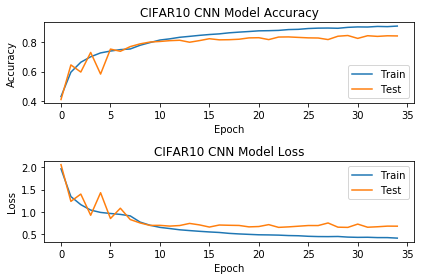

In [0]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CIFAR10 CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CIFAR10 CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout();

My model can reach the accuracy of around 84% on test dataset.